In [ ]:
"""
https://ourworldindata.org/happiness-and-life-satisfaction
https://www.gapminder.org/factfulness/




http://localhost:8888/notebooks/python/notebooks/WHR.ipynb

"""


# TODO

* X Fikse alle slides
* X Hva skal lytteren sitte igjen med
* X Konklusjon og førklusjon(!?) - Si hva poenget er - som Ingeborg sa.
* X Hva er du bulkene i Afghanistan sin trend?
*  ++Koble sammen dataen og det virkelige liv - Ingeborg
* Nord-korea - sjekke hvordan det er der
* diktatur vs demokrati
* ++ wholesome konklusjon
* boksene var vanskelig å forstå
* elles var ting fint grafet
* forklare i context i den continent-grafen
* fint budskap med at det er andre ting enn pengene som har noe å si fr lykke
* continent-grafen var vanskelig å forstå - den er veldig kompleks
* veritasium - youtube video

Fra SS:
* X Variant feil
* Ikke bruk "kule ord"
* X Spørsmålet med happy må utbedres med fokus
* X Spaghettien er bra, men ikke snakk om den så spesifikt 
* Forklar det som er på skjermen 
* Forklar overganger
* Corr ble litt mye på en gang 
* Poengter forskjellen på corr 2023
* At dataene beveger seg kom ikke så godt
* ++ å dra det til hverdagen

# Lykkerapporten 2024 ― Harde fakta om et mykt tema

Olav, Variant



Grave i World Happiness Report 2024

Nøkkelspørsmål ― Korrelasjoner ― Trender

Visuelle innsikter

I dag skal vi utforske World Happiness Report ved å bryte ned nøkkelspørsmål, korrelasjoner og trender gjennom dataanalyse og visualiseringer. Rapporten, basert på Gallups World Poll, tar opp et unikt tema hvert år—i år er temaet alder (selv om vi vil fokusere på selve rapporten generelt).

Forvent litt praktisk analyse mens vi går gjennom dataene!

# Hva gjør folk lykkelige?

## En kombinasjon av

Gode relasjoner

Nok penger

Helse

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objects as go

In [ ]:
# consts
HEIGHT = 800
WIDTH = 800

In [ ]:
orig_df = pd.read_excel("/home/olav/dev/python/practical-statistics-for-data-scientists/data/DataForTable2.1.xls")
orig_df = orig_df.rename(columns={"Life Ladder": "ll"})

In [ ]:
orig_df.replace("Congo (Brazzaville)", "DR Congo", inplace=True)
orig_df.replace("Congo (Kinshasa)", "DR Congo", inplace=True)
orig_df.replace("Czechia", "Czech Republic", inplace=True)
orig_df.replace("Hong Kong S.A.R. of China", "Hong Kong", inplace=True)

In [ ]:
countries = [
  {
    "country": "India",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "China",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "United States",
    "continent": "North America",
    "unMember": True
  },
  {
    "country": "Indonesia",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "Pakistan",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "Nigeria",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Brazil",
    "continent": "South America",
    "unMember": True
  },
  {
    "country": "Bangladesh",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "Russia",
    "continent": [
      "Asia",
      "Europe"
    ],
    "unMember": True
  },
  {
    "country": "Ethiopia",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Mexico",
    "continent": "North America",
    "unMember": True
  },
  {
    "country": "Japan",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "Egypt",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Philippines",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "DR Congo",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Vietnam",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "Iran",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "Turkey",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "Germany",
    "continent": "Europe",
    "unMember": True
  },
  {
    "country": "Thailand",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "United Kingdom",
    "continent": "Europe",
    "unMember": True
  },
  {
    "country": "Tanzania",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "France",
    "continent": "Europe",
    "unMember": True
  },
  {
    "country": "South Africa",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Italy",
    "continent": "Europe",
    "unMember": True
  },
  {
    "country": "Kenya",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Myanmar",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "Colombia",
    "continent": "South America",
    "unMember": True
  },
  {
    "country": "South Korea",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "Sudan",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Uganda",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Spain",
    "continent": "Europe",
    "unMember": True
  },
  {
    "country": "Algeria",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Iraq",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "Argentina",
    "continent": "South America",
    "unMember": True
  },
  {
    "country": "Afghanistan",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "Yemen",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "Canada",
    "continent": "North America",
    "unMember": True
  },
  {
    "country": "Poland",
    "continent": "Europe",
    "unMember": True
  },
  {
    "country": "Morocco",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Angola",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Ukraine",
    "continent": "Europe",
    "unMember": True
  },
  {
    "country": "Uzbekistan",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "Malaysia",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "Mozambique",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Ghana",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Peru",
    "continent": "South America",
    "unMember": True
  },
  {
    "country": "Saudi Arabia",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "Madagascar",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Ivory Coast",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Nepal",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "Cameroon",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Venezuela",
    "continent": "South America",
    "unMember": True
  },
  {
    "country": "Niger",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Australia",
    "continent": "Oceania",
    "unMember": True
  },
  {
    "country": "North Korea",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "Syria",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "Mali",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Burkina Faso",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Taiwan",
    "continent": "Asia",
    "unMember": False
  },
  {
    "country": "Sri Lanka",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "Malawi",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Zambia",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Kazakhstan",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "Chad",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Chile",
    "continent": "South America",
    "unMember": True
  },
  {
    "country": "Romania",
    "continent": "Europe",
    "unMember": True
  },
  {
    "country": "Somalia",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Senegal",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Guatemala",
    "continent": "North America",
    "unMember": True
  },
  {
    "country": "Netherlands",
    "continent": "Europe",
    "unMember": True
  },
  {
    "country": "Ecuador",
    "continent": "South America",
    "unMember": True
  },
  {
    "country": "Cambodia",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "Zimbabwe",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Guinea",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Benin",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Rwanda",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Burundi",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Bolivia",
    "continent": "South America",
    "unMember": True
  },
  {
    "country": "Tunisia",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "South Sudan",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Haiti",
    "continent": "North America",
    "unMember": True
  },
  {
    "country": "Belgium",
    "continent": "Europe",
    "unMember": True
  },
  {
    "country": "Jordan",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "Dominican Republic",
    "continent": "North America",
    "unMember": True
  },
  {
    "country": "United Arab Emirates",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "Cuba",
    "continent": "North America",
    "unMember": True
  },
  {
    "country": "Honduras",
    "continent": "North America",
    "unMember": True
  },
  {
    "country": "Czech Republic",
    "continent": "Europe",
    "unMember": True
  },
  {
    "country": "Sweden",
    "continent": "Europe",
    "unMember": True
  },
  {
    "country": "Tajikistan",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "Papua New Guinea",
    "continent": "Oceania",
    "unMember": True
  },
  {
    "country": "Portugal",
    "continent": "Europe",
    "unMember": True
  },
  {
    "country": "Azerbaijan",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "Greece",
    "continent": "Europe",
    "unMember": True
  },
  {
    "country": "Hungary",
    "continent": "Europe",
    "unMember": True
  },
  {
    "country": "Togo",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Israel",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "Austria",
    "continent": "Europe",
    "unMember": True
  },
  {
    "country": "Belarus",
    "continent": "Europe",
    "unMember": True
  },
  {
    "country": "Switzerland",
    "continent": "Europe",
    "unMember": True
  },
  {
    "country": "Sierra Leone",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Laos",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "Turkmenistan",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "Hong Kong",
    "continent": "Asia",
    "unMember": False
  },
  {
    "country": "Libya",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Kyrgyzstan",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "Paraguay",
    "continent": "South America",
    "unMember": True
  },
  {
    "country": "Nicaragua",
    "continent": "North America",
    "unMember": True
  },
  {
    "country": "Bulgaria",
    "continent": "Europe",
    "unMember": True
  },
  {
    "country": "Serbia",
    "continent": "Europe",
    "unMember": True
  },
  {
    "country": "El Salvador",
    "continent": "North America",
    "unMember": True
  },
  {
    "country": "Republic of the Congo",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Denmark",
    "continent": "Europe",
    "unMember": True
  },
  {
    "country": "Singapore",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "Lebanon",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "Finland",
    "continent": "Europe",
    "unMember": True
  },
  {
    "country": "Liberia",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Norway",
    "continent": "Europe",
    "unMember": True
  },
  {
    "country": "Slovakia",
    "continent": "Europe",
    "unMember": True
  },
  {
    "country": "Palestine",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "Central African Republic",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Oman",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "Ireland",
    "continent": "Europe",
    "unMember": True
  },
  {
    "country": "New Zealand",
    "continent": "Oceania",
    "unMember": True
  },
  {
    "country": "Mauritania",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Costa Rica",
    "continent": "North America",
    "unMember": True
  },
  {
    "country": "Kuwait",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "Panama",
    "continent": "North America",
    "unMember": True
  },
  {
    "country": "Croatia",
    "continent": "Europe",
    "unMember": True
  },
  {
    "country": "Georgia",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "Eritrea",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Mongolia",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "Uruguay",
    "continent": "South America",
    "unMember": True
  },
  {
    "country": "Puerto Rico",
    "continent": "North America",
    "unMember": False
  },
  {
    "country": "Bosnia and Herzegovina",
    "continent": "Europe",
    "unMember": True
  },
  {
    "country": "Qatar",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "Moldova",
    "continent": "Europe",
    "unMember": True
  },
  {
    "country": "Namibia",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Armenia",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "Lithuania",
    "continent": "Europe",
    "unMember": True
  },
  {
    "country": "Jamaica",
    "continent": "North America",
    "unMember": True
  },
  {
    "country": "Albania",
    "continent": "Europe",
    "unMember": True
  },
  {
    "country": "Gambia",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Gabon",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Botswana",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Lesotho",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Guinea-Bissau",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Slovenia",
    "continent": "Europe",
    "unMember": True
  },
  {
    "country": "Equatorial Guinea",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Latvia",
    "continent": "Europe",
    "unMember": True
  },
  {
    "country": "North Macedonia",
    "continent": "Europe",
    "unMember": True
  },
  {
    "country": "Bahrain",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "Trinidad and Tobago",
    "continent": "North America",
    "unMember": True
  },
  {
    "country": "Timor-Leste",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "Estonia",
    "continent": "Europe",
    "unMember": True
  },
  {
    "country": "Cyprus",
    "continent": "Europe",
    "unMember": True
  },
  {
    "country": "Mauritius",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Eswatini",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Djibouti",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Fiji",
    "continent": "Oceania",
    "unMember": True
  },
  {
    "country": "Reunion",
    "continent": "Africa",
    "unMember": False
  },
  {
    "country": "Comoros",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Guyana",
    "continent": "South America",
    "unMember": True
  },
  {
    "country": "Solomon Islands",
    "continent": "Oceania",
    "unMember": True
  },
  {
    "country": "Bhutan",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "Macau",
    "continent": "Asia",
    "unMember": False
  },
  {
    "country": "Luxembourg",
    "continent": "Europe",
    "unMember": True
  },
  {
    "country": "Montenegro",
    "continent": "Europe",
    "unMember": True
  },
  {
    "country": "Suriname",
    "continent": "South America",
    "unMember": True
  },
  {
    "country": "Western Sahara",
    "continent": "Africa",
    "unMember": False
  },
  {
    "country": "Malta",
    "continent": "Europe",
    "unMember": True
  },
  {
    "country": "Maldives",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "Cape Verde",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Brunei",
    "continent": "Asia",
    "unMember": True
  },
  {
    "country": "Belize",
    "continent": "North America",
    "unMember": True
  },
  {
    "country": "Bahamas",
    "continent": "North America",
    "unMember": True
  },
  {
    "country": "Iceland",
    "continent": "Europe",
    "unMember": True
  },
  {
    "country": "Guadeloupe",
    "continent": "North America",
    "unMember": False
  },
  {
    "country": "Martinique",
    "continent": "North America",
    "unMember": False
  },
  {
    "country": "Vanuatu",
    "continent": "Oceania",
    "unMember": True
  },
  {
    "country": "Mayotte",
    "continent": "Africa",
    "unMember": False
  },
  {
    "country": "French Guiana",
    "continent": "South America",
    "unMember": False
  },
  {
    "country": "New Caledonia",
    "continent": "Oceania",
    "unMember": False
  },
  {
    "country": "Barbados",
    "continent": "North America",
    "unMember": True
  },
  {
    "country": "French Polynesia",
    "continent": "Oceania",
    "unMember": False
  },
  {
    "country": "Sao Tome and Principe",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Samoa",
    "continent": "Oceania",
    "unMember": True
  },
  {
    "country": "Curacao",
    "continent": "North America",
    "unMember": False
  },
  {
    "country": "Saint Lucia",
    "continent": "North America",
    "unMember": True
  },
  {
    "country": "Guam",
    "continent": "Oceania",
    "unMember": False
  },
  {
    "country": "Kiribati",
    "continent": "Oceania",
    "unMember": True
  },
  {
    "country": "Seychelles",
    "continent": "Africa",
    "unMember": True
  },
  {
    "country": "Grenada",
    "continent": "North America",
    "unMember": True
  },
  {
    "country": "Micronesia",
    "continent": "Oceania",
    "unMember": True
  },
  {
    "country": "Aruba",
    "continent": "North America",
    "unMember": False
  },
  {
    "country": "Tonga",
    "continent": "Oceania",
    "unMember": True
  },
  {
    "country": "Jersey",
    "continent": "Europe",
    "unMember": False
  },
  {
    "country": "Saint Vincent and the Grenadines",
    "continent": "North America",
    "unMember": True
  },
  {
    "country": "Antigua and Barbuda",
    "continent": "North America",
    "unMember": True
  },
  {
    "country": "United States Virgin Islands",
    "continent": "North America",
    "unMember": False
  },
  {
    "country": "Isle of Man",
    "continent": "Europe",
    "unMember": False
  },
  {
    "country": "Andorra",
    "continent": "Europe",
    "unMember": True
  },
  {
    "country": "Cayman Islands",
    "continent": "North America",
    "unMember": False
  },
  {
    "country": "Dominica",
    "continent": "North America",
    "unMember": True
  },
  {
    "country": "Bermuda",
    "continent": "North America",
    "unMember": False
  },
  {
    "country": "Guernsey",
    "continent": "Europe",
    "unMember": False
  },
  {
    "country": "Greenland",
    "continent": "North America",
    "unMember": False
  },
  {
    "country": "Faroe Islands",
    "continent": "Europe",
    "unMember": False
  },
  {
    "country": "Saint Kitts and Nevis",
    "continent": "North America",
    "unMember": True
  },
  {
    "country": "American Samoa",
    "continent": "Oceania",
    "unMember": False
  },
  {
    "country": "Turks and Caicos Islands",
    "continent": "North America",
    "unMember": False
  },
  {
    "country": "Northern Mariana Islands",
    "continent": "Oceania",
    "unMember": False
  },
  {
    "country": "Sint Maarten",
    "continent": "North America",
    "unMember": False
  },
  {
    "country": "Liechtenstein",
    "continent": "Europe",
    "unMember": True
  },
  {
    "country": "British Virgin Islands",
    "continent": "North America",
    "unMember": False
  },
  {
    "country": "Gibraltar",
    "continent": "Europe",
    "unMember": False
  },
  {
    "country": "Monaco",
    "continent": "Europe",
    "unMember": True
  },
  {
    "country": "Marshall Islands",
    "continent": "Oceania",
    "unMember": True
  },
  {
    "country": "San Marino",
    "continent": "Europe",
    "unMember": True
  },
  {
    "country": "Saint Martin",
    "continent": "North America",
    "unMember": False
  },
  {
    "country": "Palau",
    "continent": "Oceania",
    "unMember": True
  },
  {
    "country": "Anguilla",
    "continent": "North America",
    "unMember": False
  },
  {
    "country": "Cook Islands",
    "continent": "Oceania",
    "unMember": False
  },
  {
    "country": "Nauru",
    "continent": "Oceania",
    "unMember": True
  },
  {
    "country": "Wallis and Futuna",
    "continent": "Oceania",
    "unMember": False
  },
  {
    "country": "Saint Barthelemy",
    "continent": "North America",
    "unMember": False
  },
  {
    "country": "Tuvalu",
    "continent": "Oceania",
    "unMember": True
  },
  {
    "country": "Saint Pierre and Miquelon",
    "continent": "North America",
    "unMember": False
  },
  {
    "country": "Montserrat",
    "continent": "North America",
    "unMember": False
  },
  {
    "country": "Falkland Islands",
    "continent": "South America",
    "unMember": False
  },
  {
    "country": "Tokelau",
    "continent": "Oceania",
    "unMember": False
  },
  {
    "country": "Niue",
    "continent": "Oceania",
    "unMember": False
  },
  {
    "country": "Vatican City",
    "continent": "Europe",
    "unMember": True
  }
]

In [ ]:
csv = """country,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,1811,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833,1834,1835,1836,1837,1838,1839,1840,1841,1842,1843,1844,1845,1846,1847,1848,1849,1850,1851,1852,1853,1854,1855,1856,1857,1858,1859,1860,1861,1862,1863,1864,1865,1866,1867,1868,1869,1870,1871,1872,1873,1874,1875,1876,1877,1878,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,1910,1911,1912,1913,1914,1915,1916,1917,1918,1919,1920,1921,1922,1923,1924,1925,1926,1927,1928,1929,1930,1931,1932,1933,1934,1935,1936,1937,1938,1939,1940,1941,1942,1943,1944,1945,1946,1947,1948,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050,2051,2052,2053,2054,2055,2056,2057,2058,2059,2060,2061,2062,2063,2064,2065,2066,2067,2068,2069,2070,2071,2072,2073,2074,2075,2076,2077,2078,2079,2080,2081,2082,2083,2084,2085,2086,2087,2088,2089,2090,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
Afghanistan,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.29M,3.3M,3.31M,3.32M,3.34M,3.35M,3.37M,3.38M,3.4M,3.41M,3.43M,3.45M,3.46M,3.48M,3.49M,3.51M,3.52M,3.54M,3.55M,3.57M,3.59M,3.6M,3.62M,3.63M,3.65M,3.67M,3.68M,3.7M,3.72M,3.73M,3.75M,3.77M,3.79M,3.81M,3.83M,3.85M,3.87M,3.88M,3.9M,3.92M,3.94M,3.96M,3.98M,4M,4.02M,4.04M,4.06M,4.08M,4.11M,4.13M,4.15M,4.17M,4.19M,4.21M,4.23M,4.25M,4.27M,4.3M,4.32M,4.34M,4.36M,4.38M,4.4M,4.43M,4.45M,4.47M,4.49M,4.52M,4.54M,4.56M,4.58M,4.61M,4.63M,4.65M,4.68M,4.7M,4.72M,4.75M,4.77M,4.8M,4.84M,4.89M,4.95M,5.01M,5.08M,5.14M,5.21M,5.28M,5.34M,5.48M,5.7M,5.99M,6.38M,6.87M,7.39M,7.95M,8.55M,9.2M,9.91M,10.4M,10.6M,10.6M,10.3M,9.74M,9.23M,8.75M,8.29M,7.85M,7.44M,7.12M,6.89M,6.74M,6.66M,6.66M,6.66M,6.66M,6.66M,6.66M,6.66M,6.68M,6.72M,6.79M,6.87M,6.98M,7.08M,7.19M,7.3M,7.41M,7.53M,7.65M,7.78M,7.88M,7.99M,8.1M,8.21M,8.33M,8.45M,8.59M,8.72M,8.87M,9.04M,9.21M,9.4M,9.6M,9.81M,10M,10.3M,10.5M,10.8M,11M,11.3M,11.6M,11.9M,12.2M,12.5M,12.8M,13.1M,13.3M,13.6M,13.7M,13.2M,11.9M,11M,10.9M,11.2M,11.4M,11.4M,11.4M,11.5M,11.9M,12M,12.2M,13.3M,14.9M,16.3M,17.1M,17.8M,18.5M,19.2M,19.9M,20.1M,20.3M,21.4M,22.7M,23.6M,24.4M,25.4M,25.9M,26.5M,27.5M,28.3M,29.3M,30.6M,31.6M,32.8M,33.8M,34.7M,35.7M,36.7M,37.9M,39.1M,40M,40.6M,41.5M,42.6M,43.8M,45M,46.3M,47.5M,48.7M,50M,51.4M,52.7M,54M,55.4M,56.6M,58M,59.3M,60.6M,61.9M,63.3M,64.7M,66.1M,67.4M,68.7M,70M,71.4M,72.8M,74.1M,75.5M,76.9M,78.2M,79.5M,80.8M,82.2M,83.6M,85M,86.4M,87.8M,89.1M,90.4M,91.6M,92.9M,94.3M,95.6M,97M,98.3M,99.6M,101M,102M,103M,105M,106M,107M,108M,109M,110M,111M,113M,114M,115M,116M,117M,117M,118M,119M,120M,121M,122M,122M,123M,124M,125M,126M,126M,127M,128M,128M,129M,130M,130M
Angola,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.58M,1.59M,1.61M,1.64M,1.66M,1.69M,1.71M,1.74M,1.76M,1.79M,1.81M,1.84M,1.87M,1.9M,1.92M,1.95M,1.98M,2.01M,2.04M,2.07M,2.1M,2.13M,2.16M,2.19M,2.23M,2.26M,2.29M,2.33M,2.36M,2.39M,2.42M,2.45M,2.47M,2.49M,2.51M,2.53M,2.55M,2.57M,2.6M,2.62M,2.64M,2.66M,2.68M,2.71M,2.73M,2.75M,2.78M,2.8M,2.82M,2.85M,2.87M,2.89M,2.91M,2.93M,2.95M,2.96M,2.98M,3M,3.02M,3.04M,3.06M,3.08M,3.1M,3.12M,3.14M,3.16M,3.18M,3.2M,3.22M,3.24M,3.24M,3.24M,3.24M,3.23M,3.22M,3.2M,3.19M,3.18M,3.17M,3.16M,3.14M,3.12M,3.1M,3.08M,3.06M,3.04M,3.02M,3M,2.98M,2.96M,2.95M,2.94M,2.93M,2.92M,2.91M,2.9M,2.89M,2.89M,2.88M,2.87M,2.89M,2.91M,2.94M,2.98M,3.03M,3.07M,3.12M,3.17M,3.21M,3.26M,3.31M,3.36M,3.4M,3.45M,3.5M,3.55M,3.6M,3.65M,3.7M,3.76M,3.81M,3.88M,3.94M,4.01M,4.09M,4.16M,4.24M,4.31M,4.39M,4.47M,4.55M,4.6M,4.65M,4.71M,4.77M,4.83M,4.9M,4.98M,5.06M,5.15M,5.23M,5.3M,5.35M,5.41M,5.46M,5.52M,5.58M,5.64M,5.7M,5.76M,5.85M,5.99M,6.17M,6.39M,6.61M,6.84M,7.07M,7.32M,7.58M,7.85M,8.13M,8.44M,8.75M,9.08M,9.43M,9.78M,10.1M,10.5M,10.9M,11.2M,11.6M,12M,12.4M,12.8M,13.2M,13.7M,14.2M,14.7M,15.2M,15.7M,16.2M,16.7M,17.3M,17.9M,18.6M,19.3M,20M,20.8M,21.6M,22.4M,23.3M,24.2M,25.2M,26.2M,27.2M,28.2M,29.2M,30.2M,31.3M,32.4M,33.5M,34.5M,35.6M,36.7M,37.9M,39M,40.2M,41.4M,42.6M,43.9M,45.2M,46.4M,47.8M,49.1M,50.4M,51.8M,53.2M,54.6M,56.1M,57.5M,59M,60.4M,61.9M,63.4M,64.9M,66.5M,68M,69.6M,71.1M,72.7M,74.3M,75.9M,77.5M,79.1M,80.8M,82.4M,84M,85.7M,87.3M,89M,90.6M,92.3M,94M,95.6M,97.3M,98.9M,101M,102M,104M,105M,107M,109M,110M,112M,114M,115M,117M,118M,120M,121M,123M,125M,126M,128M,129M,130M,132M,133M,135M,136M,138M,139M,140M,142M,143M,144M,145M,147M,148M,149M,150M
Albania,400k,402k,404k,405k,407k,409k,411k,413k,414k,416k,418k,420k,422k,424k,426k,427k,429k,431k,433k,435k,437k,439k,441k,443k,445k,447k,449k,451k,453k,455k,457k,459k,461k,463k,465k,467k,470k,472k,474k,476k,478k,480k,482k,485k,487k,489k,491k,493k,496k,498k,501k,505k,510k,514k,519k,524k,529k,534k,539k,545k,550k,555k,560k,566k,571k,576k,582k,587k,593k,599k,604k,610k,616k,622k,627k,633k,639k,645k,651k,658k,664k,670k,676k,683k,689k,696k,702k,709k,715k,722k,729k,736k,743k,751k,758k,766k,773k,781k,788k,796k,804k,811k,819k,826k,833k,841k,848k,856k,864k,871k,878k,885k,891k,897k,903k,908k,914k,920k,926k,932k,938k,943k,948k,953k,958k,963k,968k,973k,978k,985k,992k,1000k,1.01M,1.02M,1.03M,1.04M,1.05M,1.06M,1.07M,1.08M,1.1M,1.11M,1.12M,1.14M,1.15M,1.16M,1.18M,1.19M,1.21M,1.22M,1.25M,1.28M,1.31M,1.34M,1.38M,1.42M,1.46M,1.5M,1.54M,1.6M,1.65M,1.7M,1.74M,1.79M,1.84M,1.89M,1.95M,2.01M,2.07M,2.13M,2.18M,2.23M,2.29M,2.34M,2.4M,2.45M,2.51M,2.57M,2.62M,2.68M,2.74M,2.79M,2.85M,2.91M,2.96M,3.03M,3.09M,3.15M,3.21M,3.26M,3.28M,3.28M,3.28M,3.28M,3.27M,3.26M,3.25M,3.23M,3.21M,3.19M,3.17M,3.15M,3.13M,3.12M,3.1M,3.08M,3.05M,3.02M,2.99M,2.96M,2.93M,2.91M,2.91M,2.91M,2.9M,2.9M,2.9M,2.9M,2.89M,2.89M,2.87M,2.85M,2.83M,2.81M,2.79M,2.77M,2.75M,2.73M,2.71M,2.69M,2.67M,2.65M,2.63M,2.61M,2.59M,2.57M,2.55M,2.53M,2.51M,2.48M,2.46M,2.44M,2.42M,2.4M,2.37M,2.35M,2.33M,2.31M,2.28M,2.26M,2.24M,2.22M,2.2M,2.17M,2.15M,2.13M,2.11M,2.08M,2.06M,2.04M,2.02M,2M,1.97M,1.95M,1.93M,1.91M,1.89M,1.87M,1.85M,1.82M,1.8M,1.78M,1.76M,1.74M,1.72M,1.69M,1.67M,1.65M,1.63M,1.61M,1.58M,1.56M,1.54M,1.52M,1.49M,1.47M,1.45M,1.43M,1.41M,1.39M,1.36M,1.34M,1.32M,1.3M,1.29M,1.27M,1.25M,1.23M,1.22M,1.2M,1.18M
Andorra,2650,2650,2650,2650,2650,2650,2650,2650,2650,2650,2650,2650,2650,2650,2650,2650,2650,2650,2650,2660,2670,2680,2690,2710,2730,2750,2770,2790,2810,2830,2850,2870,2890,2910,2930,2950,2970,2990,3010,3030,3060,3080,3100,3120,3140,3170,3190,3210,3230,3260,3280,3300,3320,3340,3360,3390,3410,3430,3450,3470,3500,3520,3540,3560,3590,3610,3630,3660,3680,3700,3730,3750,3780,3800,3820,3850,3870,3900,3920,3950,3970,4000,4030,4050,4080,4100,4130,4160,4180,4210,4240,4260,4290,4320,4350,4380,4400,4430,4460,4490,4520,4550,4580,4610,4630,4660,4690,4720,4750,4800,4850,4910,4990,5080,5170,5260,5350,5450,5550,5610,5630,5610,5550,5450,5350,5250,5160,5070,4970,4910,4880,4870,4900,4950,5000,5050,5110,5160,5220,5270,5330,5390,5440,5500,5560,5620,5680,5740,5800,5880,6000,5820,5460,5320,5600,6170,6770,7400,8070,8770,9510,10.3k,11.1k,11.9k,12.8k,13.6k,14.6k,15.8k,17.2k,18.6k,20k,21.4k,23k,24.5k,26.1k,27.8k,29.4k,31.1k,32.7k,34.3k,35.8k,37.2k,38.8k,40.6k,42.3k,43.8k,45.7k,47.7k,49.4k,50.6k,52.6k,56.7k,60.2k,63.3k,64.6k,63.9k,64k,64.7k,65.4k,65.7k,65.7k,65.9k,66.5k,69.5k,74.3k,77.4k,79.6k,81.9k,83.5k,83.9k,80.7k,77.8k,76.8k,75.2k,73.7k,72.2k,72.2k,73.8k,75.2k,76.5k,77.4k,78.4k,79.7k,80.9k,81.9k,82.9k,83.8k,84.5k,85k,85.3k,85.7k,85.9k,86k,86.1k,86.1k,86.2k,86.1k,86k,85.9k,85.8k,85.7k,85.5k,85.3k,85k,84.7k,84.3k,83.9k,83.5k,83.1k,82.6k,82.2k,81.7k,81.1k,80.5k,79.8k,79.1k,78.3k,77.6k,76.8k,76k,75.2k,74.4k,73.6k,72.8k,71.9k,71.1k,70.3k,69.6k,68.8k,68k,67.2k,66.5k,65.8k,65.1k,64.4k,63.7k,63k,62.3k,61.5k,60.8k,60.1k,59.4k,58.7k,58k,57.3k,56.7k,56k,55.4k,54.7k,54.1k,53.4k,52.8k,52.1k,51.5k,50.8k,50.2k,49.6k,49k,48.4k,47.8k,47.2k
UAE,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.3k,40.3k,40.3k,40.3k,40.3k,40.3k,40.3k,40.4k,40.4k,40.4k,40.4k,40.4k,40.5k,40.6k,40.7k,41k,41.2k,41.5k,41.7k,42k,42.3k,42.5k,42.8k,43.1k,43.4k,43.6k,43.9k,44.2k,44.5k,44.8k,45k,45.3k,45.6k,45.9k,46.2k,46.5k,46.8k,47.1k,47.4k,47.7k,48k,48.3k,48.6k,48.9k,49.2k,49.5k,49.8k,50.1k,50.5k,50.8k,51.1k,51.4k,51.8k,52.2k,52.6k,53k,53.5k,54k,54.4k,54.9k,55.4k,55.9k,56.3k,56.8k,57.3k,57.8k,58.3k,58.8k,59.3k,59.8k,60.3k,60.8k,61.3k,61.8k,62.4k,62.9k,63.4k,64k,64.5k,65.1k,65.6k,66.2k,66.7k,67.3k,67.9k,68.4k,69k,69.6k,70.2k,70.8k,71.4k,72k,73k,74.5k,79.5k,84.8k,90.1k,95.7k,101k,107k,113k,119k,125k,131k,138k,145k,152k,160k,167k,174k,180k,199k,240k,287k,335k,385k,436k,489k,543k,616k,710k,809k,912k,1.02M,1.1M,1.17M,1.24M,1.31M,1.38M,1.47M,1.57M,1.68M,1.79M,1.9M,2.01M,2.11M,2.22M,2.33M,2.43M,2.6M,2.82M,3.04M,3.27M,3.49M,3.72M,3.96M,4.19M,4.43M,4.66M,5.01M,5.62M,6.3M,6.71M,6.94M,7.2M,7.5M,7.83M,8.24M,8.67M,9.03M,9.23M,9.35M,9.38M,9.45M,9.79M,10.2M,10.6M,11M,11.3M,11.6M,11.8M,11.9M,12.1M,12.2M,12.3M,12.5M,12.6M,12.8M,12.9M,13.1M,13.2M,13.4M,13.5M,13.7M,13.9M,14M,14.2M,14.3M,14.5M,14.7M,14.8M,15M,15.2M,15.4M,15.5M,15.7M,15.9M,16.1M,16.3M,16.5M,16.6M,16.8M,17M,17.2M,17.4M,17.6M,17.8M,18M,18.2M,18.5M,18.7M,18.9M,19.1M,19.3M,19.6M,19.8M,20M,20.2M,20.5M,20.7M,20.9M,21.2M,21.4M,21.6M,21.8M,22.1M,22.3M,22.5M,22.7M,23M,23.2M,23.4M,23.6M,23.9M,24.1M,24.3M,24.5M,24.7M,25M,25.2M,25.4M,25.7M,25.9M,26.1M
Argentina,534k,520k,506k,492k,479k,466k,453k,441k,429k,417k,420k,422k,429k,441k,453k,466k,479k,492k,506k,519k,531k,542k,553k,562k,572k,582k,592k,602k,613k,624k,635k,647k,659k,672k,685k,698k,712k,725k,739k,756k,776k,800k,826k,857k,888k,920k,954k,989k,1.03M,1.06M,1.09M,1.12M,1.14M,1.16M,1.18M,1.2M,1.22M,1.24M,1.26M,1.29M,1.32M,1.35M,1.39M,1.43M,1.48M,1.53M,1.58M,1.63M,1.68M,1.74M,1.79M,1.85M,1.91M,1.97M,2.03M,2.1M,2.17M,2.24M,2.31M,2.38M,2.46M,2.53M,2.62M,2.7M,2.79M,2.87M,2.97M,3.06M,3.16M,3.26M,3.37M,3.48M,3.59M,3.71M,3.84M,3.96M,4.1M,4.23M,4.37M,4.52M,4.69M,4.86M,5.04M,5.23M,5.43M,5.64M,5.85M,6.08M,6.31M,6.53M,6.75M,6.96M,7.15M,7.34M,7.53M,7.73M,7.93M,8.14M,8.35M,8.58M,8.82M,9.07M,9.33M,9.61M,9.9M,10.2M,10.5M,10.8M,11.1M,11.4M,11.7M,12M,12.2M,12.4M,12.7M,12.9M,13.1M,13.3M,13.6M,13.8M,14.1M,14.3M,14.6M,14.9M,15.2M,15.5M,15.8M,16.1M,16.4M,16.7M,17M,17.4M,17.7M,18M,18.4M,18.7M,19M,19.4M,19.7M,20M,20.4M,20.7M,21.1M,21.4M,21.8M,22.1M,22.5M,22.8M,23.2M,23.5M,23.9M,24.3M,24.6M,25M,25.5M,25.9M,26.3M,26.7M,27.1M,27.6M,28M,28.5M,28.9M,29.4M,29.9M,30.3M,30.8M,31.3M,31.8M,32.3M,32.8M,33.2M,33.7M,34.2M,34.6M,35.1M,35.5M,35.9M,36.4M,36.8M,37.2M,37.6M,38M,38.4M,38.8M,39.2M,39.6M,40M,40.4M,40.9M,41.3M,41.7M,42.2M,42.6M,43M,43.5M,43.9M,44.3M,44.7M,45M,45.2M,45.3M,45.4M,45.5M,45.7M,45.9M,46M,46.2M,46.3M,46.4M,46.6M,46.7M,46.9M,47M,47.1M,47.3M,47.4M,47.5M,47.6M,47.7M,47.8M,47.9M,48M,48.1M,48.1M,48.2M,48.2M,48.3M,48.3M,48.3M,48.3M,48.3M,48.3M,48.2M,48.2M,48.1M,48M,48M,47.9M,47.8M,47.6M,47.5M,47.4M,47.2M,47.1M,46.9M,46.8M,46.6M,46.5M,46.3M,46.1M,45.9M,45.7M,45.5M,45.3M,45.1M,44.9M,44.7M,44.5M,44.2M,44M,43.7M,43.5M,43.2M,42.9M,42.7M,42.4M,42.1M,41.8M,41.5M,41.3M,41M,40.7M,40.4M,40.1M,39.8M,39.5M,39.2M,38.9M,38.6M,38.3M
Armenia,413k,413k,413k,413k,413k,413k,413k,413k,413k,413k,413k,413k,413k,413k,413k,413k,413k,413k,413k,414k,416k,418k,421k,425k,429k,433k,437k,441k,445k,449k,453k,457k,461k,465k,470k,474k,478k,483k,487k,492k,496k,501k,505k,510k,515k,519k,524k,529k,534k,539k,544k,549k,554k,559k,564k,569k,575k,580k,585k,591k,596k,602k,607k,613k,619k,624k,630k,636k,642k,648k,654k,660k,666k,672k,678k,685k,691k,697k,704k,710k,717k,724k,730k,737k,744k,751k,758k,765k,772k,779k,786k,794k,801k,808k,816k,823k,831k,839k,846k,854k,862k,870k,878k,886k,895k,903k,911k,920k,928k,937k,946k,954k,963k,972k,981k,990k,999k,1.01M,1.02M,1.03M,1.04M,1.05M,1.06M,1.07M,1.08M,1.09M,1.1M,1.11M,1.12M,1.13M,1.14M,1.15M,1.16M,1.17M,1.18M,1.19M,1.2M,1.21M,1.22M,1.23M,1.24M,1.26M,1.27M,1.28M,1.29M,1.3M,1.31M,1.33M,1.34M,1.36M,1.38M,1.42M,1.45M,1.49M,1.54M,1.58M,1.63M,1.68M,1.74M,1.8M,1.86M,1.93M,1.99M,2.06M,2.12M,2.18M,2.25M,2.31M,2.37M,2.42M,2.48M,2.53M,2.58M,2.63M,2.69M,2.74M,2.82M,2.91M,3.01M,3.08M,3.11M,3.14M,3.16M,3.19M,3.22M,3.26M,3.29M,3.33M,3.36M,3.44M,3.55M,3.61M,3.57M,3.45M,3.36M,3.31M,3.28M,3.25M,3.21M,3.17M,3.13M,3.08M,3.06M,3.04M,3.02M,3.01M,2.99M,2.97M,2.96M,2.95M,2.93M,2.92M,2.92M,2.92M,2.92M,2.92M,2.92M,2.91M,2.91M,2.9M,2.89M,2.87M,2.88M,2.94M,2.97M,2.95M,2.93M,2.91M,2.89M,2.87M,2.85M,2.83M,2.81M,2.79M,2.78M,2.76M,2.74M,2.72M,2.7M,2.68M,2.67M,2.65M,2.63M,2.61M,2.6M,2.58M,2.56M,2.55M,2.53M,2.51M,2.5M,2.48M,2.46M,2.44M,2.43M,2.41M,2.39M,2.38M,2.36M,2.34M,2.33M,2.31M,2.29M,2.27M,2.26M,2.24M,2.22M,2.2M,2.18M,2.17M,2.15M,2.13M,2.11M,2.09M,2.07M,2.05M,2.04M,2.02M,2M,1.98M,1.97M,1.95M,1.93M,1.92M,1.9M,1.89M,1.87M,1.86M,1.84M,1.83M,1.82M,1.8M,1.79M,1.78M,1.77M,1.75M,1.74M,1.73M,1.72M,1.7M,1.69M
Antigua and Barbuda,37k,37k,37k,37k,37k,37k,37k,37k,37k,37k,37k,37k,37k,37k,37k,37k,37k,37k,37k,37k,37k,37k,37k,37k,37k,37k,37k,37k,37k,37k,37k,37k,37k,37k,37k,37k,37k,37k,37k,37k,37k,37k,37k,37k,37k,37k,37k,37k,37k,37k,37k,37k,37k,37k,37k,37k,37k,36.9k,36.9k,36.9k,36.8k,36.7k,36.5k,36.3k,36.1k,35.9k,35.7k,35.5k,35.3k,35.1k,35k,34.9k,34.8k,34.8k,34.8k,34.8k,34.8k,34.8k,34.8k,34.8k,34.9k,35k,35.2k,35.4k,35.5k,35.7k,35.9k,36.1k,36.3k,36.4k,36.5k,36.4k,36.3k,36.1k,35.9k,35.7k,35.5k,35.3k,35.1k,34.8k,34.6k,34.3k,34k,33.7k,33.4k,33.1k,32.8k,32.5k,32.2k,31.9k,31.7k,31.4k,31.2k,31k,30.8k,30.6k,30.4k,30.2k,30k,29.8k,29.8k,29.8k,29.8k,29.9k,30k,30.1k,30.2k,30.3k,30.4k,30.7k,31.1k,31.7k,32.5k,33.5k,34.6k,35.6k,36.7k,37.9k,39k,40k,40.9k,41.6k,42.2k,42.5k,42.9k,43.3k,43.7k,44k,44.4k,44.9k,45.4k,46.4k,47.4k,48.4k,49.4k,50.4k,51.4k,52.4k,53.5k,54.5k,55.6k,56.5k,57.3k,58.1k,59k,60k,60.9k,61.8k,62.8k,63.8k,64.5k,64.7k,64.6k,64.3k,64.1k,63.8k,63.8k,63.9k,64k,64.3k,64.5k,64.7k,64.8k,64.9k,64.9k,64.6k,64.3k,63.9k,63.6k,63.3k,63.1k,63.4k,64.4k,65.6k,66.8k,68.2k,69.6k,71.1k,72.4k,73.7k,74.9k,76.1k,77k,77.9k,78.7k,79.6k,80.6k,81.7k,82.9k,84.2k,85.3k,86.3k,87.3k,88.1k,88.8k,89.4k,90k,90.5k,90.9k,91.4k,91.8k,92.3k,92.8k,93.3k,93.8k,94.2k,94.6k,95k,95.4k,95.7k,96k,96.3k,96.5k,96.7k,96.9k,97k,97.1k,97.2k,97.2k,97.2k,97.1k,97.1k,96.9k,96.8k,96.6k,96.4k,96.2k,95.9k,95.7k,95.4k,95.1k,94.7k,94.3k,94k,93.6k,93.1k,92.7k,92.3k,91.9k,91.4k,91k,90.5k,90k,89.5k,89.1k,88.6k,88k,87.5k,87k,86.4k,85.9k,85.3k,84.7k,84.1k,83.6k,83k,82.4k,81.8k,81.2k,80.5k,79.9k,79.3k,78.7k,78.1k,77.4k,76.8k,76.2k,75.6k,74.9k,74.3k,73.7k,73.1k,72.5k,71.9k,71.3k,70.8k,70.2k,69.6k,69.1k,68.5k,68k
Australia,200k,205k,211k,216k,222k,227k,233k,239k,246k,252k,259k,265k,272k,279k,287k,294k,302k,309k,318k,324k,329k,332k,333k,333k,332k,332k,332k,331k,331k,332k,335k,340k,347k,355k,364k,373k,382k,391k,400k,411k,424k,437k,452k,469k,487k,505k,524k,543k,563k,589k,623k,663k,712k,770k,832k,900k,973k,1.05M,1.14M,1.22M,1.29M,1.35M,1.4M,1.44M,1.49M,1.53M,1.58M,1.62M,1.67M,1.72M,1.76M,1.8M,1.84M,1.88M,1.92M,1.96M,2.01M,2.05M,2.09M,2.14M,2.2M,2.27M,2.34M,2.42M,2.51M,2.6M,2.69M,2.78M,2.88M,2.97M,3.05M,3.13M,3.19M,3.25M,3.31M,3.38M,3.44M,3.5M,3.57M,3.63M,3.69M,3.75M,3.82M,3.87M,3.93M,4M,4.06M,4.12M,4.19M,4.25M,4.33M,4.41M,4.49M,4.58M,4.68M,4.77M,4.87M,4.97M,5.07M,5.17M,5.27M,5.38M,5.48M,5.59M,5.69M,5.8M,5.91M,6.02M,6.14M,6.24M,6.33M,6.41M,6.48M,6.54M,6.59M,6.65M,6.7M,6.76M,6.82M,6.89M,6.97M,7.06M,7.16M,7.28M,7.4M,7.52M,7.64M,7.76M,7.89M,8.03M,8.18M,8.42M,8.63M,8.82M,9M,9.21M,9.42M,9.64M,9.85M,10.1M,10.3M,10.5M,10.7M,10.9M,11.1M,11.4M,11.6M,11.8M,12M,12.3M,12.6M,13M,13.3M,13.5M,13.7M,13.9M,14M,14.2M,14.4M,14.5M,14.7M,14.9M,15.2M,15.4M,15.6M,15.8M,16.1M,16.3M,16.6M,16.9M,17.1M,17.4M,17.5M,17.7M,17.9M,18.1M,18.3M,18.5M,18.7M,18.9M,19.1M,19.4M,19.6M,19.8M,20M,20.3M,20.6M,21M,21.4M,21.8M,22.1M,22.5M,22.9M,23.2M,23.6M,23.9M,24.3M,24.7M,25.1M,25.5M,25.7M,26M,26.2M,26.5M,26.7M,27M,27.2M,27.5M,27.7M,28M,28.2M,28.4M,28.6M,28.9M,29.1M,29.3M,29.5M,29.7M,29.9M,30.1M,30.4M,30.6M,30.8M,31M,31.2M,31.4M,31.7M,31.9M,32.1M,32.3M,32.5M,32.7M,32.9M,33.1M,33.3M,33.5M,33.7M,33.9M,34.2M,34.4M,34.6M,34.8M,35M,35.2M,35.4M,35.6M,35.8M,36M,36.2M,36.4M,36.6M,36.8M,37M,37.2M,37.5M,37.7M,37.9M,38.1M,38.3M,38.5M,38.7M,38.9M,39.1M,39.3M,39.6M,39.8M,40M,40.2M,40.4M,40.6M,40.9M,41.1M,41.3M,41.6M,41.8M,42M,42.2M,42.5M,42.7M,42.9M,43.1M
Austria,3M,3.02M,3.04M,3.05M,3.07M,3.09M,3.11M,3.12M,3.14M,3.16M,3.18M,3.2M,3.22M,3.24M,3.25M,3.27M,3.29M,3.31M,3.33M,3.35M,3.37M,3.39M,3.4M,3.42M,3.44M,3.45M,3.47M,3.49M,3.5M,3.52M,3.54M,3.56M,3.57M,3.59M,3.61M,3.63M,3.64M,3.66M,3.68M,3.7M,3.72M,3.74M,3.76M,3.78M,3.81M,3.83M,3.85M,3.88M,3.9M,3.93M,3.95M,3.98M,4.01M,4.03M,4.06M,4.09M,4.12M,4.15M,4.18M,4.21M,4.23M,4.26M,4.29M,4.32M,4.35M,4.38M,4.41M,4.43M,4.46M,4.49M,4.53M,4.56M,4.6M,4.64M,4.69M,4.73M,4.77M,4.81M,4.86M,4.9M,4.94M,4.99M,5.03M,5.08M,5.12M,5.17M,5.21M,5.26M,5.3M,5.35M,5.4M,5.46M,5.51M,5.57M,5.62M,5.68M,5.74M,5.8M,5.86M,5.92M,5.98M,6.04M,6.1M,6.17M,6.23M,6.29M,6.36M,6.42M,6.49M,6.54M,6.57M,6.59M,6.59M,6.57M,6.56M,6.54M,6.53M,6.51M,6.49M,6.49M,6.49M,6.49M,6.51M,6.53M,6.55M,6.58M,6.6M,6.62M,6.65M,6.66M,6.68M,6.69M,6.7M,6.7M,6.7M,6.7M,6.7M,6.71M,6.71M,6.72M,6.73M,6.74M,6.76M,6.78M,6.8M,6.83M,6.85M,6.87M,6.9M,6.92M,6.94M,6.93M,6.93M,6.93M,6.94M,6.95M,6.95M,6.97M,6.99M,7.01M,7.05M,7.09M,7.13M,7.18M,7.22M,7.27M,7.32M,7.38M,7.41M,7.44M,7.47M,7.5M,7.54M,7.59M,7.6M,7.58M,7.56M,7.57M,7.56M,7.55M,7.55M,7.57M,7.57M,7.56M,7.56M,7.56M,7.57M,7.57M,7.59M,7.62M,7.68M,7.76M,7.84M,7.91M,7.94M,7.95M,7.96M,7.97M,7.98M,7.99M,8.01M,8.04M,8.08M,8.12M,8.17M,8.23M,8.27M,8.3M,8.32M,8.35M,8.37M,8.39M,8.43M,8.48M,8.55M,8.64M,8.74M,8.8M,8.84M,8.88M,8.92M,8.97M,9.06M,9.13M,9.12M,9.11M,9.11M,9.1M,9.1M,9.09M,9.08M,9.07M,9.06M,9.04M,9.03M,9.01M,9M,8.98M,8.97M,8.95M,8.93M,8.92M,8.9M,8.88M,8.86M,8.84M,8.82M,8.8M,8.78M,8.75M,8.72M,8.7M,8.67M,8.64M,8.6M,8.57M,8.54M,8.5M,8.47M,8.43M,8.39M,8.36M,8.33M,8.29M,8.26M,8.23M,8.19M,8.16M,8.13M,8.1M,8.07M,8.05M,8.02M,7.99M,7.96M,7.94M,7.91M,7.88M,7.86M,7.83M,7.81M,7.78M,7.76M,7.73M,7.71M,7.68M,7.66M,7.63M,7.61M,7.59M,7.57M,7.55M,7.53M,7.51M,7.5M,7.48M,7.46M,7.45M,7.43M,7.41M,7.4M
Azerbaijan,880k,880k,880k,880k,880k,880k,880k,880k,880k,880k,880k,880k,880k,880k,880k,880k,880k,880k,880k,882k,885k,890k,896k,904k,913k,921k,930k,938k,947k,955k,964k,973k,982k,991k,1M,1.01M,1.02M,1.03M,1.04M,1.05M,1.06M,1.07M,1.08M,1.09M,1.1M,1.11M,1.12M,1.13M,1.14M,1.15M,1.16M,1.17M,1.18M,1.19M,1.21M,1.22M,1.23M,1.24M,1.26M,1.27M,1.28M,1.29M,1.31M,1.32M,1.34M,1.35M,1.36M,1.38M,1.39M,1.4M,1.42M,1.43M,1.45M,1.46M,1.48M,1.49M,1.51M,1.52M,1.54M,1.56M,1.57M,1.59M,1.6M,1.62M,1.64M,1.65M,1.67M,1.69M,1.7M,1.72M,1.74M,1.76M,1.78M,1.79M,1.81M,1.83M,1.85M,1.87M,1.89M,1.91M,1.93M,1.95M,1.96M,1.98M,2.01M,2.03M,2.05M,2.07M,2.09M,2.11M,2.13M,2.15M,2.17M,2.2M,2.22M,2.24M,2.26M,2.29M,2.31M,2.33M,2.35M,2.37M,2.39M,2.42M,2.44M,2.46M,2.48M,2.51M,2.53M,2.55M,2.58M,2.6M,2.62M,2.65M,2.67M,2.7M,2.72M,2.75M,2.77M,2.8M,2.82M,2.85M,2.87M,2.9M,2.93M,2.95M,2.98M,3.01M,3.04M,3.08M,3.13M,3.19M,3.25M,3.31M,3.38M,3.46M,3.55M,3.65M,3.75M,3.86M,3.98M,4.11M,4.24M,4.37M,4.5M,4.63M,4.75M,4.87M,4.98M,5.08M,5.18M,5.28M,5.38M,5.48M,5.57M,5.67M,5.79M,5.94M,6.08M,6.19M,6.28M,6.39M,6.49M,6.6M,6.71M,6.8M,6.89M,6.98M,7.08M,7.17M,7.23M,7.31M,7.41M,7.5M,7.61M,7.72M,7.83M,7.94M,8.03M,8.1M,8.17M,8.25M,8.33M,8.4M,8.49M,8.6M,8.71M,8.83M,8.94M,9.05M,9.15M,9.26M,9.38M,9.5M,9.63M,9.75M,9.87M,9.97M,10M,10.1M,10.2M,10.2M,10.3M,10.3M,10.3M,10.4M,10.5M,10.5M,10.6M,10.6M,10.7M,10.7M,10.8M,10.8M,10.9M,10.9M,10.9M,11M,11M,11.1M,11.1M,11.1M,11.1M,11.2M,11.2M,11.2M,11.2M,11.2M,11.2M,11.2M,11.2M,11.2M,11.2M,11.2M,11.2M,11.2M,11.2M,11.2M,11.2M,11.2M,11.1M,11.1M,11.1M,11.1M,11.1M,11M,11M,11M,11M,11M,10.9M,10.9M,10.9M,10.9M,10.8M,10.8M,10.8M,10.7M,10.7M,10.7M,10.6M,10.6M,10.6M,10.5M,10.5M,10.5M,10.5M,10.4M,10.4M,10.4M,10.3M,10.3M,10.3M,10.2M,10.2M,10.2M,10.2M,10.1M,10.1M,10.1M,10M
Burundi,899k,899k,899k,899k,899k,899k,899k,899k,899k,899k,899k,899k,899k,899k,899k,899k,899k,899k,899k,902k,907k,916k,927k,941k,955k,969k,984k,999k,1.01M,1.03M,1.04M,1.06M,1.08M,1.09M,1.11M,1.13M,1.14M,1.16M,1.18M,1.2M,1.21M,1.23M,1.25M,1.27M,1.29M,1.31M,1.33M,1.35M,1.37M,1.39M,1.4M,1.41M,1.42M,1.43M,1.44M,1.44M,1.45M,1.46M,1.46M,1.47M,1.48M,1.49M,1.49M,1.5M,1.51M,1.51M,1.52M,1.53M,1.54M,1.54M,1.55M,1.56M,1.57M,1.58M,1.59M,1.6M,1.6M,1.61M,1.62M,1.63M,1.64M,1.65M,1.66M,1.67M,1.68M,1.69M,1.7M,1.71M,1.72M,1.72M,1.72M,1.72M,1.72M,1.7M,1.69M,1.68M,1.67M,1.66M,1.65M,1.64M,1.63M,1.62M,1.6M,1.59M,1.57M,1.56M,1.54M,1.53M,1.51M,1.5M,1.49M,1.48M,1.47M,1.46M,1.45M,1.45M,1.44M,1.43M,1.43M,1.43M,1.43M,1.44M,1.46M,1.48M,1.5M,1.52M,1.55M,1.57M,1.59M,1.62M,1.64M,1.66M,1.69M,1.71M,1.74M,1.76M,1.78M,1.81M,1.83M,1.86M,1.89M,1.92M,1.95M,1.99M,2.03M,2.06M,2.1M,2.14M,2.18M,2.21M,2.25M,2.31M,2.36M,2.41M,2.45M,2.5M,2.56M,2.61M,2.66M,2.71M,2.76M,2.84M,2.91M,2.97M,3.06M,3.14M,3.22M,3.3M,3.38M,3.45M,3.53M,3.62M,3.62M,3.61M,3.7M,3.8M,3.88M,3.98M,4.1M,4.2M,4.38M,4.57M,4.68M,4.81M,4.93M,5.03M,5.13M,5.25M,5.37M,5.47M,5.59M,5.7M,5.86M,5.68M,5.71M,6.07M,6.07M,6.07M,6.19M,6.34M,6.47M,6.63M,6.82M,7.04M,7.31M,7.59M,7.87M,8.16M,8.51M,8.95M,9.38M,9.72M,10.1M,10.4M,10.8M,11M,11.2M,11.5M,11.9M,12.3M,12.6M,13M,13.3M,13.7M,14M,14.4M,14.7M,15.1M,15.4M,15.8M,16.2M,16.6M,16.9M,17.3M,17.7M,18.1M,18.5M,18.9M,19.3M,19.7M,20.1M,20.5M,21M,21.4M,21.8M,22.2M,22.6M,23M,23.4M,23.7M,24.1M,24.5M,24.9M,25.2M,25.6M,26M,26.3M,26.7M,27M,27.4M,27.7M,28.1M,28.4M,28.8M,29.1M,29.4M,29.8M,30.2M,30.5M,30.8M,31.2M,31.5M,31.8M,32.1M,32.5M,32.8M,33.1M,33.4M,33.7M,33.9M,34.2M,34.4M,34.7M,34.9M,35.2M,35.4M,35.6M,35.8M,36M,36.2M,36.4M,36.6M,36.7M,36.9M,37.1M,37.2M,37.4M,37.5M,37.6M,37.8M,37.9M
Belgium,3.25M,3.26M,3.27M,3.28M,3.29M,3.3M,3.3M,3.31M,3.32M,3.33M,3.34M,3.35M,3.36M,3.37M,3.38M,3.39M,3.4M,3.41M,3.42M,3.43M,3.45M,3.47M,3.5M,3.53M,3.56M,3.59M,3.62M,3.65M,3.68M,3.72M,3.75M,3.78M,3.81M,3.85M,3.88M,3.91M,3.94M,3.98M,4.01M,4.05M,4.08M,4.12M,4.15M,4.19M,4.22M,4.26M,4.3M,4.34M,4.37M,4.41M,4.44M,4.48M,4.51M,4.53M,4.56M,4.59M,4.62M,4.65M,4.68M,4.71M,4.74M,4.77M,4.81M,4.84M,4.88M,4.91M,4.95M,4.98M,5.02M,5.06M,5.09M,5.13M,5.18M,5.22M,5.26M,5.31M,5.35M,5.4M,5.44M,5.49M,5.54M,5.59M,5.64M,5.69M,5.75M,5.8M,5.86M,5.91M,5.97M,6.03M,6.08M,6.14M,6.2M,6.26M,6.32M,6.38M,6.45M,6.51M,6.57M,6.64M,6.71M,6.78M,6.85M,6.92M,7M,7.08M,7.15M,7.23M,7.31M,7.38M,7.43M,7.46M,7.48M,7.49M,7.49M,7.5M,7.5M,7.51M,7.51M,7.53M,7.55M,7.58M,7.63M,7.68M,7.73M,7.78M,7.83M,7.89M,7.94M,7.99M,8.03M,8.07M,8.1M,8.13M,8.15M,8.18M,8.21M,8.23M,8.26M,8.29M,8.32M,8.34M,8.37M,8.4M,8.43M,8.46M,8.49M,8.52M,8.55M,8.58M,8.62M,8.66M,8.7M,8.74M,8.79M,8.84M,8.88M,8.93M,8.99M,9.05M,9.1M,9.16M,9.22M,9.28M,9.34M,9.4M,9.46M,9.51M,9.55M,9.59M,9.63M,9.67M,9.69M,9.72M,9.74M,9.75M,9.76M,9.77M,9.79M,9.81M,9.83M,9.85M,9.86M,9.87M,9.87M,9.88M,9.89M,9.9M,9.92M,9.94M,9.96M,10M,10M,10.1M,10.1M,10.1M,10.2M,10.2M,10.2M,10.2M,10.3M,10.3M,10.3M,10.4M,10.4M,10.5M,10.5M,10.6M,10.7M,10.8M,10.9M,11M,11.1M,11.2M,11.2M,11.3M,11.3M,11.4M,11.4M,11.5M,11.5M,11.6M,11.6M,11.7M,11.7M,11.8M,11.8M,11.8M,11.8M,11.8M,11.8M,11.8M,11.8M,11.8M,11.9M,11.9M,11.9M,11.9M,11.9M,11.9M,11.9M,11.9M,11.9M,11.9M,11.9M,11.9M,11.9M,11.9M,11.9M,11.9M,11.9M,11.9M,11.8M,11.8M,11.8M,11.8M,11.8M,11.7M,11.7M,11.7M,11.7M,11.7M,11.6M,11.6M,11.6M,11.6M,11.6M,11.5M,11.5M,11.5M,11.5M,11.5M,11.5M,11.4M,11.4M,11.4M,11.4M,11.4M,11.4M,11.4M,11.4M,11.3M,11.3M,11.3M,11.3M,11.3M,11.3M,11.3M,11.3M,11.2M,11.2M,11.2M,11.2M,11.2M,11.2M,11.1M,11.1M,11.1M,11.1M,11.1M,11.1M
Benin,637k,637k,637k,637k,637k,637k,637k,637k,637k,637k,637k,637k,637k,637k,637k,637k,637k,637k,637k,637k,639k,642k,646k,651k,655k,660k,665k,670k,675k,679k,684k,689k,694k,699k,705k,710k,715k,720k,725k,731k,736k,741k,747k,752k,758k,763k,769k,774k,780k,785k,790k,795k,800k,805k,809k,814k,818k,823k,828k,833k,839k,846k,854k,862k,870k,879k,888k,896k,905k,914k,923k,932k,942k,951k,961k,971k,981k,991k,1M,1.01M,1.02M,1.03M,1.04M,1.05M,1.05M,1.06M,1.07M,1.08M,1.09M,1.09M,1.1M,1.11M,1.12M,1.13M,1.13M,1.14M,1.15M,1.16M,1.16M,1.17M,1.18M,1.19M,1.2M,1.21M,1.23M,1.24M,1.25M,1.26M,1.28M,1.29M,1.3M,1.31M,1.32M,1.34M,1.35M,1.36M,1.37M,1.38M,1.39M,1.41M,1.42M,1.44M,1.46M,1.48M,1.5M,1.52M,1.55M,1.57M,1.59M,1.62M,1.64M,1.66M,1.69M,1.71M,1.74M,1.76M,1.78M,1.81M,1.83M,1.86M,1.89M,1.92M,1.96M,1.99M,2.03M,2.06M,2.1M,2.14M,2.18M,2.21M,2.25M,2.27M,2.29M,2.31M,2.33M,2.35M,2.38M,2.41M,2.44M,2.48M,2.52M,2.56M,2.6M,2.65M,2.7M,2.76M,2.81M,2.87M,2.93M,3M,3.07M,3.13M,3.21M,3.28M,3.36M,3.45M,3.53M,3.62M,3.72M,3.82M,3.93M,4.04M,4.16M,4.28M,4.41M,4.54M,4.68M,4.82M,4.97M,5.12M,5.28M,5.45M,5.62M,5.87M,6.1M,6.23M,6.39M,6.58M,6.79M,7M,7.22M,7.45M,7.68M,7.91M,8.16M,8.43M,8.69M,8.95M,9.23M,9.51M,9.8M,10.1M,10.4M,10.7M,11M,11.4M,11.7M,12M,12.4M,12.7M,13.1M,13.4M,13.8M,14.1M,14.5M,14.8M,15.2M,15.5M,15.9M,16.3M,16.6M,17M,17.4M,17.7M,18.1M,18.5M,18.9M,19.3M,19.7M,20M,20.4M,20.8M,21.2M,21.6M,22M,22.4M,22.8M,23.2M,23.6M,24M,24.4M,24.8M,25.2M,25.6M,26M,26.4M,26.8M,27.1M,27.5M,27.9M,28.3M,28.6M,29M,29.4M,29.7M,30.1M,30.5M,30.8M,31.2M,31.5M,31.9M,32.2M,32.6M,32.9M,33.2M,33.5M,33.9M,34.2M,34.5M,34.8M,35.1M,35.3M,35.6M,35.9M,36.2M,36.4M,36.7M,36.9M,37.2M,37.4M,37.7M,37.9M,38.1M,38.3M,38.5M,38.7M,38.9M,39.1M,39.2M,39.4M,39.6M
Burkina Faso,1.67M,1.67M,1.67M,1.67M,1.67M,1.67M,1.67M,1.67M,1.67M,1.67M,1.67M,1.67M,1.67M,1.67M,1.67M,1.67M,1.67M,1.67M,1.67M,1.67M,1.67M,1.67M,1.68M,1.68M,1.69M,1.7M,1.7M,1.71M,1.71M,1.72M,1.73M,1.73M,1.74M,1.74M,1.75M,1.76M,1.76M,1.77M,1.77M,1.78M,1.79M,1.79M,1.8M,1.81M,1.81M,1.82M,1.83M,1.83M,1.84M,1.84M,1.85M,1.86M,1.86M,1.87M,1.87M,1.88M,1.88M,1.89M,1.89M,1.9M,1.91M,1.91M,1.92M,1.92M,1.93M,1.93M,1.94M,1.94M,1.95M,1.96M,1.96M,1.97M,1.98M,1.99M,2M,2.01M,2.02M,2.03M,2.04M,2.05M,2.06M,2.07M,2.08M,2.09M,2.1M,2.11M,2.12M,2.13M,2.14M,2.15M,2.16M,2.17M,2.19M,2.2M,2.21M,2.22M,2.24M,2.25M,2.26M,2.28M,2.3M,2.32M,2.35M,2.37M,2.4M,2.43M,2.46M,2.49M,2.52M,2.55M,2.57M,2.6M,2.62M,2.65M,2.67M,2.69M,2.72M,2.74M,2.76M,2.79M,2.82M,2.85M,2.88M,2.92M,2.96M,2.99M,3.03M,3.07M,3.11M,3.15M,3.19M,3.23M,3.27M,3.31M,3.35M,3.39M,3.43M,3.47M,3.51M,3.56M,3.61M,3.66M,3.72M,3.78M,3.84M,3.9M,3.96M,4.02M,4.09M,4.15M,4.21M,4.26M,4.31M,4.36M,4.41M,4.47M,4.53M,4.59M,4.65M,4.71M,4.78M,4.85M,4.92M,4.99M,5.07M,5.15M,5.24M,5.33M,5.42M,5.51M,5.61M,5.71M,5.81M,5.91M,6.02M,6.15M,6.28M,6.43M,6.59M,6.76M,6.95M,7.14M,7.34M,7.55M,7.77M,8M,8.23M,8.46M,8.69M,8.92M,9.16M,9.39M,9.63M,9.87M,10.1M,10.4M,10.7M,10.9M,11.2M,11.6M,11.9M,12.3M,12.7M,13.1M,13.5M,13.9M,14.4M,14.8M,15.3M,15.7M,16.2M,16.7M,17.2M,17.7M,18.2M,18.8M,19.3M,19.9M,20.4M,21M,21.5M,22M,22.5M,23M,23.5M,24.1M,24.6M,25.1M,25.7M,26.2M,26.7M,27.3M,27.8M,28.4M,28.9M,29.5M,30M,30.6M,31.1M,31.7M,32.2M,32.7M,33.3M,33.8M,34.3M,34.8M,35.3M,35.8M,36.3M,36.8M,37.3M,37.8M,38.2M,38.7M,39.2M,39.6M,40M,40.5M,40.9M,41.3M,41.7M,42.1M,42.5M,42.9M,43.3M,43.6M,44M,44.3M,44.7M,45M,45.3M,45.6M,45.9M,46.2M,46.5M,46.8M,47M,47.3M,47.5M,47.7M,47.9M,48.1M,48.3M,48.4M,48.6M,48.8M,48.9M,49M,49.1M,49.2M,49.3M,49.4M,49.5M,49.6M,49.6M,49.7M,49.7M,49.8M,49.8M,49.8M,49.9M
Bangladesh,19.2M,19.2M,19.3M,19.3M,19.3M,19.4M,19.4M,19.5M,19.5M,19.5M,19.6M,19.6M,19.7M,19.7M,19.8M,19.8M,19.9M,19.9M,20M,20M,20.1M,20.1M,20.2M,20.3M,20.3M,20.4M,20.5M,20.6M,20.7M,20.8M,20.9M,21M,21M,21.1M,21.2M,21.3M,21.4M,21.5M,21.6M,21.7M,21.8M,21.9M,22M,22M,22.1M,22.2M,22.3M,22.4M,22.5M,22.6M,22.7M,22.8M,22.8M,22.9M,23M,23M,23.1M,23.1M,23.2M,23.3M,23.3M,23.4M,23.5M,23.5M,23.6M,23.6M,23.7M,23.8M,23.8M,23.9M,24M,24.1M,24.2M,24.3M,24.4M,24.5M,24.7M,24.8M,24.9M,25M,25.1M,25.2M,25.4M,25.5M,25.6M,25.7M,25.8M,26M,26.1M,26.2M,26.3M,26.4M,26.6M,26.7M,26.8M,26.9M,27.1M,27.2M,27.3M,27.4M,27.6M,27.7M,27.8M,28M,28.1M,28.2M,28.3M,28.5M,28.6M,28.7M,28.8M,28.9M,29M,29.1M,29.1M,29.2M,29.3M,29.3M,29.5M,29.6M,29.7M,29.8M,29.9M,30M,30.2M,30.3M,30.4M,30.5M,30.7M,30.9M,31.2M,31.6M,32.2M,32.8M,33.5M,34.1M,34.8M,35.5M,36.2M,36.9M,37.4M,37.9M,38.3M,38.6M,39M,39.3M,39.6M,39.9M,40.3M,40.7M,41.2M,42M,42.9M,43.8M,44.7M,45.8M,46.9M,48M,49.2M,50.4M,51.8M,53.3M,54.9M,56.5M,58.2M,59.9M,61.7M,63.5M,65.4M,67.3M,69.1M,70.3M,71.6M,73.7M,75.8M,77.9M,79.9M,81.9M,83.9M,85.9M,88M,90.3M,92.8M,95.3M,97.8M,100M,103M,105M,107M,109M,112M,114M,116M,118M,120M,123M,125M,127M,130M,132M,135M,137M,139M,141M,143M,145M,146M,148M,149M,151M,152M,154M,155M,157M,158M,159M,161M,162M,164M,165M,166M,168M,169M,171M,174M,176M,178M,180M,182M,184M,186M,188M,190M,192M,193M,195M,197M,198M,200M,201M,203M,204M,205M,207M,208M,209M,210M,211M,213M,214M,215M,216M,217M,218M,219M,219M,220M,221M,222M,223M,223M,224M,224M,225M,225M,225M,226M,226M,226M,226M,226M,226M,226M,226M,226M,226M,225M,225M,225M,224M,224M,224M,223M,223M,222M,222M,221M,220M,220M,219M,218M,217M,216M,216M,215M,214M,213M,212M,211M,210M,209M
Bulgaria,2.25M,2.25M,2.24M,2.24M,2.24M,2.23M,2.23M,2.23M,2.22M,2.22M,2.22M,2.22M,2.21M,2.21M,2.21M,2.2M,2.2M,2.2M,2.19M,2.19M,2.19M,2.2M,2.21M,2.22M,2.23M,2.24M,2.25M,2.26M,2.27M,2.28M,2.29M,2.3M,2.31M,2.32M,2.33M,2.34M,2.35M,2.36M,2.37M,2.38M,2.39M,2.4M,2.41M,2.42M,2.43M,2.44M,2.46M,2.47M,2.48M,2.49M,2.5M,2.5M,2.51M,2.51M,2.52M,2.52M,2.53M,2.53M,2.53M,2.54M,2.54M,2.55M,2.55M,2.56M,2.56M,2.56M,2.57M,2.57M,2.58M,2.59M,2.61M,2.63M,2.66M,2.7M,2.74M,2.78M,2.82M,2.86M,2.9M,2.94M,2.99M,3.03M,3.07M,3.12M,3.16M,3.21M,3.25M,3.3M,3.35M,3.4M,3.45M,3.5M,3.55M,3.6M,3.66M,3.71M,3.77M,3.83M,3.88M,3.94M,3.99M,4.05M,4.1M,4.15M,4.2M,4.25M,4.3M,4.36M,4.41M,4.46M,4.52M,4.57M,4.63M,4.68M,4.73M,4.79M,4.84M,4.9M,4.96M,5.02M,5.09M,5.17M,5.25M,5.34M,5.43M,5.53M,5.63M,5.72M,5.82M,5.92M,6M,6.08M,6.15M,6.21M,6.27M,6.34M,6.4M,6.47M,6.53M,6.6M,6.66M,6.72M,6.78M,6.84M,6.89M,6.95M,7.01M,7.07M,7.13M,7.19M,7.25M,7.31M,7.36M,7.42M,7.48M,7.53M,7.59M,7.65M,7.72M,7.79M,7.86M,7.94M,8.01M,8.07M,8.14M,8.2M,8.26M,8.31M,8.37M,8.44M,8.49M,8.54M,8.58M,8.62M,8.68M,8.72M,8.76M,8.8M,8.81M,8.82M,8.86M,8.89M,8.91M,8.93M,8.95M,8.96M,8.96M,8.98M,8.99M,8.94M,8.82M,8.7M,8.56M,8.47M,8.42M,8.36M,8.29M,8.22M,8.14M,8.07M,8M,7.93M,7.86M,7.8M,7.75M,7.7M,7.64M,7.59M,7.54M,7.49M,7.44M,7.38M,7.32M,7.26M,7.22M,7.18M,7.13M,7.08M,7.02M,6.98M,6.93M,6.88M,6.83M,6.8M,6.76M,6.71M,6.67M,6.62M,6.57M,6.51M,6.46M,6.4M,6.35M,6.29M,6.24M,6.18M,6.13M,6.07M,6.02M,5.96M,5.91M,5.85M,5.8M,5.75M,5.7M,5.65M,5.6M,5.55M,5.5M,5.45M,5.4M,5.35M,5.31M,5.26M,5.21M,5.16M,5.12M,5.07M,5.02M,4.97M,4.93M,4.88M,4.83M,4.78M,4.74M,4.69M,4.64M,4.6M,4.55M,4.51M,4.46M,4.42M,4.38M,4.34M,4.3M,4.26M,4.22M,4.18M,4.15M,4.11M,4.08M,4.04M,4.01M,3.98M,3.95M,3.92M,3.89M,3.86M,3.84M,3.81M,3.79M,3.76M,3.74M,3.71M,3.68M,3.66M,3.63M,3.61M,3.58M,3.56M,3.53M
Bahrain,64.5k,64.5k,64.5k,64.5k,64.5k,64.5k,64.5k,64.5k,64.5k,64.5k,64.5k,64.5k,64.5k,64.5k,64.5k,64.5k,64.5k,64.5k,64.5k,64.5k,64.5k,64.5k,64.5k,64.5k,64.5k,64.5k,64.5k,64.5k,64.5k,64.5k,64.5k,64.5k,64.5k,64.5k,64.5k,64.5k,64.5k,64.5k,64.5k,64.5k,64.5k,64.5k,64.5k,64.5k,64.5k,64.5k,64.5k,64.5k,64.5k,64.5k,64.5k,64.5k,64.5k,64.5k,64.5k,64.5k,64.5k,64.5k,64.5k,64.5k,64.5k,64.5k,64.5k,64.5k,64.5k,64.5k,64.5k,64.5k,64.5k,64.5k,64.7k,64.9k,65.2k,65.6k,66k,66.4k,66.8k,67.2k,67.6k,68k,68.4k,68.8k,69.2k,69.7k,70.1k,70.5k,70.9k,71.3k,71.8k,72.2k,72.6k,73.1k,73.5k,73.9k,74.4k,74.8k,75.3k,75.7k,76.2k,76.6k,77.1k,77.6k,78k,78.5k,79k,79.4k,79.9k,80.4k,80.9k,81.9k,83.5k,85.7k,88.5k,91.9k,95.5k,99.2k,103k,107k,111k,115k,117k,119k,120k,120k,120k,120k,120k,120k,120k,120k,120k,120k,120k,120k,120k,120k,120k,120k,120k,120k,120k,119k,119k,118k,118k,117k,117k,116k,116k,116k,117k,121k,124k,128k,133k,137k,142k,147k,153k,159k,165k,172k,179k,187k,194k,201k,208k,214k,219k,222k,225k,231k,242k,255k,269k,283k,298k,313k,328k,343k,359k,374k,387k,401k,415k,430k,446k,463k,480k,497k,515k,532k,548k,563k,578k,593k,609k,624k,639k,655k,670k,700k,752k,811k,871k,933k,995k,1.06M,1.12M,1.18M,1.21M,1.21M,1.22M,1.26M,1.31M,1.37M,1.43M,1.48M,1.5M,1.49M,1.48M,1.5M,1.53M,1.57M,1.61M,1.64M,1.68M,1.7M,1.73M,1.75M,1.77M,1.78M,1.8M,1.82M,1.84M,1.86M,1.88M,1.89M,1.91M,1.93M,1.95M,1.97M,1.99M,2.01M,2.03M,2.05M,2.07M,2.08M,2.1M,2.12M,2.14M,2.16M,2.18M,2.19M,2.21M,2.23M,2.25M,2.27M,2.29M,2.3M,2.32M,2.34M,2.36M,2.38M,2.4M,2.42M,2.44M,2.46M,2.47M,2.49M,2.51M,2.53M,2.55M,2.57M,2.59M,2.61M,2.63M,2.65M,2.67M,2.68M,2.7M,2.72M,2.74M,2.76M,2.78M,2.8M,2.82M,2.84M,2.86M,2.88M,2.89M,2.91M,2.93M,2.95M,2.97M,2.99M,3.01M,3.03M,3.05M,3.07M,3.09M
Bahamas,27.4k,27.4k,27.4k,27.4k,27.4k,27.4k,27.4k,27.4k,27.4k,27.4k,27.4k,27.4k,27.4k,27.4k,27.4k,27.4k,27.4k,27.4k,27.4k,27.4k,27.4k,27.4k,27.4k,27.4k,27.4k,27.5k,27.5k,27.5k,27.5k,27.5k,27.6k,27.6k,27.6k,27.6k,27.7k,27.7k,27.7k,27.7k,27.7k,27.8k,27.8k,27.8k,27.8k,27.8k,27.9k,27.9k,27.9k,27.9k,28k,28.1k,28.4k,28.8k,29.4k,30.2k,30.9k,31.7k,32.5k,33.3k,34.1k,34.9k,35.6k,36.2k,36.7k,37.2k,37.7k,38.2k,38.7k,39.2k,39.7k,40.3k,40.8k,41.4k,42k,42.6k,43.2k,43.8k,44.4k,45k,45.7k,46.3k,46.9k,47.5k,48k,48.6k,49.1k,49.6k,50.2k,50.7k,51.3k,51.8k,52.5k,53.1k,53.8k,54.6k,55.4k,56.1k,56.9k,57.7k,58.5k,59.2k,59.8k,60.4k,60.8k,61.2k,61.5k,61.9k,62.2k,62.6k,62.9k,63.2k,63.3k,63.3k,63.2k,63k,62.8k,62.5k,62.3k,62.1k,61.8k,61.6k,61.7k,62.1k,62.6k,63.4k,64.2k,65k,65.8k,66.6k,67.5k,68.3k,69.2k,70.1k,71.1k,72.1k,73.1k,74.2k,75.2k,76.3k,77.3k,78.2k,79k,79.5k,79.9k,80k,80.2k,80.4k,80.5k,80.7k,80.9k,81.8k,83.5k,84.6k,86.2k,88.2k,90.8k,93.9k,97.5k,102k,106k,111k,116k,122k,128k,135k,142k,148k,155k,162k,170k,178k,185k,191k,196k,201k,205k,210k,215k,219k,224k,228k,233k,237k,241k,245k,249k,253k,258k,262k,266k,271k,276k,281k,286k,291k,297k,301k,306k,311k,315k,320k,324k,328k,332k,336k,340k,344k,348k,353k,358k,363k,367k,372k,375k,379k,382k,385k,388k,390k,393k,395k,396k,396k,398k,399k,401k,403k,405k,406k,408k,409k,410k,412k,413k,414k,415k,416k,417k,418k,419k,420k,420k,421k,422k,422k,423k,423k,424k,424k,424k,424k,424k,424k,424k,424k,424k,423k,423k,423k,422k,422k,421k,421k,420k,420k,419k,419k,418k,417k,416k,416k,415k,414k,413k,412k,411k,411k,410k,409k,408k,407k,406k,405k,404k,403k,402k,401k,400k,398k,397k,396k,395k,394k,393k,392k,391k,390k,389k,388k,387k,386k,385k
Bosnia and Herzegovina,852k,852k,852k,852k,852k,852k,852k,852k,852k,852k,852k,852k,852k,852k,852k,852k,852k,852k,852k,853k,855k,858k,862k,868k,873k,878k,884k,889k,895k,900k,906k,911k,917k,923k,928k,934k,940k,946k,951k,957k,963k,969k,975k,981k,987k,993k,999k,1.01M,1.01M,1.02M,1.02M,1.03M,1.04M,1.04M,1.05M,1.06M,1.06M,1.07M,1.08M,1.08M,1.09M,1.1M,1.1M,1.11M,1.12M,1.12M,1.13M,1.14M,1.14M,1.15M,1.17M,1.18M,1.2M,1.22M,1.24M,1.26M,1.28M,1.3M,1.32M,1.34M,1.36M,1.38M,1.4M,1.42M,1.44M,1.46M,1.48M,1.51M,1.53M,1.55M,1.57M,1.59M,1.61M,1.63M,1.65M,1.66M,1.68M,1.7M,1.72M,1.74M,1.76M,1.78M,1.8M,1.82M,1.85M,1.87M,1.89M,1.91M,1.93M,1.95M,1.97M,1.99M,2.01M,2.02M,2.04M,2.05M,2.07M,2.08M,2.1M,2.12M,2.13M,2.15M,2.16M,2.18M,2.2M,2.21M,2.23M,2.25M,2.26M,2.28M,2.3M,2.32M,2.33M,2.35M,2.37M,2.39M,2.4M,2.42M,2.44M,2.46M,2.48M,2.5M,2.51M,2.53M,2.55M,2.57M,2.59M,2.61M,2.63M,2.66M,2.69M,2.73M,2.77M,2.83M,2.89M,2.95M,3.02M,3.08M,3.15M,3.21M,3.28M,3.35M,3.41M,3.46M,3.51M,3.56M,3.61M,3.66M,3.7M,3.74M,3.77M,3.81M,3.85M,3.89M,3.93M,3.97M,4M,4.04M,4.08M,4.11M,4.15M,4.18M,4.22M,4.26M,4.3M,4.33M,4.36M,4.39M,4.41M,4.43M,4.45M,4.46M,4.23M,3.9M,3.73M,3.72M,3.88M,4.02M,4.09M,4.13M,4.16M,4.18M,4.19M,4.18M,4.14M,4.1M,4.06M,4.01M,3.95M,3.88M,3.81M,3.74M,3.67M,3.61M,3.56M,3.52M,3.47M,3.43M,3.39M,3.35M,3.3M,3.24M,3.2M,3.19M,3.16M,3.14M,3.11M,3.09M,3.06M,3.04M,3.01M,2.99M,2.96M,2.94M,2.91M,2.88M,2.85M,2.83M,2.8M,2.77M,2.75M,2.72M,2.69M,2.66M,2.63M,2.6M,2.57M,2.54M,2.51M,2.48M,2.46M,2.43M,2.4M,2.37M,2.34M,2.31M,2.28M,2.25M,2.23M,2.2M,2.17M,2.14M,2.12M,2.09M,2.07M,2.04M,2.01M,1.99M,1.96M,1.94M,1.92M,1.89M,1.87M,1.85M,1.82M,1.8M,1.78M,1.76M,1.74M,1.72M,1.7M,1.68M,1.66M,1.64M,1.62M,1.6M,1.59M,1.57M,1.55M,1.54M,1.52M,1.5M,1.49M,1.47M,1.46M,1.44M,1.43M,1.41M,1.4M,1.38M,1.37M
Belarus,2.36M,2.36M,2.36M,2.36M,2.36M,2.36M,2.36M,2.36M,2.36M,2.36M,2.36M,2.36M,2.36M,2.36M,2.36M,2.36M,2.36M,2.36M,2.36M,2.36M,2.37M,2.38M,2.4M,2.42M,2.44M,2.47M,2.49M,2.51M,2.53M,2.56M,2.58M,2.6M,2.63M,2.65M,2.68M,2.7M,2.73M,2.75M,2.78M,2.8M,2.83M,2.85M,2.88M,2.91M,2.93M,2.96M,2.99M,3.01M,3.04M,3.07M,3.1M,3.12M,3.15M,3.17M,3.2M,3.22M,3.25M,3.28M,3.3M,3.33M,3.36M,3.38M,3.41M,3.44M,3.47M,3.49M,3.52M,3.55M,3.58M,3.61M,3.64M,3.66M,3.69M,3.72M,3.75M,3.78M,3.81M,3.84M,3.88M,3.91M,3.94M,3.97M,4M,4.03M,4.07M,4.1M,4.13M,4.16M,4.2M,4.23M,4.26M,4.3M,4.33M,4.37M,4.4M,4.44M,4.47M,4.51M,4.54M,4.58M,4.62M,4.65M,4.69M,4.73M,4.77M,4.8M,4.84M,4.88M,4.92M,4.96M,5M,5.04M,5.08M,5.12M,5.16M,5.2M,5.24M,5.28M,5.33M,5.38M,5.43M,5.48M,5.53M,5.58M,5.63M,5.68M,5.74M,5.79M,5.84M,5.9M,5.95M,6M,6.06M,6.12M,6.17M,6.23M,6.29M,6.34M,6.4M,6.46M,6.52M,6.58M,6.64M,6.7M,6.76M,6.82M,6.89M,6.95M,7.01M,7.07M,7.13M,7.19M,7.26M,7.35M,7.45M,7.56M,7.68M,7.81M,7.94M,8.08M,8.21M,8.32M,8.42M,8.52M,8.6M,8.68M,8.75M,8.82M,8.89M,8.95M,9.01M,9.08M,9.14M,9.21M,9.27M,9.32M,9.38M,9.43M,9.49M,9.54M,9.6M,9.68M,9.75M,9.82M,9.88M,9.94M,10M,10.1M,10.1M,10.2M,10.2M,10.2M,10.2M,10.2M,10.2M,10.2M,10.2M,10.1M,10.1M,10M,9.99M,9.94M,9.87M,9.8M,9.74M,9.67M,9.61M,9.56M,9.53M,9.51M,9.49M,9.47M,9.46M,9.46M,9.47M,9.49M,9.5M,9.5M,9.48M,9.44M,9.35M,9.25M,9.17M,9.12M,9.06M,9M,8.94M,8.88M,8.81M,8.75M,8.69M,8.62M,8.56M,8.5M,8.43M,8.37M,8.31M,8.25M,8.19M,8.13M,8.06M,8M,7.94M,7.88M,7.82M,7.76M,7.7M,7.64M,7.58M,7.52M,7.45M,7.39M,7.32M,7.25M,7.19M,7.11M,7.04M,6.97M,6.9M,6.83M,6.75M,6.68M,6.61M,6.54M,6.46M,6.39M,6.32M,6.25M,6.18M,6.11M,6.04M,5.98M,5.91M,5.84M,5.78M,5.72M,5.65M,5.59M,5.53M,5.47M,5.41M,5.35M,5.29M,5.23M,5.18M,5.12M,5.07M,5.01M,4.96M,4.91M,4.86M,4.81M,4.76M,4.7M,4.65M,4.6M,4.55M,4.5M,4.45M,4.4M,4.35M
Belize,25.5k,25.5k,25.5k,25.5k,25.5k,25.5k,25.5k,25.5k,25.5k,25.5k,25.5k,25.5k,25.5k,25.5k,25.5k,25.5k,25.5k,25.5k,25.5k,25.5k,25.5k,25.5k,25.5k,25.6k,25.6k,25.6k,25.6k,25.6k,25.6k,25.6k,25.6k,25.7k,25.7k,25.7k,25.7k,25.7k,25.7k,25.7k,25.7k,25.8k,25.8k,25.8k,25.8k,25.8k,25.8k,25.8k,25.8k,25.8k,25.9k,25.9k,25.9k,25.9k,25.9k,26k,26k,26k,26k,26.1k,26.1k,26.1k,26.1k,26k,26k,25.9k,25.8k,25.7k,25.6k,25.5k,25.4k,25.4k,25.4k,25.5k,25.7k,25.9k,26.1k,26.3k,26.5k,26.8k,27k,27.2k,27.5k,27.9k,28.2k,28.6k,29k,29.5k,29.9k,30.3k,30.8k,31.2k,31.7k,32.3k,32.8k,33.4k,34.1k,34.7k,35.3k,36k,36.6k,37.2k,37.8k,38.2k,38.6k,38.9k,39.3k,39.6k,39.9k,40.2k,40.6k,41k,41.4k,41.8k,42.3k,42.8k,43.3k,43.9k,44.4k,45k,45.5k,46.1k,46.6k,47.2k,47.8k,48.4k,49k,49.6k,50.2k,50.9k,51.5k,52.2k,52.9k,53.6k,54.4k,55.2k,56k,56.8k,57.6k,58.5k,59.3k,60.2k,61k,61.7k,62.4k,63.1k,63.8k,64.5k,65.2k,65.9k,66.7k,67.7k,69.1k,71.1k,73.3k,75.5k,77.7k,79.9k,82.1k,84.3k,86.7k,89k,91.3k,93.6k,96k,98.7k,102k,105k,108k,111k,115k,118k,121k,123k,125k,126k,128k,130k,133k,136k,139k,142k,145k,149k,153k,156k,160k,164k,168k,171k,175k,179k,183k,187k,191k,195k,199k,204k,210k,217k,225k,233k,241k,248k,256k,264k,272k,280k,288k,296k,304k,313k,320k,327k,334k,342k,349k,356k,365k,373k,380k,386k,391k,395k,403k,411k,417k,423k,429k,434k,440k,445k,450k,455k,460k,464k,469k,473k,477k,481k,485k,488k,492k,495k,498k,501k,503k,506k,508k,510k,513k,515k,517k,518k,520k,521k,523k,524k,525k,526k,527k,527k,528k,528k,528k,528k,528k,528k,527k,527k,526k,525k,524k,523k,522k,520k,518k,517k,515k,513k,511k,508k,506k,503k,501k,498k,496k,493k,490k,487k,484k,481k,478k,475k,472k,469k,466k,463k,460k,457k,454k,451k,447k
Bolivia,887k,897k,906k,916k,926k,936k,946k,956k,967k,977k,988k,999k,1.01M,1.02M,1.03M,1.04M,1.05M,1.07M,1.08M,1.09M,1.1M,1.11M,1.12M,1.12M,1.13M,1.14M,1.15M,1.16M,1.17M,1.18M,1.18M,1.19M,1.2M,1.21M,1.22M,1.23M,1.24M,1.25M,1.26M,1.27M,1.28M,1.29M,1.29M,1.3M,1.31M,1.32M,1.33M,1.34M,1.35M,1.36M,1.37M,1.38M,1.39M,1.4M,1.41M,1.41M,1.42M,1.43M,1.44M,1.45M,1.46M,1.46M,1.47M,1.48M,1.49M,1.5M,1.51M,1.52M,1.52M,1.52M,1.51M,1.49M,1.46M,1.41M,1.37M,1.33M,1.29M,1.26M,1.22M,1.2M,1.19M,1.19M,1.2M,1.23M,1.26M,1.29M,1.32M,1.35M,1.38M,1.42M,1.45M,1.48M,1.52M,1.55M,1.59M,1.63M,1.67M,1.71M,1.75M,1.78M,1.81M,1.84M,1.86M,1.88M,1.9M,1.92M,1.93M,1.95M,1.97M,1.99M,2.02M,2.05M,2.08M,2.11M,2.15M,2.18M,2.22M,2.26M,2.29M,2.32M,2.35M,2.38M,2.41M,2.44M,2.47M,2.5M,2.53M,2.56M,2.59M,2.62M,2.65M,2.68M,2.71M,2.74M,2.77M,2.8M,2.84M,2.87M,2.9M,2.93M,2.96M,2.97M,2.99M,3M,3M,3.01M,3.02M,3.03M,3.04M,3.06M,3.09M,3.14M,3.19M,3.24M,3.3M,3.36M,3.42M,3.49M,3.56M,3.63M,3.7M,3.78M,3.86M,3.94M,4.02M,4.11M,4.2M,4.29M,4.39M,4.49M,4.59M,4.69M,4.8M,4.91M,5.02M,5.14M,5.26M,5.38M,5.5M,5.63M,5.76M,5.89M,6.02M,6.15M,6.28M,6.42M,6.55M,6.69M,6.84M,6.98M,7.13M,7.28M,7.43M,7.58M,7.73M,7.87M,8.02M,8.17M,8.31M,8.46M,8.61M,8.75M,8.9M,9.05M,9.2M,9.36M,9.52M,9.69M,9.85M,10M,10.2M,10.3M,10.5M,10.7M,10.8M,11M,11.2M,11.3M,11.5M,11.7M,11.8M,11.9M,12.1M,12.2M,12.4M,12.6M,12.7M,12.9M,13.1M,13.2M,13.4M,13.6M,13.7M,13.9M,14M,14.2M,14.3M,14.5M,14.6M,14.8M,14.9M,15M,15.2M,15.3M,15.4M,15.5M,15.7M,15.8M,15.9M,16M,16.1M,16.2M,16.3M,16.4M,16.5M,16.6M,16.7M,16.8M,16.9M,16.9M,17M,17.1M,17.1M,17.2M,17.3M,17.3M,17.4M,17.4M,17.5M,17.5M,17.6M,17.6M,17.7M,17.7M,17.7M,17.8M,17.8M,17.8M,17.8M,17.9M,17.9M,17.9M,17.9M,17.9M,17.9M,17.9M,17.9M,17.9M,17.9M,17.9M,17.9M,17.9M,17.9M,17.9M,17.9M,17.9M,17.8M,17.8M,17.8M,17.8M,17.8M
Brazil,2.5M,2.57M,2.65M,2.73M,2.81M,2.9M,2.98M,3.07M,3.16M,3.26M,3.36M,3.46M,3.56M,3.67M,3.78M,3.89M,4.01M,4.13M,4.25M,4.37M,4.47M,4.57M,4.65M,4.73M,4.8M,4.88M,4.96M,5.03M,5.11M,5.2M,5.28M,5.36M,5.45M,5.53M,5.62M,5.71M,5.8M,5.89M,5.99M,6.08M,6.18M,6.28M,6.38M,6.48M,6.58M,6.69M,6.79M,6.9M,7.01M,7.12M,7.23M,7.34M,7.46M,7.57M,7.69M,7.8M,7.92M,8.04M,8.17M,8.29M,8.42M,8.54M,8.67M,8.81M,8.94M,9.08M,9.22M,9.36M,9.5M,9.65M,9.81M,9.98M,10.2M,10.3M,10.5M,10.7M,10.9M,11.1M,11.4M,11.6M,11.8M,12M,12.2M,12.5M,12.7M,12.9M,13.2M,13.4M,13.7M,13.9M,14.2M,14.5M,14.9M,15.2M,15.6M,16M,16.3M,16.7M,17.1M,17.5M,17.9M,18.3M,18.7M,19.1M,19.5M,19.9M,20.4M,20.8M,21.2M,21.7M,22.2M,22.6M,23.1M,23.6M,24.1M,24.6M,25.1M,25.7M,26.2M,26.8M,27.3M,27.9M,28.5M,29M,29.6M,30.2M,30.9M,31.5M,32.1M,32.8M,33.5M,34.2M,34.9M,35.6M,36.3M,37M,37.8M,38.6M,39.4M,40.2M,41.1M,42.1M,43.2M,44.4M,45.5M,46.8M,48M,49.3M,50.6M,52M,53.4M,55M,56.7M,58.4M,60.2M,62.1M,64M,66M,68.1M,70.2M,72.4M,74.6M,76.9M,79.2M,81.5M,83.8M,86.1M,88.4M,90.7M,93M,95.4M,97.7M,100M,103M,105M,108M,110M,113M,116M,118M,121M,124M,127M,130M,133M,136M,138M,141M,144M,147M,149M,152M,154M,157M,159M,162M,164M,167M,169M,172M,174M,176M,179M,181M,183M,185M,187M,189M,190M,192M,194M,195M,197M,198M,200M,202M,203M,205M,206M,207M,209M,210M,210M,211M,212M,213M,214M,214M,215M,216M,216M,217M,217M,217M,218M,218M,218M,219M,219M,219M,219M,219M,219M,219M,219M,219M,219M,219M,218M,218M,217M,217M,217M,216M,215M,215M,214M,213M,213M,212M,211M,210M,209M,208M,207M,206M,205M,204M,203M,202M,201M,200M,199M,197M,196M,195M,194M,192M,191M,190M,189M,187M,186M,185M,183M,182M,181M,180M,178M,177M,176M,175M,173M,172M,171M,169M,168M,167M,166M,165M,163M
Barbados,81.7k,81.7k,81.7k,81.7k,81.7k,81.7k,81.7k,81.7k,81.7k,81.7k,81.7k,81.7k,81.7k,81.7k,81.7k,81.7k,81.7k,81.7k,81.7k,82k,82.6k,83.4k,84.6k,86k,87.5k,89k,90.5k,92.1k,93.6k,95.2k,96.9k,98.5k,100k,102k,104k,105k,107k,109k,111k,113k,115k,117k,119k,121k,123k,125k,127k,129k,131k,134k,136k,137k,139k,141k,143k,144k,146k,148k,149k,151k,152k,154k,155k,156k,156k,157k,158k,159k,160k,161k,162k,163k,164k,165k,166k,167k,168k,169k,170k,171k,172k,173k,174k,175k,176k,177k,178k,179k,180k,181k,183k,184k,185k,186k,188k,189k,190k,191k,193k,193k,193k,192k,190k,188k,185k,183k,181k,178k,176k,174k,172k,170k,168k,167k,165k,164k,162k,161k,159k,158k,158k,159k,160k,161k,163k,165k,166k,168k,170k,171k,173k,175k,177k,179k,181k,183k,185k,187k,189k,191k,193k,195k,196k,198k,200k,201k,203k,205k,206k,208k,210k,213k,217k,219k,222k,223k,225k,226k,227k,229k,231k,233k,235k,238k,240k,242k,245k,247k,249k,249k,249k,249k,250k,250k,251k,251k,251k,252k,252k,251k,252k,252k,253k,254k,255k,256k,257k,257k,258k,258k,259k,259k,260k,261k,262k,262k,262k,262k,262k,263k,262k,262k,264k,266k,267k,269k,270k,271k,273k,274k,275k,276k,277k,278k,278k,279k,280k,280k,281k,281k,282k,282k,282k,282k,282k,283k,283k,283k,283k,283k,282k,282k,282k,281k,281k,280k,280k,279k,278k,277k,276k,275k,274k,273k,272k,271k,270k,268k,267k,266k,264k,263k,262k,260k,259k,258k,256k,255k,254k,252k,251k,250k,248k,247k,245k,244k,243k,241k,240k,239k,237k,236k,235k,233k,232k,230k,229k,228k,226k,225k,223k,222k,221k,219k,218k,216k,215k,213k,212k,210k,209k,208k,206k,205k,203k,202k,200k,199k,197k,196k,195k
Brunei,2260,2260,2260,2260,2260,2260,2260,2260,2260,2260,2260,2260,2260,2270,2280,2290,2310,2320,2340,2360,2390,2420,2450,2480,2510,2550,2590,2640,2690,2740,2790,2850,2910,2970,3030,3090,3160,3220,3290,3360,3430,3500,3570,3650,3720,3800,3880,3960,4040,4120,4210,4300,4390,4480,4580,4680,4780,4880,4980,5090,5200,5310,5430,5560,5690,5830,5980,6130,6300,6470,6650,6670,6870,7070,7300,7530,7780,8040,8300,8580,8860,9150,9460,9770,10.1k,10.4k,10.8k,11.1k,11.5k,11.9k,12.3k,12.7k,13.1k,13.5k,14k,14.4k,14.9k,15.4k,15.9k,16.4k,17k,17.5k,18.1k,18.7k,19.3k,20k,20.6k,21.3k,21.9k,22.6k,23.2k,23.4k,23.6k,24k,24.4k,24.8k,25.3k,25.7k,26.1k,26.6k,27k,27.4k,27.8k,28.2k,28.6k,29k,29.4k,29.9k,30.3k,30.8k,31.5k,32.3k,33.2k,34.3k,35.4k,36.5k,37.6k,38.8k,40.1k,41.1k,42.1k,42.8k,43.4k,43.8k,44.2k,44.6k,45k,45.5k,45.9k,46.8k,48.3k,51.2k,54.2k,57.6k,61.2k,65.2k,69.5k,74.2k,79k,83.8k,88.3k,92.5k,96.7k,101k,106k,111k,116k,121k,126k,131k,135k,138k,142k,147k,153k,158k,164k,169k,175k,180k,186k,192k,198k,205k,212k,219k,226k,234k,241k,248k,255k,263k,270k,277k,284k,291k,298k,305k,312k,319k,326k,333k,340k,347k,353k,359k,365k,371k,378k,385k,392k,399k,406k,411k,417k,422k,428k,433k,438k,443k,447k,452k,455k,459k,463k,466k,470k,473k,476k,479k,482k,485k,488k,490k,493k,495k,498k,500k,502k,504k,506k,508k,510k,511k,513k,514k,515k,517k,518k,519k,520k,520k,521k,521k,521k,521k,521k,521k,521k,521k,520k,520k,519k,519k,518k,517k,516k,515k,513k,512k,511k,510k,508k,507k,505k,503k,502k,500k,499k,497k,496k,494k,492k,491k,489k,487k,486k,484k,483k,481k,480k,478k,477k,475k,474k,472k,471k,469k,468k,466k,465k
Bhutan,392k,392k,392k,392k,392k,392k,392k,392k,392k,392k,392k,392k,392k,392k,392k,392k,392k,392k,392k,392k,391k,390k,388k,386k,385k,383k,381k,379k,377k,375k,373k,371k,369k,368k,366k,364k,362k,360k,358k,357k,355k,353k,351k,350k,348k,346k,344k,343k,341k,339k,338k,336k,334k,332k,331k,329k,327k,326k,324k,322k,321k,319k,318k,316k,314k,313k,311k,310k,308k,307k,305k,303k,302k,300k,299k,297k,296k,294k,293k,291k,290k,288k,287k,285k,284k,283k,281k,280k,278k,277k,275k,274k,273k,271k,270k,269k,267k,266k,264k,263k,262k,260k,259k,258k,257k,255k,254k,253k,251k,250k,250k,249k,249k,249k,249k,249k,249k,249k,249k,249k,249k,249k,249k,249k,249k,249k,249k,249k,249k,249k,249k,249k,249k,249k,249k,249k,249k,249k,249k,247k,243k,237k,229k,220k,210k,202k,193k,185k,178k,173k,170k,175k,179k,184k,189k,195k,200k,206k,212k,218k,224k,231k,238k,245k,253k,261k,270k,279k,288k,298k,309k,319k,330k,342k,354k,366k,378k,392k,405k,419k,433k,448k,462k,477k,493k,508k,524k,541k,557k,574k,589k,600k,578k,555k,554k,548k,549k,559k,569k,583k,597k,611k,624k,638k,651k,662k,671k,679k,686k,694k,702k,709k,717k,725k,733k,741k,748k,754k,760k,765k,770k,775k,781k,786k,792k,797k,802k,807k,812k,816k,821k,825k,830k,835k,839k,843k,848k,852k,856k,859k,862k,865k,868k,871k,874k,876k,878k,879k,880k,881k,882k,883k,884k,884k,883k,883k,883k,882k,881k,880k,878k,876k,874k,872k,870k,867k,864k,860k,857k,853k,849k,845k,841k,836k,831k,826k,821k,816k,811k,806k,800k,794k,788k,783k,777k,771k,766k,760k,754k,748k,742k,736k,730k,725k,720k,714k,709k,705k,700k,695k,690k
Botswana,121k,121k,120k,120k,119k,119k,118k,118k,117k,117k,116k,116k,116k,115k,115k,114k,114k,113k,113k,113k,112k,112k,111k,111k,110k,110k,110k,109k,109k,108k,108k,108k,107k,107k,106k,106k,106k,105k,105k,104k,104k,104k,103k,103k,102k,102k,102k,101k,101k,101k,101k,101k,102k,103k,104k,105k,106k,107k,108k,110k,111k,112k,113k,114k,115k,116k,117k,119k,120k,121k,122k,123k,125k,126k,127k,129k,130k,131k,132k,134k,135k,137k,138k,139k,141k,142k,144k,145k,146k,148k,149k,151k,152k,154k,156k,157k,159k,160k,162k,164k,166k,168k,171k,173k,176k,179k,182k,185k,188k,191k,194k,197k,200k,204k,207k,210k,213k,216k,220k,223k,227k,232k,236k,241k,246k,252k,257k,262k,268k,273k,279k,285k,291k,296k,302k,308k,315k,321k,328k,334k,341k,347k,354k,361k,368k,375k,382k,389k,397k,405k,414k,424k,434k,444k,454k,464k,474k,484k,494k,505k,516k,528k,540k,553k,566k,575k,578k,581k,584k,587k,590k,600k,622k,652k,685k,720k,759k,800k,849k,902k,937k,970k,1.01M,1.05M,1.08M,1.12M,1.16M,1.2M,1.24M,1.27M,1.31M,1.34M,1.38M,1.42M,1.46M,1.5M,1.54M,1.57M,1.61M,1.64M,1.68M,1.71M,1.74M,1.78M,1.81M,1.84M,1.87M,1.91M,1.95M,1.99M,2.03M,2.07M,2.11M,2.14M,2.17M,2.2M,2.23M,2.27M,2.3M,2.33M,2.37M,2.4M,2.44M,2.48M,2.52M,2.56M,2.6M,2.64M,2.69M,2.73M,2.77M,2.8M,2.84M,2.88M,2.92M,2.95M,2.99M,3.03M,3.06M,3.09M,3.13M,3.16M,3.19M,3.22M,3.25M,3.29M,3.32M,3.35M,3.38M,3.41M,3.44M,3.47M,3.49M,3.52M,3.55M,3.57M,3.59M,3.62M,3.64M,3.66M,3.68M,3.7M,3.72M,3.74M,3.75M,3.77M,3.78M,3.79M,3.8M,3.81M,3.82M,3.83M,3.84M,3.84M,3.85M,3.86M,3.86M,3.87M,3.87M,3.87M,3.88M,3.88M,3.88M,3.88M,3.88M,3.88M,3.88M,3.89M,3.89M,3.89M,3.88M,3.88M,3.88M,3.87M,3.87M,3.86M,3.86M,3.85M,3.85M,3.84M,3.84M
Central African Republic,479k,479k,479k,479k,479k,479k,479k,479k,479k,479k,479k,479k,479k,479k,479k,479k,479k,479k,479k,482k,486k,493k,501k,513k,524k,536k,548k,560k,573k,585k,598k,612k,625k,639k,654k,668k,683k,699k,714k,730k,747k,763k,780k,798k,816k,834k,852k,872k,891k,907k,919k,929k,934k,936k,938k,940k,942k,944k,945k,947k,950k,952k,955k,959k,962k,965k,968k,971k,975k,978k,982k,986k,991k,995k,1M,1M,1.01M,1.01M,1.02M,1.02M,1.03M,1.03M,1.04M,1.04M,1.05M,1.05M,1.06M,1.06M,1.07M,1.07M,1.07M,1.07M,1.07M,1.07M,1.07M,1.06M,1.06M,1.06M,1.05M,1.05M,1.04M,1.04M,1.04M,1.03M,1.03M,1.02M,1.02M,1.01M,1.01M,1M,998k,994k,990k,986k,983k,979k,975k,972k,967k,965k,968k,973k,982k,995k,1.01M,1.02M,1.03M,1.05M,1.06M,1.08M,1.09M,1.1M,1.12M,1.13M,1.14M,1.16M,1.17M,1.18M,1.2M,1.21M,1.23M,1.25M,1.27M,1.29M,1.31M,1.33M,1.35M,1.37M,1.39M,1.42M,1.44M,1.46M,1.48M,1.51M,1.53M,1.56M,1.59M,1.61M,1.64M,1.67M,1.7M,1.73M,1.77M,1.8M,1.84M,1.88M,1.92M,1.96M,2.01M,2.05M,2.1M,2.14M,2.18M,2.23M,2.27M,2.31M,2.35M,2.37M,2.4M,2.42M,2.45M,2.48M,2.51M,2.54M,2.57M,2.6M,2.63M,2.67M,2.71M,2.78M,2.87M,2.96M,3.06M,3.16M,3.26M,3.35M,3.44M,3.53M,3.63M,3.73M,3.83M,3.92M,4.01M,4.1M,4.19M,4.29M,4.38M,4.46M,4.56M,4.53M,4.49M,4.57M,4.61M,4.64M,4.62M,4.63M,4.71M,4.79M,4.88M,4.94M,5.03M,5.11M,5.1M,5.15M,5.33M,5.51M,5.7M,5.89M,6.08M,6.28M,6.48M,6.68M,6.88M,7.09M,7.3M,7.5M,7.71M,7.91M,8.12M,8.32M,8.53M,8.73M,8.93M,9.13M,9.34M,9.55M,9.76M,9.97M,10.2M,10.4M,10.6M,10.8M,11.1M,11.3M,11.5M,11.7M,11.9M,12.1M,12.4M,12.6M,12.8M,13M,13.2M,13.4M,13.6M,13.8M,14M,14.2M,14.4M,14.6M,14.8M,15M,15.2M,15.4M,15.5M,15.7M,15.9M,16M,16.2M,16.4M,16.5M,16.7M,16.8M,16.9M,17.1M,17.2M,17.4M,17.5M,17.6M,17.7M,17.8M,18M,18.1M,18.2M,18.3M,18.4M,18.5M,18.5M,18.6M,18.7M,18.8M
Canada,500k,512k,525k,538k,551k,565k,579k,594k,608k,623k,639k,655k,671k,688k,705k,722k,740k,759k,777k,799k,822k,849k,878k,910k,943k,978k,1.01M,1.05M,1.09M,1.13M,1.17M,1.22M,1.26M,1.31M,1.36M,1.41M,1.46M,1.52M,1.58M,1.64M,1.7M,1.77M,1.83M,1.91M,1.98M,2.06M,2.14M,2.22M,2.31M,2.39M,2.48M,2.56M,2.64M,2.72M,2.81M,2.89M,2.98M,3.07M,3.16M,3.25M,3.32M,3.38M,3.43M,3.47M,3.51M,3.55M,3.59M,3.63M,3.67M,3.71M,3.76M,3.81M,3.86M,3.92M,3.98M,4.03M,4.09M,4.15M,4.21M,4.27M,4.33M,4.38M,4.43M,4.48M,4.53M,4.58M,4.64M,4.69M,4.74M,4.79M,4.84M,4.89M,4.94M,4.99M,5.04M,5.1M,5.15M,5.2M,5.25M,5.32M,5.41M,5.53M,5.66M,5.82M,5.98M,6.14M,6.31M,6.48M,6.66M,6.84M,7M,7.16M,7.32M,7.46M,7.61M,7.77M,7.92M,8.08M,8.24M,8.41M,8.57M,8.73M,8.89M,9.05M,9.21M,9.37M,9.54M,9.71M,9.88M,10M,10.2M,10.3M,10.5M,10.6M,10.7M,10.8M,10.9M,11M,11.2M,11.3M,11.5M,11.6M,11.8M,12M,12.3M,12.5M,12.7M,12.9M,13.2M,13.4M,13.7M,14.1M,14.5M,14.9M,15.3M,15.7M,16.2M,16.6M,17.1M,17.5M,17.9M,18.3M,18.6M,19M,19.3M,19.7M,20.1M,20.4M,20.7M,21M,21.4M,21.9M,22.2M,22.5M,22.8M,23.1M,23.5M,23.7M,24M,24.2M,24.5M,24.8M,25.1M,25.4M,25.7M,25.9M,26.2M,26.5M,26.9M,27.4M,27.8M,28.2M,28.5M,28.8M,29.1M,29.5M,29.8M,30.1M,30.3M,30.6M,30.9M,31.2M,31.5M,31.8M,32.1M,32.4M,32.8M,33.1M,33.4M,33.8M,34.2M,34.6M,34.9M,35.3M,35.6M,36M,36.4M,36.8M,37.3M,37.8M,38.2M,38.5M,38.8M,39.3M,39.7M,40.1M,40.5M,40.8M,41.1M,41.4M,41.7M,41.9M,42.2M,42.4M,42.7M,42.9M,43.1M,43.3M,43.6M,43.8M,44M,44.1M,44.3M,44.5M,44.7M,44.9M,45M,45.2M,45.3M,45.5M,45.6M,45.8M,45.9M,46.1M,46.2M,46.4M,46.5M,46.7M,46.8M,47M,47.1M,47.3M,47.5M,47.7M,47.8M,48M,48.2M,48.4M,48.5M,48.7M,48.9M,49M,49.2M,49.3M,49.5M,49.7M,49.8M,50M,50.1M,50.3M,50.4M,50.6M,50.8M,50.9M,51.1M,51.2M,51.4M,51.5M,51.7M,51.8M,52M,52.1M,52.3M,52.4M,52.6M,52.7M,52.9M,53.1M,53.3M,53.4M,53.6M
Switzerland,1.75M,1.76M,1.77M,1.78M,1.79M,1.81M,1.82M,1.83M,1.84M,1.85M,1.86M,1.88M,1.89M,1.9M,1.91M,1.92M,1.94M,1.95M,1.96M,1.97M,1.99M,2M,2.01M,2.02M,2.03M,2.04M,2.05M,2.07M,2.08M,2.09M,2.1M,2.11M,2.12M,2.14M,2.15M,2.16M,2.17M,2.18M,2.2M,2.21M,2.22M,2.24M,2.25M,2.27M,2.28M,2.3M,2.31M,2.33M,2.35M,2.36M,2.38M,2.39M,2.4M,2.42M,2.43M,2.44M,2.46M,2.47M,2.48M,2.5M,2.51M,2.52M,2.54M,2.55M,2.57M,2.58M,2.59M,2.61M,2.62M,2.64M,2.66M,2.67M,2.69M,2.71M,2.73M,2.74M,2.76M,2.78M,2.8M,2.82M,2.83M,2.85M,2.86M,2.87M,2.88M,2.89M,2.9M,2.91M,2.92M,2.94M,2.96M,2.98M,3.01M,3.05M,3.08M,3.12M,3.15M,3.19M,3.22M,3.26M,3.3M,3.34M,3.38M,3.42M,3.46M,3.51M,3.55M,3.59M,3.64M,3.68M,3.71M,3.74M,3.76M,3.77M,3.78M,3.8M,3.81M,3.83M,3.84M,3.85M,3.87M,3.89M,3.9M,3.92M,3.94M,3.95M,3.97M,3.99M,4.01M,4.02M,4.04M,4.06M,4.08M,4.09M,4.11M,4.13M,4.15M,4.16M,4.18M,4.2M,4.23M,4.27M,4.31M,4.35M,4.4M,4.44M,4.49M,4.54M,4.59M,4.64M,4.69M,4.75M,4.81M,4.88M,4.94M,5M,5.07M,5.13M,5.2M,5.26M,5.33M,5.43M,5.57M,5.69M,5.79M,5.86M,5.92M,5.99M,6.07M,6.14M,6.18M,6.21M,6.26M,6.31M,6.34M,6.34M,6.3M,6.28M,6.28M,6.29M,6.32M,6.35M,6.39M,6.42M,6.44M,6.47M,6.5M,6.55M,6.59M,6.65M,6.71M,6.8M,6.88M,6.94M,6.99M,7.04M,7.07M,7.09M,7.11M,7.14M,7.18M,7.23M,7.28M,7.33M,7.38M,7.43M,7.48M,7.55M,7.64M,7.74M,7.83M,7.91M,8M,8.09M,8.19M,8.28M,8.37M,8.45M,8.52M,8.58M,8.64M,8.71M,8.79M,8.87M,8.92M,8.97M,9.01M,9.04M,9.08M,9.1M,9.13M,9.15M,9.17M,9.19M,9.21M,9.22M,9.24M,9.25M,9.26M,9.27M,9.28M,9.29M,9.29M,9.3M,9.31M,9.32M,9.32M,9.33M,9.33M,9.34M,9.34M,9.34M,9.34M,9.34M,9.33M,9.33M,9.32M,9.31M,9.31M,9.3M,9.29M,9.28M,9.27M,9.26M,9.25M,9.23M,9.22M,9.21M,9.2M,9.2M,9.19M,9.18M,9.17M,9.16M,9.15M,9.14M,9.14M,9.13M,9.12M,9.12M,9.11M,9.1M,9.1M,9.09M,9.09M,9.08M,9.08M,9.08M,9.08M,9.08M,9.08M,9.08M,9.09M,9.09M,9.09M,9.1M,9.1M,9.11M,9.11M,9.12M,9.13M
Chile,771k,771k,771k,771k,771k,771k,771k,771k,771k,771k,771k,771k,771k,771k,771k,771k,771k,771k,771k,775k,782k,793k,807k,825k,844k,863k,883k,903k,923k,944k,964k,985k,1.01M,1.03M,1.05M,1.07M,1.09M,1.11M,1.13M,1.16M,1.18M,1.2M,1.22M,1.25M,1.27M,1.29M,1.31M,1.34M,1.36M,1.39M,1.41M,1.43M,1.46M,1.49M,1.51M,1.54M,1.57M,1.6M,1.62M,1.65M,1.68M,1.71M,1.74M,1.77M,1.8M,1.83M,1.86M,1.9M,1.93M,1.96M,1.99M,2.03M,2.06M,2.1M,2.13M,2.17M,2.2M,2.24M,2.28M,2.31M,2.35M,2.39M,2.42M,2.46M,2.5M,2.54M,2.58M,2.62M,2.66M,2.7M,2.74M,2.78M,2.82M,2.86M,2.9M,2.94M,2.98M,3.02M,3.06M,3.1M,3.15M,3.19M,3.23M,3.27M,3.31M,3.35M,3.4M,3.44M,3.48M,3.53M,3.57M,3.62M,3.66M,3.71M,3.76M,3.81M,3.86M,3.9M,3.95M,4M,4.05M,4.1M,4.15M,4.21M,4.27M,4.33M,4.39M,4.45M,4.51M,4.57M,4.64M,4.72M,4.79M,4.87M,4.96M,5.04M,5.13M,5.22M,5.31M,5.4M,5.5M,5.6M,5.7M,5.81M,5.92M,6.03M,6.14M,6.26M,6.37M,6.5M,6.63M,6.76M,6.89M,7.03M,7.18M,7.33M,7.49M,7.65M,7.82M,7.98M,8.15M,8.32M,8.5M,8.67M,8.84M,9.01M,9.18M,9.35M,9.51M,9.68M,9.85M,10M,10.2M,10.3M,10.5M,10.7M,10.8M,11M,11.2M,11.3M,11.5M,11.7M,11.9M,12M,12.2M,12.4M,12.6M,12.8M,13M,13.2M,13.4M,13.7M,13.9M,14.1M,14.3M,14.5M,14.7M,14.9M,15.1M,15.3M,15.5M,15.7M,15.9M,16M,16.2M,16.3M,16.5M,16.7M,16.8M,17M,17.2M,17.4M,17.5M,17.7M,17.9M,18M,18.3M,18.6M,18.9M,19.2M,19.4M,19.5M,19.6M,19.7M,19.8M,19.9M,19.9M,20M,20.1M,20.2M,20.2M,20.3M,20.3M,20.4M,20.4M,20.5M,20.5M,20.5M,20.5M,20.5M,20.5M,20.5M,20.5M,20.5M,20.5M,20.5M,20.5M,20.4M,20.4M,20.4M,20.3M,20.3M,20.2M,20.1M,20.1M,20M,19.9M,19.8M,19.7M,19.6M,19.5M,19.4M,19.3M,19.2M,19.1M,19M,18.8M,18.7M,18.6M,18.4M,18.3M,18.1M,18M,17.8M,17.7M,17.5M,17.4M,17.2M,17.1M,16.9M,16.8M,16.6M,16.4M,16.3M,16.1M,15.9M,15.8M,15.6M,15.4M,15.2M,15.1M,14.9M,14.7M,14.6M,14.4M,14.2M,14.1M,13.9M,13.7M,13.6M,13.4M
China,330M,332M,333M,335M,336M,338M,339M,341M,343M,344M,347M,349M,353M,356M,359M,363M,367M,370M,374M,377M,380M,384M,386M,389M,392M,395M,398M,400M,403M,406M,407M,409M,410M,410M,410M,410M,411M,411M,411M,412M,412M,412M,412M,412M,412M,412M,412M,412M,412M,411M,410M,408M,405M,401M,397M,394M,390M,387M,383M,380M,377M,374M,372M,370M,368M,366M,364M,362M,360M,359M,358M,358M,358M,359M,360M,361M,362M,363M,364M,365M,366M,367M,368M,369M,370M,371M,372M,373M,375M,376M,377M,379M,381M,382M,384M,386M,388M,390M,392M,394M,396M,398M,400M,402M,404M,407M,409M,411M,413M,416M,419M,423M,427M,431M,436M,441M,446M,450M,455M,460M,463M,466M,469M,470M,472M,474M,475M,477M,479M,481M,483M,485M,488M,491M,494M,497M,500M,503M,506M,508M,511M,514M,517M,520M,522M,525M,528M,531M,534M,538M,544M,554M,565M,578M,590M,604M,617M,630M,644M,653M,655M,656M,665M,685M,705M,723M,742M,761M,781M,802M,823M,844M,864M,883M,900M,916M,930M,944M,956M,969M,983M,998M,1.01B,1.03B,1.04B,1.06B,1.08B,1.1B,1.12B,1.13B,1.15B,1.17B,1.18B,1.2B,1.21B,1.22B,1.23B,1.24B,1.25B,1.26B,1.27B,1.28B,1.29B,1.29B,1.3B,1.31B,1.32B,1.33B,1.33B,1.34B,1.35B,1.36B,1.37B,1.38B,1.39B,1.4B,1.4B,1.41B,1.42B,1.42B,1.43B,1.43B,1.43B,1.42B,1.42B,1.42B,1.41B,1.41B,1.41B,1.4B,1.4B,1.39B,1.39B,1.38B,1.38B,1.37B,1.37B,1.36B,1.36B,1.35B,1.34B,1.34B,1.33B,1.32B,1.31B,1.31B,1.3B,1.29B,1.28B,1.27B,1.26B,1.25B,1.24B,1.23B,1.21B,1.2B,1.19B,1.18B,1.16B,1.15B,1.14B,1.12B,1.11B,1.09B,1.08B,1.07B,1.05B,1.04B,1.03B,1.01B,999M,986M,973M,960M,947M,934M,922M,909M,896M,883M,870M,857M,844M,832M,819M,806M,794M,781M,769M,757M,745M,733M,722M,710M,699M,688M,677M,666M,655M,644M,633M
Cote d'Ivoire,1.09M,1.09M,1.09M,1.09M,1.09M,1.09M,1.09M,1.09M,1.09M,1.09M,1.09M,1.09M,1.09M,1.09M,1.09M,1.09M,1.09M,1.09M,1.09M,1.09M,1.09M,1.09M,1.08M,1.08M,1.08M,1.08M,1.08M,1.08M,1.07M,1.07M,1.07M,1.07M,1.07M,1.06M,1.06M,1.06M,1.06M,1.06M,1.06M,1.05M,1.05M,1.05M,1.05M,1.05M,1.04M,1.04M,1.04M,1.04M,1.04M,1.04M,1.04M,1.04M,1.05M,1.06M,1.07M,1.08M,1.09M,1.09M,1.1M,1.11M,1.12M,1.13M,1.14M,1.15M,1.15M,1.16M,1.17M,1.18M,1.19M,1.2M,1.21M,1.22M,1.22M,1.23M,1.24M,1.26M,1.27M,1.28M,1.29M,1.3M,1.31M,1.31M,1.32M,1.33M,1.34M,1.35M,1.36M,1.36M,1.37M,1.38M,1.39M,1.4M,1.41M,1.42M,1.44M,1.45M,1.46M,1.47M,1.48M,1.49M,1.5M,1.51M,1.52M,1.53M,1.54M,1.55M,1.55M,1.56M,1.57M,1.58M,1.59M,1.6M,1.61M,1.62M,1.63M,1.64M,1.66M,1.67M,1.68M,1.69M,1.71M,1.73M,1.75M,1.77M,1.8M,1.83M,1.86M,1.88M,1.91M,1.94M,1.97M,2M,2.03M,2.05M,2.08M,2.11M,2.14M,2.17M,2.2M,2.23M,2.27M,2.31M,2.35M,2.39M,2.43M,2.48M,2.52M,2.56M,2.61M,2.67M,2.74M,2.81M,2.89M,2.97M,3.05M,3.14M,3.23M,3.33M,3.44M,3.55M,3.67M,3.81M,3.96M,4.11M,4.27M,4.44M,4.62M,4.8M,4.99M,5.19M,5.41M,5.65M,5.91M,6.18M,6.47M,6.78M,7.06M,7.32M,7.6M,7.9M,8.22M,8.56M,8.91M,9.27M,9.65M,10M,10.4M,10.9M,11.3M,11.7M,12.2M,12.7M,13.2M,13.7M,14.3M,14.9M,15.4M,16M,16.7M,17.2M,17.7M,18.2M,18.7M,19.1M,19.6M,20.1M,20.5M,21M,21.5M,22M,22.5M,23M,23.5M,23.9M,24.5M,25.2M,26M,26.7M,27.5M,28.2M,28.9M,29.6M,30.4M,31.2M,31.9M,32.7M,33.5M,34.3M,35.1M,35.9M,36.7M,37.5M,38.4M,39.2M,40.1M,41M,41.9M,42.9M,43.8M,44.8M,45.7M,46.7M,47.7M,48.7M,49.7M,50.7M,51.7M,52.7M,53.7M,54.7M,55.7M,56.8M,57.8M,58.8M,59.8M,60.8M,61.8M,62.8M,63.8M,64.9M,65.9M,66.9M,67.9M,68.9M,69.9M,71M,72M,73.1M,74.1M,75.1M,76.2M,77.2M,78.2M,79.2M,80.2M,81.2M,82.2M,83.2M,84.2M,85.2M,86.2M,87.2M,88.1M,89.1M,90M,90.9M,91.9M,92.8M,93.7M,94.6M,95.6M,96.5M,97.4M,98.3M,99.1M,100M,101M,102M,102M,103M,104M
Cameroon,1.86M,1.86M,1.86M,1.86M,1.86M,1.86M,1.86M,1.86M,1.86M,1.86M,1.86M,1.86M,1.86M,1.86M,1.86M,1.86M,1.86M,1.86M,1.86M,1.87M,1.88M,1.89M,1.91M,1.94M,1.96M,1.99M,2.01M,2.04M,2.07M,2.1M,2.12M,2.15M,2.18M,2.21M,2.24M,2.27M,2.3M,2.33M,2.36M,2.39M,2.42M,2.46M,2.49M,2.52M,2.56M,2.59M,2.63M,2.66M,2.7M,2.73M,2.75M,2.77M,2.79M,2.8M,2.81M,2.83M,2.84M,2.85M,2.86M,2.87M,2.89M,2.9M,2.91M,2.93M,2.94M,2.95M,2.97M,2.98M,2.99M,3.01M,3.02M,3.04M,3.06M,3.07M,3.09M,3.11M,3.12M,3.14M,3.16M,3.18M,3.19M,3.21M,3.23M,3.25M,3.27M,3.29M,3.3M,3.32M,3.34M,3.35M,3.36M,3.36M,3.35M,3.33M,3.32M,3.31M,3.29M,3.28M,3.26M,3.24M,3.22M,3.2M,3.18M,3.15M,3.12M,3.09M,3.06M,3.03M,3.01M,2.98M,2.96M,2.94M,2.92M,2.91M,2.9M,2.88M,2.87M,2.86M,2.84M,2.84M,2.85M,2.87M,2.89M,2.93M,2.97M,3.01M,3.05M,3.09M,3.13M,3.17M,3.22M,3.26M,3.3M,3.34M,3.39M,3.43M,3.47M,3.52M,3.56M,3.61M,3.67M,3.72M,3.78M,3.85M,3.91M,3.98M,4.04M,4.11M,4.18M,4.25M,4.33M,4.4M,4.46M,4.54M,4.62M,4.7M,4.79M,4.88M,4.97M,5.07M,5.16M,5.24M,5.34M,5.46M,5.58M,5.7M,5.84M,5.98M,6.13M,6.28M,6.45M,6.62M,6.81M,7M,7.19M,7.4M,7.6M,7.8M,8.01M,8.24M,8.51M,8.82M,9.03M,9.22M,9.48M,9.76M,10.1M,10.4M,10.7M,11M,11.3M,11.7M,12M,12.4M,12.7M,13.1M,13.4M,13.8M,14.1M,14.5M,14.9M,15.3M,15.7M,16.2M,16.6M,17.1M,17.6M,18M,18.6M,19.1M,19.7M,20.2M,20.8M,21.4M,22.1M,22.8M,23.5M,24.1M,24.8M,25.5M,26.2M,26.9M,27.6M,28.4M,29.1M,29.9M,30.6M,31.4M,32.2M,33M,33.8M,34.6M,35.4M,36.2M,37.1M,37.9M,38.7M,39.6M,40.5M,41.3M,42.2M,43.1M,44M,44.9M,45.7M,46.6M,47.5M,48.4M,49.3M,50.2M,51.1M,52M,52.9M,53.8M,54.7M,55.6M,56.4M,57.3M,58.2M,59.1M,60M,60.8M,61.7M,62.6M,63.4M,64.3M,65.1M,66M,66.8M,67.6M,68.5M,69.3M,70.1M,70.9M,71.7M,72.5M,73.3M,74.1M,74.8M,75.6M,76.3M,77.1M,77.8M,78.5M,79.2M,79.9M,80.6M,81.3M,81.9M,82.6M,83.2M,83.8M,84.4M,85M,85.6M,86.2M,86.8M,87.3M,87.8M,88.4M,88.9M
'Congo, Dem. Rep.',5.16M,5.16M,5.16M,5.16M,5.16M,5.16M,5.16M,5.16M,5.16M,5.16M,5.16M,5.16M,5.16M,5.16M,5.16M,5.16M,5.16M,5.16M,5.16M,5.18M,5.21M,5.26M,5.33M,5.41M,5.5M,5.58M,5.67M,5.76M,5.85M,5.94M,6.03M,6.13M,6.22M,6.32M,6.42M,6.52M,6.62M,6.72M,6.83M,6.93M,7.04M,7.15M,7.26M,7.38M,7.49M,7.61M,7.73M,7.85M,7.97M,8.07M,8.15M,8.2M,8.23M,8.24M,8.24M,8.25M,8.25M,8.26M,8.26M,8.28M,8.3M,8.34M,8.38M,8.44M,8.49M,8.54M,8.6M,8.65M,8.71M,8.77M,8.83M,8.89M,8.96M,9.03M,9.1M,9.17M,9.24M,9.31M,9.38M,9.45M,9.51M,9.56M,9.61M,9.66M,9.7M,9.75M,9.79M,9.84M,9.88M,9.91M,9.92M,9.9M,9.87M,9.82M,9.77M,9.72M,9.67M,9.62M,9.58M,9.52M,9.45M,9.38M,9.29M,9.2M,9.11M,9.02M,8.93M,8.84M,8.75M,8.67M,8.6M,8.53M,8.48M,8.43M,8.38M,8.33M,8.28M,8.23M,8.18M,8.17M,8.18M,8.23M,8.3M,8.41M,8.53M,8.64M,8.75M,8.87M,8.99M,9.1M,9.22M,9.34M,9.45M,9.57M,9.68M,9.8M,9.92M,10M,10.2M,10.3M,10.4M,10.6M,10.8M,10.9M,11.1M,11.3M,11.5M,11.7M,11.8M,12.1M,12.3M,12.5M,12.8M,13.1M,13.3M,13.6M,13.9M,14.2M,14.6M,14.9M,15.3M,15.7M,16.1M,16.5M,17M,17.4M,17.9M,18.5M,19M,19.6M,20.1M,20.7M,21.3M,21.8M,22.4M,23M,23.6M,24.2M,25M,25.9M,26.7M,27.5M,28.3M,29.3M,30.2M,31.3M,32.3M,33.3M,34.4M,35.5M,36.7M,37.9M,39.2M,40.7M,42.6M,44.4M,45.3M,46M,47.3M,48.9M,50.5M,52.1M,53.8M,55.3M,57M,58.8M,60.6M,62.5M,64.4M,66.4M,68.6M,70.8M,73.3M,75.8M,78.4M,81M,84M,87.1M,90M,92.9M,96M,99.1M,102M,106M,109M,113M,116M,120M,124M,128M,132M,135M,139M,143M,147M,152M,156M,160M,164M,168M,173M,177M,181M,186M,190M,195M,199M,204M,209M,213M,218M,223M,228M,233M,238M,242M,247M,252M,257M,262M,267M,272M,276M,281M,286M,291M,296M,300M,305M,310M,314M,319M,324M,328M,333M,337M,342M,346M,350M,355M,359M,363M,367M,371M,375M,379M,383M,387M,391M,395M,398M,402M,406M,409M,412M,416M,419M,422M,425M,428M,431M
'Congo, Rep.',314k,314k,314k,314k,314k,314k,314k,314k,314k,314k,314k,314k,314k,314k,314k,314k,314k,314k,314k,315k,318k,321k,325k,330k,335k,341k,346k,352k,357k,363k,369k,375k,381k,387k,393k,400k,406k,413k,419k,426k,433k,440k,447k,454k,461k,469k,476k,484k,492k,498k,503k,506k,508k,508k,509k,509k,509k,509k,510k,510k,512k,514k,517k,520k,523k,527k,530k,534k,537k,541k,545k,549k,553k,558k,563k,567k,572k,577k,582k,587k,591k,596k,601k,605k,610k,614k,619k,623k,628k,631k,633k,633k,632k,629k,626k,623k,620k,617k,615k,611k,607k,603k,597k,592k,586k,581k,575k,569k,564k,559k,555k,551k,547k,544k,541k,538k,535k,532k,529k,528k,529k,533k,538k,547k,555k,563k,572k,580k,589k,598k,606k,615k,624k,632k,641k,650k,659k,669k,678k,688k,699k,710k,722k,735k,749k,762k,776k,790k,804k,819k,835k,854k,873k,892k,913k,934k,957k,980k,1M,1.03M,1.06M,1.08M,1.11M,1.14M,1.17M,1.21M,1.24M,1.28M,1.32M,1.36M,1.4M,1.44M,1.49M,1.53M,1.58M,1.63M,1.67M,1.71M,1.75M,1.79M,1.83M,1.87M,1.91M,1.95M,2M,2.06M,2.12M,2.18M,2.25M,2.31M,2.38M,2.45M,2.52M,2.6M,2.67M,2.75M,2.83M,2.89M,2.95M,3.03M,3.15M,3.27M,3.35M,3.45M,3.57M,3.7M,3.84M,3.98M,4.11M,4.28M,4.46M,4.61M,4.74M,4.86M,4.98M,5.1M,5.22M,5.35M,5.48M,5.62M,5.75M,5.89M,6.04M,6.18M,6.33M,6.48M,6.64M,6.79M,6.95M,7.12M,7.28M,7.45M,7.63M,7.8M,7.98M,8.16M,8.34M,8.52M,8.71M,8.9M,9.08M,9.27M,9.47M,9.66M,9.85M,10M,10.2M,10.4M,10.6M,10.8M,11M,11.2M,11.4M,11.6M,11.8M,12M,12.2M,12.4M,12.6M,12.8M,13M,13.1M,13.3M,13.5M,13.7M,13.9M,14.1M,14.3M,14.5M,14.7M,14.9M,15.1M,15.3M,15.5M,15.7M,15.9M,16.1M,16.3M,16.4M,16.6M,16.8M,17M,17.2M,17.3M,17.5M,17.7M,17.9M,18M,18.2M,18.4M,18.5M,18.7M,18.8M,19M,19.2M,19.3M,19.5M,19.6M,19.7M,19.9M,20M
Colombia,1.21M,1.21M,1.21M,1.21M,1.21M,1.21M,1.21M,1.21M,1.21M,1.21M,1.21M,1.21M,1.21M,1.21M,1.21M,1.21M,1.21M,1.21M,1.21M,1.21M,1.23M,1.26M,1.29M,1.34M,1.38M,1.43M,1.48M,1.53M,1.58M,1.63M,1.67M,1.7M,1.73M,1.76M,1.78M,1.81M,1.83M,1.85M,1.88M,1.9M,1.92M,1.94M,1.96M,1.97M,1.98M,2M,2.01M,2.02M,2.04M,2.06M,2.09M,2.13M,2.18M,2.24M,2.3M,2.36M,2.43M,2.49M,2.56M,2.61M,2.64M,2.65M,2.64M,2.6M,2.57M,2.54M,2.51M,2.48M,2.46M,2.44M,2.44M,2.45M,2.48M,2.53M,2.57M,2.62M,2.66M,2.71M,2.75M,2.8M,2.85M,2.9M,2.95M,3M,3.06M,3.11M,3.16M,3.22M,3.27M,3.33M,3.39M,3.45M,3.51M,3.57M,3.63M,3.69M,3.76M,3.82M,3.89M,3.96M,4.03M,4.11M,4.19M,4.28M,4.37M,4.46M,4.55M,4.64M,4.74M,4.84M,4.94M,5.06M,5.18M,5.3M,5.43M,5.56M,5.7M,5.84M,5.98M,6.13M,6.27M,6.43M,6.58M,6.75M,6.91M,7.08M,7.25M,7.43M,7.61M,7.78M,7.94M,8.09M,8.23M,8.35M,8.47M,8.6M,8.73M,8.86M,8.99M,9.14M,9.31M,9.5M,9.71M,9.94M,10.2M,10.4M,10.7M,10.9M,11.2M,11.5M,11.8M,12.1M,12.4M,12.7M,13.1M,13.5M,13.9M,14.3M,14.7M,15.1M,15.6M,16.1M,16.6M,17.1M,17.6M,18.2M,18.7M,19.2M,19.8M,20.3M,20.8M,21.3M,21.8M,22.3M,22.8M,23.3M,23.9M,24.4M,25M,25.5M,26.1M,26.7M,27.3M,28M,28.6M,29.3M,29.9M,30.5M,31.1M,31.8M,32.4M,33.1M,33.8M,34.4M,35.1M,35.8M,36.5M,37.1M,37.8M,38.5M,39.1M,39.7M,40.3M,40.9M,41.5M,42.1M,42.7M,43.2M,43.8M,44.3M,44.8M,45.3M,45.7M,46.2M,46.6M,47M,47.4M,48.1M,49M,49.9M,50.6M,51.2M,51.7M,52.3M,52.9M,53.4M,53.9M,54.4M,54.9M,55.3M,55.7M,56.1M,56.5M,56.8M,57.2M,57.4M,57.7M,58M,58.2M,58.4M,58.6M,58.7M,58.9M,59M,59.1M,59.2M,59.3M,59.3M,59.4M,59.4M,59.4M,59.4M,59.4M,59.3M,59.3M,59.3M,59.2M,59.1M,59M,58.9M,58.8M,58.7M,58.6M,58.4M,58.3M,58.1M,58M,57.8M,57.6M,57.4M,57.1M,56.9M,56.6M,56.4M,56.1M,55.8M,55.5M,55.2M,54.9M,54.6M,54.3M,53.9M,53.6M,53.2M,52.9M,52.5M,52.2M,51.8M,51.4M,51M,50.7M,50.3M,49.9M,49.6M,49.2M,48.8M,48.5M,48.1M,47.8M,47.4M,47.1M
Comoros,56.3k,56.3k,56.3k,56.3k,56.3k,56.3k,56.3k,56.3k,56.3k,56.3k,56.3k,56.3k,56.3k,56.3k,56.3k,56.3k,56.3k,56.3k,56.3k,56.4k,56.4k,56.5k,56.6k,56.7k,56.8k,56.9k,57.1k,57.2k,57.3k,57.4k,57.5k,57.7k,57.8k,57.9k,58k,58.1k,58.3k,58.4k,58.5k,58.6k,58.8k,58.9k,59k,59.1k,59.3k,59.4k,59.5k,59.6k,59.7k,59.9k,60.1k,60.5k,60.8k,61.3k,61.7k,62.1k,62.6k,63k,63.5k,63.9k,64.4k,64.8k,65.3k,65.7k,66.2k,66.6k,67.1k,67.6k,68.1k,68.5k,69k,69.5k,70k,70.5k,71k,71.5k,72k,72.5k,73k,73.5k,74k,74.5k,75k,75.6k,76.1k,76.6k,77.2k,77.7k,78.2k,78.8k,79.3k,79.9k,80.4k,81k,81.6k,82.1k,82.7k,83.3k,83.9k,84.7k,85.8k,87.2k,88.8k,90.7k,92.7k,94.7k,96.8k,98.8k,101k,103k,105k,108k,110k,112k,115k,117k,120k,122k,125k,127k,129k,131k,132k,133k,134k,135k,136k,137k,138k,139k,140k,141k,142k,143k,144k,145k,146k,147k,148k,149k,150k,151k,152k,153k,154k,155k,156k,157k,158k,160k,162k,166k,169k,173k,176k,180k,183k,187k,191k,194k,198k,201k,205k,208k,212k,215k,219k,224k,230k,237k,244k,252k,260k,269k,278k,288k,298k,308k,318k,328k,338k,347k,357k,367k,378k,388k,399k,410k,422k,433k,445k,456k,465k,474k,482k,491k,499k,508k,517k,526k,536k,547k,559k,570k,581k,593k,605k,617k,629k,642k,655k,668k,682k,696k,712k,727k,742k,757k,772k,787k,802k,818k,834k,850k,867k,883k,899k,915k,931k,948k,964k,981k,997k,1.01M,1.03M,1.05M,1.06M,1.08M,1.1M,1.12M,1.13M,1.15M,1.17M,1.19M,1.2M,1.22M,1.24M,1.26M,1.27M,1.29M,1.31M,1.32M,1.34M,1.36M,1.38M,1.39M,1.41M,1.42M,1.44M,1.46M,1.47M,1.49M,1.5M,1.52M,1.53M,1.55M,1.56M,1.57M,1.59M,1.6M,1.62M,1.63M,1.64M,1.66M,1.67M,1.68M,1.7M,1.71M,1.72M,1.73M,1.74M,1.75M,1.76M,1.78M,1.79M,1.8M,1.81M,1.82M,1.82M,1.83M,1.84M,1.85M,1.86M,1.87M,1.87M,1.88M,1.89M,1.89M,1.9M,1.91M,1.91M
Cape Verde,55.7k,55.7k,55.7k,55.7k,55.7k,55.7k,55.7k,55.7k,55.7k,55.7k,55.7k,55.7k,55.7k,55.7k,55.7k,55.7k,55.7k,55.7k,55.7k,55.8k,56.1k,56.4k,56.9k,57.5k,58.1k,58.7k,59.4k,60k,60.6k,61.3k,61.9k,62.6k,63.2k,63.9k,64.6k,65.3k,66k,66.7k,67.4k,68.1k,68.8k,69.5k,70.3k,71k,71.8k,72.5k,73.3k,74.1k,74.9k,75.7k,76.5k,77.5k,78.6k,79.7k,80.8k,82k,83.1k,84.3k,85.4k,86.6k,87.8k,89.1k,90.3k,91.5k,92.8k,94.1k,95.4k,96.7k,98k,99.4k,101k,102k,104k,105k,106k,108k,109k,111k,112k,114k,116k,117k,119k,120k,122k,124k,125k,127k,129k,131k,132k,134k,136k,138k,140k,142k,143k,145k,147k,149k,151k,153k,155k,158k,160k,162k,164k,166k,168k,170k,171k,171k,170k,168k,166k,165k,163k,162k,160k,158k,158k,159k,160k,162k,165k,167k,169k,172k,174k,177k,180k,183k,187k,191k,195k,200k,204k,209k,213k,216k,217k,216k,214k,209k,204k,200k,196k,192k,187k,185k,185k,187k,189k,192k,194k,196k,198k,200k,203k,206k,210k,215k,222k,229k,237k,245k,253k,261k,270k,279k,288k,294k,297k,300k,303k,306k,309k,313k,316k,319k,323k,328k,333k,338k,343k,347k,352k,357k,362k,368k,375k,385k,393k,402k,410k,418k,426k,433k,440k,447k,453k,460k,467k,473k,479k,485k,491k,496k,501k,506k,510k,511k,512k,512k,512k,512k,513k,513k,513k,514k,515k,517k,520k,522k,525k,527k,530k,532k,534k,536k,539k,541k,543k,545k,547k,549k,550k,552k,554k,556k,557k,559k,560k,561k,562k,563k,564k,565k,566k,566k,566k,566k,566k,566k,565k,565k,564k,563k,562k,560k,558k,557k,555k,553k,550k,548k,546k,543k,540k,537k,534k,532k,529k,525k,522k,519k,516k,512k,509k,505k,501k,497k,493k,489k,485k,481k,477k,473k,468k,464k,460k,455k,451k,447k,442k,438k,434k,430k,425k,421k,417k
Costa Rica,53k,53.5k,53.9k,54.4k,54.9k,55.3k,55.8k,56.3k,56.8k,57.3k,57.8k,58.3k,58.8k,59.3k,59.8k,60.3k,60.9k,61.4k,61.9k,62.6k,63.5k,64.5k,65.8k,67.2k,68.7k,70.1k,71.6k,73.2k,74.8k,76.3k,77.9k,79.5k,81k,82.5k,84.1k,85.7k,87.3k,88.9k,90.6k,92.1k,93.4k,94.5k,95.4k,96.1k,96.7k,97.4k,98.1k,98.9k,99.6k,100k,102k,103k,105k,107k,109k,111k,113k,115k,117k,119k,121k,123k,125k,126k,128k,130k,132k,134k,136k,138k,141k,144k,148k,153k,157k,162k,167k,172k,177k,182k,188k,193k,199k,205k,211k,218k,224k,231k,238k,245k,251k,258k,263k,269k,275k,281k,287k,293k,299k,305k,312k,318k,325k,332k,339k,346k,354k,361k,369k,376k,383k,390k,397k,403k,409k,415k,422k,429k,435k,442k,449k,456k,464k,472k,480k,489k,497k,506k,515k,524k,534k,545k,557k,569k,581k,594k,607k,620k,633k,649k,666k,686k,707k,732k,756k,782k,809k,837k,865k,895k,927k,958k,992k,1.03M,1.06M,1.1M,1.14M,1.19M,1.23M,1.28M,1.33M,1.38M,1.43M,1.48M,1.53M,1.59M,1.64M,1.69M,1.74M,1.79M,1.84M,1.89M,1.94M,1.99M,2.04M,2.09M,2.15M,2.21M,2.26M,2.33M,2.39M,2.46M,2.52M,2.6M,2.67M,2.74M,2.82M,2.89M,2.97M,3.04M,3.12M,3.2M,3.28M,3.37M,3.45M,3.54M,3.62M,3.7M,3.78M,3.86M,3.94M,4.01M,4.08M,4.14M,4.2M,4.26M,4.32M,4.38M,4.44M,4.5M,4.56M,4.61M,4.66M,4.72M,4.77M,4.82M,4.87M,4.91M,4.96M,5M,5.03M,5.06M,5.08M,5.11M,5.13M,5.15M,5.17M,5.2M,5.22M,5.23M,5.25M,5.27M,5.28M,5.3M,5.31M,5.32M,5.34M,5.35M,5.36M,5.36M,5.37M,5.37M,5.38M,5.38M,5.38M,5.38M,5.38M,5.37M,5.37M,5.36M,5.35M,5.34M,5.33M,5.32M,5.3M,5.29M,5.27M,5.25M,5.23M,5.21M,5.19M,5.17M,5.14M,5.12M,5.09M,5.07M,5.04M,5.01M,4.98M,4.95M,4.92M,4.89M,4.86M,4.83M,4.79M,4.76M,4.72M,4.69M,4.65M,4.61M,4.57M,4.53M,4.5M,4.46M,4.42M,4.38M,4.33M,4.29M,4.25M,4.21M,4.17M,4.13M,4.09M,4.05M,4.01M,3.97M,3.93M,3.89M,3.85M,3.81M,3.78M
Cuba,272k,293k,316k,340k,366k,394k,425k,458k,493k,531k,550k,568k,578k,582k,585k,588k,592k,595k,598k,607k,622k,644k,672k,707k,744k,783k,824k,867k,913k,950k,978k,998k,1.01M,1.01M,1.01M,1.01M,1.01M,1.01M,1.01M,1.01M,1.02M,1.03M,1.04M,1.06M,1.08M,1.09M,1.11M,1.13M,1.15M,1.17M,1.19M,1.21M,1.23M,1.25M,1.27M,1.29M,1.31M,1.33M,1.36M,1.37M,1.38M,1.39M,1.39M,1.38M,1.38M,1.37M,1.37M,1.36M,1.35M,1.35M,1.36M,1.37M,1.38M,1.4M,1.42M,1.44M,1.46M,1.48M,1.5M,1.52M,1.53M,1.55M,1.56M,1.57M,1.59M,1.6M,1.61M,1.62M,1.63M,1.64M,1.65M,1.66M,1.66M,1.67M,1.67M,1.67M,1.68M,1.68M,1.68M,1.7M,1.72M,1.75M,1.79M,1.85M,1.9M,1.96M,2.02M,2.08M,2.14M,2.21M,2.27M,2.34M,2.42M,2.49M,2.57M,2.65M,2.73M,2.81M,2.9M,2.98M,3.07M,3.15M,3.23M,3.31M,3.4M,3.48M,3.57M,3.66M,3.75M,3.84M,3.92M,4M,4.08M,4.15M,4.22M,4.3M,4.37M,4.45M,4.53M,4.61M,4.71M,4.81M,4.92M,5.03M,5.15M,5.28M,5.4M,5.53M,5.67M,5.8M,5.92M,6.04M,6.16M,6.29M,6.41M,6.54M,6.68M,6.81M,6.95M,7.09M,7.24M,7.39M,7.54M,7.7M,7.87M,8.03M,8.19M,8.35M,8.51M,8.67M,8.82M,8.98M,9.12M,9.26M,9.37M,9.48M,9.57M,9.65M,9.71M,9.76M,9.8M,9.85M,9.91M,9.99M,10.1M,10.2M,10.2M,10.3M,10.4M,10.5M,10.6M,10.7M,10.8M,10.8M,10.9M,10.9M,11M,11M,11M,11.1M,11.1M,11.1M,11.2M,11.2M,11.2M,11.3M,11.3M,11.3M,11.3M,11.3M,11.3M,11.3M,11.3M,11.3M,11.3M,11.3M,11.3M,11.2M,11.2M,11.2M,11.2M,11.1M,11.1M,11M,11M,10.9M,10.9M,10.8M,10.8M,10.8M,10.7M,10.6M,10.6M,10.5M,10.5M,10.4M,10.4M,10.3M,10.3M,10.2M,10.1M,10.1M,9.99M,9.92M,9.85M,9.78M,9.7M,9.62M,9.54M,9.46M,9.38M,9.3M,9.21M,9.13M,9.04M,8.95M,8.86M,8.77M,8.68M,8.59M,8.5M,8.41M,8.32M,8.23M,8.15M,8.06M,7.98M,7.9M,7.82M,7.74M,7.66M,7.59M,7.51M,7.44M,7.36M,7.29M,7.22M,7.14M,7.07M,7M,6.92M,6.85M,6.78M,6.71M,6.63M,6.56M,6.49M,6.42M,6.35M,6.28M,6.21M,6.15M,6.08M,6.01M,5.95M,5.89M,5.82M,5.76M,5.7M,5.64M,5.58M
Cyprus,184k,184k,184k,184k,184k,184k,185k,185k,185k,185k,185k,185k,185k,185k,185k,185k,185k,185k,185k,185k,185k,185k,185k,185k,185k,185k,185k,185k,185k,185k,185k,185k,185k,185k,185k,185k,185k,185k,185k,185k,185k,185k,185k,185k,185k,185k,185k,185k,185k,185k,185k,185k,185k,185k,185k,185k,185k,185k,185k,185k,185k,186k,186k,186k,186k,186k,186k,186k,186k,186k,186k,186k,186k,186k,186k,186k,186k,186k,186k,186k,187k,188k,190k,192k,195k,197k,199k,201k,204k,206k,209k,211k,214k,217k,219k,222k,225k,228k,231k,234k,237k,240k,243k,247k,250k,254k,258k,262k,265k,269k,273k,277k,280k,284k,287k,291k,295k,298k,302k,306k,310k,313k,317k,321k,324k,328k,332k,335k,339k,344k,350k,357k,365k,375k,385k,395k,405k,415k,426k,436k,444k,451k,457k,461k,465k,470k,474k,479k,483k,488k,494k,501k,509k,517k,525k,534k,543k,553k,563k,575k,586k,596k,601k,607k,613k,618k,623k,629k,635k,641k,647k,654k,661k,666k,663k,659k,662k,667k,672k,678k,683k,689k,696k,707k,719k,731k,743k,755k,766k,777k,788k,799k,810k,826k,845k,863k,880k,898k,915k,931k,948k,964k,981k,1000k,1.02M,1.04M,1.05M,1.07M,1.09M,1.11M,1.13M,1.15M,1.17M,1.18M,1.2M,1.22M,1.24M,1.25M,1.27M,1.29M,1.3M,1.32M,1.33M,1.34M,1.36M,1.37M,1.38M,1.39M,1.4M,1.41M,1.42M,1.43M,1.44M,1.45M,1.45M,1.46M,1.47M,1.47M,1.48M,1.48M,1.48M,1.49M,1.49M,1.49M,1.5M,1.5M,1.5M,1.5M,1.51M,1.51M,1.51M,1.51M,1.51M,1.51M,1.51M,1.51M,1.51M,1.51M,1.51M,1.51M,1.5M,1.5M,1.5M,1.5M,1.49M,1.49M,1.48M,1.48M,1.47M,1.47M,1.46M,1.45M,1.45M,1.44M,1.43M,1.43M,1.42M,1.41M,1.4M,1.39M,1.39M,1.38M,1.37M,1.36M,1.36M,1.35M,1.34M,1.34M,1.33M,1.33M,1.32M,1.31M,1.31M,1.31M,1.3M,1.3M,1.29M,1.29M,1.28M,1.28M,1.28M
Czech Republic,5.52M,5.52M,5.52M,5.52M,5.52M,5.52M,5.52M,5.52M,5.52M,5.52M,5.52M,5.52M,5.52M,5.52M,5.52M,5.52M,5.52M,5.52M,5.52M,5.52M,5.53M,5.54M,5.56M,5.58M,5.6M,5.62M,5.7M,5.77M,5.84M,5.92M,6M,6.03M,6.07M,6.11M,6.15M,6.18M,6.22M,6.26M,6.3M,6.34M,6.38M,6.42M,6.47M,6.51M,6.55M,6.6M,6.64M,6.69M,6.73M,6.78M,6.83M,6.87M,6.91M,6.96M,7M,7.05M,7.09M,7.14M,7.19M,7.23M,7.28M,7.32M,7.36M,7.4M,7.44M,7.49M,7.53M,7.57M,7.61M,7.66M,7.7M,7.75M,7.8M,7.84M,7.89M,7.94M,7.99M,8.04M,8.09M,8.15M,8.2M,8.25M,8.3M,8.35M,8.4M,8.45M,8.5M,8.55M,8.6M,8.65M,8.7M,8.76M,8.83M,8.89M,8.95M,9.01M,9.08M,9.14M,9.2M,9.27M,9.33M,9.4M,9.47M,9.54M,9.62M,9.69M,9.75M,9.82M,9.89M,9.96M,10M,10.1M,10.2M,10.2M,10.3M,10.3M,10.2M,10.1M,10M,9.92M,9.98M,10M,10.1M,10.2M,10.3M,10.4M,10.4M,10.5M,10.5M,10.6M,10.6M,10.7M,10.8M,10.8M,10.8M,10.9M,10.9M,10.9M,10.9M,11.1M,11.2M,11.1M,11.1M,11M,11.1M,10.7M,9.52M,8.77M,8.83M,8.87M,8.92M,9M,9.08M,9.15M,9.22M,9.29M,9.36M,9.42M,9.47M,9.51M,9.54M,9.57M,9.6M,9.63M,9.67M,9.71M,9.74M,9.76M,9.78M,9.79M,9.8M,9.82M,9.86M,9.91M,9.97M,10M,10.1M,10.1M,10.2M,10.2M,10.3M,10.3M,10.3M,10.3M,10.3M,10.3M,10.3M,10.3M,10.3M,10.3M,10.3M,10.3M,10.3M,10.3M,10.3M,10.3M,10.3M,10.3M,10.3M,10.3M,10.2M,10.2M,10.2M,10.2M,10.3M,10.3M,10.3M,10.3M,10.4M,10.4M,10.5M,10.5M,10.5M,10.5M,10.5M,10.5M,10.5M,10.5M,10.5M,10.6M,10.6M,10.5M,10.7M,10.8M,10.7M,10.6M,10.5M,10.5M,10.5M,10.5M,10.4M,10.4M,10.4M,10.3M,10.3M,10.3M,10.2M,10.2M,10.2M,10.1M,10.1M,10.1M,10M,10M,9.99M,9.97M,9.94M,9.91M,9.88M,9.85M,9.83M,9.8M,9.76M,9.73M,9.7M,9.66M,9.62M,9.58M,9.54M,9.5M,9.45M,9.4M,9.36M,9.31M,9.26M,9.21M,9.16M,9.11M,9.06M,9.02M,8.97M,8.93M,8.89M,8.85M,8.81M,8.78M,8.74M,8.71M,8.68M,8.65M,8.63M,8.6M,8.58M,8.56M,8.53M,8.51M,8.49M,8.47M,8.45M,8.44M,8.42M,8.4M,8.38M,8.37M,8.35M,8.33M,8.31M,8.29M,8.27M,8.25M,8.23M
Germany,18M,18.3M,18.6M,18.9M,19.2M,19.5M,19.8M,20.2M,20.5M,20.8M,21.2M,21.5M,21.9M,22.2M,22.6M,23M,23.3M,23.7M,24.1M,24.5M,24.8M,25.2M,25.5M,25.8M,26.1M,26.4M,26.7M,27.1M,27.4M,27.7M,28M,28.3M,28.6M,28.9M,29.2M,29.5M,29.9M,30.2M,30.5M,30.8M,31.1M,31.4M,31.6M,31.9M,32.2M,32.4M,32.7M,32.9M,33.2M,33.5M,33.7M,34M,34.2M,34.4M,34.7M,34.9M,35.2M,35.4M,35.6M,35.9M,36.2M,36.5M,36.8M,37.1M,37.4M,37.7M,38.1M,38.4M,38.7M,39.1M,39.5M,39.9M,40.3M,40.7M,41.1M,41.6M,42M,42.5M,42.9M,43.4M,43.8M,44.2M,44.6M,45.1M,45.5M,45.9M,46.3M,46.8M,47.2M,47.7M,48.2M,48.8M,49.4M,50.1M,50.8M,51.5M,52.2M,52.9M,53.6M,54.3M,55.1M,55.9M,56.7M,57.6M,58.4M,59.3M,60.2M,61.1M,62M,62.7M,63.2M,63.4M,63.4M,63.3M,63.1M,62.9M,62.7M,62.5M,62.3M,62.2M,62.3M,62.4M,62.7M,63.2M,63.6M,64M,64.4M,64.9M,65.3M,65.7M,66.2M,66.6M,67.1M,67.6M,68.1M,68.5M,69M,69.5M,70M,70.4M,70.6M,70.7M,70.7M,70.6M,70.4M,70.3M,70.1M,70M,69.8M,69.8M,69.8M,69.8M,69.8M,69.9M,70.1M,70.3M,70.6M,71.1M,71.7M,72.2M,72.8M,73.4M,74M,74.7M,75.3M,76M,76.6M,77M,77.3M,77.9M,78.2M,78.3M,78.7M,79M,79M,78.7M,78.4M,78.2M,78.1M,78.1M,78.3M,78.4M,78.4M,78.2M,78M,77.9M,77.9M,78.1M,78.4M,79M,79.7M,80.3M,80.9M,81.5M,81.8M,82M,82.3M,82.4M,82M,81.7M,81.8M,81.9M,82.1M,82.1M,82.1M,82M,81.7M,81.3M,81.1M,80.9M,80.8M,80.9M,80.9M,81M,81.4M,82.1M,82.8M,83.1M,83.4M,83.6M,83.6M,83.7M,84.1M,84.5M,84.6M,84.1M,83.6M,83.4M,83.2M,83M,82.8M,82.6M,82.3M,82.1M,81.9M,81.7M,81.4M,81.2M,81M,80.8M,80.6M,80.3M,80.1M,79.9M,79.7M,79.5M,79.3M,79M,78.8M,78.5M,78.3M,78M,77.8M,77.5M,77.3M,77M,76.7M,76.4M,76.1M,75.9M,75.6M,75.4M,75.1M,74.9M,74.7M,74.5M,74.3M,74.1M,73.9M,73.8M,73.6M,73.5M,73.3M,73.1M,73M,72.8M,72.7M,72.5M,72.4M,72.2M,72.1M,72M,71.9M,71.8M,71.7M,71.6M,71.5M,71.4M,71.3M,71.3M,71.2M,71.1M,71.1M,71.1M,71.1M,71M,71M,71M,71M,70.9M,70.9M
Djibouti,22.8k,22.8k,22.8k,22.8k,22.8k,22.8k,22.8k,22.8k,22.8k,22.8k,22.8k,22.8k,22.8k,22.8k,22.8k,22.8k,22.8k,22.8k,22.8k,22.9k,23.1k,23.4k,23.7k,24.2k,24.7k,25.1k,25.6k,26.1k,26.6k,27.1k,27.6k,28.2k,28.7k,29.3k,29.8k,30.4k,31k,31.6k,32.2k,32.8k,33.4k,34.1k,34.7k,35.4k,36.1k,36.8k,37.5k,38.2k,38.9k,39.5k,40k,40.3k,40.4k,40.4k,40.4k,40.4k,40.4k,40.4k,40.4k,40.4k,40.4k,40.4k,40.4k,40.4k,40.4k,40.4k,40.4k,40.4k,40.4k,40.4k,40.4k,40.4k,40.4k,40.5k,40.5k,40.5k,40.6k,40.6k,40.6k,40.7k,40.7k,40.8k,40.8k,40.8k,40.9k,40.9k,41k,41k,41k,41.1k,41.2k,41.2k,41.3k,41.5k,41.6k,41.7k,41.8k,42k,42.1k,42.2k,42.3k,42.4k,42.6k,42.7k,42.8k,42.9k,43.1k,43.2k,43.3k,43.4k,43.5k,43.6k,43.7k,43.8k,43.9k,44k,44.1k,44.2k,44.2k,44.4k,44.6k,44.9k,45.3k,45.8k,46.2k,46.7k,47.2k,47.6k,48.1k,48.6k,49k,49.5k,49.9k,50.3k,50.7k,51.1k,51.5k,51.9k,52.3k,52.8k,53.4k,54k,54.8k,55.6k,56.4k,57.3k,58.1k,59k,59.9k,61k,62.3k,64.3k,66.4k,68.5k,70.7k,73k,75.4k,77.9k,80.4k,83.1k,86k,89.4k,93.3k,97.9k,103k,109k,115k,122k,128k,136k,145k,155k,166k,178k,193k,210k,231k,255k,280k,305k,326k,343k,357k,370k,384k,403k,426k,454k,485k,523k,580k,631k,626k,614k,627k,633k,648k,672k,699k,724k,747k,771k,796k,814k,826k,839k,856k,875k,893k,912k,930k,949k,967k,985k,1M,1.02M,1.04M,1.05M,1.07M,1.09M,1.11M,1.12M,1.14M,1.15M,1.17M,1.18M,1.2M,1.22M,1.23M,1.25M,1.26M,1.28M,1.29M,1.31M,1.32M,1.34M,1.35M,1.36M,1.38M,1.39M,1.41M,1.42M,1.44M,1.45M,1.46M,1.47M,1.49M,1.5M,1.51M,1.52M,1.53M,1.54M,1.55M,1.56M,1.58M,1.59M,1.6M,1.61M,1.62M,1.63M,1.64M,1.65M,1.66M,1.67M,1.68M,1.68M,1.69M,1.7M,1.71M,1.72M,1.72M,1.73M,1.73M,1.74M,1.75M,1.75M,1.76M,1.76M,1.77M,1.77M,1.78M,1.78M,1.78M,1.79M,1.79M,1.8M,1.8M,1.81M,1.81M,1.81M,1.82M,1.82M,1.82M,1.82M,1.83M,1.83M,1.83M,1.83M,1.84M,1.84M,1.84M
Dominica,19.9k,19.9k,19.9k,19.9k,19.9k,19.9k,19.9k,19.9k,19.9k,19.9k,19.9k,19.9k,19.9k,19.9k,19.9k,19.9k,19.9k,19.9k,19.9k,20k,20k,20.1k,20.1k,20.2k,20.3k,20.4k,20.5k,20.6k,20.7k,20.8k,20.9k,21.1k,21.2k,21.3k,21.4k,21.5k,21.6k,21.7k,21.8k,21.9k,22k,22.1k,22.3k,22.4k,22.6k,22.7k,22.9k,23k,23.2k,23.3k,23.5k,23.6k,23.7k,23.9k,24k,24.2k,24.3k,24.5k,24.6k,24.8k,24.9k,25.1k,25.3k,25.4k,25.6k,25.8k,26k,26.2k,26.4k,26.6k,26.7k,26.8k,26.9k,27k,27.1k,27.2k,27.3k,27.4k,27.5k,27.5k,27.5k,27.5k,27.4k,27.3k,27.2k,27.1k,27k,26.9k,26.7k,26.7k,26.7k,26.8k,26.9k,27.1k,27.3k,27.4k,27.6k,27.8k,28k,28.2k,28.5k,28.9k,29.3k,29.7k,30.2k,30.7k,31.1k,31.6k,32.1k,32.6k,33k,33.3k,33.6k,33.9k,34.2k,34.5k,34.7k,35k,35.3k,35.7k,36.1k,36.5k,37k,37.6k,38.2k,38.7k,39.3k,39.9k,40.5k,41.1k,41.6k,42.2k,42.7k,43.1k,43.6k,44.1k,44.6k,45.1k,45.6k,46.1k,46.5k,46.9k,47.2k,47.6k,47.9k,48.2k,48.6k,48.9k,49.2k,49.7k,50.2k,50.4k,50.8k,51.4k,52.1k,53k,54k,55.2k,56.6k,58.1k,59.4k,60.2k,60.9k,61.7k,62.6k,63.5k,64.5k,65.6k,66.7k,67.9k,68.9k,69.5k,70.1k,70.6k,71.1k,71.6k,72k,72.4k,72.7k,73k,73.1k,73k,72.7k,72.4k,72.1k,71.7k,71.4k,71k,70.6k,70.2k,69.6k,69.3k,69.3k,69.4k,69.5k,69.5k,69.4k,69.3k,69.1k,68.9k,68.5k,68.3k,68.4k,68.5k,68.6k,68.7k,68.8k,68.8k,68.9k,68.9k,68.9k,69.1k,69.1k,69.7k,70.4k,70.4k,69.6k,68.5k,68.2k,67.9k,67.6k,67.2k,66.8k,66.5k,66.2k,65.9k,65.5k,65.2k,64.8k,64.5k,64.2k,64k,63.8k,63.8k,63.8k,63.8k,63.8k,63.8k,63.8k,63.8k,63.8k,63.8k,63.8k,63.7k,63.7k,63.6k,63.6k,63.5k,63.4k,63.3k,63.2k,63.1k,62.9k,62.7k,62.6k,62.4k,62.2k,62.1k,61.9k,61.6k,61.4k,61.2k,61k,60.7k,60.5k,60.3k,60k,59.8k,59.5k,59.2k,59k,58.7k,58.4k,58.1k,57.7k,57.4k,57.1k,56.8k,56.5k,56.2k,55.8k,55.5k,55.2k,54.9k,54.6k,54.3k,53.9k,53.6k,53.3k,52.9k,52.6k,52.2k,51.9k,51.6k,51.3k,50.9k,50.6k,50.2k,49.9k,49.5k,49.1k
Denmark,1M,1.01M,1.01M,1.02M,1.03M,1.04M,1.04M,1.05M,1.06M,1.07M,1.07M,1.08M,1.09M,1.1M,1.11M,1.11M,1.12M,1.13M,1.14M,1.15M,1.16M,1.17M,1.18M,1.19M,1.2M,1.21M,1.22M,1.24M,1.25M,1.26M,1.27M,1.28M,1.29M,1.3M,1.31M,1.31M,1.32M,1.33M,1.34M,1.35M,1.36M,1.37M,1.38M,1.4M,1.41M,1.43M,1.44M,1.46M,1.47M,1.49M,1.5M,1.52M,1.54M,1.56M,1.58M,1.59M,1.61M,1.63M,1.66M,1.68M,1.69M,1.71M,1.73M,1.75M,1.77M,1.79M,1.81M,1.83M,1.85M,1.87M,1.89M,1.91M,1.93M,1.95M,1.96M,1.98M,2M,2.02M,2.04M,2.06M,2.08M,2.1M,2.12M,2.14M,2.17M,2.19M,2.21M,2.23M,2.25M,2.27M,2.3M,2.32M,2.35M,2.37M,2.4M,2.43M,2.45M,2.48M,2.51M,2.54M,2.57M,2.6M,2.63M,2.66M,2.69M,2.72M,2.75M,2.79M,2.82M,2.85M,2.89M,2.92M,2.96M,2.99M,3.03M,3.06M,3.1M,3.14M,3.17M,3.21M,3.24M,3.27M,3.31M,3.33M,3.36M,3.39M,3.42M,3.46M,3.49M,3.52M,3.55M,3.58M,3.6M,3.63M,3.66M,3.69M,3.72M,3.75M,3.78M,3.81M,3.85M,3.88M,3.92M,3.97M,4.01M,4.05M,4.1M,4.14M,4.19M,4.23M,4.27M,4.3M,4.33M,4.37M,4.41M,4.44M,4.47M,4.49M,4.52M,4.55M,4.58M,4.61M,4.65M,4.68M,4.72M,4.76M,4.8M,4.84M,4.86M,4.89M,4.93M,4.96M,4.99M,5.02M,5.05M,5.06M,5.07M,5.09M,5.1M,5.12M,5.12M,5.12M,5.12M,5.11M,5.11M,5.11M,5.12M,5.13M,5.13M,5.13M,5.14M,5.15M,5.17M,5.19M,5.21M,5.23M,5.26M,5.29M,5.3M,5.32M,5.34M,5.36M,5.38M,5.39M,5.4M,5.42M,5.44M,5.46M,5.49M,5.52M,5.55M,5.57M,5.59M,5.62M,5.64M,5.68M,5.73M,5.77M,5.79M,5.81M,5.83M,5.86M,5.9M,5.95M,5.98M,6M,6.02M,6.04M,6.06M,6.07M,6.08M,6.09M,6.1M,6.11M,6.11M,6.12M,6.12M,6.13M,6.13M,6.13M,6.13M,6.14M,6.14M,6.14M,6.14M,6.13M,6.13M,6.13M,6.13M,6.13M,6.12M,6.12M,6.12M,6.11M,6.11M,6.1M,6.1M,6.09M,6.09M,6.08M,6.08M,6.07M,6.07M,6.06M,6.06M,6.05M,6.05M,6.05M,6.04M,6.04M,6.04M,6.03M,6.03M,6.03M,6.03M,6.03M,6.02M,6.02M,6.02M,6.01M,6.01M,6M,6M,5.99M,5.99M,5.98M,5.97M,5.97M,5.96M,5.95M,5.94M,5.93M,5.92M,5.92M,5.91M,5.9M,5.89M,5.89M,5.88M,5.87M,5.86M
Dominican Republic,150k,146k,142k,139k,135k,132k,128k,125k,122k,119k,116k,113k,110k,107k,104k,101k,98.9k,96.3k,93.8k,92.2k,91.3k,91.3k,92k,93.5k,95.1k,96.7k,98.3k,99.9k,102k,103k,105k,107k,109k,110k,112k,114k,116k,118k,120k,122k,124k,126k,128k,130k,132k,134k,137k,139k,141k,144k,147k,150k,154k,158k,162k,166k,170k,175k,179k,184k,188k,193k,198k,203k,209k,214k,219k,225k,231k,237k,243k,249k,256k,262k,269k,276k,283k,290k,298k,305k,313k,321k,329k,338k,347k,355k,365k,374k,384k,393k,403k,414k,424k,435k,447k,458k,470k,482k,494k,507k,521k,536k,551k,567k,584k,601k,619k,638k,656k,675k,694k,712k,731k,749k,768k,787k,807k,827k,847k,870k,896k,925k,956k,991k,1.03M,1.06M,1.1M,1.14M,1.18M,1.23M,1.27M,1.31M,1.35M,1.39M,1.43M,1.47M,1.51M,1.56M,1.6M,1.65M,1.7M,1.76M,1.82M,1.88M,1.94M,2.01M,2.08M,2.15M,2.23M,2.3M,2.38M,2.45M,2.53M,2.6M,2.69M,2.78M,2.87M,2.97M,3.06M,3.17M,3.27M,3.37M,3.48M,3.59M,3.7M,3.81M,3.92M,4.04M,4.16M,4.28M,4.4M,4.52M,4.65M,4.78M,4.91M,5.05M,5.18M,5.32M,5.45M,5.59M,5.73M,5.87M,6.01M,6.15M,6.29M,6.43M,6.57M,6.71M,6.86M,7M,7.15M,7.3M,7.45M,7.59M,7.74M,7.89M,8.03M,8.17M,8.31M,8.45M,8.58M,8.72M,8.85M,8.98M,9.1M,9.23M,9.34M,9.46M,9.57M,9.7M,9.82M,9.95M,10.1M,10.2M,10.3M,10.4M,10.6M,10.7M,10.8M,10.9M,11M,11.1M,11.2M,11.3M,11.4M,11.5M,11.6M,11.7M,11.8M,11.9M,11.9M,12M,12.1M,12.2M,12.2M,12.3M,12.4M,12.4M,12.5M,12.5M,12.6M,12.6M,12.7M,12.7M,12.8M,12.8M,12.9M,12.9M,12.9M,13M,13M,13M,13.1M,13.1M,13.1M,13.1M,13.1M,13.1M,13.1M,13.1M,13.2M,13.2M,13.2M,13.1M,13.1M,13.1M,13.1M,13.1M,13.1M,13.1M,13.1M,13M,13M,13M,13M,12.9M,12.9M,12.9M,12.8M,12.8M,12.7M,12.7M,12.7M,12.6M,12.6M,12.5M,12.5M,12.4M,12.4M,12.3M,12.3M,12.2M,12.2M,12.1M,12M,12M,11.9M,11.9M,11.8M,11.7M,11.7M
Algeria,2.5M,2.51M,2.52M,2.53M,2.54M,2.55M,2.56M,2.56M,2.57M,2.58M,2.59M,2.6M,2.61M,2.62M,2.63M,2.64M,2.65M,2.66M,2.67M,2.68M,2.69M,2.69M,2.7M,2.7M,2.71M,2.71M,2.72M,2.72M,2.73M,2.73M,2.74M,2.74M,2.75M,2.75M,2.76M,2.76M,2.77M,2.77M,2.78M,2.78M,2.79M,2.79M,2.8M,2.8M,2.81M,2.81M,2.82M,2.82M,2.83M,2.84M,2.85M,2.87M,2.9M,2.93M,2.96M,2.99M,3.02M,3.05M,3.08M,3.11M,3.14M,3.17M,3.21M,3.24M,3.27M,3.31M,3.34M,3.37M,3.41M,3.44M,3.48M,3.51M,3.55M,3.59M,3.62M,3.66M,3.7M,3.74M,3.77M,3.81M,3.85M,3.89M,3.93M,3.97M,4.01M,4.05M,4.09M,4.13M,4.18M,4.22M,4.26M,4.3M,4.35M,4.39M,4.43M,4.48M,4.52M,4.57M,4.61M,4.66M,4.72M,4.79M,4.86M,4.94M,5.02M,5.1M,5.19M,5.27M,5.36M,5.43M,5.5M,5.55M,5.59M,5.62M,5.65M,5.68M,5.71M,5.74M,5.77M,5.8M,5.85M,5.9M,5.95M,6.02M,6.09M,6.15M,6.22M,6.29M,6.36M,6.44M,6.53M,6.63M,6.74M,6.86M,6.98M,7.1M,7.23M,7.35M,7.48M,7.61M,7.74M,7.86M,7.98M,8.1M,8.23M,8.35M,8.48M,8.6M,8.73M,8.87M,9.02M,9.27M,9.52M,9.77M,10M,10.2M,10.5M,10.7M,11M,11.2M,11.4M,11.6M,11.8M,12M,12.2M,12.4M,12.6M,12.9M,13.2M,13.5M,13.8M,14.1M,14.4M,14.8M,15.1M,15.7M,16.4M,17M,17.5M,18M,18.6M,19.2M,19.9M,20.6M,21.3M,22M,22.7M,23.4M,24.1M,24.8M,25.4M,26M,26.6M,27.3M,27.9M,28.5M,29M,29.6M,30.1M,30.5M,30.9M,31.3M,31.8M,32.2M,32.6M,33.1M,33.6M,34.2M,34.8M,35.5M,36.2M,36.9M,37.6M,38.4M,39.2M,40M,40.9M,41.7M,42.5M,43.3M,44M,44.8M,45.5M,46.2M,46.8M,47.4M,48M,48.6M,49.1M,49.7M,50.2M,50.6M,51.1M,51.6M,52M,52.5M,53M,53.5M,53.9M,54.4M,54.9M,55.4M,55.8M,56.3M,56.8M,57.3M,57.8M,58.2M,58.7M,59.1M,59.6M,60M,60.4M,60.7M,61.1M,61.4M,61.7M,61.9M,62.2M,62.4M,62.6M,62.8M,62.9M,63.1M,63.2M,63.3M,63.5M,63.6M,63.7M,63.8M,63.9M,63.9M,64.1M,64.1M,64.2M,64.3M,64.4M,64.5M,64.6M,64.7M,64.8M,64.8M,64.9M,64.9M,65M,65M,65.1M,65.1M,65.1M,65.1M,65.1M,65.1M,65.1M,65.1M,65M,65M,64.9M,64.8M,64.7M,64.6M,64.5M
Ecuador,500k,500k,500k,500k,500k,500k,500k,500k,500k,500k,500k,500k,500k,500k,500k,500k,500k,500k,500k,502k,505k,510k,517k,525k,534k,543k,552k,561k,570k,579k,589k,599k,608k,618k,629k,639k,649k,660k,671k,682k,693k,705k,716k,728k,740k,752k,765k,777k,790k,802k,813k,825k,835k,845k,854k,864k,874k,884k,895k,905k,915k,926k,937k,948k,958k,970k,981k,992k,1M,1.02M,1.03M,1.04M,1.05M,1.06M,1.07M,1.09M,1.1M,1.11M,1.13M,1.14M,1.15M,1.16M,1.18M,1.19M,1.21M,1.22M,1.23M,1.25M,1.26M,1.28M,1.29M,1.31M,1.32M,1.34M,1.35M,1.37M,1.38M,1.4M,1.41M,1.43M,1.45M,1.47M,1.49M,1.51M,1.54M,1.56M,1.58M,1.61M,1.63M,1.66M,1.68M,1.7M,1.72M,1.74M,1.76M,1.78M,1.8M,1.82M,1.83M,1.85M,1.87M,1.89M,1.9M,1.92M,1.93M,1.95M,1.97M,1.98M,2M,2.02M,2.05M,2.09M,2.13M,2.18M,2.24M,2.29M,2.35M,2.4M,2.46M,2.52M,2.59M,2.67M,2.75M,2.83M,2.92M,3.02M,3.11M,3.21M,3.31M,3.41M,3.52M,3.61M,3.7M,3.8M,3.9M,4.01M,4.11M,4.23M,4.34M,4.46M,4.59M,4.72M,4.86M,5M,5.15M,5.3M,5.46M,5.63M,5.8M,5.98M,6.16M,6.34M,6.53M,6.72M,6.92M,7.12M,7.32M,7.53M,7.74M,7.95M,8.17M,8.39M,8.61M,8.84M,9.07M,9.31M,9.55M,9.78M,10M,10.2M,10.5M,10.7M,10.9M,11.2M,11.4M,11.6M,11.8M,12M,12.3M,12.5M,12.7M,12.9M,13.1M,13.4M,13.6M,13.8M,14.1M,14.3M,14.6M,14.8M,15.1M,15.3M,15.6M,15.8M,16M,16.3M,16.5M,16.8M,17M,17.3M,17.5M,17.7M,17.8M,18M,18.1M,18.3M,18.4M,18.6M,18.8M,18.9M,19.1M,19.2M,19.4M,19.5M,19.7M,19.8M,19.9M,20.1M,20.2M,20.3M,20.4M,20.5M,20.7M,20.8M,20.9M,21M,21M,21.1M,21.2M,21.3M,21.3M,21.4M,21.5M,21.5M,21.6M,21.6M,21.6M,21.7M,21.7M,21.7M,21.7M,21.7M,21.7M,21.7M,21.7M,21.7M,21.7M,21.7M,21.7M,21.7M,21.6M,21.6M,21.6M,21.5M,21.5M,21.4M,21.3M,21.3M,21.2M,21.1M,21.1M,21M,20.9M,20.8M,20.7M,20.7M,20.6M,20.5M,20.4M,20.3M,20.2M,20.1M,20M,19.9M,19.7M,19.6M,19.5M,19.4M,19.3M,19.2M,19.1M
Egypt,3.5M,3.53M,3.56M,3.6M,3.63M,3.66M,3.7M,3.73M,3.76M,3.8M,3.83M,3.87M,3.9M,3.94M,3.97M,4.01M,4.05M,4.08M,4.12M,4.15M,4.18M,4.2M,4.22M,4.24M,4.25M,4.26M,4.28M,4.29M,4.3M,4.32M,4.33M,4.35M,4.36M,4.38M,4.39M,4.4M,4.42M,4.43M,4.45M,4.48M,4.53M,4.61M,4.7M,4.81M,4.93M,5.05M,5.17M,5.29M,5.42M,5.54M,5.64M,5.72M,5.79M,5.85M,5.91M,5.96M,6.02M,6.08M,6.14M,6.2M,6.26M,6.32M,6.38M,6.44M,6.5M,6.56M,6.63M,6.69M,6.75M,6.82M,6.89M,6.95M,7.02M,7.09M,7.15M,7.22M,7.29M,7.36M,7.43M,7.51M,7.59M,7.68M,7.78M,7.88M,7.99M,8.09M,8.2M,8.31M,8.42M,8.53M,8.64M,8.76M,8.88M,9.01M,9.14M,9.27M,9.4M,9.53M,9.67M,9.8M,9.94M,10.1M,10.2M,10.4M,10.5M,10.6M,10.8M,10.9M,11.1M,11.2M,11.4M,11.5M,11.6M,11.8M,11.9M,12M,12.2M,12.3M,12.4M,12.6M,12.7M,12.9M,13M,13.2M,13.3M,13.5M,13.6M,13.8M,13.9M,14.1M,14.2M,14.4M,14.6M,14.8M,15M,15.2M,15.4M,15.6M,15.9M,16.1M,16.4M,16.8M,17.2M,17.6M,18.1M,18.6M,19.1M,19.6M,20.1M,20.6M,21.1M,21.6M,22.1M,22.6M,23.2M,23.8M,24.4M,25M,25.6M,26.2M,26.9M,27.6M,28.3M,29.1M,29.9M,30.6M,31.4M,32.2M,33M,33.8M,34.6M,35.4M,36.3M,37.1M,38M,38.9M,39.8M,40.7M,41.8M,42.8M,44M,45.1M,46.4M,47.8M,49.2M,50.7M,52.2M,53.7M,55.2M,56.7M,58.4M,60M,61.5M,62.9M,64.3M,65.7M,67M,68.4M,69.9M,71.5M,73.1M,74.7M,76.2M,77.9M,79.5M,81.1M,82.7M,84.3M,85.9M,87.5M,89.2M,91.1M,93.2M,95.3M,97.5M,99.6M,102M,104M,106M,108M,109M,111M,113M,115M,117M,118M,120M,122M,124M,125M,127M,129M,131M,132M,134M,136M,138M,140M,142M,143M,145M,147M,149M,151M,152M,154M,156M,157M,159M,160M,162M,163M,164M,166M,167M,169M,170M,171M,172M,174M,175M,176M,177M,178M,180M,181M,182M,183M,184M,185M,186M,187M,188M,189M,190M,191M,191M,192M,193M,194M,194M,195M,196M,196M,197M,197M,198M,198M,199M,199M,200M,200M,200M,201M,201M,201M,201M,201M,202M,202M,202M
Eritrea,205k,205k,205k,205k,205k,205k,205k,205k,205k,205k,205k,205k,205k,205k,205k,205k,205k,205k,205k,207k,210k,216k,223k,232k,242k,252k,263k,274k,285k,297k,309k,322k,336k,350k,364k,380k,396k,412k,429k,447k,466k,485k,506k,527k,549k,572k,596k,621k,647k,668k,684k,692k,695k,692k,689k,686k,683k,679k,676k,673k,670k,667k,664k,661k,658k,655k,652k,649k,646k,643k,641k,638k,635k,633k,631k,628k,626k,623k,621k,619k,616k,614k,611k,609k,606k,604k,601k,599k,596k,594k,591k,589k,586k,584k,581k,579k,576k,574k,571k,569k,568k,568k,568k,569k,569k,570k,571k,572k,572k,573k,573k,574k,574k,574k,574k,574k,574k,574k,577k,581k,586k,591k,596k,602k,608k,614k,620k,626k,633k,639k,645k,650k,656k,661k,666k,672k,677k,682k,688k,694k,702k,710k,720k,731k,742k,753k,764k,776k,787k,800k,815k,827k,840k,855k,870k,886k,903k,919k,933k,951k,973k,996k,1.02M,1.05M,1.07M,1.1M,1.12M,1.15M,1.18M,1.21M,1.24M,1.28M,1.31M,1.34M,1.38M,1.41M,1.44M,1.48M,1.52M,1.56M,1.61M,1.65M,1.7M,1.74M,1.77M,1.81M,1.85M,1.89M,1.94M,1.99M,2.03M,1.92M,1.8M,1.86M,1.91M,2.03M,2.13M,2.15M,2.18M,2.21M,2.25M,2.31M,2.39M,2.49M,2.6M,2.66M,2.7M,2.74M,2.82M,2.89M,2.95M,3M,3.04M,3.07M,3.1M,3.11M,3.12M,3.15M,3.19M,3.24M,3.29M,3.35M,3.41M,3.47M,3.54M,3.61M,3.68M,3.76M,3.84M,3.92M,4M,4.09M,4.17M,4.25M,4.33M,4.42M,4.51M,4.6M,4.69M,4.78M,4.87M,4.95M,5.04M,5.12M,5.21M,5.29M,5.38M,5.46M,5.54M,5.62M,5.7M,5.78M,5.86M,5.94M,6.02M,6.1M,6.17M,6.24M,6.32M,6.4M,6.48M,6.56M,6.63M,6.71M,6.78M,6.85M,6.92M,6.99M,7.06M,7.13M,7.19M,7.26M,7.32M,7.38M,7.44M,7.5M,7.56M,7.61M,7.66M,7.72M,7.77M,7.82M,7.86M,7.9M,7.95M,7.99M,8.04M,8.08M,8.11M,8.15M,8.18M,8.21M,8.25M,8.28M,8.3M,8.33M,8.35M,8.37M,8.4M,8.42M,8.44M
Spain,11.5M,11.5M,11.6M,11.6M,11.6M,11.7M,11.7M,11.7M,11.8M,11.8M,11.8M,11.9M,11.9M,12M,12M,12M,12.1M,12.1M,12.1M,12.2M,12.2M,12.3M,12.4M,12.4M,12.5M,12.6M,12.7M,12.8M,12.9M,13M,13M,13.1M,13.2M,13.3M,13.4M,13.5M,13.6M,13.7M,13.8M,13.8M,13.9M,14M,14.1M,14.2M,14.3M,14.4M,14.5M,14.6M,14.7M,14.8M,14.9M,15M,15M,15.1M,15.2M,15.3M,15.3M,15.4M,15.5M,15.6M,15.6M,15.7M,15.8M,15.8M,15.9M,15.9M,16M,16M,16.1M,16.1M,16.2M,16.3M,16.3M,16.4M,16.5M,16.5M,16.6M,16.7M,16.7M,16.8M,16.9M,17M,17M,17.1M,17.2M,17.3M,17.4M,17.5M,17.6M,17.7M,17.8M,17.8M,17.9M,18M,18.1M,18.2M,18.2M,18.3M,18.4M,18.5M,18.6M,18.7M,18.8M,18.9M,19.1M,19.2M,19.3M,19.5M,19.6M,19.7M,19.9M,20M,20.1M,20.3M,20.4M,20.5M,20.7M,20.8M,21M,21.1M,21.3M,21.5M,21.7M,21.9M,22.1M,22.3M,22.5M,22.8M,23M,23.2M,23.4M,23.7M,23.9M,24.1M,24.4M,24.6M,24.8M,25.1M,25.3M,25.5M,25.8M,26M,26.2M,26.4M,26.7M,26.9M,27.1M,27.4M,27.6M,27.8M,28.1M,28.2M,28.4M,28.6M,28.9M,29.1M,29.3M,29.6M,29.8M,30.1M,30.4M,30.7M,31M,31.4M,31.7M,32.1M,32.5M,32.8M,33.2M,33.5M,33.8M,34.2M,34.5M,34.9M,35.4M,35.8M,36.2M,36.6M,36.9M,37.2M,37.5M,37.8M,38M,38.3M,38.4M,38.6M,38.7M,38.9M,39M,39M,39.1M,39.2M,39.4M,39.7M,39.9M,40.1M,40.2M,40.4M,40.6M,40.8M,41M,41.2M,41.8M,42.5M,43.2M,44M,44.7M,45.5M,46.2M,46.6M,46.8M,47M,47M,46.9M,46.7M,46.7M,46.7M,46.9M,47.1M,47.4M,47.7M,47.7M,47.8M,47.9M,47.9M,47.9M,47.9M,47.8M,47.7M,47.7M,47.6M,47.5M,47.4M,47.3M,47.3M,47.2M,47M,46.9M,46.8M,46.7M,46.6M,46.5M,46.3M,46.2M,46M,45.9M,45.7M,45.5M,45.3M,45.1M,44.9M,44.7M,44.5M,44.2M,44M,43.7M,43.4M,43.1M,42.8M,42.5M,42.2M,41.9M,41.6M,41.2M,40.9M,40.6M,40.3M,40M,39.6M,39.3M,39M,38.7M,38.5M,38.2M,37.9M,37.6M,37.4M,37.2M,36.9M,36.7M,36.5M,36.3M,36.1M,36M,35.8M,35.6M,35.4M,35.3M,35.1M,34.9M,34.8M,34.6M,34.5M,34.3M,34.1M,34M,33.8M,33.6M,33.5M,33.3M,33.1M
Estonia,334k,334k,334k,334k,334k,334k,334k,334k,334k,334k,334k,334k,334k,334k,334k,334k,334k,334k,334k,335k,337k,339k,342k,346k,351k,355k,359k,364k,368k,372k,377k,381k,386k,391k,395k,400k,405k,410k,415k,420k,425k,430k,435k,441k,446k,451k,457k,462k,468k,474k,479k,485k,491k,497k,503k,509k,515k,521k,528k,534k,540k,547k,554k,560k,567k,574k,581k,588k,595k,602k,609k,617k,624k,632k,639k,647k,655k,663k,671k,679k,687k,695k,704k,712k,721k,730k,738k,747k,756k,765k,775k,784k,793k,803k,813k,823k,832k,843k,853k,863k,873k,884k,895k,905k,916k,927k,939k,950k,961k,973k,985k,997k,1.01M,1.02M,1.03M,1.05M,1.06M,1.07M,1.09M,1.1M,1.11M,1.11M,1.12M,1.12M,1.12M,1.12M,1.12M,1.12M,1.12M,1.12M,1.12M,1.12M,1.12M,1.12M,1.12M,1.12M,1.12M,1.12M,1.12M,1.12M,1.12M,1.12M,1.11M,1.11M,1.11M,1.11M,1.1M,1.1M,1.1M,1.1M,1.1M,1.12M,1.13M,1.14M,1.15M,1.17M,1.18M,1.19M,1.2M,1.21M,1.22M,1.24M,1.25M,1.26M,1.28M,1.29M,1.31M,1.32M,1.33M,1.35M,1.36M,1.37M,1.39M,1.4M,1.41M,1.42M,1.43M,1.45M,1.46M,1.47M,1.48M,1.49M,1.49M,1.51M,1.52M,1.53M,1.54M,1.55M,1.56M,1.57M,1.57M,1.57M,1.54M,1.5M,1.48M,1.45M,1.43M,1.42M,1.41M,1.4M,1.4M,1.39M,1.38M,1.37M,1.36M,1.35M,1.35M,1.34M,1.34M,1.33M,1.33M,1.33M,1.32M,1.32M,1.31M,1.31M,1.32M,1.32M,1.32M,1.33M,1.33M,1.33M,1.35M,1.37M,1.36M,1.34M,1.33M,1.32M,1.32M,1.31M,1.3M,1.3M,1.29M,1.28M,1.27M,1.27M,1.26M,1.26M,1.25M,1.24M,1.24M,1.23M,1.22M,1.22M,1.21M,1.21M,1.2M,1.19M,1.19M,1.18M,1.17M,1.17M,1.16M,1.15M,1.15M,1.14M,1.13M,1.12M,1.12M,1.11M,1.1M,1.09M,1.08M,1.08M,1.07M,1.06M,1.05M,1.04M,1.04M,1.03M,1.02M,1.01M,1M,996k,989k,981k,974k,967k,959k,952k,945k,938k,931k,924k,918k,911k,905k,898k,892k,887k,881k,875k,870k,864k,859k,853k,848k,842k,837k,831k,826k
Ethiopia,12M,12M,12M,12M,12M,12M,12M,12M,12M,12M,12M,12M,12.1M,12.1M,12.1M,12.2M,12.2M,12.3M,12.3M,12.4M,12.5M,12.6M,12.7M,12.8M,12.9M,13.1M,13.2M,13.4M,13.5M,13.7M,13.9M,14.1M,14.3M,14.5M,14.7M,14.9M,15.1M,15.3M,15.6M,15.8M,16M,16.2M,16.5M,16.7M,16.9M,17.2M,17.4M,17.7M,17.9M,18.2M,18.4M,18.4M,18.4M,18.4M,18.4M,18.4M,18.3M,18.3M,18.3M,18.3M,18.3M,18.3M,18.3M,18.2M,18.2M,18.2M,18.2M,18.2M,18.2M,18.2M,18.1M,18.1M,18.1M,18.1M,18.1M,18.1M,18M,18M,18M,18M,18M,18M,18M,17.9M,17.9M,17.9M,17.9M,17.9M,17.9M,17.9M,17.8M,17.8M,17.8M,17.8M,17.8M,17.8M,17.7M,17.7M,17.7M,17.7M,17.7M,17.7M,17.7M,17.6M,17.6M,17.6M,17.6M,17.6M,17.6M,17.6M,17.5M,17.5M,17.5M,17.5M,17.5M,17.5M,17.5M,17.4M,17.4M,17.4M,17.4M,17.4M,17.4M,17.4M,17.4M,17.4M,17.4M,17.4M,17.4M,17.4M,17.4M,17.4M,17.4M,17.4M,17.4M,17.4M,17.4M,17.4M,17.4M,17.4M,17.4M,17.4M,17.4M,17.4M,17.4M,17.4M,17.4M,17.4M,17.4M,17.5M,17.7M,18M,18.3M,18.7M,19M,19.4M,19.8M,20.2M,20.5M,20.9M,21.4M,21.9M,22.5M,23.1M,23.7M,24.3M,25M,25.6M,26.3M,27.1M,27.8M,28.6M,29.4M,30.2M,31M,31.7M,32.5M,33.2M,33.7M,34.2M,34.4M,35.3M,36.7M,37.7M,38.7M,39.8M,41M,42.5M,44.2M,45.9M,47.6M,49.7M,51.9M,53.7M,55.6M,57.5M,59.5M,61.4M,63.4M,65.4M,67.4M,69.5M,71.6M,73.8M,76.1M,78.4M,80.7M,83.1M,85.5M,88M,90.5M,93.1M,95.8M,98.4M,101M,104M,107M,110M,113M,116M,119M,122M,125M,129M,132M,135M,139M,142M,146M,149M,153M,156M,160M,163M,167M,171M,174M,178M,181M,185M,188M,192M,196M,199M,203M,207M,210M,214M,218M,221M,225M,229M,232M,236M,240M,243M,247M,250M,254M,257M,261M,264M,268M,271M,274M,278M,281M,284M,287M,291M,294M,297M,300M,303M,306M,309M,312M,315M,318M,321M,323M,326M,329M,331M,334M,336M,339M,341M,343M,345M,348M,350M,352M,354M,356M,358M,360M,362M,364M,366M,367M
Finland,800k,815k,831k,847k,863k,880k,896k,914k,931k,949k,967k,986k,1M,1.02M,1.04M,1.06M,1.08M,1.1M,1.13M,1.15M,1.17M,1.19M,1.21M,1.22M,1.24M,1.26M,1.28M,1.3M,1.32M,1.34M,1.36M,1.37M,1.38M,1.39M,1.39M,1.4M,1.41M,1.42M,1.43M,1.44M,1.45M,1.46M,1.48M,1.49M,1.51M,1.53M,1.55M,1.57M,1.59M,1.61M,1.62M,1.64M,1.65M,1.66M,1.67M,1.68M,1.69M,1.7M,1.72M,1.72M,1.73M,1.74M,1.74M,1.74M,1.74M,1.75M,1.75M,1.75M,1.75M,1.76M,1.77M,1.79M,1.81M,1.84M,1.87M,1.89M,1.92M,1.95M,1.98M,2.01M,2.04M,2.08M,2.11M,2.14M,2.17M,2.2M,2.23M,2.26M,2.3M,2.33M,2.36M,2.39M,2.42M,2.44M,2.47M,2.5M,2.53M,2.56M,2.58M,2.61M,2.64M,2.67M,2.7M,2.73M,2.75M,2.78M,2.81M,2.84M,2.87M,2.89M,2.92M,2.94M,2.97M,2.99M,3.01M,3.03M,3.05M,3.07M,3.09M,3.11M,3.13M,3.16M,3.19M,3.22M,3.25M,3.28M,3.31M,3.35M,3.38M,3.41M,3.44M,3.47M,3.49M,3.52M,3.54M,3.57M,3.59M,3.62M,3.64M,3.67M,3.7M,3.72M,3.75M,3.78M,3.81M,3.85M,3.88M,3.91M,3.94M,3.97M,4.01M,4.05M,4.09M,4.14M,4.19M,4.24M,4.28M,4.32M,4.36M,4.39M,4.43M,4.46M,4.49M,4.52M,4.55M,4.56M,4.58M,4.61M,4.63M,4.62M,4.61M,4.61M,4.64M,4.67M,4.69M,4.71M,4.73M,4.74M,4.75M,4.76M,4.78M,4.8M,4.83M,4.86M,4.88M,4.9M,4.92M,4.93M,4.95M,4.96M,4.99M,5.01M,5.04M,5.07M,5.09M,5.11M,5.12M,5.14M,5.15M,5.17M,5.18M,5.19M,5.2M,5.21M,5.23M,5.25M,5.27M,5.29M,5.31M,5.34M,5.36M,5.39M,5.41M,5.44M,5.46M,5.48M,5.5M,5.51M,5.52M,5.52M,5.53M,5.54M,5.57M,5.6M,5.62M,5.62M,5.62M,5.62M,5.61M,5.6M,5.59M,5.58M,5.57M,5.56M,5.55M,5.54M,5.53M,5.52M,5.5M,5.49M,5.48M,5.47M,5.46M,5.44M,5.43M,5.42M,5.41M,5.39M,5.38M,5.37M,5.35M,5.34M,5.32M,5.31M,5.29M,5.28M,5.26M,5.24M,5.23M,5.21M,5.2M,5.18M,5.17M,5.15M,5.14M,5.13M,5.11M,5.1M,5.09M,5.07M,5.06M,5.05M,5.03M,5.02M,5M,4.99M,4.97M,4.96M,4.94M,4.93M,4.91M,4.9M,4.88M,4.87M,4.85M,4.83M,4.82M,4.8M,4.79M,4.77M,4.76M,4.74M,4.73M,4.71M,4.7M,4.68M,4.66M,4.65M,4.63M,4.62M,4.6M
Fiji,131k,131k,131k,131k,131k,132k,132k,132k,132k,133k,133k,133k,133k,134k,134k,134k,134k,134k,135k,135k,135k,135k,136k,136k,136k,136k,137k,137k,137k,137k,138k,138k,138k,138k,139k,139k,139k,139k,140k,140k,140k,140k,139k,139k,139k,138k,138k,138k,138k,137k,137k,137k,137k,136k,136k,136k,136k,135k,135k,135k,135k,135k,134k,134k,134k,134k,134k,133k,133k,133k,133k,132k,132k,132k,132k,132k,131k,131k,131k,131k,130k,130k,130k,129k,129k,128k,128k,127k,127k,126k,126k,126k,126k,126k,126k,126k,126k,126k,126k,126k,127k,128k,130k,132k,134k,136k,139k,141k,143k,145k,148k,150k,152k,153k,155k,157k,159k,161k,163k,165k,168k,171k,175k,179k,183k,188k,192k,196k,201k,206k,211k,217k,222k,229k,235k,241k,248k,255k,262k,268k,274k,278k,282k,285k,288k,291k,293k,296k,299k,304k,310k,316k,323k,331k,340k,349k,359k,370k,381k,393k,405k,417k,431k,444k,458k,473k,486k,499k,510k,521k,531k,541k,550k,559k,567k,576k,586k,598k,612k,627k,642k,657k,673k,690k,707k,724k,739k,751k,759k,766k,773k,780k,785k,790k,795k,799k,804k,812k,822k,832k,841k,850k,858k,866k,874k,882k,890k,898k,903k,907k,910k,913k,915k,916k,918k,919k,919k,919k,917k,915k,915k,917k,919k,924k,929k,933k,937k,941k,945k,949k,953k,957k,960k,963k,967k,970k,973k,976k,979k,981k,984k,986k,989k,991k,993k,994k,996k,997k,999k,1000k,1M,1M,1M,1M,1M,1M,1M,1M,1M,1000k,999k,998k,997k,996k,994k,993k,991k,990k,988k,986k,983k,981k,978k,976k,973k,970k,968k,965k,962k,959k,956k,953k,950k,946k,943k,939k,935k,932k,928k,924k,921k,917k,913k,909k,905k,901k,897k,893k,888k,884k,879k
France,29M,29.1M,29.2M,29.3M,29.4M,29.5M,29.7M,29.8M,29.9M,30M,30.1M,30.2M,30.3M,30.4M,30.6M,30.7M,30.8M,30.9M,31M,31.2M,31.3M,31.5M,31.7M,31.9M,32.1M,32.3M,32.5M,32.7M,32.9M,33.1M,33.3M,33.4M,33.6M,33.8M,33.9M,34.1M,34.3M,34.4M,34.6M,34.7M,34.9M,35M,35.2M,35.3M,35.5M,35.6M,35.8M,35.9M,36.1M,36.2M,36.3M,36.4M,36.5M,36.6M,36.7M,36.8M,36.9M,36.9M,37M,37.1M,37.2M,37.3M,37.4M,37.5M,37.6M,37.7M,37.8M,37.9M,38M,38.1M,38.2M,38.3M,38.3M,38.4M,38.4M,38.5M,38.5M,38.6M,38.6M,38.7M,38.7M,38.8M,38.9M,39M,39.1M,39.2M,39.2M,39.3M,39.4M,39.5M,39.6M,39.6M,39.7M,39.7M,39.8M,39.8M,39.9M,39.9M,40M,40M,40M,40.1M,40.1M,40.2M,40.2M,40.3M,40.3M,40.4M,40.4M,40.4M,40.4M,40.3M,40.1M,39.9M,39.6M,39.4M,39.2M,38.9M,38.7M,38.6M,38.6M,38.6M,38.8M,39M,39.3M,39.6M,39.8M,40.1M,40.3M,40.5M,40.7M,40.7M,40.7M,40.7M,40.6M,40.6M,40.5M,40.4M,40.4M,40.4M,40.4M,40.4M,40.5M,40.7M,40.8M,41M,41.1M,41.3M,41.4M,41.6M,41.9M,42.3M,42.8M,43.2M,43.7M,44.1M,44.6M,45M,45.5M,46M,46.4M,46.9M,47.4M,47.8M,48.3M,48.8M,49.2M,49.6M,49.9M,50.4M,50.8M,51.3M,51.7M,52.2M,52.5M,52.7M,53M,53.2M,53.4M,53.7M,53.9M,54.3M,54.6M,54.9M,55.2M,55.5M,55.8M,56M,56.4M,56.7M,57M,57.3M,57.6M,57.8M,58M,58.2M,58.4M,58.6M,58.8M,59.1M,59.5M,59.9M,60.3M,60.7M,61.2M,61.6M,62M,62.4M,62.8M,63.1M,63.4M,63.7M,64.1M,64.4M,64.7M,64.9M,65.1M,65.3M,65.5M,65.7M,65.9M,66.1M,66.3M,66.4M,66.5M,66.7M,66.7M,66.8M,66.9M,67M,67.1M,67.2M,67.3M,67.4M,67.5M,67.5M,67.6M,67.7M,67.8M,67.9M,67.9M,68M,68.1M,68.1M,68.2M,68.2M,68.2M,68.2M,68.2M,68.2M,68.2M,68.2M,68.2M,68.1M,68.1M,68.1M,68M,68M,67.9M,67.9M,67.9M,67.8M,67.8M,67.7M,67.7M,67.7M,67.7M,67.7M,67.7M,67.7M,67.7M,67.7M,67.7M,67.8M,67.8M,67.8M,67.9M,67.9M,67.9M,68M,68M,68.1M,68.1M,68.2M,68.2M,68.2M,68.3M,68.3M,68.4M,68.4M,68.4M,68.5M,68.5M,68.5M,68.5M,68.5M,68.5M,68.5M,68.5M,68.5M,68.5M
'Micronesia, Fed. Sts.',16.4k,16.4k,16.4k,16.4k,16.4k,16.4k,16.4k,16.4k,16.4k,16.4k,16.4k,16.4k,16.4k,16.4k,16.4k,16.4k,16.4k,16.4k,16.4k,16.4k,16.5k,16.5k,16.6k,16.7k,16.7k,16.8k,16.9k,17k,17.1k,17.1k,17.2k,17.3k,17.4k,17.5k,17.6k,17.6k,17.7k,17.8k,17.9k,18k,18.1k,18.2k,18.3k,18.3k,18.4k,18.5k,18.6k,18.7k,18.8k,18.9k,19k,19.1k,19.2k,19.3k,19.4k,19.5k,19.6k,19.7k,19.8k,19.9k,20k,20.1k,20.2k,20.3k,20.4k,20.5k,20.6k,20.7k,20.8k,21k,21.1k,21.2k,21.3k,21.4k,21.5k,21.6k,21.7k,21.9k,22k,22.1k,22.2k,22.3k,22.4k,22.6k,22.7k,22.8k,22.9k,23k,23.2k,23.3k,23.4k,23.5k,23.6k,23.8k,23.9k,24k,24.1k,24.3k,24.4k,24.5k,24.7k,24.8k,24.9k,25k,25.2k,25.3k,25.4k,25.6k,25.7k,25.8k,26k,26.1k,26.3k,26.4k,26.5k,26.7k,26.8k,27k,27.1k,27.2k,27.3k,27.5k,27.6k,27.7k,27.9k,28k,28.1k,28.3k,28.4k,28.6k,28.7k,28.8k,29k,29.1k,29.3k,29.4k,29.5k,29.7k,29.8k,30k,30.1k,30.3k,30.4k,30.6k,30.7k,30.8k,31k,31.1k,31.3k,31.6k,32.1k,33k,33.9k,34.9k,35.9k,37k,38.1k,39.2k,40.4k,41.7k,43.1k,44.6k,46.2k,47.7k,49.2k,50.7k,52.3k,53.8k,55.5k,57.1k,58.9k,60.6k,62.3k,64k,65.7k,67.4k,69k,70.8k,72.8k,75.1k,77.4k,79.8k,82.2k,84.7k,87.2k,89.7k,92.3k,94.8k,97.1k,99k,101k,103k,105k,107k,109k,110k,111k,111k,111k,112k,112k,112k,112k,112k,112k,111k,111k,110k,109k,108k,108k,108k,108k,108k,108k,109k,109k,109k,110k,110k,111k,112k,112k,113k,113k,114k,114k,115k,115k,116k,116k,117k,117k,118k,119k,119k,120k,120k,121k,121k,122k,122k,123k,123k,124k,124k,125k,125k,125k,126k,126k,127k,127k,128k,128k,129k,129k,129k,130k,130k,130k,131k,131k,131k,132k,132k,132k,132k,133k,133k,133k,133k,133k,133k,133k,133k,133k,133k,133k,133k,133k,133k,133k,132k,132k,132k,132k,132k,131k,131k,131k,131k,130k,130k,130k,130k,129k,129k,129k,128k,128k
Gabon,158k,158k,158k,158k,158k,158k,158k,158k,158k,158k,158k,158k,158k,158k,158k,158k,158k,158k,158k,159k,160k,162k,165k,169k,172k,176k,180k,183k,187k,191k,195k,200k,204k,208k,213k,217k,222k,226k,231k,236k,241k,246k,251k,257k,262k,268k,274k,279k,285k,290k,295k,298k,301k,303k,305k,307k,309k,311k,313k,315k,316k,318k,320k,322k,324k,326k,328k,331k,333k,335k,337k,339k,342k,344k,347k,349k,352k,354k,357k,359k,362k,365k,367k,370k,373k,375k,378k,381k,383k,385k,386k,386k,385k,383k,382k,380k,378k,376k,374k,372k,370k,367k,364k,360k,357k,353k,350k,346k,343k,340k,337k,334k,332k,330k,328k,327k,325k,323k,321k,320k,321k,322k,325k,330k,334k,338k,343k,347k,352k,356k,361k,365k,369k,374k,378k,383k,388k,392k,397k,402k,407k,413k,420k,426k,433k,440k,447k,454k,462k,468k,473k,476k,479k,482k,485k,489k,493k,497k,502k,507k,512k,518k,525k,531k,539k,546k,554k,563k,572k,583k,596k,608k,621k,634k,648k,662k,678k,694k,711k,729k,748k,768k,789k,811k,834k,857k,881k,905k,931k,957k,984k,1.01M,1.04M,1.07M,1.09M,1.12M,1.15M,1.18M,1.21M,1.24M,1.28M,1.31M,1.35M,1.38M,1.42M,1.46M,1.51M,1.56M,1.61M,1.66M,1.72M,1.78M,1.85M,1.91M,1.98M,2.04M,2.1M,2.16M,2.21M,2.27M,2.32M,2.38M,2.43M,2.48M,2.54M,2.59M,2.65M,2.7M,2.76M,2.81M,2.87M,2.92M,2.98M,3.04M,3.09M,3.15M,3.21M,3.27M,3.33M,3.39M,3.45M,3.52M,3.58M,3.64M,3.7M,3.77M,3.83M,3.89M,3.96M,4.02M,4.08M,4.15M,4.21M,4.27M,4.34M,4.4M,4.46M,4.52M,4.58M,4.65M,4.71M,4.77M,4.83M,4.89M,4.95M,5.01M,5.07M,5.13M,5.19M,5.25M,5.31M,5.37M,5.43M,5.49M,5.55M,5.61M,5.66M,5.72M,5.78M,5.84M,5.9M,5.95M,6.01M,6.07M,6.12M,6.18M,6.23M,6.28M,6.34M,6.39M,6.44M,6.49M,6.54M,6.58M,6.63M,6.68M,6.73M,6.77M,6.82M,6.86M,6.9M
UK,10.8M,10.9M,11M,11.1M,11.2M,11.3M,11.5M,11.6M,11.7M,11.8M,12.3M,12.8M,13.5M,14.3M,15.1M,16M,16.9M,17.9M,19M,19.9M,20.7M,21.3M,21.8M,22.1M,22.4M,22.6M,22.9M,23.2M,23.5M,23.8M,24.1M,24.4M,24.6M,24.9M,25.2M,25.4M,25.7M,25.9M,26.2M,26.4M,26.6M,26.7M,26.8M,26.9M,26.9M,27M,27M,27M,27.1M,27.2M,27.3M,27.4M,27.5M,27.7M,27.9M,28M,28.2M,28.4M,28.5M,28.7M,28.9M,29.1M,29.4M,29.6M,29.9M,30.1M,30.4M,30.6M,30.9M,31.1M,31.4M,31.7M,32M,32.3M,32.6M,33M,33.3M,33.6M,33.9M,34.3M,34.6M,34.9M,35.2M,35.5M,35.7M,36M,36.3M,36.6M,36.9M,37.2M,37.5M,37.8M,38.2M,38.5M,38.9M,39.3M,39.6M,40M,40.4M,40.8M,41.1M,41.5M,41.9M,42.2M,42.6M,43M,43.4M,43.7M,44.1M,44.5M,44.8M,45M,45.3M,45.5M,45.6M,45.8M,46M,46.2M,46.4M,46.5M,46.6M,46.6M,46.6M,46.5M,46.4M,46.3M,46.2M,46.1M,46M,46M,46M,46.1M,46.3M,46.5M,46.8M,47M,47.2M,47.5M,47.7M,48M,48.2M,48.4M,48.6M,48.8M,49M,49.1M,49.3M,49.5M,49.7M,49.9M,50.1M,50.3M,50.5M,50.7M,51M,51.2M,51.4M,51.7M,51.9M,52.2M,52.5M,52.9M,53.3M,53.7M,54M,54.4M,54.7M,55M,55.2M,55.5M,55.7M,55.9M,56.1M,56.2M,56.2M,56.2M,56.2M,56.2M,56.2M,56.2M,56.3M,56.3M,56.3M,56.3M,56.5M,56.6M,56.8M,56.9M,57M,57.2M,57.4M,57.6M,57.7M,57.9M,58M,58.2M,58.3M,58.4M,58.6M,58.8M,59.1M,59.3M,59.5M,59.8M,60.2M,60.6M,61.1M,61.5M,62M,62.5M,63M,63.5M,64M,64.4M,64.9M,65.4M,65.9M,66.4M,66.8M,67.1M,67.4M,67.7M,68.2M,68.7M,69.1M,69.6M,69.9M,70.3M,70.6M,71M,71.3M,71.6M,71.9M,72.1M,72.4M,72.7M,72.9M,73.1M,73.3M,73.6M,73.8M,74M,74.2M,74.4M,74.6M,74.8M,74.9M,75.1M,75.2M,75.4M,75.5M,75.6M,75.7M,75.8M,75.9M,75.9M,76M,76M,76M,76M,76M,76M,76M,76M,76M,76M,76M,76M,76M,76M,76M,76.1M,76.1M,76.1M,76.1M,76M,76M,76M,76M,76M,76M,75.9M,75.9M,75.8M,75.8M,75.7M,75.7M,75.6M,75.5M,75.5M,75.4M,75.3M,75.2M,75.1M,75M,74.9M,74.8M,74.7M,74.6M,74.4M,74.3M
Georgia,1.07M,1.07M,1.07M,1.07M,1.07M,1.07M,1.07M,1.07M,1.07M,1.07M,1.07M,1.07M,1.07M,1.07M,1.07M,1.07M,1.07M,1.07M,1.07M,1.07M,1.08M,1.08M,1.09M,1.1M,1.11M,1.12M,1.13M,1.14M,1.15M,1.16M,1.17M,1.19M,1.2M,1.21M,1.22M,1.23M,1.24M,1.25M,1.26M,1.28M,1.29M,1.3M,1.31M,1.32M,1.34M,1.35M,1.36M,1.37M,1.38M,1.4M,1.41M,1.42M,1.44M,1.45M,1.46M,1.48M,1.49M,1.5M,1.52M,1.53M,1.54M,1.56M,1.57M,1.59M,1.6M,1.61M,1.63M,1.64M,1.66M,1.67M,1.69M,1.7M,1.72M,1.73M,1.75M,1.77M,1.78M,1.8M,1.81M,1.83M,1.85M,1.86M,1.88M,1.9M,1.91M,1.93M,1.95M,1.97M,1.98M,2M,2.02M,2.04M,2.06M,2.08M,2.09M,2.11M,2.13M,2.15M,2.17M,2.19M,2.21M,2.23M,2.25M,2.27M,2.29M,2.31M,2.33M,2.35M,2.38M,2.4M,2.42M,2.44M,2.46M,2.48M,2.51M,2.53M,2.55M,2.58M,2.6M,2.62M,2.65M,2.67M,2.7M,2.72M,2.75M,2.77M,2.8M,2.82M,2.85M,2.87M,2.9M,2.93M,2.95M,2.98M,3.01M,3.04M,3.06M,3.09M,3.12M,3.15M,3.18M,3.21M,3.24M,3.27M,3.3M,3.33M,3.36M,3.39M,3.42M,3.46M,3.5M,3.54M,3.59M,3.63M,3.68M,3.73M,3.79M,3.85M,3.91M,3.98M,4.05M,4.13M,4.21M,4.28M,4.36M,4.43M,4.5M,4.58M,4.66M,4.74M,4.8M,4.84M,4.88M,4.91M,4.94M,4.98M,5.02M,5.05M,5.09M,5.13M,5.17M,5.21M,5.25M,5.29M,5.33M,5.38M,5.42M,5.46M,5.5M,5.5M,5.45M,5.38M,5.29M,5.18M,5.05M,4.93M,4.81M,4.7M,4.58M,4.46M,4.33M,4.21M,4.13M,4.09M,4.06M,4.03M,4M,3.97M,3.94M,3.92M,3.9M,3.87M,3.84M,3.81M,3.79M,3.79M,3.79M,3.79M,3.79M,3.8M,3.8M,3.79M,3.79M,3.81M,3.81M,3.81M,3.8M,3.8M,3.8M,3.8M,3.79M,3.79M,3.78M,3.78M,3.77M,3.76M,3.76M,3.75M,3.74M,3.74M,3.73M,3.73M,3.72M,3.72M,3.71M,3.7M,3.7M,3.69M,3.68M,3.67M,3.66M,3.65M,3.64M,3.63M,3.62M,3.61M,3.6M,3.59M,3.58M,3.57M,3.55M,3.54M,3.53M,3.51M,3.5M,3.48M,3.47M,3.45M,3.44M,3.42M,3.41M,3.39M,3.38M,3.36M,3.35M,3.34M,3.32M,3.31M,3.29M,3.28M,3.27M,3.25M,3.24M,3.23M,3.21M,3.2M,3.18M,3.17M,3.16M,3.14M,3.13M,3.11M,3.1M,3.08M,3.07M,3.05M,3.04M,3.02M,3M,2.99M,2.97M
Ghana,2.02M,2.02M,2.02M,2.02M,2.02M,2.02M,2.02M,2.02M,2.02M,2.02M,2.02M,2.02M,2.02M,2.02M,2.02M,2.02M,2.02M,2.02M,2.02M,2.02M,2.02M,2.01M,2.01M,2.01M,2.01M,2.01M,2.01M,2.01M,2.01M,2.01M,2M,2M,2M,2M,2M,2M,2M,2M,1.99M,1.99M,1.99M,1.99M,1.99M,1.99M,1.99M,1.99M,1.99M,1.98M,1.98M,1.98M,1.99M,1.99M,2M,2.01M,2.02M,2.03M,2.04M,2.05M,2.06M,2.07M,2.08M,2.09M,2.1M,2.11M,2.12M,2.13M,2.14M,2.15M,2.16M,2.18M,2.19M,2.2M,2.21M,2.23M,2.24M,2.25M,2.27M,2.28M,2.3M,2.31M,2.33M,2.34M,2.36M,2.38M,2.4M,2.41M,2.43M,2.45M,2.47M,2.49M,2.51M,2.53M,2.55M,2.57M,2.59M,2.61M,2.63M,2.65M,2.67M,2.7M,2.72M,2.74M,2.76M,2.79M,2.81M,2.83M,2.86M,2.88M,2.9M,2.93M,2.95M,2.97M,2.99M,3.01M,3.03M,3.05M,3.07M,3.09M,3.11M,3.14M,3.18M,3.21M,3.26M,3.31M,3.36M,3.41M,3.46M,3.51M,3.56M,3.61M,3.67M,3.72M,3.77M,3.83M,3.88M,3.93M,3.99M,4.04M,4.1M,4.16M,4.23M,4.3M,4.37M,4.45M,4.53M,4.61M,4.69M,4.78M,4.86M,4.96M,5.08M,5.23M,5.39M,5.55M,5.73M,5.91M,6.11M,6.31M,6.52M,6.74M,6.96M,7.16M,7.34M,7.51M,7.7M,7.88M,8.07M,8.27M,8.48M,8.69M,8.93M,9.18M,9.44M,9.71M,10M,10.3M,10.6M,10.9M,11.2M,11.6M,11.9M,12.3M,12.6M,13M,13.4M,13.7M,14M,14.3M,14.6M,15M,15.4M,15.8M,16.2M,16.6M,17M,17.4M,17.8M,18.2M,18.7M,19.1M,19.6M,20.2M,20.7M,21.3M,21.9M,22.4M,23M,23.6M,24.2M,24.9M,25.5M,26.1M,26.7M,27.4M,28M,28.7M,29.4M,30M,30.6M,31.3M,31.9M,32.5M,33.1M,33.8M,34.4M,35.1M,35.7M,36.3M,37M,37.6M,38.2M,38.9M,39.5M,40.1M,40.8M,41.4M,42M,42.7M,43.3M,43.9M,44.6M,45.2M,45.8M,46.4M,47M,47.6M,48.2M,48.8M,49.4M,50M,50.6M,51.1M,51.7M,52.2M,52.7M,53.3M,53.8M,54.3M,54.8M,55.3M,55.8M,56.2M,56.7M,57.1M,57.6M,58M,58.5M,58.9M,59.3M,59.7M,60.1M,60.5M,60.9M,61.2M,61.6M,62M,62.3M,62.6M,63M,63.3M,63.6M,63.9M,64.2M,64.5M,64.7M,65M,65.2M,65.5M,65.7M,65.9M,66.1M,66.3M,66.5M,66.6M,66.8M,66.9M,67.1M,67.2M,67.3M,67.4M,67.5M
Guinea,984k,984k,984k,984k,984k,984k,984k,984k,984k,984k,984k,984k,984k,984k,984k,984k,984k,984k,984k,984k,985k,986k,987k,988k,990k,991k,993k,994k,996k,997k,999k,1M,1M,1M,1M,1.01M,1.01M,1.01M,1.01M,1.01M,1.01M,1.02M,1.02M,1.02M,1.02M,1.02M,1.02M,1.02M,1.03M,1.03M,1.03M,1.04M,1.04M,1.05M,1.06M,1.07M,1.07M,1.08M,1.09M,1.1M,1.11M,1.11M,1.12M,1.13M,1.14M,1.15M,1.16M,1.17M,1.18M,1.19M,1.2M,1.21M,1.22M,1.23M,1.24M,1.26M,1.27M,1.28M,1.29M,1.3M,1.31M,1.33M,1.34M,1.35M,1.36M,1.37M,1.39M,1.4M,1.41M,1.42M,1.44M,1.45M,1.46M,1.47M,1.48M,1.49M,1.5M,1.51M,1.52M,1.53M,1.54M,1.56M,1.57M,1.59M,1.6M,1.61M,1.63M,1.64M,1.66M,1.67M,1.69M,1.71M,1.72M,1.74M,1.76M,1.77M,1.79M,1.81M,1.82M,1.84M,1.86M,1.89M,1.92M,1.95M,1.98M,2.02M,2.05M,2.09M,2.12M,2.16M,2.19M,2.22M,2.26M,2.29M,2.32M,2.35M,2.38M,2.42M,2.45M,2.49M,2.53M,2.57M,2.61M,2.66M,2.71M,2.76M,2.81M,2.86M,2.91M,2.96M,3.01M,3.06M,3.11M,3.16M,3.21M,3.27M,3.32M,3.38M,3.44M,3.5M,3.56M,3.62M,3.68M,3.75M,3.82M,3.89M,3.96M,4.04M,4.12M,4.2M,4.28M,4.36M,4.43M,4.51M,4.58M,4.65M,4.73M,4.8M,4.88M,4.96M,5.05M,5.14M,5.25M,5.36M,5.48M,5.61M,5.75M,5.9M,6.06M,6.22M,6.43M,6.7M,6.91M,7.13M,7.35M,7.55M,7.77M,7.93M,8.08M,8.27M,8.43M,8.54M,8.67M,8.87M,9.06M,9.25M,9.44M,9.66M,9.9M,10.1M,10.4M,10.7M,10.9M,11.2M,11.5M,11.8M,12.1M,12.4M,12.7M,13M,13.4M,13.7M,14.1M,14.4M,14.8M,15.1M,15.4M,15.8M,16.1M,16.5M,16.8M,17.1M,17.5M,17.8M,18.2M,18.5M,18.8M,19.2M,19.5M,19.8M,20.2M,20.5M,20.8M,21.2M,21.5M,21.8M,22.1M,22.5M,22.8M,23.1M,23.4M,23.7M,24M,24.3M,24.6M,24.9M,25.2M,25.5M,25.8M,26.1M,26.3M,26.6M,26.9M,27.1M,27.4M,27.6M,27.8M,28.1M,28.3M,28.5M,28.7M,28.9M,29.1M,29.3M,29.5M,29.7M,29.8M,30M,30.1M,30.3M,30.4M,30.6M,30.7M,30.8M,31M,31.1M,31.2M,31.3M,31.4M,31.5M,31.5M,31.6M,31.7M,31.7M,31.8M,31.8M,31.9M,31.9M,32M,32M,32M
Gambia,103k,103k,103k,103k,103k,103k,103k,103k,103k,103k,103k,103k,103k,103k,103k,103k,103k,103k,103k,103k,103k,104k,104k,104k,104k,105k,105k,105k,106k,106k,106k,106k,107k,107k,107k,108k,108k,108k,108k,109k,109k,109k,110k,110k,110k,111k,111k,111k,111k,112k,112k,113k,114k,114k,115k,116k,117k,117k,118k,119k,120k,121k,121k,122k,123k,124k,125k,125k,126k,127k,128k,129k,130k,132k,133k,134k,135k,137k,138k,139k,141k,142k,143k,145k,146k,148k,149k,150k,152k,153k,155k,156k,157k,158k,160k,161k,162k,163k,165k,166k,167k,168k,170k,171k,172k,173k,175k,176k,177k,179k,180k,181k,183k,184k,185k,186k,187k,189k,190k,191k,193k,195k,198k,201k,204k,207k,210k,213k,216k,220k,223k,226k,229k,232k,236k,239k,242k,246k,249k,253k,257k,261k,266k,270k,275k,280k,285k,290k,296k,301k,307k,314k,323k,331k,340k,349k,358k,368k,377k,388k,398k,409k,420k,432k,444k,456k,469k,482k,495k,509k,524k,539k,555k,572k,589k,607k,626k,646k,667k,690k,714k,739k,766k,795k,826k,859k,894k,931k,970k,1.01M,1.05M,1.1M,1.15M,1.19M,1.23M,1.26M,1.3M,1.34M,1.38M,1.42M,1.46M,1.5M,1.54M,1.58M,1.62M,1.67M,1.72M,1.77M,1.82M,1.87M,1.93M,1.98M,2.04M,2.1M,2.16M,2.22M,2.28M,2.34M,2.4M,2.46M,2.52M,2.58M,2.64M,2.7M,2.76M,2.82M,2.88M,2.95M,3.01M,3.07M,3.13M,3.19M,3.25M,3.31M,3.37M,3.43M,3.49M,3.55M,3.61M,3.67M,3.73M,3.79M,3.85M,3.91M,3.97M,4.02M,4.08M,4.14M,4.19M,4.25M,4.3M,4.36M,4.41M,4.46M,4.51M,4.56M,4.61M,4.66M,4.71M,4.75M,4.8M,4.85M,4.89M,4.93M,4.98M,5.02M,5.06M,5.1M,5.13M,5.17M,5.2M,5.24M,5.27M,5.3M,5.33M,5.36M,5.39M,5.41M,5.44M,5.46M,5.49M,5.51M,5.53M,5.55M,5.57M,5.58M,5.6M,5.61M,5.63M,5.64M,5.65M,5.66M,5.67M,5.68M,5.68M,5.69M,5.69M,5.7M,5.7M,5.7M,5.7M
Guinea-Bissau,218k,218k,218k,218k,218k,218k,218k,218k,218k,218k,218k,218k,218k,218k,218k,218k,218k,218k,218k,218k,218k,218k,218k,217k,217k,217k,217k,216k,216k,216k,216k,215k,215k,215k,215k,214k,214k,214k,214k,213k,213k,213k,213k,212k,212k,212k,212k,211k,211k,211k,211k,212k,212k,213k,214k,215k,216k,217k,218k,219k,220k,221k,222k,223k,224k,225k,227k,228k,229k,230k,232k,233k,235k,237k,239k,241k,243k,245k,247k,249k,251k,253k,255k,257k,259k,261k,264k,266k,268k,270k,272k,274k,277k,279k,281k,284k,286k,288k,291k,293k,295k,298k,300k,303k,305k,308k,310k,313k,315k,318k,320k,323k,325k,327k,330k,332k,334k,337k,339k,341k,345k,349k,353k,358k,364k,369k,375k,380k,386k,392k,398k,403k,409k,415k,421k,426k,432k,438k,445k,451k,458k,466k,474k,482k,491k,500k,509k,518k,527k,536k,544k,550k,554k,558k,561k,564k,567k,570k,572k,575k,578k,583k,589k,594k,589k,575k,567k,569k,578k,582k,584k,586k,587k,593k,613k,651k,694k,742k,792k,820k,829k,842k,856k,870k,884k,898k,912k,927k,942k,958k,974k,995k,1.02M,1.06M,1.09M,1.12M,1.14M,1.17M,1.19M,1.21M,1.23M,1.26M,1.29M,1.32M,1.35M,1.38M,1.42M,1.45M,1.49M,1.53M,1.57M,1.61M,1.65M,1.7M,1.74M,1.79M,1.83M,1.88M,1.92M,1.97M,2.01M,2.06M,2.11M,2.15M,2.2M,2.25M,2.3M,2.35M,2.39M,2.44M,2.49M,2.54M,2.59M,2.63M,2.68M,2.73M,2.78M,2.83M,2.87M,2.92M,2.97M,3.02M,3.06M,3.11M,3.16M,3.2M,3.25M,3.3M,3.35M,3.39M,3.44M,3.48M,3.53M,3.57M,3.61M,3.65M,3.69M,3.73M,3.77M,3.81M,3.84M,3.88M,3.92M,3.95M,3.99M,4.02M,4.05M,4.09M,4.12M,4.15M,4.18M,4.2M,4.23M,4.26M,4.28M,4.31M,4.34M,4.36M,4.38M,4.4M,4.42M,4.44M,4.46M,4.47M,4.49M,4.51M,4.52M,4.54M,4.55M,4.56M,4.57M,4.58M,4.6M,4.61M,4.62M,4.63M,4.64M,4.65M,4.65M,4.66M,4.67M
Equatorial Guinea,80.4k,80.4k,80.4k,80.4k,80.4k,80.4k,80.4k,80.4k,80.4k,80.4k,80.4k,80.4k,80.4k,80.4k,80.4k,80.4k,80.4k,80.4k,80.4k,80.5k,80.9k,81.3k,82k,82.8k,83.7k,84.5k,85.3k,86.2k,87k,87.9k,88.8k,89.7k,90.6k,91.5k,92.4k,93.3k,94.3k,95.2k,96.2k,97.1k,98.1k,99.1k,100k,101k,102k,103k,104k,105k,106k,107k,108k,109k,110k,110k,111k,112k,113k,113k,114k,115k,115k,116k,117k,118k,118k,119k,120k,121k,121k,122k,123k,124k,125k,126k,127k,127k,128k,129k,130k,131k,132k,133k,134k,135k,136k,137k,138k,139k,140k,141k,141k,141k,141k,140k,140k,139k,138k,138k,137k,136k,135k,134k,133k,132k,131k,129k,128k,127k,126k,124k,123k,123k,122k,121k,120k,120k,119k,118k,118k,117k,118k,118k,119k,121k,122k,124k,126k,127k,129k,130k,132k,134k,135k,137k,139k,140k,142k,144k,145k,148k,152k,157k,163k,170k,178k,186k,194k,203k,212k,220k,227k,231k,235k,239k,243k,247k,252k,256k,260k,265k,270k,275k,280k,286k,292k,298k,305k,312k,319k,323k,321k,316k,309k,302k,295k,288k,281k,277k,277k,280k,289k,303k,322k,343k,365k,386k,405k,423k,440k,457k,474k,492k,511k,530k,550k,571k,593k,617k,641k,667k,703k,750k,798k,848k,900k,947k,990k,1.04M,1.08M,1.14M,1.19M,1.24M,1.29M,1.35M,1.4M,1.45M,1.51M,1.56M,1.62M,1.67M,1.72M,1.76M,1.8M,1.85M,1.89M,1.94M,1.98M,2.03M,2.08M,2.12M,2.17M,2.22M,2.27M,2.32M,2.36M,2.41M,2.46M,2.51M,2.56M,2.62M,2.67M,2.72M,2.76M,2.81M,2.86M,2.91M,2.96M,3.01M,3.05M,3.1M,3.14M,3.19M,3.24M,3.28M,3.33M,3.38M,3.43M,3.47M,3.52M,3.57M,3.61M,3.65M,3.7M,3.74M,3.78M,3.83M,3.87M,3.91M,3.95M,3.99M,4.04M,4.08M,4.12M,4.16M,4.2M,4.24M,4.28M,4.32M,4.36M,4.4M,4.43M,4.47M,4.5M,4.54M,4.57M,4.6M,4.63M,4.66M,4.69M,4.72M,4.75M,4.78M,4.81M,4.83M,4.86M,4.89M,4.91M,4.93M,4.96M,4.98M,5M
Greece,2.25M,2.25M,2.26M,2.26M,2.26M,2.27M,2.27M,2.27M,2.27M,2.28M,2.28M,2.28M,2.29M,2.29M,2.29M,2.3M,2.3M,2.3M,2.31M,2.31M,2.32M,2.34M,2.35M,2.38M,2.4M,2.42M,2.44M,2.47M,2.49M,2.51M,2.53M,2.56M,2.58M,2.6M,2.63M,2.65M,2.68M,2.7M,2.73M,2.75M,2.78M,2.8M,2.83M,2.85M,2.88M,2.91M,2.93M,2.96M,2.99M,3.02M,3.04M,3.07M,3.1M,3.13M,3.16M,3.19M,3.22M,3.25M,3.28M,3.31M,3.34M,3.37M,3.4M,3.43M,3.47M,3.5M,3.53M,3.56M,3.6M,3.63M,3.67M,3.7M,3.74M,3.78M,3.82M,3.86M,3.9M,3.94M,3.98M,4.02M,4.06M,4.11M,4.15M,4.19M,4.23M,4.28M,4.32M,4.37M,4.41M,4.46M,4.5M,4.55M,4.6M,4.64M,4.69M,4.74M,4.79M,4.84M,4.89M,4.94M,4.98M,5.02M,5.06M,5.1M,5.13M,5.17M,5.21M,5.24M,5.28M,5.32M,5.36M,5.39M,5.43M,5.47M,5.51M,5.55M,5.59M,5.63M,5.67M,5.71M,5.76M,5.81M,5.87M,5.93M,6M,6.06M,6.13M,6.2M,6.26M,6.34M,6.41M,6.49M,6.58M,6.67M,6.76M,6.85M,6.95M,7.04M,7.14M,7.22M,7.29M,7.35M,7.39M,7.42M,7.45M,7.48M,7.51M,7.54M,7.57M,7.6M,7.65M,7.71M,7.78M,7.84M,7.91M,7.98M,8.06M,8.14M,8.21M,8.3M,8.38M,8.45M,8.47M,8.49M,8.5M,8.52M,8.58M,8.66M,8.72M,8.75M,8.75M,8.79M,8.85M,8.89M,8.93M,9.02M,9.16M,9.28M,9.39M,9.53M,9.65M,9.75M,9.84M,9.91M,9.98M,10M,10.1M,10.1M,10.2M,10.2M,10.3M,10.3M,10.4M,10.4M,10.5M,10.5M,10.6M,10.6M,10.7M,10.7M,10.8M,10.8M,10.9M,10.9M,10.9M,11M,11M,11M,11.1M,11.1M,11.1M,11.1M,11M,11M,10.9M,10.8M,10.8M,10.8M,10.7M,10.7M,10.7M,10.6M,10.4M,10.2M,10M,9.94M,9.9M,9.85M,9.81M,9.77M,9.72M,9.68M,9.63M,9.59M,9.54M,9.5M,9.45M,9.41M,9.36M,9.32M,9.28M,9.23M,9.19M,9.15M,9.1M,9.06M,9.01M,8.97M,8.92M,8.86M,8.81M,8.76M,8.7M,8.65M,8.59M,8.53M,8.46M,8.4M,8.33M,8.27M,8.2M,8.14M,8.07M,8M,7.94M,7.87M,7.81M,7.74M,7.68M,7.61M,7.55M,7.49M,7.43M,7.38M,7.32M,7.27M,7.22M,7.17M,7.13M,7.08M,7.04M,7M,6.96M,6.92M,6.89M,6.85M,6.81M,6.78M,6.74M,6.7M,6.67M,6.63M,6.59M,6.56M,6.52M,6.48M,6.44M,6.4M,6.36M,6.32M,6.28M
Grenada,29.4k,29.4k,29.4k,29.4k,29.4k,29.4k,29.4k,29.4k,29.4k,29.4k,29.4k,29.4k,29.4k,29.4k,29.4k,29.4k,29.4k,29.4k,29.4k,29.4k,29.5k,29.5k,29.6k,29.8k,29.9k,30k,30.1k,30.2k,30.3k,30.4k,30.6k,30.7k,30.8k,30.9k,31k,31.2k,31.3k,31.4k,31.5k,31.6k,31.8k,31.9k,32k,32.1k,32.2k,32.4k,32.5k,32.6k,32.7k,32.8k,32.9k,32.9k,32.8k,32.7k,32.6k,32.5k,32.4k,32.3k,32.2k,32.2k,32.4k,32.7k,33.1k,33.7k,34.3k,34.9k,35.5k,36.1k,36.7k,37.3k,37.8k,38.3k,38.8k,39.1k,39.5k,39.9k,40.3k,40.7k,41.1k,41.7k,42.3k,43.1k,44k,45k,46.1k,47.2k,48.3k,49.4k,50.6k,51.7k,52.8k,53.8k,54.8k,55.8k,56.7k,57.7k,58.7k,59.8k,60.8k,61.7k,62.5k,63.2k,63.7k,64.1k,64.5k,64.9k,65.3k,65.7k,66.1k,66.4k,66.6k,66.7k,66.7k,66.6k,66.5k,66.4k,66.3k,66.2k,66.1k,66.2k,66.7k,67.4k,68.3k,69.6k,70.8k,72.1k,73.4k,74.7k,76.1k,77.4k,78.6k,79.8k,81k,82k,83.1k,84.2k,85.3k,86.4k,87.5k,88.2k,88.2k,87.8k,86.8k,85.4k,83.9k,82.5k,81.1k,79.7k,78.3k,77.5k,77.3k,77.9k,78.9k,80.2k,81.8k,83.6k,85.8k,88.1k,90.4k,92.4k,94.1k,95.3k,96.4k,97.2k,97.8k,98.1k,98.1k,98.1k,98.1k,98.2k,98.4k,98.6k,98.8k,98.7k,98.5k,98.1k,97.6k,97k,96.3k,95.5k,94.5k,94.1k,94.4k,94.9k,95.5k,96.1k,96.8k,97.5k,98.3k,99.1k,100k,101k,102k,102k,103k,104k,105k,105k,106k,107k,107k,108k,108k,109k,109k,110k,110k,111k,111k,111k,112k,112k,113k,113k,114k,115k,115k,115k,116k,116k,116k,117k,117k,117k,117k,117k,117k,117k,117k,117k,117k,117k,117k,117k,117k,117k,117k,117k,117k,117k,116k,116k,116k,116k,115k,115k,115k,114k,114k,114k,113k,113k,112k,112k,111k,111k,110k,110k,109k,109k,108k,107k,107k,106k,105k,105k,104k,103k,102k,102k,101k,99.9k,99k,98.1k,97.2k,96.3k,95.4k,94.5k,93.5k,92.5k,91.6k,90.6k,89.6k,88.7k,87.8k,86.8k,85.9k,85k,84k,83.1k,82.2k,81.3k,80.5k,79.6k,78.7k,77.9k,77.1k,76.3k,75.5k,74.7k,73.9k
Guatemala,463k,469k,475k,481k,488k,494k,500k,507k,514k,520k,529k,536k,543k,550k,557k,564k,571k,578k,585k,593k,600k,603k,605k,611k,616k,621k,626k,632k,637k,643k,648k,654k,659k,665k,671k,676k,682k,688k,694k,701k,710k,721k,733k,747k,761k,775k,789k,804k,819k,834k,847k,860k,872k,883k,894k,905k,917k,928k,940k,952k,964k,976k,989k,1M,1.01M,1.03M,1.04M,1.05M,1.07M,1.08M,1.09M,1.11M,1.12M,1.14M,1.15M,1.17M,1.18M,1.2M,1.22M,1.23M,1.25M,1.26M,1.28M,1.29M,1.31M,1.32M,1.34M,1.35M,1.37M,1.38M,1.38M,1.39M,1.39M,1.38M,1.37M,1.37M,1.36M,1.36M,1.35M,1.35M,1.35M,1.36M,1.37M,1.38M,1.4M,1.41M,1.43M,1.45M,1.46M,1.48M,1.49M,1.51M,1.53M,1.54M,1.56M,1.58M,1.59M,1.61M,1.63M,1.65M,1.66M,1.68M,1.7M,1.71M,1.73M,1.75M,1.77M,1.79M,1.81M,1.83M,1.86M,1.89M,1.93M,1.97M,2.01M,2.06M,2.1M,2.15M,2.19M,2.25M,2.3M,2.37M,2.43M,2.51M,2.58M,2.66M,2.74M,2.83M,2.91M,3M,3.1M,3.18M,3.26M,3.35M,3.44M,3.53M,3.63M,3.73M,3.84M,3.95M,4.06M,4.19M,4.31M,4.44M,4.57M,4.7M,4.84M,4.98M,5.12M,5.26M,5.4M,5.54M,5.68M,5.83M,5.98M,6.13M,6.26M,6.4M,6.56M,6.73M,6.9M,7.08M,7.24M,7.42M,7.63M,7.85M,8.07M,8.3M,8.53M,8.78M,9.02M,9.27M,9.52M,9.78M,10M,10.3M,10.6M,10.9M,11.1M,11.4M,11.7M,12M,12.2M,12.5M,12.8M,13.1M,13.4M,13.7M,13.9M,14.2M,14.5M,14.8M,15.1M,15.4M,15.7M,16M,16.3M,16.6M,16.8M,17.1M,17.4M,17.6M,17.8M,18.1M,18.4M,18.7M,19M,19.2M,19.5M,19.8M,20.1M,20.3M,20.6M,20.9M,21.1M,21.4M,21.7M,21.9M,22.1M,22.4M,22.6M,22.9M,23.1M,23.3M,23.5M,23.7M,23.9M,24.1M,24.3M,24.5M,24.7M,24.8M,25M,25.2M,25.3M,25.5M,25.6M,25.8M,25.9M,26M,26.2M,26.3M,26.4M,26.5M,26.6M,26.7M,26.7M,26.8M,26.9M,26.9M,27M,27M,27.1M,27.1M,27.1M,27.1M,27.2M,27.2M,27.2M,27.1M,27.1M,27.1M,27.1M,27M,27M,27M,26.9M,26.9M,26.8M,26.8M,26.7M,26.6M,26.6M,26.5M,26.4M,26.3M,26.3M,26.2M,26.1M,26M,25.9M
Guyana,166k,166k,166k,166k,166k,166k,166k,166k,166k,166k,166k,166k,166k,166k,166k,166k,166k,166k,166k,165k,163k,161k,158k,154k,150k,146k,142k,138k,135k,131k,128k,124k,121k,118k,115k,112k,109k,106k,103k,102k,101k,102k,103k,106k,109k,112k,115k,118k,121k,124k,127k,130k,132k,134k,135k,137k,139k,141k,143k,146k,149k,152k,155k,159k,164k,168k,172k,177k,182k,187k,192k,197k,202k,207k,213k,218k,224k,230k,236k,242k,246k,250k,254k,256k,258k,261k,263k,266k,268k,271k,273k,276k,278k,281k,284k,286k,289k,291k,294k,296k,298k,299k,299k,299k,298k,298k,298k,297k,297k,297k,296k,296k,296k,296k,296k,296k,295k,295k,295k,295k,296k,296k,297k,297k,298k,299k,299k,300k,301k,302k,304k,306k,309k,312k,316k,319k,323k,326k,330k,334k,339k,345k,352k,359k,367k,375k,383k,391k,399k,408k,418k,429k,441k,455k,469k,484k,501k,518k,535k,553k,569k,583k,595k,609k,622k,635k,649k,662k,676k,690k,703k,713k,722k,730k,738k,745k,752k,759k,765k,770k,774k,776k,777k,776k,774k,771k,768k,764k,760k,755k,750k,748k,750k,753k,756k,758k,761k,762k,764k,764k,765k,764k,764k,763k,762k,761k,759k,757k,755k,752k,749k,746k,746k,750k,754k,759k,764k,768k,792k,808k,807k,815k,822k,826k,831k,836k,841k,846k,851k,856k,861k,866k,871k,876k,881k,886k,890k,895k,899k,903k,908k,912k,916k,920k,923k,926k,929k,932k,935k,938k,941k,943k,945k,947k,949k,950k,952k,953k,954k,955k,957k,958k,959k,959k,960k,960k,960k,960k,960k,960k,959k,958k,957k,956k,955k,954k,953k,951k,950k,948k,946k,944k,942k,940k,938k,935k,932k,930k,927k,924k,921k,918k,916k,913k,909k,906k,903k,900k,896k,893k,889k
'Hong Kong, China',20k,20k,20k,20k,20k,20k,20k,20k,20k,20k,20k,20k,20k,20.1k,20.2k,20.2k,20.3k,20.5k,20.6k,20.8k,20.9k,21.1k,21.3k,21.6k,21.8k,22.1k,22.4k,22.7k,23k,23.4k,23.8k,24.2k,24.6k,25k,25.4k,25.8k,26.3k,26.7k,27.1k,27.6k,28.1k,28.6k,29.3k,30k,30.9k,31.9k,33k,34.2k,35.6k,37.2k,38.9k,40.8k,42.9k,45.3k,47.8k,50.6k,53.7k,57k,60.7k,64.7k,69k,73.5k,78k,82.6k,87.3k,92k,96.7k,102k,106k,111k,116k,124k,129k,134k,138k,142k,146k,151k,155k,159k,164k,168k,173k,178k,183k,188k,194k,199k,206k,212k,219k,226k,234k,242k,251k,260k,269k,279k,289k,300k,311k,322k,334k,346k,359k,372k,385k,399k,414k,429k,446k,458k,475k,493k,513k,534k,557k,580k,604k,630k,639k,644k,651k,675k,704k,719k,728k,738k,763k,795k,825k,864k,898k,933k,955k,977k,1.09M,1.26M,1.52M,1.69M,1.74M,1.7M,1.64M,1.62M,1.6M,1.59M,1.64M,1.72M,1.82M,1.9M,1.98M,2.07M,2.16M,2.26M,2.37M,2.48M,2.59M,2.72M,2.85M,2.97M,3.09M,3.08M,2.89M,2.66M,3.14M,3.86M,4.02M,3.47M,3.07M,3.4M,3.74M,3.99M,4.12M,4.22M,4.33M,4.44M,4.55M,4.65M,4.75M,4.86M,4.96M,5.06M,5.15M,5.24M,5.32M,5.39M,5.45M,5.49M,5.51M,5.54M,5.56M,5.63M,5.76M,5.9M,6.04M,6.18M,6.3M,6.42M,6.52M,6.62M,6.7M,6.77M,6.82M,6.86M,6.89M,6.91M,6.93M,6.97M,7.02M,7.06M,7.1M,7.14M,7.2M,7.26M,7.32M,7.37M,7.41M,7.44M,7.47M,7.49M,7.49M,7.48M,7.47M,7.44M,7.41M,7.4M,7.38M,7.36M,7.32M,7.29M,7.25M,7.21M,7.17M,7.14M,7.1M,7.05M,6.99M,6.95M,6.91M,6.86M,6.82M,6.75M,6.69M,6.62M,6.56M,6.5M,6.43M,6.34M,6.26M,6.17M,6.09M,6.01M,5.92M,5.83M,5.75M,5.66M,5.57M,5.48M,5.38M,5.29M,5.2M,5.11M,5.02M,4.94M,4.86M,4.77M,4.68M,4.59M,4.5M,4.41M,4.33M,4.24M,4.15M,4.06M,3.97M,3.88M,3.79M,3.7M,3.61M,3.53M,3.45M,3.37M,3.29M,3.21M,3.13M,3.05M,2.97M,2.89M,2.82M,2.75M,2.68M,2.61M,2.54M,2.48M,2.42M,2.36M,2.3M,2.24M,2.18M,2.13M,2.08M
Honduras,130k,130k,130k,131k,131k,131k,131k,132k,132k,132k,132k,133k,133k,133k,133k,134k,134k,134k,134k,136k,137k,140k,144k,149k,153k,158k,164k,169k,174k,180k,186k,192k,198k,204k,211k,218k,225k,232k,239k,247k,255k,263k,272k,281k,290k,299k,309k,319k,329k,338k,345k,351k,356k,359k,362k,365k,368k,371k,374k,377k,381k,384k,387k,390k,394k,397k,400k,404k,407k,408k,405k,401k,393k,383k,373k,363k,354k,345k,336k,330k,329k,331k,336k,346k,355k,365k,375k,386k,397k,407k,418k,429k,439k,450k,461k,472k,483k,495k,506k,518k,531k,543k,555k,568k,581k,594k,608k,622k,636k,649k,662k,675k,687k,698k,709k,721k,733k,745k,756k,770k,786k,804k,824k,848k,871k,896k,921k,947k,974k,999k,1.02M,1.05M,1.07M,1.09M,1.11M,1.13M,1.15M,1.18M,1.2M,1.22M,1.25M,1.27M,1.3M,1.33M,1.36M,1.39M,1.42M,1.45M,1.48M,1.52M,1.56M,1.6M,1.65M,1.69M,1.74M,1.79M,1.84M,1.89M,1.95M,2M,2.06M,2.12M,2.18M,2.24M,2.31M,2.38M,2.45M,2.52M,2.59M,2.67M,2.75M,2.83M,2.92M,3.01M,3.1M,3.19M,3.29M,3.4M,3.51M,3.61M,3.73M,3.84M,3.96M,4.08M,4.2M,4.32M,4.45M,4.58M,4.71M,4.84M,4.98M,5.12M,5.27M,5.42M,5.58M,5.74M,5.9M,6.07M,6.23M,6.4M,6.58M,6.76M,6.94M,7.12M,7.3M,7.48M,7.66M,7.83M,8.01M,8.19M,8.37M,8.54M,8.72M,8.89M,9.06M,9.24M,9.41M,9.59M,9.77M,9.94M,10.1M,10.3M,10.5M,10.6M,10.8M,11M,11.2M,11.4M,11.5M,11.7M,11.9M,12.1M,12.2M,12.4M,12.6M,12.7M,12.9M,13M,13.2M,13.3M,13.5M,13.6M,13.8M,13.9M,14.1M,14.2M,14.3M,14.5M,14.6M,14.7M,14.8M,15M,15.1M,15.2M,15.3M,15.4M,15.5M,15.6M,15.7M,15.8M,15.9M,16M,16.1M,16.2M,16.2M,16.3M,16.4M,16.5M,16.5M,16.6M,16.6M,16.7M,16.7M,16.8M,16.8M,16.9M,16.9M,16.9M,17M,17M,17M,17M,17.1M,17.1M,17.1M,17.1M,17.1M,17.1M,17.1M,17.1M,17.1M,17.1M,17.1M,17.1M,17.1M,17.1M,17.1M,17.1M,17.1M,17M,17M
Holy See,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,905,899,892,887,890,897,904,909,911,910,908,906,904,900,893,877,851,813,766,718,678,655,651,663,685,708,726,734,736,733,729,727,728,732,736,742,747,752,757,762,766,769,772,773,774,777,783,792,803,809,803,779,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Croatia,1.23M,1.23M,1.23M,1.23M,1.23M,1.23M,1.23M,1.23M,1.23M,1.23M,1.23M,1.23M,1.23M,1.23M,1.23M,1.23M,1.23M,1.23M,1.23M,1.23M,1.23M,1.24M,1.25M,1.26M,1.27M,1.28M,1.29M,1.31M,1.32M,1.33M,1.34M,1.35M,1.36M,1.38M,1.39M,1.4M,1.41M,1.43M,1.44M,1.45M,1.46M,1.48M,1.49M,1.5M,1.52M,1.53M,1.54M,1.56M,1.57M,1.58M,1.6M,1.61M,1.63M,1.64M,1.66M,1.67M,1.68M,1.7M,1.72M,1.73M,1.75M,1.76M,1.78M,1.79M,1.81M,1.83M,1.84M,1.86M,1.88M,1.89M,1.91M,1.93M,1.94M,1.96M,1.98M,2M,2.01M,2.03M,2.05M,2.07M,2.09M,2.11M,2.12M,2.14M,2.16M,2.18M,2.2M,2.22M,2.24M,2.26M,2.28M,2.3M,2.32M,2.34M,2.36M,2.38M,2.41M,2.43M,2.45M,2.47M,2.49M,2.52M,2.54M,2.56M,2.58M,2.61M,2.63M,2.65M,2.68M,2.7M,2.73M,2.75M,2.77M,2.8M,2.82M,2.85M,2.88M,2.9M,2.93M,2.95M,2.98M,3M,3.03M,3.06M,3.08M,3.11M,3.14M,3.17M,3.19M,3.22M,3.25M,3.28M,3.31M,3.34M,3.37M,3.4M,3.43M,3.46M,3.49M,3.52M,3.55M,3.58M,3.61M,3.64M,3.68M,3.71M,3.74M,3.77M,3.81M,3.84M,3.86M,3.91M,3.96M,4.01M,4.05M,4.08M,4.11M,4.14M,4.16M,4.18M,4.2M,4.22M,4.26M,4.29M,4.32M,4.35M,4.37M,4.4M,4.42M,4.44M,4.46M,4.48M,4.5M,4.52M,4.53M,4.55M,4.57M,4.59M,4.61M,4.63M,4.64M,4.66M,4.69M,4.71M,4.73M,4.75M,4.77M,4.79M,4.81M,4.82M,4.84M,4.83M,4.78M,4.73M,4.68M,4.62M,4.56M,4.5M,4.45M,4.39M,4.33M,4.3M,4.31M,4.31M,4.31M,4.31M,4.32M,4.32M,4.31M,4.31M,4.3M,4.28M,4.26M,4.24M,4.22M,4.18M,4.14M,4.08M,4.02M,3.99M,3.95M,3.92M,3.91M,3.9M,3.88M,3.85M,3.82M,3.8M,3.77M,3.75M,3.73M,3.7M,3.68M,3.65M,3.63M,3.61M,3.58M,3.56M,3.54M,3.51M,3.49M,3.46M,3.44M,3.41M,3.39M,3.36M,3.34M,3.31M,3.29M,3.26M,3.23M,3.21M,3.18M,3.16M,3.13M,3.11M,3.08M,3.05M,3.03M,3M,2.98M,2.95M,2.93M,2.9M,2.88M,2.85M,2.83M,2.81M,2.78M,2.76M,2.74M,2.71M,2.69M,2.67M,2.65M,2.62M,2.6M,2.58M,2.56M,2.54M,2.52M,2.5M,2.48M,2.46M,2.44M,2.42M,2.4M,2.38M,2.36M,2.34M,2.32M,2.31M,2.29M,2.27M,2.25M,2.23M,2.21M,2.2M,2.18M,2.16M,2.14M
Haiti,500k,509k,519k,528k,538k,548k,558k,569k,579k,590k,601k,613k,624k,636k,647k,660k,672k,684k,697k,709k,719k,728k,736k,742k,749k,755k,762k,768k,775k,782k,789k,795k,802k,809k,816k,824k,831k,838k,845k,853k,860k,868k,875k,883k,890k,898k,906k,914k,922k,930k,939k,949k,959k,969k,980k,991k,1M,1.01M,1.02M,1.04M,1.05M,1.06M,1.07M,1.08M,1.09M,1.11M,1.12M,1.13M,1.14M,1.15M,1.17M,1.18M,1.19M,1.21M,1.22M,1.23M,1.25M,1.26M,1.27M,1.29M,1.3M,1.32M,1.33M,1.35M,1.36M,1.38M,1.39M,1.41M,1.42M,1.44M,1.45M,1.47M,1.48M,1.5M,1.52M,1.53M,1.55M,1.57M,1.58M,1.6M,1.62M,1.65M,1.67M,1.7M,1.72M,1.75M,1.78M,1.81M,1.83M,1.86M,1.89M,1.92M,1.96M,1.99M,2.02M,2.06M,2.09M,2.13M,2.16M,2.2M,2.23M,2.26M,2.29M,2.32M,2.35M,2.38M,2.42M,2.45M,2.48M,2.51M,2.54M,2.58M,2.61M,2.64M,2.68M,2.71M,2.75M,2.78M,2.82M,2.85M,2.89M,2.93M,2.96M,3M,3.03M,3.07M,3.1M,3.14M,3.18M,3.22M,3.27M,3.31M,3.37M,3.42M,3.48M,3.53M,3.59M,3.66M,3.72M,3.79M,3.86M,3.93M,4M,4.07M,4.15M,4.22M,4.3M,4.38M,4.47M,4.55M,4.64M,4.72M,4.81M,4.91M,5M,5.1M,5.2M,5.3M,5.4M,5.51M,5.61M,5.72M,5.84M,5.95M,6.07M,6.19M,6.32M,6.45M,6.58M,6.71M,6.85M,7M,7.14M,7.28M,7.42M,7.56M,7.71M,7.85M,8M,8.15M,8.3M,8.46M,8.61M,8.76M,8.91M,9.06M,9.22M,9.37M,9.53M,9.69M,9.8M,9.91M,10.1M,10.2M,10.4M,10.5M,10.7M,10.8M,11M,11.1M,11.2M,11.4M,11.5M,11.6M,11.8M,11.9M,12M,12.2M,12.3M,12.4M,12.6M,12.7M,12.8M,12.9M,13M,13.2M,13.3M,13.4M,13.5M,13.6M,13.7M,13.8M,13.9M,14.1M,14.2M,14.3M,14.3M,14.4M,14.5M,14.6M,14.7M,14.8M,14.9M,14.9M,15M,15.1M,15.2M,15.2M,15.3M,15.3M,15.4M,15.4M,15.5M,15.5M,15.5M,15.6M,15.6M,15.6M,15.7M,15.7M,15.7M,15.7M,15.7M,15.7M,15.7M,15.7M,15.7M,15.7M,15.7M,15.7M,15.7M,15.7M,15.7M,15.7M,15.6M,15.6M,15.6M,15.6M,15.6M,15.5M,15.5M,15.5M,15.4M,15.4M,15.4M,15.3M,15.3M,15.3M,15.2M,15.2M,15.2M
Hungary,3.25M,3.29M,3.33M,3.37M,3.41M,3.45M,3.5M,3.54M,3.58M,3.63M,3.67M,3.72M,3.76M,3.81M,3.85M,3.9M,3.95M,4M,4.05M,4.09M,4.13M,4.17M,4.21M,4.24M,4.27M,4.3M,4.33M,4.36M,4.4M,4.43M,4.46M,4.49M,4.53M,4.56M,4.59M,4.63M,4.66M,4.69M,4.73M,4.76M,4.8M,4.83M,4.87M,4.9M,4.94M,4.98M,5.01M,5.05M,5.09M,5.12M,5.16M,5.2M,5.23M,5.27M,5.3M,5.34M,5.38M,5.41M,5.45M,5.49M,5.52M,5.56M,5.6M,5.64M,5.68M,5.71M,5.75M,5.79M,5.83M,5.87M,5.91M,5.94M,5.98M,6.01M,6.04M,6.08M,6.11M,6.15M,6.18M,6.21M,6.25M,6.28M,6.32M,6.35M,6.39M,6.43M,6.46M,6.5M,6.53M,6.57M,6.61M,6.66M,6.7M,6.75M,6.8M,6.85M,6.9M,6.95M,7M,7.06M,7.11M,7.16M,7.21M,7.26M,7.31M,7.36M,7.41M,7.46M,7.51M,7.56M,7.6M,7.64M,7.68M,7.71M,7.74M,7.77M,7.8M,7.83M,7.86M,7.9M,7.94M,8M,8.06M,8.12M,8.19M,8.26M,8.33M,8.4M,8.47M,8.54M,8.61M,8.68M,8.74M,8.8M,8.87M,8.93M,8.99M,9.06M,9.12M,9.18M,9.22M,9.25M,9.26M,9.27M,9.27M,9.28M,9.28M,9.29M,9.29M,9.31M,9.34M,9.42M,9.5M,9.59M,9.7M,9.82M,9.85M,9.84M,9.88M,9.94M,9.98M,10M,10.1M,10.1M,10.1M,10.1M,10.2M,10.2M,10.2M,10.3M,10.3M,10.3M,10.4M,10.4M,10.5M,10.5M,10.6M,10.6M,10.7M,10.7M,10.7M,10.7M,10.7M,10.6M,10.6M,10.5M,10.5M,10.5M,10.4M,10.4M,10.4M,10.4M,10.4M,10.4M,10.3M,10.3M,10.3M,10.3M,10.3M,10.2M,10.2M,10.2M,10.1M,10.1M,10.1M,10.1M,10M,10M,10M,10M,9.98M,9.95M,9.92M,9.89M,9.86M,9.84M,9.81M,9.79M,9.77M,9.77M,9.75M,9.71M,9.68M,9.69M,9.68M,9.63M,9.59M,9.55M,9.52M,9.49M,9.45M,9.41M,9.38M,9.34M,9.3M,9.26M,9.22M,9.18M,9.14M,9.11M,9.07M,9.03M,8.99M,8.96M,8.92M,8.89M,8.86M,8.82M,8.79M,8.76M,8.73M,8.69M,8.66M,8.63M,8.6M,8.57M,8.53M,8.5M,8.47M,8.43M,8.4M,8.36M,8.33M,8.29M,8.25M,8.22M,8.18M,8.14M,8.11M,8.08M,8.04M,8.01M,7.98M,7.95M,7.92M,7.9M,7.87M,7.85M,7.83M,7.81M,7.78M,7.77M,7.75M,7.73M,7.71M,7.69M,7.68M,7.66M,7.64M,7.63M,7.61M,7.6M,7.58M,7.57M,7.55M,7.54M,7.52M,7.51M,7.49M,7.48M,7.46M
Indonesia,16.1M,16.2M,16.2M,16.2M,16.3M,16.3M,16.4M,16.4M,16.4M,16.5M,16.5M,16.6M,16.6M,16.7M,16.8M,16.8M,16.9M,17M,17.1M,17.1M,17.2M,17.3M,17.4M,17.5M,17.7M,17.8M,17.9M,18M,18.2M,18.3M,18.5M,18.6M,18.8M,18.9M,19.1M,19.2M,19.4M,19.6M,19.7M,19.9M,20.1M,20.2M,20.4M,20.6M,20.8M,21M,21.1M,21.3M,21.6M,21.8M,22M,22.2M,22.4M,22.6M,22.8M,23M,23.2M,23.5M,23.7M,23.9M,24.2M,24.4M,24.7M,25M,25.3M,25.6M,25.8M,26.1M,26.4M,26.7M,27M,27.3M,27.6M,27.9M,28.2M,28.5M,28.8M,29.1M,29.4M,29.7M,30M,30.3M,30.6M,30.9M,31.3M,31.7M,32M,32.4M,32.8M,33.2M,33.5M,33.9M,34.3M,34.7M,35.1M,35.6M,36M,36.4M,36.9M,37.4M,37.9M,38.3M,38.8M,39.3M,39.8M,40.2M,40.6M,41.1M,41.5M,42M,42.4M,42.8M,43.3M,43.7M,44.2M,44.6M,45M,45.3M,45.7M,46.2M,46.8M,47.4M,47.9M,48.5M,49.1M,49.7M,50.3M,50.9M,51.5M,52.1M,52.8M,53.6M,54.4M,55.2M,56M,56.8M,57.6M,58.5M,59.4M,60.2M,61.2M,62.1M,63M,63.7M,63.9M,64.2M,64.6M,65.5M,66.5M,67.6M,68.8M,70.3M,71.9M,73.6M,75.4M,77.3M,79.3M,81.4M,83.6M,85.9M,88.3M,90.8M,93.4M,96.1M,98.8M,101M,104M,107M,109M,113M,116M,119M,122M,125M,129M,132M,135M,139M,142M,145M,149M,152M,156M,160M,163M,167M,170M,174M,177M,180M,184M,187M,190M,193M,197M,200M,203M,207M,210M,213M,216M,219M,222M,225M,228M,231M,234M,237M,240M,243M,246M,249M,253M,256M,259M,262M,265M,267M,270M,272M,275M,277M,279M,281M,283M,286M,288M,290M,292M,294M,296M,298M,300M,301M,303M,305M,306M,308M,309M,310M,312M,313M,314M,315M,316M,317M,318M,319M,320M,320M,321M,321M,322M,322M,322M,322M,322M,323M,323M,323M,323M,322M,322M,322M,322M,322M,321M,321M,321M,320M,320M,320M,319M,319M,318M,318M,317M,317M,316M,315M,315M,314M,313M,312M,311M,311M,310M,309M,308M,307M,306M,305M,304M,303M,302M,301M,300M,299M,298M,297M,296M
India,201M,201M,202M,202M,202M,203M,203M,204M,204M,204M,205M,205M,206M,206M,207M,207M,208M,208M,209M,209M,210M,210M,211M,212M,212M,213M,214M,215M,216M,217M,218M,218M,219M,220M,221M,222M,223M,224M,225M,226M,227M,227M,228M,229M,230M,231M,232M,233M,234M,235M,236M,236M,237M,238M,238M,239M,240M,240M,241M,242M,242M,243M,244M,244M,245M,246M,246M,247M,248M,248M,249M,249M,250M,250M,250M,250M,250M,251M,251M,251M,252M,254M,255M,257M,259M,261M,263M,265M,267M,269M,270M,271M,272M,272M,272M,272M,273M,273M,273M,274M,274M,275M,277M,278M,280M,281M,282M,284M,285M,287M,288M,288M,289M,289M,289M,289M,289M,289M,289M,290M,292M,293M,296M,299M,301M,304M,307M,310M,313M,317M,320M,324M,328M,333M,338M,343M,347M,352M,357M,361M,363M,363M,362M,359M,356M,354M,351M,349M,346M,345M,346M,354M,362M,370M,379M,388M,397M,406M,416M,426M,436M,447M,457M,468M,479M,490M,501M,512M,523M,534M,546M,558M,570M,583M,597M,611M,626M,641M,656M,671M,687M,704M,720M,737M,755M,773M,791M,809M,827M,846M,865M,884M,903M,922M,941M,960M,980M,999M,1.02B,1.04B,1.06B,1.08B,1.1B,1.12B,1.14B,1.15B,1.17B,1.19B,1.21B,1.23B,1.24B,1.26B,1.28B,1.3B,1.31B,1.33B,1.34B,1.36B,1.37B,1.39B,1.4B,1.41B,1.43B,1.44B,1.45B,1.46B,1.48B,1.49B,1.5B,1.51B,1.53B,1.54B,1.55B,1.56B,1.57B,1.58B,1.59B,1.6B,1.61B,1.61B,1.62B,1.63B,1.64B,1.64B,1.65B,1.66B,1.66B,1.67B,1.67B,1.68B,1.68B,1.68B,1.69B,1.69B,1.69B,1.69B,1.7B,1.7B,1.7B,1.7B,1.7B,1.7B,1.7B,1.7B,1.7B,1.7B,1.7B,1.7B,1.69B,1.69B,1.69B,1.69B,1.68B,1.68B,1.68B,1.67B,1.67B,1.66B,1.66B,1.65B,1.65B,1.64B,1.63B,1.63B,1.62B,1.61B,1.61B,1.6B,1.59B,1.59B,1.58B,1.57B,1.57B,1.56B,1.55B,1.54B,1.54B,1.53B,1.52B,1.51B,1.51B
Ireland,5.25M,5.33M,5.41M,5.49M,5.58M,5.66M,5.75M,5.84M,5.92M,6.01M,6.11M,6.2M,6.29M,6.39M,6.49M,6.59M,6.69M,6.79M,6.89M,6.99M,7.08M,7.16M,7.24M,7.31M,7.38M,7.46M,7.53M,7.6M,7.68M,7.75M,7.81M,7.87M,7.93M,7.98M,8.03M,8.08M,8.14M,8.19M,8.24M,8.25M,8.22M,8.15M,8.03M,7.88M,7.73M,7.58M,7.44M,7.29M,7.15M,7.02M,6.89M,6.77M,6.65M,6.54M,6.43M,6.32M,6.22M,6.11M,6.01M,5.92M,5.84M,5.78M,5.72M,5.68M,5.64M,5.6M,5.56M,5.52M,5.48M,5.44M,5.41M,5.38M,5.35M,5.33M,5.3M,5.28M,5.26M,5.24M,5.21M,5.19M,5.15M,5.11M,5.07M,5.02M,4.97M,4.92M,4.87M,4.82M,4.77M,4.73M,4.69M,4.66M,4.63M,4.6M,4.57M,4.55M,4.52M,4.5M,4.47M,4.45M,4.43M,4.42M,4.4M,4.39M,4.38M,4.38M,4.37M,4.36M,4.35M,4.34M,4.33M,4.33M,4.32M,4.32M,4.32M,4.31M,4.31M,4.31M,4.3M,4.27M,4.2M,4.1M,3.98M,3.82M,3.67M,3.53M,3.39M,3.26M,3.13M,3.03M,2.96M,2.91M,2.89M,2.89M,2.9M,2.9M,2.9M,2.91M,2.91M,2.91M,2.91M,2.92M,2.92M,2.92M,2.92M,2.92M,2.92M,2.92M,2.92M,2.92M,2.91M,2.94M,2.94M,2.93M,2.92M,2.9M,2.88M,2.87M,2.85M,2.84M,2.83M,2.82M,2.83M,2.84M,2.86M,2.87M,2.89M,2.91M,2.92M,2.94M,2.96M,2.99M,3.04M,3.08M,3.13M,3.18M,3.23M,3.28M,3.33M,3.38M,3.42M,3.45M,3.48M,3.5M,3.52M,3.53M,3.54M,3.54M,3.53M,3.51M,3.51M,3.53M,3.56M,3.58M,3.59M,3.61M,3.64M,3.67M,3.71M,3.75M,3.8M,3.86M,3.93M,3.99M,4.07M,4.16M,4.27M,4.39M,4.49M,4.53M,4.56M,4.58M,4.6M,4.62M,4.66M,4.7M,4.75M,4.81M,4.87M,4.93M,4.98M,5.03M,5.11M,5.2M,5.26M,5.31M,5.36M,5.4M,5.45M,5.49M,5.53M,5.56M,5.6M,5.63M,5.66M,5.69M,5.71M,5.74M,5.77M,5.79M,5.82M,5.84M,5.86M,5.88M,5.9M,5.92M,5.93M,5.94M,5.95M,5.96M,5.97M,5.97M,5.98M,5.98M,5.98M,5.97M,5.97M,5.97M,5.96M,5.95M,5.93M,5.92M,5.91M,5.9M,5.88M,5.87M,5.86M,5.84M,5.82M,5.81M,5.79M,5.77M,5.76M,5.74M,5.72M,5.71M,5.69M,5.68M,5.66M,5.65M,5.63M,5.62M,5.61M,5.6M,5.58M,5.57M,5.56M,5.54M,5.53M,5.51M,5.49M,5.48M,5.46M,5.44M,5.42M,5.4M,5.38M,5.36M,5.33M,5.31M,5.29M
Iran,6M,6.03M,6.05M,6.08M,6.11M,6.14M,6.16M,6.19M,6.22M,6.25M,6.27M,6.3M,6.33M,6.36M,6.39M,6.42M,6.44M,6.47M,6.5M,6.53M,6.56M,6.59M,6.62M,6.65M,6.68M,6.71M,6.74M,6.77M,6.8M,6.83M,6.86M,6.89M,6.92M,6.95M,6.98M,7.01M,7.05M,7.08M,7.11M,7.14M,7.17M,7.2M,7.24M,7.27M,7.3M,7.33M,7.37M,7.4M,7.43M,7.47M,7.51M,7.55M,7.59M,7.63M,7.67M,7.72M,7.76M,7.81M,7.85M,7.9M,7.94M,7.99M,8.03M,8.08M,8.13M,8.17M,8.22M,8.27M,8.31M,8.36M,8.4M,8.43M,8.47M,8.49M,8.52M,8.55M,8.58M,8.61M,8.64M,8.66M,8.69M,8.72M,8.75M,8.78M,8.81M,8.84M,8.87M,8.9M,8.93M,8.97M,9.03M,9.1M,9.18M,9.28M,9.37M,9.47M,9.57M,9.67M,9.78M,9.88M,9.98M,10.1M,10.2M,10.3M,10.4M,10.5M,10.6M,10.7M,10.8M,10.8M,10.8M,10.7M,10.5M,10.3M,10.1M,9.93M,9.73M,9.54M,9.35M,9.26M,9.27M,9.39M,9.61M,9.94M,10.3M,10.6M,11M,11.4M,11.8M,12.1M,12.4M,12.7M,13M,13.2M,13.5M,13.7M,14M,14.2M,14.5M,14.7M,14.9M,15.1M,15.2M,15.4M,15.5M,15.6M,15.8M,15.9M,16M,16.2M,16.5M,16.9M,17.3M,17.8M,18.2M,18.7M,19.2M,19.7M,20.3M,20.8M,21.5M,22.1M,22.8M,23.5M,24.3M,25M,25.8M,26.6M,27.4M,28.3M,29.1M,30M,30.9M,31.8M,32.8M,33.8M,34.8M,35.9M,37.1M,38.4M,39.8M,42M,44.3M,46M,47.8M,49.6M,51.4M,53.3M,55.1M,56.7M,58.4M,60M,61.2M,61.4M,61.5M,62.2M,62.9M,63.6M,64.5M,65.4M,66.4M,67.5M,68M,68.8M,70.3M,71.8M,73.4M,74.6M,75.5M,76.5M,77.4M,78.4M,79.4M,80.4M,81.5M,82.6M,83.8M,85M,86.1M,87.1M,87.7M,88.5M,89.5M,90.6M,91.6M,92.4M,93.2M,93.8M,94.4M,95M,95.5M,96M,96.4M,96.9M,97.3M,97.7M,98.1M,98.5M,98.8M,99.2M,99.5M,99.9M,100M,100M,101M,101M,101M,101M,102M,102M,102M,102M,102M,102M,102M,102M,102M,102M,101M,101M,101M,101M,100M,100M,99.6M,99.2M,98.7M,98.2M,97.8M,97.2M,96.7M,96.2M,95.6M,95M,94.4M,93.8M,93.2M,92.6M,92M,91.4M,90.8M,90.3M,89.7M,89.1M,88.5M,87.9M,87.4M,86.8M,86.3M,85.8M,85.2M,84.7M,84.2M,83.7M,83.2M,82.7M,82.1M,81.6M,81.1M,80.6M,80M
Iraq,1M,1M,1.01M,1.01M,1.02M,1.02M,1.03M,1.03M,1.04M,1.04M,1.05M,1.05M,1.05M,1.06M,1.06M,1.07M,1.07M,1.08M,1.08M,1.09M,1.09M,1.1M,1.1M,1.11M,1.11M,1.12M,1.12M,1.13M,1.13M,1.14M,1.14M,1.15M,1.15M,1.16M,1.16M,1.17M,1.17M,1.18M,1.18M,1.19M,1.2M,1.2M,1.21M,1.21M,1.22M,1.22M,1.23M,1.23M,1.24M,1.24M,1.25M,1.26M,1.26M,1.27M,1.27M,1.28M,1.28M,1.29M,1.3M,1.31M,1.32M,1.34M,1.37M,1.4M,1.43M,1.46M,1.49M,1.52M,1.56M,1.59M,1.61M,1.63M,1.65M,1.65M,1.66M,1.67M,1.68M,1.69M,1.7M,1.71M,1.72M,1.73M,1.74M,1.75M,1.76M,1.77M,1.78M,1.79M,1.81M,1.82M,1.85M,1.89M,1.93M,1.99M,2.04M,2.1M,2.16M,2.22M,2.28M,2.34M,2.4M,2.45M,2.49M,2.54M,2.58M,2.62M,2.66M,2.71M,2.75M,2.8M,2.85M,2.9M,2.96M,3.02M,3.08M,3.15M,3.21M,3.28M,3.34M,3.4M,3.46M,3.51M,3.56M,3.61M,3.66M,3.71M,3.75M,3.8M,3.85M,3.9M,3.93M,3.96M,3.98M,3.99M,4M,4.01M,4.02M,4.03M,4.04M,4.08M,4.14M,4.23M,4.35M,4.49M,4.64M,4.8M,4.96M,5.13M,5.31M,5.48M,5.65M,5.77M,5.91M,6.06M,6.22M,6.37M,6.51M,6.63M,6.74M,6.87M,7.02M,7.19M,7.41M,7.67M,7.93M,8.2M,8.49M,8.78M,9.09M,9.4M,9.74M,10.1M,10.4M,10.8M,11.2M,11.5M,11.9M,12.3M,12.8M,13.2M,13.6M,14M,14.4M,14.8M,15.3M,15.7M,16.1M,16.5M,16.9M,17.4M,17.6M,17.8M,18.3M,19.2M,20.1M,20.8M,21.5M,22.2M,22.9M,23.6M,24.4M,25.2M,26M,26.8M,27.6M,28.4M,28.6M,28.4M,29M,30.1M,31M,32.2M,33.7M,35.3M,36.6M,37.6M,38.5M,39.3M,40.3M,41.2M,42.1M,43.1M,44.1M,45.1M,46M,47M,48M,49M,50M,50.9M,51.9M,52.9M,54M,55M,56M,57M,58.1M,59.1M,60.1M,61.2M,62.2M,63.2M,64.3M,65.3M,66.2M,67.2M,68.2M,69.1M,70.1M,71M,71.9M,72.8M,73.7M,74.6M,75.5M,76.4M,77.2M,78.1M,78.9M,79.7M,80.5M,81.3M,82.1M,82.9M,83.7M,84.5M,85.2M,86M,86.6M,87.3M,88M,88.6M,89.3M,89.9M,90.6M,91.1M,91.7M,92.2M,92.7M,93.2M,93.8M,94.3M,94.7M,95.2M,95.6M,96.1M,96.5M,96.9M,97.3M,97.7M,98M,98.3M,98.7M,99M,99.3M,99.5M,99.8M,100M,100M,100M,101M
Iceland,61.4k,61.4k,61.4k,61.4k,61.4k,61.4k,61.4k,61.4k,61.4k,61.4k,61.4k,61.4k,61.4k,61.4k,61.4k,61.4k,61.4k,61.4k,61.4k,61.4k,61.3k,61.2k,61k,60.7k,60.5k,60.3k,60.1k,59.8k,59.6k,59.4k,59.2k,59k,58.7k,58.5k,58.3k,58.1k,57.9k,57.6k,57.4k,57.3k,57.2k,57.3k,57.4k,57.6k,57.8k,58k,58.2k,58.4k,58.6k,58.9k,59.3k,59.9k,60.5k,61.3k,62.1k,62.9k,63.7k,64.5k,65.3k,66k,66.6k,67.1k,67.5k,67.8k,68.1k,68.4k,68.7k,69k,69.3k,69.6k,69.8k,70.1k,70.3k,70.5k,70.7k,70.9k,71.1k,71.3k,71.5k,71.6k,71.7k,71.7k,71.6k,71.5k,71.4k,71.3k,71.2k,71.1k,71k,71.1k,71.3k,71.6k,72.1k,72.8k,73.5k,74.2k,74.9k,75.6k,76.3k,77.1k,77.9k,78.7k,79.6k,80.6k,81.6k,82.5k,83.5k,84.5k,85.6k,86.6k,87.6k,88.6k,89.5k,90.5k,91.5k,92.5k,93.4k,94.5k,95.5k,96.5k,97.5k,98.6k,99.7k,101k,102k,103k,104k,105k,106k,107k,108k,110k,111k,112k,113k,114k,116k,117k,118k,119k,121k,123k,125k,127k,129k,131k,133k,135k,138k,140k,143k,145k,148k,151k,154k,158k,161k,165k,168k,172k,176k,179k,182k,186k,189k,192k,196k,199k,202k,203k,204k,206k,209k,212k,215k,218k,220k,222k,224k,226k,228k,231k,234k,237k,240k,241k,243k,246k,250k,253k,255k,258k,261k,264k,266k,268k,269k,271k,274k,277k,281k,285k,288k,290k,292k,297k,304k,312k,318k,319k,318k,319k,321k,324k,328k,331k,336k,344k,353k,361k,367k,373k,380k,388k,393k,398k,402k,406k,409k,412k,414k,417k,419k,420k,422k,424k,425k,426k,427k,429k,429k,430k,431k,432k,432k,432k,433k,433k,433k,433k,433k,433k,433k,433k,432k,432k,432k,431k,431k,430k,429k,429k,428k,427k,426k,425k,424k,423k,422k,421k,419k,418k,417k,415k,414k,412k,411k,409k,407k,405k,403k,401k,399k,397k,395k,393k,390k,388k,386k,384k,382k,380k,378k,376k,374k,372k,370k,368k,366k,364k,363k
Israel,210k,210k,210k,210k,210k,210k,210k,210k,210k,210k,210k,210k,210k,210k,210k,210k,210k,210k,210k,210k,210k,210k,210k,210k,210k,210k,210k,210k,210k,210k,210k,210k,210k,210k,210k,210k,210k,210k,210k,210k,210k,210k,210k,210k,210k,210k,210k,210k,210k,210k,211k,212k,213k,215k,217k,219k,220k,222k,224k,226k,229k,232k,236k,240k,244k,249k,253k,258k,262k,266k,269k,272k,273k,274k,275k,276k,277k,278k,279k,281k,283k,285k,288k,292k,295k,299k,302k,306k,310k,313k,317k,321k,325k,330k,334k,338k,342k,347k,351k,356k,360k,365k,370k,375k,380k,386k,391k,396k,402k,407k,412k,416k,420k,424k,428k,432k,436k,440k,444k,450k,457k,466k,476k,489k,501k,514k,528k,541k,555k,572k,590k,612k,635k,662k,690k,719k,750k,781k,814k,848k,882k,916k,952k,987k,1.02M,1.06M,1.1M,1.14M,1.19M,1.24M,1.29M,1.35M,1.41M,1.48M,1.54M,1.6M,1.66M,1.72M,1.78M,1.84M,1.89M,1.96M,2.04M,2.14M,2.23M,2.33M,2.43M,2.54M,2.65M,2.75M,2.86M,2.98M,3.08M,3.16M,3.24M,3.32M,3.4M,3.48M,3.56M,3.64M,3.72M,3.8M,3.88M,3.96M,4.03M,4.11M,4.17M,4.24M,4.31M,4.38M,4.54M,4.78M,4.96M,5.09M,5.22M,5.35M,5.5M,5.65M,5.79M,5.95M,6.11M,6.26M,6.39M,6.5M,6.62M,6.73M,6.84M,6.96M,7.08M,7.21M,7.34M,7.47M,7.61M,7.75M,7.9M,8.05M,8.21M,8.36M,8.51M,8.66M,8.8M,8.94M,9.1M,9.26M,9.39M,9.52M,9.65M,9.78M,9.91M,10M,10.2M,10.3M,10.4M,10.6M,10.7M,10.9M,11M,11.1M,11.3M,11.4M,11.6M,11.7M,11.9M,12M,12.2M,12.3M,12.5M,12.6M,12.8M,12.9M,13.1M,13.2M,13.4M,13.5M,13.7M,13.9M,14M,14.2M,14.3M,14.4M,14.6M,14.7M,14.9M,15M,15.2M,15.3M,15.4M,15.6M,15.7M,15.9M,16M,16.1M,16.3M,16.4M,16.5M,16.7M,16.8M,16.9M,17.1M,17.2M,17.4M,17.5M,17.6M,17.8M,17.9M,18.1M,18.2M,18.3M,18.4M,18.6M,18.7M,18.8M,18.9M,19M,19.1M,19.2M,19.4M,19.5M,19.6M,19.6M,19.7M
Italy,19M,19.1M,19.1M,19.2M,19.2M,19.3M,19.3M,19.4M,19.5M,19.5M,19.6M,19.6M,19.7M,19.8M,19.8M,19.9M,19.9M,20M,20.1M,20.1M,20.2M,20.3M,20.4M,20.6M,20.7M,20.8M,21M,21.1M,21.2M,21.4M,21.5M,21.7M,21.8M,21.9M,22.1M,22.2M,22.4M,22.5M,22.6M,22.8M,22.9M,23.1M,23.2M,23.4M,23.5M,23.7M,23.8M,24M,24.1M,24.3M,24.5M,24.6M,24.8M,24.9M,25.1M,25.2M,25.4M,25.5M,25.7M,25.9M,26M,26.2M,26.4M,26.5M,26.7M,26.9M,27.1M,27.2M,27.4M,27.6M,27.7M,27.9M,28.1M,28.2M,28.4M,28.5M,28.7M,28.9M,29M,29.2M,29.4M,29.5M,29.7M,29.9M,30.1M,30.4M,30.6M,30.8M,31M,31.2M,31.4M,31.6M,31.8M,32M,32.1M,32.3M,32.5M,32.7M,32.9M,33.1M,33.3M,33.6M,33.8M,34.1M,34.4M,34.7M,34.9M,35.2M,35.5M,35.7M,35.9M,36.1M,36.2M,36.3M,36.4M,36.4M,36.5M,36.6M,36.7M,36.8M,37M,37.2M,37.5M,37.8M,38.1M,38.5M,38.8M,39.1M,39.5M,39.8M,40.2M,40.5M,40.8M,41.2M,41.5M,41.9M,42.2M,42.6M,42.9M,43.3M,43.6M,43.9M,44.2M,44.5M,44.7M,45M,45.3M,45.5M,45.8M,46.1M,46.4M,46.8M,47M,47.4M,47.8M,48.1M,48.4M,48.7M,48.9M,49.2M,49.5M,49.8M,50.2M,50.6M,51M,51.5M,51.9M,52.3M,52.7M,53.1M,53.4M,53.7M,54.1M,54.5M,54.8M,55.2M,55.5M,55.7M,55.9M,56.1M,56.4M,56.6M,56.7M,56.8M,56.8M,56.9M,56.9M,56.9M,56.9M,57M,57M,57.1M,57.1M,57.2M,57.4M,57.4M,57.2M,57.2M,57.2M,57.2M,57.3M,57.3M,57.4M,57.7M,58.2M,58.5M,58.8M,59.1M,59.6M,59.9M,60.2M,60.4M,60.5M,60.7M,60.7M,60.6M,60.5M,60.4M,60.3M,60.1M,59.9M,59.7M,59.6M,59.5M,59.3M,59.1M,58.9M,58.7M,58.4M,58.2M,57.9M,57.7M,57.4M,57.2M,56.9M,56.6M,56.3M,56.1M,55.8M,55.5M,55.2M,54.9M,54.6M,54.3M,54M,53.7M,53.3M,53M,52.6M,52.3M,51.9M,51.5M,51.1M,50.7M,50.3M,49.8M,49.4M,49M,48.5M,48M,47.6M,47.1M,46.7M,46.2M,45.8M,45.4M,44.9M,44.5M,44.1M,43.7M,43.4M,43M,42.6M,42.3M,42M,41.6M,41.3M,41.1M,40.8M,40.5M,40.2M,40M,39.7M,39.5M,39.2M,39M,38.7M,38.5M,38.2M,38M,37.7M,37.5M,37.3M,37M,36.8M,36.6M,36.3M,36.1M,35.9M,35.6M,35.4M
Jamaica,300k,304k,309k,313k,318k,323k,327k,332k,337k,342k,347k,352k,357k,362k,368k,373k,378k,384k,390k,394k,397k,398k,399k,397k,396k,395k,394k,392k,391k,390k,389k,388k,386k,385k,384k,383k,382k,381k,379k,379k,379k,380k,381k,383k,386k,388k,390k,392k,395k,397k,400k,403k,407k,411k,416k,420k,424k,429k,433k,438k,443k,448k,453k,459k,465k,471k,477k,483k,489k,495k,502k,509k,517k,525k,533k,541k,550k,558k,567k,575k,583k,590k,596k,602k,608k,614k,620k,626k,632k,639k,645k,653k,660k,668k,677k,685k,693k,702k,710k,719k,728k,736k,745k,754k,763k,772k,781k,790k,799k,808k,815k,822k,828k,833k,838k,843k,848k,853k,857k,864k,873k,884k,897k,912k,927k,942k,958k,974k,990k,1.01M,1.02M,1.04M,1.06M,1.08M,1.1M,1.12M,1.14M,1.16M,1.19M,1.21M,1.23M,1.24M,1.26M,1.28M,1.3M,1.31M,1.33M,1.35M,1.37M,1.39M,1.41M,1.45M,1.48M,1.51M,1.53M,1.55M,1.57M,1.59M,1.61M,1.63M,1.65M,1.67M,1.7M,1.72M,1.75M,1.77M,1.79M,1.81M,1.83M,1.86M,1.88M,1.9M,1.93M,1.96M,1.99M,2.02M,2.05M,2.07M,2.09M,2.12M,2.15M,2.17M,2.2M,2.23M,2.26M,2.29M,2.31M,2.33M,2.35M,2.36M,2.38M,2.4M,2.42M,2.45M,2.48M,2.5M,2.52M,2.55M,2.57M,2.59M,2.61M,2.62M,2.64M,2.66M,2.67M,2.69M,2.7M,2.71M,2.73M,2.74M,2.75M,2.76M,2.77M,2.78M,2.79M,2.8M,2.81M,2.82M,2.82M,2.82M,2.83M,2.84M,2.84M,2.84M,2.84M,2.84M,2.83M,2.83M,2.82M,2.82M,2.81M,2.8M,2.79M,2.78M,2.77M,2.76M,2.74M,2.73M,2.71M,2.69M,2.68M,2.66M,2.64M,2.62M,2.6M,2.57M,2.55M,2.53M,2.5M,2.48M,2.45M,2.43M,2.4M,2.38M,2.35M,2.32M,2.3M,2.27M,2.24M,2.21M,2.18M,2.15M,2.12M,2.09M,2.06M,2.03M,2M,1.97M,1.93M,1.9M,1.87M,1.84M,1.81M,1.78M,1.74M,1.71M,1.68M,1.65M,1.62M,1.59M,1.56M,1.53M,1.5M,1.47M,1.44M,1.41M,1.39M,1.36M,1.33M,1.31M,1.28M,1.26M,1.23M,1.21M,1.19M,1.17M,1.15M,1.13M,1.11M,1.09M,1.07M
Jordan,200k,201k,202k,202k,203k,204k,205k,206k,207k,207k,208k,209k,210k,211k,212k,213k,213k,214k,215k,216k,218k,220k,222k,224k,227k,229k,232k,234k,237k,239k,242k,244k,247k,250k,252k,255k,258k,261k,264k,266k,269k,272k,275k,278k,281k,284k,287k,290k,294k,296k,297k,296k,295k,292k,289k,287k,284k,281k,279k,276k,274k,271k,269k,266k,264k,261k,259k,256k,254k,252k,251k,250k,250k,250k,250k,250k,250k,250k,251k,251k,251k,251k,251k,251k,251k,251k,252k,252k,252k,252k,252k,252k,252k,252k,252k,253k,253k,253k,253k,253k,255k,256k,259k,262k,264k,267k,270k,273k,276k,277k,274k,269k,261k,250k,240k,230k,221k,212k,204k,199k,196k,196k,198k,203k,207k,212k,217k,222k,227k,231k,234k,236k,237k,237k,237k,237k,237k,237k,237k,240k,246k,256k,270k,287k,306k,325k,346k,369k,393k,416k,439k,471k,506k,544k,584k,626k,669k,714k,761k,808k,853k,898k,941k,985k,1.04M,1.1M,1.18M,1.27M,1.37M,1.47M,1.57M,1.65M,1.71M,1.78M,1.84M,1.9M,1.96M,2.02M,2.08M,2.15M,2.23M,2.33M,2.43M,2.54M,2.65M,2.78M,2.91M,3.05M,3.19M,3.35M,3.62M,3.92M,4.13M,4.35M,4.56M,4.75M,4.91M,5.05M,5.16M,5.28M,5.39M,5.5M,5.62M,5.74M,5.88M,6.03M,6.43M,6.83M,6.99M,7.14M,7.3M,7.48M,7.59M,7.99M,8.79M,9.54M,10M,10.2M,10.5M,10.7M,10.9M,11.1M,11.3M,11.4M,11.6M,11.5M,11.6M,11.8M,12M,12.2M,12.4M,12.7M,12.9M,13.1M,13.2M,13.4M,13.6M,13.8M,14M,14.3M,14.5M,14.7M,14.9M,15.1M,15.3M,15.5M,15.7M,15.8M,16M,16.2M,16.4M,16.5M,16.7M,16.8M,17M,17.1M,17.2M,17.4M,17.5M,17.7M,17.8M,17.9M,18.1M,18.2M,18.4M,18.5M,18.6M,18.7M,18.9M,19M,19.1M,19.2M,19.3M,19.4M,19.6M,19.7M,19.8M,19.8M,19.9M,20M,20.1M,20.2M,20.3M,20.4M,20.4M,20.5M,20.6M,20.6M,20.7M,20.8M,20.9M,20.9M,21M,21M,21.1M,21.1M,21.2M,21.2M,21.3M,21.3M,21.3M
Japan,28M,28.1M,28.3M,28.4M,28.6M,28.7M,28.9M,29M,29.2M,29.3M,29.5M,29.6M,29.8M,29.9M,30.1M,30.2M,30.4M,30.5M,30.7M,30.8M,30.9M,31M,31.1M,31.1M,31.1M,31.2M,31.2M,31.2M,31.3M,31.3M,31.3M,31.4M,31.4M,31.4M,31.5M,31.5M,31.5M,31.6M,31.6M,31.6M,31.7M,31.7M,31.7M,31.8M,31.8M,31.8M,31.9M,31.9M,31.9M,32M,32.1M,32.2M,32.3M,32.4M,32.5M,32.7M,32.8M,32.9M,33.1M,33.2M,33.4M,33.5M,33.6M,33.8M,33.9M,34.1M,34.2M,34.3M,34.5M,34.7M,34.8M,35M,35.3M,35.5M,35.8M,36M,36.3M,36.6M,36.8M,37.1M,37.4M,37.7M,38M,38.4M,38.7M,39.1M,39.4M,39.8M,40.1M,40.5M,40.9M,41.3M,41.7M,42.1M,42.5M,43M,43.4M,43.8M,44.3M,44.8M,45.2M,45.8M,46.3M,46.9M,47.4M,48M,48.6M,49.2M,49.8M,50.4M,51M,51.6M,52.3M,52.9M,53.6M,54.3M,54.9M,55.6M,56.3M,57M,57.7M,58.5M,59.3M,60.1M,61M,61.8M,62.7M,63.6M,64.5M,65.4M,66.3M,67.2M,68M,68.9M,69.8M,70.7M,71.6M,72.5M,73.5M,74.4M,75.4M,76.4M,77.5M,78.6M,79.7M,80.8M,81.9M,83M,84.2M,85.3M,86.4M,87.8M,89.1M,90.3M,91.4M,92.4M,93.3M,94.1M,94.8M,95.6M,96.4M,97.2M,98.1M,99M,99.9M,101M,102M,103M,104M,105M,107M,108M,109M,111M,112M,113M,115M,116M,117M,118M,118M,119M,119M,120M,120M,121M,121M,122M,122M,123M,123M,124M,124M,125M,125M,126M,126M,126M,127M,127M,127M,127M,127M,128M,128M,128M,128M,128M,128M,128M,128M,128M,128M,128M,127M,127M,127M,127M,127M,127M,126M,126M,125M,124M,124M,123M,122M,122M,121M,120M,120M,119M,118M,117M,117M,116M,115M,114M,114M,113M,112M,111M,111M,110M,109M,109M,108M,107M,106M,106M,105M,104M,104M,103M,102M,102M,101M,100M,99.6M,98.8M,98.1M,97.4M,96.6M,95.8M,95.1M,94.3M,93.6M,92.8M,92.1M,91.3M,90.6M,89.9M,89.2M,88.6M,88M,87.4M,86.8M,86.2M,85.7M,85.2M,84.7M,84.3M,83.8M,83.4M,83M,82.6M,82.2M,81.8M,81.4M,81M,80.6M,80.3M,79.9M,79.5M,79.1M,78.7M,78.4M,78M,77.6M,77.2M,76.8M
Kazakhstan,2.04M,2.04M,2.04M,2.04M,2.04M,2.04M,2.04M,2.04M,2.04M,2.04M,2.04M,2.04M,2.04M,2.04M,2.04M,2.04M,2.04M,2.04M,2.04M,2.05M,2.05M,2.06M,2.08M,2.1M,2.12M,2.14M,2.16M,2.18M,2.2M,2.22M,2.24M,2.26M,2.28M,2.3M,2.32M,2.34M,2.36M,2.38M,2.41M,2.43M,2.45M,2.47M,2.5M,2.52M,2.54M,2.57M,2.59M,2.61M,2.64M,2.66M,2.69M,2.71M,2.73M,2.76M,2.78M,2.81M,2.84M,2.86M,2.89M,2.91M,2.94M,2.97M,2.99M,3.02M,3.05M,3.08M,3.1M,3.13M,3.16M,3.19M,3.22M,3.25M,3.28M,3.31M,3.34M,3.37M,3.4M,3.43M,3.46M,3.49M,3.52M,3.56M,3.59M,3.62M,3.65M,3.69M,3.72M,3.75M,3.79M,3.82M,3.86M,3.89M,3.93M,3.96M,4M,4.04M,4.07M,4.11M,4.15M,4.18M,4.22M,4.26M,4.3M,4.34M,4.38M,4.42M,4.46M,4.5M,4.54M,4.58M,4.62M,4.67M,4.71M,4.75M,4.79M,4.84M,4.88M,4.93M,4.97M,5.02M,5.06M,5.11M,5.16M,5.2M,5.25M,5.3M,5.35M,5.4M,5.45M,5.5M,5.55M,5.6M,5.65M,5.7M,5.75M,5.81M,5.86M,5.91M,5.97M,6.02M,6.08M,6.13M,6.19M,6.25M,6.3M,6.36M,6.42M,6.48M,6.54M,6.64M,6.79M,7.02M,7.26M,7.5M,7.74M,7.99M,8.26M,8.53M,8.82M,9.12M,9.43M,9.74M,10.1M,10.4M,10.7M,11M,11.3M,11.6M,11.9M,12.2M,12.4M,12.7M,13M,13.2M,13.5M,13.7M,14M,14.4M,14.7M,15M,15.2M,15.3M,15.5M,15.7M,15.8M,16M,16.3M,16.5M,16.8M,17M,17.2M,17.3M,17.3M,17.3M,17M,16.7M,16.4M,16M,15.6M,15.5M,15.5M,15.6M,15.7M,15.7M,15.9M,16M,16.1M,16.3M,16.4M,16.6M,16.8M,17.1M,17.3M,17.6M,17.8M,18.1M,18.4M,18.7M,18.9M,19.2M,19.5M,19.7M,20M,20.3M,20.6M,20.8M,21.1M,21.3M,21.5M,21.8M,22M,22.2M,22.5M,22.7M,22.9M,23.1M,23.3M,23.6M,23.8M,24M,24.2M,24.5M,24.7M,24.9M,25.2M,25.4M,25.6M,25.9M,26.1M,26.3M,26.5M,26.8M,27M,27.2M,27.4M,27.6M,27.8M,28M,28.1M,28.3M,28.5M,28.7M,28.8M,29M,29.1M,29.3M,29.5M,29.6M,29.8M,29.9M,30.1M,30.2M,30.4M,30.5M,30.7M,30.8M,31M,31.1M,31.3M,31.4M,31.5M,31.7M,31.8M,31.9M,32.1M,32.2M,32.3M,32.4M,32.5M,32.7M,32.8M,32.9M,33M,33.1M,33.2M,33.3M,33.4M,33.4M,33.5M,33.6M,33.7M
Kenya,2.57M,2.59M,2.6M,2.62M,2.63M,2.64M,2.66M,2.67M,2.69M,2.7M,2.71M,2.73M,2.74M,2.76M,2.77M,2.79M,2.8M,2.82M,2.83M,2.85M,2.86M,2.88M,2.89M,2.91M,2.92M,2.94M,2.95M,2.97M,2.98M,3M,3.02M,3.03M,3.05M,3.06M,3.08M,3.1M,3.11M,3.13M,3.15M,3.16M,3.18M,3.2M,3.21M,3.23M,3.25M,3.27M,3.28M,3.3M,3.32M,3.34M,3.35M,3.37M,3.39M,3.4M,3.42M,3.44M,3.46M,3.48M,3.49M,3.51M,3.53M,3.55M,3.57M,3.58M,3.6M,3.62M,3.64M,3.66M,3.68M,3.7M,3.72M,3.74M,3.76M,3.78M,3.81M,3.83M,3.85M,3.88M,3.9M,3.92M,3.95M,3.97M,4M,4.02M,4.05M,4.07M,4.09M,4.12M,4.15M,4.16M,4.17M,4.16M,4.15M,4.12M,4.1M,4.07M,4.05M,4.03M,4M,3.98M,3.95M,3.92M,3.89M,3.85M,3.82M,3.78M,3.75M,3.72M,3.68M,3.65M,3.63M,3.61M,3.6M,3.59M,3.58M,3.56M,3.55M,3.54M,3.54M,3.54M,3.56M,3.6M,3.64M,3.71M,3.77M,3.83M,3.9M,3.97M,4.03M,4.1M,4.16M,4.23M,4.29M,4.35M,4.41M,4.47M,4.53M,4.6M,4.66M,4.73M,4.8M,4.88M,4.97M,5.06M,5.15M,5.24M,5.33M,5.43M,5.53M,5.64M,5.77M,5.89M,6.03M,6.18M,6.35M,6.53M,6.73M,6.94M,7.17M,7.42M,7.7M,7.99M,8.3M,8.63M,8.97M,9.34M,9.72M,10.1M,10.5M,10.9M,11.4M,11.8M,12.2M,12.6M,13.1M,13.5M,14M,14.4M,14.9M,15.5M,16M,16.6M,17.2M,17.8M,18.5M,19.2M,19.9M,20.6M,21.4M,22.1M,22.9M,23.6M,24.4M,25.1M,25.9M,26.6M,27.3M,28.1M,28.9M,29.7M,30.6M,31.6M,32.6M,33.7M,34.7M,35.8M,36.9M,38M,39.2M,40.4M,41.6M,42.8M,43.9M,45M,46.1M,47.1M,48.1M,49.2M,50.2M,51.2M,52.2M,53.2M,54.3M,55.3M,56.4M,57.5M,58.6M,59.7M,60.9M,62M,63.1M,64.2M,65.4M,66.5M,67.6M,68.7M,69.8M,70.9M,72M,73.1M,74.1M,75.1M,76.2M,77.2M,78.1M,79.1M,80M,80.9M,81.8M,82.7M,83.6M,84.5M,85.3M,86.1M,86.9M,87.7M,88.5M,89.3M,90.1M,90.8M,91.6M,92.3M,93M,93.7M,94.3M,95M,95.6M,96.2M,96.8M,97.3M,97.8M,98.3M,98.8M,99.2M,99.7M,100M,100M,101M,101M,101M,102M,102M,102M,103M,103M,103M,103M,103M,103M,104M,104M,104M,104M,104M,104M,104M,104M,104M,104M,104M,104M
Kyrgyz Republic,530k,530k,530k,530k,530k,530k,530k,530k,530k,530k,530k,530k,530k,530k,530k,530k,530k,530k,530k,531k,533k,536k,540k,545k,550k,555k,560k,565k,571k,576k,581k,586k,592k,597k,603k,608k,614k,619k,625k,631k,637k,643k,648k,654k,660k,666k,673k,679k,685k,691k,698k,704k,710k,717k,724k,730k,737k,744k,750k,757k,764k,771k,778k,785k,793k,800k,807k,815k,822k,830k,837k,845k,853k,860k,868k,876k,884k,892k,901k,909k,917k,925k,934k,943k,951k,960k,969k,978k,986k,996k,1M,1.01M,1.02M,1.03M,1.04M,1.05M,1.06M,1.07M,1.08M,1.09M,1.1M,1.11M,1.12M,1.13M,1.14M,1.15M,1.16M,1.17M,1.18M,1.19M,1.21M,1.22M,1.23M,1.24M,1.25M,1.26M,1.27M,1.29M,1.3M,1.31M,1.32M,1.33M,1.35M,1.36M,1.37M,1.38M,1.4M,1.41M,1.42M,1.43M,1.45M,1.46M,1.47M,1.49M,1.5M,1.51M,1.53M,1.54M,1.56M,1.57M,1.59M,1.6M,1.61M,1.63M,1.64M,1.66M,1.67M,1.69M,1.71M,1.73M,1.75M,1.79M,1.82M,1.86M,1.9M,1.94M,1.99M,2.04M,2.09M,2.15M,2.22M,2.29M,2.37M,2.45M,2.53M,2.62M,2.7M,2.78M,2.86M,2.94M,3.03M,3.1M,3.17M,3.24M,3.31M,3.38M,3.45M,3.51M,3.58M,3.66M,3.73M,3.8M,3.88M,3.97M,4.04M,4.1M,4.17M,4.24M,4.31M,4.38M,4.46M,4.53M,4.6M,4.63M,4.65M,4.71M,4.78M,4.85M,4.91M,4.97M,5.03M,5.07M,5.12M,5.16M,5.2M,5.25M,5.28M,5.31M,5.34M,5.4M,5.49M,5.59M,5.7M,5.8M,5.9M,6M,6.11M,6.22M,6.34M,6.49M,6.66M,6.82M,6.96M,7.07M,7.19M,7.3M,7.4M,7.5M,7.6M,7.7M,7.8M,7.9M,8M,8.09M,8.19M,8.28M,8.38M,8.47M,8.57M,8.66M,8.76M,8.85M,8.95M,9.04M,9.13M,9.22M,9.31M,9.39M,9.48M,9.56M,9.64M,9.72M,9.8M,9.87M,9.94M,10M,10.1M,10.1M,10.2M,10.3M,10.3M,10.4M,10.5M,10.5M,10.6M,10.6M,10.7M,10.7M,10.8M,10.9M,10.9M,11M,11M,11.1M,11.1M,11.2M,11.2M,11.2M,11.3M,11.3M,11.4M,11.4M,11.4M,11.5M,11.5M,11.5M,11.5M,11.6M,11.6M,11.6M,11.6M,11.6M,11.7M,11.7M,11.7M,11.7M,11.7M,11.7M,11.7M,11.7M,11.7M
Cambodia,2.09M,2.09M,2.09M,2.09M,2.09M,2.09M,2.09M,2.09M,2.09M,2.09M,2.09M,2.09M,2.09M,2.09M,2.09M,2.09M,2.09M,2.09M,2.09M,2.09M,2.09M,2.1M,2.1M,2.1M,2.11M,2.11M,2.12M,2.12M,2.13M,2.13M,2.14M,2.14M,2.15M,2.15M,2.16M,2.16M,2.17M,2.17M,2.18M,2.18M,2.19M,2.19M,2.2M,2.2M,2.21M,2.21M,2.22M,2.22M,2.23M,2.23M,2.24M,2.24M,2.25M,2.25M,2.25M,2.26M,2.26M,2.27M,2.27M,2.28M,2.28M,2.29M,2.29M,2.3M,2.3M,2.31M,2.31M,2.32M,2.32M,2.33M,2.34M,2.35M,2.36M,2.38M,2.39M,2.41M,2.42M,2.44M,2.46M,2.47M,2.49M,2.5M,2.52M,2.54M,2.55M,2.57M,2.59M,2.6M,2.62M,2.64M,2.66M,2.67M,2.69M,2.71M,2.73M,2.75M,2.76M,2.78M,2.8M,2.82M,2.84M,2.86M,2.87M,2.89M,2.91M,2.93M,2.95M,2.97M,2.99M,3M,3.01M,3.01M,3M,2.99M,2.97M,2.96M,2.94M,2.93M,2.92M,2.9M,2.89M,2.88M,2.87M,2.85M,2.84M,2.83M,2.81M,2.8M,2.79M,2.78M,2.79M,2.79M,2.81M,2.83M,2.86M,2.88M,2.9M,2.93M,2.95M,3M,3.06M,3.14M,3.25M,3.37M,3.5M,3.64M,3.78M,3.93M,4.09M,4.23M,4.38M,4.48M,4.58M,4.68M,4.78M,4.89M,5M,5.11M,5.22M,5.33M,5.45M,5.57M,5.7M,5.82M,5.95M,6.07M,6.2M,6.33M,6.47M,6.6M,6.64M,6.62M,6.67M,6.74M,6.78M,6.58M,6.13M,5.67M,5.21M,5.09M,5.2M,5.28M,5.44M,5.64M,5.85M,6.04M,6.29M,6.56M,6.81M,7.07M,7.37M,7.69M,8.11M,8.62M,9.24M,10M,10.8M,11.6M,12.1M,12.3M,12.5M,12.7M,12.9M,13.1M,13.2M,13.4M,13.6M,13.8M,14.1M,14.3M,14.5M,14.7M,14.9M,15.2M,15.4M,15.6M,15.9M,16.1M,16.3M,16.5M,16.7M,17M,17.2M,17.4M,17.6M,17.8M,18.1M,18.3M,18.4M,18.6M,18.8M,19M,19.2M,19.4M,19.5M,19.7M,19.9M,20.1M,20.2M,20.4M,20.5M,20.7M,20.8M,21M,21.1M,21.3M,21.4M,21.6M,21.7M,21.8M,21.9M,22M,22.2M,22.3M,22.4M,22.5M,22.5M,22.6M,22.7M,22.8M,22.9M,22.9M,23M,23M,23.1M,23.1M,23.2M,23.2M,23.2M,23.3M,23.3M,23.3M,23.3M,23.4M,23.4M,23.4M,23.4M,23.4M,23.4M,23.4M,23.4M,23.4M,23.4M,23.4M,23.3M,23.3M,23.3M,23.3M,23.3M,23.2M,23.2M,23.2M,23.1M,23.1M,23.1M,23M,23M,22.9M,22.9M,22.8M,22.7M
Kiribati,17.9k,17.9k,17.9k,17.9k,17.9k,17.9k,17.9k,17.9k,17.9k,17.9k,17.9k,17.9k,17.9k,17.9k,17.9k,17.9k,17.9k,17.9k,17.9k,17.9k,17.9k,18k,18.1k,18.1k,18.2k,18.3k,18.4k,18.5k,18.6k,18.7k,18.8k,18.9k,18.9k,19k,19.1k,19.2k,19.3k,19.4k,19.5k,19.6k,19.7k,19.8k,19.9k,20k,20.1k,20.2k,20.3k,20.4k,20.5k,20.6k,20.7k,20.8k,20.9k,21.1k,21.2k,21.4k,21.5k,21.6k,21.8k,21.9k,22.1k,22.2k,22.4k,22.5k,22.7k,22.8k,23k,23.1k,23.3k,23.4k,23.6k,23.7k,23.9k,24k,24.2k,24.4k,24.5k,24.7k,24.8k,25k,25.2k,25.3k,25.5k,25.7k,25.8k,26k,26.2k,26.3k,26.5k,26.7k,26.9k,27k,27.2k,27.4k,27.6k,27.8k,27.9k,28.1k,28.3k,28.5k,28.7k,28.9k,29k,29.2k,29.4k,29.6k,29.8k,30k,30.2k,30.4k,30.6k,30.8k,31k,31.2k,31.4k,31.6k,31.8k,32k,32.1k,32.3k,32.5k,32.6k,32.8k,32.9k,33.1k,33.2k,33.4k,33.6k,33.7k,33.9k,34.1k,34.2k,34.4k,34.6k,34.7k,34.9k,35.1k,35.2k,35.4k,35.6k,35.7k,35.9k,36.1k,36.3k,36.4k,36.6k,36.8k,37k,37.1k,37.4k,37.8k,38.6k,39.4k,40.3k,41.1k,42k,43k,44k,45k,46k,47.2k,48.3k,49.5k,50.8k,52.1k,53.4k,54.4k,55k,55.5k,56.4k,57.5k,58.7k,59.8k,60.8k,61.2k,61k,60.7k,60.3k,59.9k,60.2k,61.1k,62.1k,63.1k,64.2k,65.2k,66.5k,68.1k,69.7k,71.4k,73.1k,74.9k,76.4k,77.6k,78.8k,80k,81.2k,82.6k,84.1k,85.7k,87.1k,88.6k,90.3k,92.3k,94.2k,96.1k,98k,100k,102k,104k,106k,109k,111k,112k,114k,115k,117k,118k,120k,122k,124k,126k,128k,130k,133k,135k,136k,138k,140k,142k,144k,146k,148k,150k,152k,154k,155k,157k,159k,161k,163k,165k,167k,168k,170k,172k,174k,176k,177k,179k,181k,183k,184k,186k,187k,189k,190k,192k,193k,195k,196k,198k,199k,200k,201k,202k,203k,204k,206k,207k,208k,208k,209k,210k,211k,212k,213k,213k,214k,215k,215k,216k,217k,217k,218k,218k,219k,219k,220k,220k,221k,221k,222k,222k,222k,222k,222k,223k,223k,223k,223k,223k
St. Kitts and Nevis,17.2k,17.2k,17.2k,17.2k,17.2k,17.2k,17.2k,17.2k,17.2k,17.2k,17.2k,17.2k,17.2k,17.2k,17.2k,17.2k,17.2k,17.2k,17.2k,17.3k,17.4k,17.6k,17.8k,18.1k,18.4k,18.7k,19.1k,19.4k,19.7k,20.1k,20.4k,20.8k,21.1k,21.5k,21.8k,22.2k,22.6k,23k,23.4k,23.8k,24.2k,24.6k,25k,25.5k,25.9k,26.3k,26.8k,27.3k,27.7k,28.2k,28.7k,29.2k,29.7k,30.3k,30.8k,31.4k,32k,32.5k,33.1k,33.7k,34.3k,34.9k,35.5k,36.2k,36.8k,37.4k,38.1k,38.7k,39.4k,40k,40.6k,41.2k,41.7k,42.1k,42.5k,43k,43.4k,43.9k,44.4k,44.8k,45.3k,45.7k,46.2k,46.6k,47.1k,47.5k,48k,48.5k,48.9k,49.3k,49.5k,49.6k,49.6k,49.4k,49.2k,49.1k,48.9k,48.7k,48.6k,48.4k,48.2k,48k,47.7k,47.4k,47.1k,46.9k,46.6k,46.3k,46.1k,45.7k,45.3k,44.8k,44.3k,43.7k,43k,42.4k,41.8k,41.3k,40.6k,40.1k,39.7k,39.4k,39.2k,39.1k,39k,38.9k,38.8k,38.7k,38.6k,38.5k,38.6k,38.6k,38.8k,39k,39.2k,39.4k,39.6k,39.8k,40.1k,40.4k,40.7k,41.2k,41.8k,42.4k,43.1k,43.8k,44.4k,45.1k,45.8k,46.5k,47.2k,48.3k,49.4k,50.4k,51.3k,52.1k,53k,53.8k,54.6k,55.5k,55.8k,55.3k,54.5k,53.4k,52.3k,51.1k,49.9k,48.6k,47.2k,45.7k,44.6k,44.2k,44k,43.9k,43.7k,43.6k,43.5k,43.4k,43.2k,43k,42.9k,42.7k,42.5k,42.3k,42.1k,41.9k,41.6k,41.3k,41.1k,40.8k,40.4k,40.4k,40.7k,41.2k,41.8k,42.3k,42.9k,43.4k,44k,44.6k,45.2k,45.8k,46k,46.2k,46.3k,46.4k,46.6k,46.7k,46.8k,46.9k,46.8k,46.9k,47k,47.1k,47.1k,47.1k,47.1k,47k,47k,47k,46.9k,46.8k,46.7k,46.8k,46.8k,46.9k,47k,47.1k,47.1k,47.1k,47.1k,47.1k,47.1k,47.1k,47k,46.9k,46.8k,46.7k,46.6k,46.5k,46.3k,46.2k,46k,45.8k,45.6k,45.4k,45.2k,44.9k,44.7k,44.5k,44.2k,44k,43.7k,43.5k,43.2k,42.9k,42.7k,42.4k,42.1k,41.8k,41.5k,41.3k,41k,40.7k,40.5k,40.2k,39.9k,39.6k,39.3k,39k,38.7k,38.4k,38k,37.7k,37.4k,37.1k,36.8k,36.5k,36.2k,35.9k,35.6k,35.3k,35k,34.7k,34.4k,34.1k,33.8k,33.6k,33.3k,33k,32.7k,32.5k,32.2k,32k,31.7k,31.5k,31.2k,31k,30.7k,30.5k,30.2k
South Korea,9.39M,9.39M,9.39M,9.39M,9.39M,9.39M,9.39M,9.39M,9.39M,9.39M,9.39M,9.39M,9.39M,9.39M,9.39M,9.39M,9.39M,9.39M,9.39M,9.4M,9.4M,9.4M,9.4M,9.41M,9.41M,9.42M,9.42M,9.43M,9.43M,9.44M,9.44M,9.45M,9.45M,9.46M,9.46M,9.47M,9.47M,9.48M,9.48M,9.49M,9.49M,9.5M,9.5M,9.51M,9.51M,9.52M,9.52M,9.53M,9.53M,9.54M,9.55M,9.55M,9.55M,9.56M,9.56M,9.56M,9.57M,9.57M,9.57M,9.58M,9.58M,9.59M,9.59M,9.59M,9.6M,9.6M,9.6M,9.61M,9.61M,9.61M,9.62M,9.62M,9.61M,9.61M,9.61M,9.61M,9.61M,9.6M,9.6M,9.6M,9.6M,9.6M,9.59M,9.59M,9.59M,9.59M,9.59M,9.58M,9.58M,9.58M,9.58M,9.57M,9.57M,9.57M,9.57M,9.57M,9.56M,9.56M,9.56M,9.56M,9.56M,9.57M,9.58M,9.59M,9.6M,9.62M,9.63M,9.64M,9.65M,9.69M,9.76M,9.85M,9.97M,10.1M,10.3M,10.4M,10.6M,10.7M,10.9M,11.1M,11.3M,11.4M,11.6M,11.8M,12M,12.2M,12.4M,12.6M,12.8M,13M,13.2M,13.4M,13.6M,13.7M,13.9M,14.1M,14.2M,14.4M,14.6M,14.8M,15.1M,15.4M,15.8M,16.3M,16.7M,17.2M,17.7M,18.3M,18.8M,19.3M,19.8M,19.9M,20.2M,20.8M,21.4M,22.1M,22.9M,23.7M,24.5M,25.3M,26.1M,26.9M,27.5M,28.1M,28.7M,29.3M,29.8M,30.5M,31.2M,31.9M,32.5M,33.2M,33.9M,34.6M,35.3M,35.9M,36.4M,36.8M,37.3M,37.7M,38.1M,38.7M,39.4M,40M,40.6M,41.1M,41.7M,42.3M,42.9M,43.5M,44.1M,44.4M,44.7M,44.9M,45.1M,45.4M,45.6M,45.9M,46.2M,46.5M,46.8M,47M,47.3M,47.5M,47.7M,47.9M,48M,48.2M,48.4M,48.5M,48.8M,49.1M,49.6M,50.1M,50.5M,51M,51.3M,51.5M,51.6M,51.8M,51.9M,51.8M,51.8M,51.7M,51.7M,51.7M,51.6M,51.5M,51.4M,51.3M,51.2M,51M,50.9M,50.7M,50.5M,50.3M,50.1M,49.8M,49.5M,49.3M,48.9M,48.6M,48.3M,48M,47.6M,47.2M,46.9M,46.5M,46M,45.6M,45.1M,44.7M,44.2M,43.7M,43.2M,42.6M,42.1M,41.5M,41M,40.4M,39.9M,39.3M,38.7M,38.2M,37.6M,37.1M,36.6M,36M,35.5M,35M,34.5M,33.9M,33.4M,32.9M,32.5M,32M,31.5M,31M,30.6M,30.1M,29.7M,29.2M,28.8M,28.4M,27.9M,27.5M,27.1M,26.7M,26.3M,25.9M,25.4M,25.1M,24.7M,24.3M,23.9M,23.5M,23.2M,22.8M,22.5M,22.2M,21.8M
Kuwait,81.3k,81.3k,81.3k,81.3k,81.3k,81.3k,81.3k,81.3k,81.3k,81.3k,81.3k,81.3k,81.3k,81.3k,81.3k,81.3k,81.3k,81.3k,81.3k,81.3k,81.3k,81.3k,81.3k,81.3k,81.3k,81.3k,81.3k,81.3k,81.3k,81.3k,81.3k,81.3k,81.3k,81.3k,81.3k,81.3k,81.3k,81.3k,81.3k,81.3k,81.3k,81.3k,81.3k,81.3k,81.3k,81.3k,81.3k,81.3k,81.3k,81.3k,81.3k,81.3k,81.3k,81.4k,81.4k,81.4k,81.4k,81.5k,81.5k,81.5k,81.6k,81.6k,81.6k,81.6k,81.7k,81.7k,81.7k,81.8k,81.8k,81.9k,82.1k,82.5k,82.9k,83.4k,83.9k,84.5k,85k,85.5k,86.1k,86.6k,87.2k,87.7k,88.3k,88.8k,89.4k,90k,90.5k,91.1k,91.7k,92.3k,92.9k,93.4k,94k,94.6k,95.2k,95.8k,96.4k,97k,97.7k,98.3k,98.9k,99.5k,100k,101k,101k,102k,103k,103k,104k,105k,106k,106k,107k,108k,109k,110k,111k,112k,113k,114k,115k,116k,117k,118k,119k,120k,121k,122k,123k,124k,125k,126k,127k,128k,129k,130k,132k,133k,134k,135k,136k,137k,138k,140k,141k,142k,143k,144k,146k,149k,154k,158k,163k,168k,173k,186k,207k,227k,250k,280k,311k,346k,385k,428k,473k,521k,573k,628k,688k,749k,809k,865k,920k,978k,1.04M,1.1M,1.18M,1.26M,1.34M,1.42M,1.5M,1.58M,1.66M,1.74M,1.82M,1.89M,1.97M,2.05M,2.13M,2.22M,1.68M,1.35M,1.63M,1.67M,1.66M,1.68M,1.73M,1.79M,1.84M,1.9M,1.95M,2.01M,2.06M,2.11M,2.16M,2.24M,2.36M,2.51M,2.65M,2.8M,2.94M,3.13M,3.34M,3.51M,3.67M,3.83M,4M,4.15M,4.32M,4.44M,4.4M,4.36M,4.59M,4.84M,4.93M,5.03M,5.1M,5.17M,5.22M,5.28M,5.32M,5.37M,5.42M,5.47M,5.52M,5.57M,5.62M,5.67M,5.73M,5.78M,5.83M,5.88M,5.94M,5.99M,6.05M,6.1M,6.15M,6.21M,6.26M,6.31M,6.37M,6.42M,6.47M,6.53M,6.58M,6.64M,6.69M,6.74M,6.8M,6.85M,6.91M,6.97M,7.02M,7.08M,7.14M,7.2M,7.26M,7.32M,7.38M,7.44M,7.5M,7.56M,7.63M,7.69M,7.76M,7.82M,7.89M,7.95M,8.02M,8.09M,8.15M,8.22M,8.29M,8.36M,8.43M,8.5M,8.57M,8.64M,8.71M,8.79M,8.86M,8.93M,9M,9.08M,9.15M,9.23M,9.3M,9.37M,9.45M,9.53M,9.6M
Lao,470k,470k,470k,470k,470k,470k,470k,470k,470k,470k,470k,470k,470k,470k,470k,470k,470k,470k,470k,471k,473k,475k,479k,484k,488k,493k,498k,502k,507k,512k,517k,522k,527k,532k,537k,542k,547k,552k,557k,563k,568k,574k,579k,585k,590k,596k,601k,607k,613k,619k,625k,630k,635k,640k,645k,651k,656k,662k,667k,672k,678k,684k,689k,695k,701k,706k,712k,718k,724k,732k,742k,754k,769k,785k,802k,820k,838k,856k,875k,894k,913k,933k,953k,974k,995k,1.02M,1.04M,1.06M,1.09M,1.11M,1.13M,1.16M,1.18M,1.21M,1.23M,1.26M,1.29M,1.32M,1.35M,1.37M,1.38M,1.38M,1.38M,1.37M,1.35M,1.34M,1.33M,1.32M,1.3M,1.29M,1.27M,1.25M,1.23M,1.2M,1.18M,1.16M,1.13M,1.11M,1.09M,1.07M,1.05M,1.03M,1.01M,988k,969k,951k,933k,915k,897k,885k,877k,874k,875k,881k,888k,894k,900k,906k,913k,930k,958k,998k,1.05M,1.12M,1.19M,1.27M,1.35M,1.44M,1.53M,1.61M,1.68M,1.73M,1.77M,1.81M,1.85M,1.89M,1.94M,1.98M,2.03M,2.07M,2.12M,2.17M,2.22M,2.27M,2.32M,2.38M,2.43M,2.49M,2.55M,2.61M,2.67M,2.73M,2.8M,2.87M,2.94M,3.01M,3.06M,3.12M,3.17M,3.23M,3.29M,3.37M,3.45M,3.54M,3.64M,3.74M,3.85M,3.96M,4.07M,4.19M,4.31M,4.44M,4.56M,4.69M,4.81M,4.93M,5.05M,5.15M,5.25M,5.34M,5.43M,5.52M,5.61M,5.7M,5.78M,5.87M,5.96M,6.06M,6.15M,6.24M,6.33M,6.43M,6.52M,6.61M,6.7M,6.8M,6.91M,7.02M,7.13M,7.24M,7.35M,7.45M,7.56M,7.66M,7.77M,7.87M,7.97M,8.07M,8.17M,8.26M,8.36M,8.45M,8.54M,8.62M,8.71M,8.79M,8.87M,8.95M,9.02M,9.1M,9.17M,9.24M,9.31M,9.37M,9.43M,9.49M,9.55M,9.61M,9.66M,9.71M,9.76M,9.8M,9.85M,9.89M,9.92M,9.96M,9.99M,10M,10M,10.1M,10.1M,10.1M,10.1M,10.1M,10.1M,10.2M,10.2M,10.2M,10.2M,10.2M,10.2M,10.2M,10.1M,10.1M,10.1M,10.1M,10.1M,10.1M,10M,10M,10M,9.98M,9.95M,9.92M,9.89M,9.86M,9.83M,9.8M,9.76M,9.72M,9.69M,9.65M,9.61M,9.57M,9.52M,9.48M,9.44M,9.39M,9.35M,9.3M,9.26M
Lebanon,300k,302k,303k,305k,306k,308k,309k,311k,312k,314k,316k,317k,319k,320k,322k,324k,325k,327k,329k,330k,332k,335k,337k,339k,342k,344k,347k,349k,352k,354k,357k,359k,362k,365k,367k,370k,373k,375k,378k,381k,383k,386k,389k,392k,395k,398k,400k,403k,406k,409k,412k,415k,418k,421k,424k,427k,430k,433k,436k,439k,442k,445k,448k,451k,454k,458k,461k,464k,467k,470k,472k,474k,475k,476k,476k,477k,478k,478k,479k,480k,480k,481k,482k,482k,483k,484k,484k,485k,486k,486k,487k,488k,488k,489k,490k,491k,491k,492k,493k,496k,501k,510k,520k,534k,548k,562k,577k,592k,608k,623k,637k,651k,664k,676k,688k,701k,714k,727k,741k,755k,769k,783k,798k,813k,828k,844k,860k,876k,892k,909k,926k,943k,961k,979k,997k,1.02M,1.04M,1.05M,1.07M,1.09M,1.11M,1.14M,1.16M,1.18M,1.2M,1.22M,1.25M,1.27M,1.29M,1.32M,1.35M,1.39M,1.43M,1.47M,1.51M,1.55M,1.6M,1.65M,1.69M,1.74M,1.79M,1.85M,1.91M,1.97M,2.03M,2.09M,2.15M,2.21M,2.27M,2.33M,2.39M,2.45M,2.51M,2.57M,2.64M,2.69M,2.73M,2.76M,2.82M,2.88M,2.94M,3.01M,3.05M,3.09M,3.15M,3.22M,3.3M,3.39M,3.45M,3.53M,3.6M,3.67M,3.75M,3.82M,3.89M,3.96M,4.03M,4.11M,4.18M,4.26M,4.33M,4.4M,4.46M,4.53M,4.6M,4.67M,4.75M,4.84M,4.93M,4.99M,5.04M,5.1M,5.24M,5.74M,6.35M,6.47M,6.32M,6.16M,5.98M,5.79M,5.7M,5.72M,5.74M,5.77M,5.81M,5.85M,5.9M,5.95M,6M,6.05M,6.1M,6.16M,6.21M,6.26M,6.31M,6.36M,6.41M,6.46M,6.52M,6.57M,6.62M,6.67M,6.71M,6.75M,6.79M,6.83M,6.87M,6.91M,6.94M,6.97M,7M,7.03M,7.05M,7.07M,7.09M,7.12M,7.14M,7.16M,7.18M,7.2M,7.23M,7.25M,7.26M,7.28M,7.3M,7.32M,7.33M,7.34M,7.35M,7.36M,7.38M,7.39M,7.4M,7.41M,7.43M,7.44M,7.45M,7.45M,7.46M,7.46M,7.46M,7.46M,7.46M,7.45M,7.45M,7.45M,7.44M,7.43M,7.42M,7.41M,7.4M,7.39M,7.37M,7.35M,7.33M,7.31M,7.28M,7.26M,7.24M,7.22M,7.19M
Liberia,314k,314k,314k,314k,314k,314k,314k,314k,314k,314k,314k,314k,314k,314k,314k,314k,314k,314k,314k,314k,314k,314k,315k,315k,316k,316k,317k,317k,318k,318k,319k,320k,320k,321k,321k,322k,322k,323k,323k,324k,324k,325k,326k,326k,327k,327k,328k,328k,329k,330k,331k,332k,334k,337k,339k,341k,343k,346k,348k,350k,353k,355k,358k,361k,364k,366k,369k,372k,375k,378k,381k,384k,387k,390k,394k,397k,401k,404k,407k,411k,414k,418k,422k,425k,429k,433k,436k,440k,444k,448k,451k,455k,459k,463k,467k,471k,475k,479k,483k,487k,491k,496k,500k,504k,508k,513k,517k,522k,526k,530k,535k,539k,543k,547k,551k,555k,560k,564k,567k,572k,577k,584k,591k,600k,609k,618k,628k,637k,647k,656k,666k,675k,685k,695k,704k,714k,724k,734k,745k,756k,767k,780k,793k,808k,822k,837k,852k,867k,883k,900k,919k,936k,955k,974k,995k,1.02M,1.04M,1.06M,1.09M,1.11M,1.14M,1.17M,1.2M,1.23M,1.26M,1.29M,1.32M,1.36M,1.39M,1.43M,1.47M,1.5M,1.54M,1.58M,1.63M,1.67M,1.72M,1.77M,1.82M,1.87M,1.93M,1.99M,2.05M,2.11M,2.17M,2.24M,2.31M,2.38M,2.45M,2.52M,2.22M,1.96M,2.07M,2.16M,2.15M,2.17M,2.23M,2.41M,2.67M,2.82M,2.93M,3.02M,3.09M,3.12M,3.16M,3.3M,3.49M,3.67M,3.82M,3.94M,4.06M,4.22M,4.37M,4.47M,4.56M,4.66M,4.76M,4.85M,4.94M,5.04M,5.15M,5.26M,5.37M,5.49M,5.61M,5.73M,5.85M,5.99M,6.12M,6.25M,6.37M,6.49M,6.61M,6.74M,6.87M,7M,7.14M,7.28M,7.41M,7.55M,7.68M,7.82M,7.95M,8.08M,8.19M,8.31M,8.43M,8.55M,8.67M,8.8M,8.91M,9.02M,9.13M,9.24M,9.35M,9.46M,9.58M,9.7M,9.8M,9.92M,10M,10.1M,10.3M,10.4M,10.5M,10.6M,10.7M,10.8M,10.8M,10.9M,11M,11.1M,11.2M,11.3M,11.4M,11.5M,11.6M,11.7M,11.7M,11.8M,11.9M,12M,12M,12.1M,12.1M,12.2M,12.2M,12.3M,12.3M,12.4M,12.4M,12.4M,12.5M,12.5M,12.5M,12.5M,12.6M,12.6M,12.6M,12.6M,12.7M
Libya,230k,230k,230k,230k,231k,231k,231k,231k,231k,231k,231k,232k,232k,232k,233k,233k,233k,234k,234k,235k,236k,236k,237k,238k,239k,240k,241k,242k,243k,244k,245k,246k,247k,249k,250k,251k,252k,254k,255k,256k,257k,259k,260k,261k,263k,264k,265k,267k,268k,269k,271k,272k,274k,277k,281k,284k,287k,290k,294k,297k,301k,304k,308k,311k,315k,318k,322k,326k,329k,333k,337k,341k,345k,349k,353k,357k,361k,365k,370k,374k,379k,384k,390k,395k,401k,407k,414k,420k,426k,433k,439k,446k,453k,461k,468k,475k,483k,491k,499k,507k,515k,523k,531k,539k,547k,556k,564k,573k,582k,591k,599k,607k,616k,624k,632k,640k,648k,657k,665k,672k,680k,688k,695k,703k,711k,719k,727k,735k,743k,752k,761k,771k,781k,791k,802k,813k,824k,836k,847k,861k,877k,896k,917k,942k,967k,992k,1.02M,1.05M,1.07M,1.1M,1.13M,1.15M,1.16M,1.18M,1.21M,1.24M,1.28M,1.33M,1.38M,1.43M,1.49M,1.56M,1.62M,1.69M,1.75M,1.8M,1.85M,1.9M,1.95M,2.01M,2.08M,2.15M,2.23M,2.31M,2.43M,2.57M,2.72M,2.88M,3.05M,3.23M,3.42M,3.62M,3.72M,3.72M,3.77M,3.9M,4.02M,4.13M,4.24M,4.34M,4.45M,4.54M,4.64M,4.73M,4.82M,4.91M,4.99M,5.06M,5.14M,5.22M,5.31M,5.4M,5.51M,5.62M,5.74M,5.86M,5.98M,6.1M,6.24M,6.37M,6.5M,6.34M,6.18M,6.3M,6.43M,6.53M,6.63M,6.74M,6.85M,6.95M,7.05M,7.14M,7.22M,7.31M,7.38M,7.46M,7.54M,7.63M,7.72M,7.8M,7.89M,7.97M,8.05M,8.13M,8.21M,8.28M,8.36M,8.43M,8.51M,8.58M,8.65M,8.72M,8.79M,8.85M,8.92M,8.98M,9.04M,9.1M,9.15M,9.21M,9.26M,9.31M,9.36M,9.41M,9.45M,9.49M,9.52M,9.55M,9.57M,9.6M,9.63M,9.65M,9.67M,9.68M,9.7M,9.72M,9.74M,9.76M,9.77M,9.79M,9.81M,9.82M,9.84M,9.86M,9.87M,9.88M,9.89M,9.9M,9.91M,9.92M,9.93M,9.94M,9.95M,9.96M,9.96M,9.97M,9.97M,9.97M,9.96M,9.95M,9.94M,9.93M,9.91M,9.9M,9.89M,9.87M,9.86M,9.84M,9.82M,9.8M,9.78M
St. Lucia,24k,24k,24k,24k,24k,24k,24k,24k,24k,24k,24k,24k,24k,24k,24k,24k,24k,24k,24k,24k,24k,24k,24k,24k,24k,24k,24k,24k,24k,24k,24k,24k,24k,24k,24k,24k,24k,24k,24k,24k,24k,24k,24k,24k,24k,24k,24k,24k,24k,24.1k,24.2k,24.4k,24.7k,25.1k,25.4k,25.8k,26.2k,26.6k,26.9k,27.4k,27.8k,28.3k,28.8k,29.4k,30k,30.6k,31.2k,31.8k,32.4k,33.1k,33.8k,34.5k,35.2k,36k,36.9k,37.7k,38.5k,39.4k,40.3k,41.1k,41.8k,42.4k,42.9k,43.4k,43.8k,44.2k,44.7k,45.1k,45.5k,46.1k,46.7k,47.5k,48.3k,49.3k,50.3k,51.3k,52.3k,53.4k,54.4k,55.3k,56k,56.4k,56.7k,56.7k,56.7k,56.7k,56.7k,56.7k,56.8k,56.9k,57.1k,57.3k,57.7k,58.2k,58.7k,59.2k,59.7k,60.1k,60.5k,61k,61.5k,62.2k,63k,63.9k,64.8k,65.8k,66.7k,67.7k,68.7k,69.7k,70.7k,71.8k,72.9k,74k,75.2k,76.3k,77.5k,78.7k,79.9k,81.1k,82.3k,83.4k,84.5k,85.5k,86.5k,87.6k,88.7k,89.8k,90.9k,91.9k,93k,94k,94.4k,94.3k,94.1k,93.8k,93.5k,93.1k,92.7k,92.4k,92.6k,93.5k,94.5k,95.5k,96.5k,97.5k,98.5k,99.5k,101k,102k,103k,105k,106k,107k,109k,111k,112k,114k,116k,118k,119k,121k,123k,125k,127k,129k,131k,133k,135k,137k,138k,140k,142k,144k,146k,148k,150k,153k,155k,157k,159k,160k,162k,163k,164k,165k,167k,168k,169k,170k,171k,172k,173k,173k,174k,175k,176k,176k,177k,178k,178k,179k,179k,179k,180k,180k,180k,181k,181k,181k,181k,181k,181k,181k,181k,181k,181k,181k,180k,180k,179k,179k,178k,178k,177k,176k,176k,175k,174k,173k,172k,171k,170k,169k,168k,167k,166k,165k,164k,163k,162k,160k,159k,158k,157k,155k,154k,153k,151k,150k,148k,147k,146k,144k,143k,141k,140k,138k,137k,135k,134k,132k,131k,129k,128k,126k,125k,124k,122k,121k,120k,118k,117k,116k,115k,114k,113k,111k,110k,109k,108k
Liechtenstein,5800,5800,5800,5800,5800,5800,5800,5800,5800,5800,5800,5800,5800,5800,5800,5800,5800,5800,5800,5810,5830,5850,5890,5930,5970,6010,6060,6100,6140,6190,6230,6270,6320,6360,6410,6460,6500,6550,6590,6640,6690,6740,6780,6830,6880,6930,6980,7030,7080,7130,7180,7230,7290,7340,7390,7450,7500,7560,7610,7670,7720,7780,7840,7890,7950,8010,8070,8130,8190,8250,8310,8370,8430,8490,8550,8610,8680,8740,8800,8870,8930,9000,9060,9130,9200,9260,9330,9400,9470,9540,9610,9680,9750,9820,9890,9960,10k,10.1k,10.2k,10.3k,10.3k,10.4k,10.5k,10.6k,10.6k,10.7k,10.8k,10.9k,10.9k,11k,11.1k,11.2k,11.3k,11.4k,11.5k,11.6k,11.7k,11.8k,11.9k,12k,12.1k,12.1k,12.1k,12.1k,12.1k,12.1k,12.1k,12.1k,12.1k,12.1k,12.2k,12.2k,12.3k,12.3k,12.4k,12.5k,12.6k,12.6k,12.7k,12.8k,12.9k,12.9k,13k,13.1k,13.2k,13.3k,13.3k,13.4k,13.5k,13.6k,13.8k,14k,14.2k,14.5k,14.7k,15k,15.2k,15.5k,15.9k,16.2k,16.5k,16.9k,17.3k,17.7k,18.1k,18.6k,19.1k,19.6k,20.1k,20.6k,21.1k,21.6k,22k,22.4k,22.8k,23.2k,23.6k,24k,24.3k,24.7k,25.1k,25.5k,25.8k,26.2k,26.6k,27k,27.4k,27.8k,28.1k,28.5k,28.9k,29.3k,29.7k,30.2k,30.6k,31k,31.5k,31.9k,32.3k,32.7k,33.1k,33.4k,33.7k,34.1k,34.4k,34.7k,35k,35.2k,35.4k,35.7k,36k,36.3k,36.6k,36.9k,37.2k,37.4k,37.6k,37.9k,38.1k,38.4k,38.8k,39k,39.3k,39.6k,39.9k,40.1k,40.4k,40.6k,40.8k,41k,41.2k,41.4k,41.6k,41.7k,41.9k,42k,42.1k,42.2k,42.3k,42.4k,42.5k,42.6k,42.7k,42.8k,42.8k,42.9k,42.9k,42.9k,43k,43k,43k,43k,43k,43.1k,43.1k,43k,43k,43k,43k,43k,43k,43k,43k,43k,43k,43k,43k,43k,43k,43k,43k,43k,43k,43k,43.1k,43.1k,43.1k,43.2k,43.2k,43.2k,43.2k,43.3k,43.3k,43.3k,43.3k,43.4k,43.4k,43.4k,43.5k,43.5k,43.5k,43.5k,43.5k,43.6k,43.6k,43.6k,43.6k,43.6k,43.6k,43.6k,43.6k
Sri Lanka,1.75M,1.72M,1.69M,1.66M,1.63M,1.6M,1.57M,1.54M,1.51M,1.48M,1.46M,1.43M,1.41M,1.38M,1.35M,1.33M,1.31M,1.28M,1.26M,1.25M,1.24M,1.25M,1.26M,1.29M,1.32M,1.34M,1.37M,1.4M,1.43M,1.45M,1.48M,1.51M,1.54M,1.58M,1.61M,1.64M,1.67M,1.71M,1.74M,1.78M,1.81M,1.85M,1.89M,1.93M,1.97M,2.01M,2.05M,2.09M,2.13M,2.16M,2.17M,2.17M,2.15M,2.12M,2.09M,2.05M,2.02M,1.99M,1.96M,1.95M,1.97M,2M,2.06M,2.14M,2.23M,2.32M,2.41M,2.5M,2.6M,2.69M,2.76M,2.82M,2.86M,2.89M,2.91M,2.94M,2.96M,2.99M,3.01M,3.04M,3.07M,3.1M,3.13M,3.16M,3.2M,3.23M,3.27M,3.3M,3.34M,3.38M,3.42M,3.47M,3.52M,3.58M,3.64M,3.69M,3.76M,3.82M,3.88M,3.94M,4.01M,4.08M,4.15M,4.23M,4.31M,4.39M,4.47M,4.55M,4.63M,4.71M,4.79M,4.86M,4.92M,4.98M,5.04M,5.1M,5.17M,5.23M,5.29M,5.35M,5.41M,5.46M,5.51M,5.56M,5.6M,5.65M,5.7M,5.74M,5.79M,5.84M,5.89M,5.93M,5.98M,6.02M,6.06M,6.11M,6.15M,6.2M,6.24M,6.3M,6.38M,6.48M,6.6M,6.74M,6.88M,7.02M,7.16M,7.31M,7.46M,7.63M,7.81M,7.96M,8.11M,8.28M,8.45M,8.62M,8.81M,9M,9.21M,9.43M,9.66M,9.9M,10.1M,10.4M,10.7M,10.9M,11.2M,11.5M,11.7M,12M,12.3M,12.6M,12.8M,13.1M,13.3M,13.5M,13.8M,14M,14.3M,14.6M,14.8M,15.1M,15.3M,15.4M,15.4M,15.5M,15.7M,15.9M,16.1M,16.2M,16.4M,16.5M,16.7M,17M,17.3M,17.6M,17.9M,18.2M,18.6M,18.9M,19.3M,19.6M,19.8M,20M,20.1M,20.2M,20.4M,20.5M,20.6M,20.8M,20.9M,21M,21.2M,21.4M,21.5M,21.7M,21.9M,22.1M,22.3M,22.4M,22.6M,22.7M,22.8M,23M,23.1M,23.2M,23.3M,23.5M,23.6M,23.7M,23.8M,23.9M,24M,24M,24.1M,24.2M,24.3M,24.3M,24.4M,24.5M,24.5M,24.6M,24.6M,24.7M,24.7M,24.7M,24.8M,24.8M,24.8M,24.8M,24.8M,24.8M,24.8M,24.8M,24.8M,24.8M,24.8M,24.7M,24.7M,24.7M,24.7M,24.6M,24.6M,24.5M,24.5M,24.5M,24.4M,24.3M,24.3M,24.2M,24.2M,24.1M,24M,24M,23.9M,23.8M,23.8M,23.7M,23.6M,23.5M,23.4M,23.3M,23.2M,23.1M,23M,22.9M,22.8M,22.7M,22.6M,22.5M,22.4M,22.3M,22.2M,22.1M,22M,21.8M,21.7M,21.6M,21.5M,21.4M,21.2M
Lesotho,276k,276k,276k,276k,276k,276k,276k,276k,276k,276k,276k,276k,276k,276k,276k,276k,276k,276k,276k,276k,274k,272k,268k,265k,261k,257k,253k,249k,246k,242k,239k,235k,232k,228k,225k,222k,219k,215k,212k,209k,206k,203k,200k,197k,194k,191k,189k,186k,183k,181k,181k,180k,180k,182k,183k,184k,185k,187k,188k,189k,191k,192k,193k,195k,196k,197k,199k,200k,201k,203k,204k,205k,207k,208k,210k,211k,212k,214k,215k,217k,218k,219k,221k,222k,224k,225k,227k,228k,230k,231k,233k,234k,236k,237k,239k,240k,242k,244k,245k,247k,249k,252k,255k,258k,261k,264k,268k,271k,275k,278k,281k,285k,288k,291k,295k,298k,302k,305k,310k,315k,321k,327k,333k,340k,347k,355k,362k,370k,377k,385k,393k,401k,410k,418k,426k,435k,444k,453k,462k,471k,480k,490k,499k,509k,519k,528k,539k,549k,559k,570k,580k,590k,602k,614k,628k,642k,657k,675k,694k,715k,737k,759k,782k,805k,829k,854k,882k,914k,948k,983k,1.02M,1.06M,1.09M,1.13M,1.17M,1.21M,1.25M,1.29M,1.33M,1.37M,1.41M,1.45M,1.49M,1.53M,1.58M,1.62M,1.67M,1.7M,1.74M,1.78M,1.81M,1.84M,1.87M,1.9M,1.93M,1.95M,1.97M,1.99M,2M,2M,2M,2M,1.99M,1.99M,1.97M,1.95M,1.95M,1.95M,1.97M,1.98M,2M,2.01M,2.03M,2.06M,2.08M,2.1M,2.13M,2.16M,2.18M,2.21M,2.24M,2.26M,2.29M,2.31M,2.34M,2.36M,2.39M,2.42M,2.44M,2.47M,2.49M,2.52M,2.55M,2.57M,2.6M,2.63M,2.65M,2.68M,2.71M,2.73M,2.76M,2.78M,2.81M,2.83M,2.86M,2.88M,2.9M,2.93M,2.95M,2.97M,2.99M,3.01M,3.03M,3.05M,3.07M,3.09M,3.1M,3.12M,3.14M,3.15M,3.16M,3.18M,3.19M,3.2M,3.21M,3.22M,3.23M,3.24M,3.25M,3.26M,3.27M,3.28M,3.28M,3.29M,3.29M,3.3M,3.3M,3.3M,3.31M,3.31M,3.31M,3.31M,3.31M,3.31M,3.31M,3.31M,3.31M,3.31M,3.31M,3.31M,3.31M,3.3M,3.3M,3.3M,3.29M,3.29M,3.28M,3.28M,3.27M,3.27M,3.26M
Lithuania,779k,779k,779k,779k,779k,779k,779k,779k,779k,779k,779k,779k,779k,779k,779k,779k,779k,779k,779k,781k,786k,793k,802k,814k,826k,838k,850k,863k,876k,889k,902k,915k,929k,942k,956k,971k,985k,999k,1.01M,1.03M,1.04M,1.06M,1.08M,1.09M,1.11M,1.12M,1.14M,1.16M,1.17M,1.19M,1.21M,1.23M,1.24M,1.26M,1.28M,1.3M,1.31M,1.33M,1.35M,1.37M,1.39M,1.41M,1.43M,1.45M,1.47M,1.49M,1.51M,1.53M,1.55M,1.58M,1.6M,1.62M,1.64M,1.67M,1.69M,1.71M,1.74M,1.76M,1.79M,1.81M,1.84M,1.86M,1.89M,1.92M,1.94M,1.97M,2M,2.02M,2.05M,2.08M,2.11M,2.14M,2.17M,2.2M,2.23M,2.26M,2.3M,2.33M,2.36M,2.39M,2.43M,2.46M,2.49M,2.53M,2.57M,2.6M,2.64M,2.67M,2.71M,2.73M,2.72M,2.69M,2.64M,2.57M,2.5M,2.43M,2.36M,2.3M,2.24M,2.19M,2.17M,2.15M,2.16M,2.17M,2.19M,2.21M,2.23M,2.25M,2.27M,2.28M,2.29M,2.3M,2.31M,2.31M,2.31M,2.31M,2.31M,2.32M,2.32M,2.32M,2.33M,2.33M,2.34M,2.35M,2.36M,2.37M,2.38M,2.4M,2.41M,2.42M,2.43M,2.46M,2.49M,2.52M,2.54M,2.58M,2.61M,2.64M,2.68M,2.72M,2.77M,2.81M,2.85M,2.89M,2.93M,2.97M,3M,3.04M,3.07M,3.1M,3.14M,3.17M,3.2M,3.24M,3.27M,3.3M,3.32M,3.35M,3.38M,3.4M,3.43M,3.45M,3.48M,3.51M,3.53M,3.56M,3.59M,3.63M,3.67M,3.7M,3.7M,3.7M,3.7M,3.68M,3.65M,3.63M,3.6M,3.57M,3.55M,3.52M,3.5M,3.47M,3.44M,3.42M,3.38M,3.32M,3.27M,3.23M,3.2M,3.16M,3.1M,3.03M,2.99M,2.96M,2.93M,2.91M,2.87M,2.83M,2.8M,2.8M,2.8M,2.79M,2.82M,2.85M,2.86M,2.83M,2.8M,2.77M,2.75M,2.73M,2.71M,2.68M,2.66M,2.64M,2.62M,2.6M,2.58M,2.55M,2.53M,2.51M,2.48M,2.46M,2.44M,2.42M,2.39M,2.37M,2.35M,2.33M,2.3M,2.28M,2.26M,2.24M,2.21M,2.19M,2.16M,2.14M,2.12M,2.09M,2.07M,2.04M,2.02M,2M,1.97M,1.95M,1.93M,1.9M,1.88M,1.86M,1.84M,1.81M,1.79M,1.77M,1.75M,1.73M,1.71M,1.69M,1.66M,1.64M,1.62M,1.6M,1.58M,1.56M,1.54M,1.52M,1.5M,1.48M,1.46M,1.44M,1.42M,1.4M,1.38M,1.36M,1.34M,1.32M,1.31M,1.29M,1.27M,1.26M,1.24M,1.22M,1.21M
Luxembourg,127k,127k,127k,127k,127k,127k,127k,127k,127k,127k,127k,127k,127k,127k,127k,127k,127k,127k,127k,128k,129k,132k,135k,139k,143k,147k,151k,156k,161k,164k,168k,170k,172k,173k,174k,175k,176k,177k,178k,179k,180k,181k,183k,184k,185k,186k,188k,189k,190k,192k,193k,194k,195k,196k,197k,198k,199k,200k,201k,202k,202k,202k,202k,201k,201k,200k,200k,199k,199k,199k,199k,199k,200k,201k,203k,204k,205k,206k,207k,208k,209k,210k,210k,210k,210k,210k,210k,211k,211k,211k,212k,214k,216k,218k,220k,223k,225k,228k,231k,233k,236k,238k,240k,243k,245k,247k,250k,252k,255k,257k,259k,260k,261k,262k,263k,264k,265k,266k,267k,268k,270k,272k,275k,278k,281k,284k,287k,290k,293k,296k,298k,299k,300k,300k,300k,300k,300k,300k,300k,300k,300k,300k,299k,299k,298k,298k,297k,297k,296k,296k,297k,298k,300k,302k,303k,305k,307k,308k,310k,312k,314k,316k,320k,323k,326k,330k,333k,336k,337k,338k,339k,342k,346k,349k,351k,354k,356k,358k,361k,363k,364k,364k,365k,365k,366k,367k,368k,371k,374k,377k,382k,387k,392k,397k,403k,408k,414k,419k,424k,430k,436k,442k,446k,452k,458k,465k,473k,480k,489k,498k,507k,519k,531k,543k,556k,570k,584k,596k,608k,620k,631k,640k,653k,665k,673k,680k,687k,694k,701k,708k,714k,719k,725k,731k,736k,741k,745k,750k,754k,759k,763k,766k,770k,773k,777k,780k,782k,785k,787k,790k,791k,793k,795k,796k,797k,799k,799k,800k,800k,801k,801k,801k,801k,801k,800k,800k,800k,799k,798k,797k,796k,795k,794k,793k,791k,790k,788k,787k,786k,784k,782k,781k,779k,777k,775k,773k,772k,770k,768k,766k,764k,763k,761k,760k,758k,757k,755k,753k,752k,750k,748k
Latvia,591k,591k,591k,591k,591k,591k,591k,591k,591k,591k,591k,591k,591k,591k,591k,591k,591k,591k,591k,593k,596k,602k,610k,620k,630k,641k,651k,662k,673k,684k,695k,706k,718k,730k,742k,754k,766k,779k,792k,805k,818k,831k,845k,859k,873k,887k,902k,916k,931k,947k,962k,978k,994k,1.01M,1.03M,1.04M,1.06M,1.08M,1.09M,1.11M,1.13M,1.15M,1.17M,1.19M,1.2M,1.22M,1.24M,1.26M,1.28M,1.3M,1.33M,1.35M,1.37M,1.39M,1.41M,1.44M,1.46M,1.48M,1.51M,1.53M,1.56M,1.58M,1.61M,1.63M,1.66M,1.69M,1.71M,1.74M,1.77M,1.8M,1.83M,1.86M,1.89M,1.92M,1.95M,1.98M,2.01M,2.04M,2.08M,2.11M,2.15M,2.18M,2.22M,2.25M,2.29M,2.32M,2.36M,2.4M,2.44M,2.45M,2.45M,2.41M,2.36M,2.29M,2.21M,2.14M,2.07M,2.01M,1.94M,1.89M,1.86M,1.84M,1.83M,1.83M,1.84M,1.84M,1.85M,1.86M,1.86M,1.87M,1.87M,1.88M,1.88M,1.89M,1.89M,1.9M,1.9M,1.91M,1.91M,1.92M,1.92M,1.92M,1.92M,1.92M,1.92M,1.91M,1.91M,1.91M,1.91M,1.91M,1.92M,1.93M,1.95M,1.97M,1.98M,2M,2.02M,2.04M,2.06M,2.1M,2.13M,2.16M,2.18M,2.21M,2.23M,2.25M,2.27M,2.3M,2.32M,2.34M,2.36M,2.38M,2.4M,2.42M,2.44M,2.46M,2.47M,2.48M,2.5M,2.51M,2.51M,2.52M,2.53M,2.55M,2.56M,2.58M,2.6M,2.63M,2.65M,2.66M,2.66M,2.65M,2.61M,2.56M,2.52M,2.49M,2.46M,2.43M,2.41M,2.39M,2.37M,2.34M,2.31M,2.29M,2.26M,2.24M,2.22M,2.2M,2.18M,2.14M,2.1M,2.06M,2.03M,2.01M,1.99M,1.98M,1.96M,1.94M,1.93M,1.91M,1.9M,1.89M,1.88M,1.88M,1.87M,1.85M,1.84M,1.82M,1.81M,1.79M,1.78M,1.76M,1.75M,1.73M,1.72M,1.71M,1.69M,1.68M,1.67M,1.65M,1.64M,1.63M,1.62M,1.6M,1.59M,1.58M,1.56M,1.55M,1.54M,1.53M,1.51M,1.5M,1.49M,1.47M,1.46M,1.45M,1.43M,1.42M,1.4M,1.39M,1.38M,1.36M,1.35M,1.33M,1.32M,1.31M,1.29M,1.28M,1.27M,1.25M,1.24M,1.23M,1.22M,1.2M,1.19M,1.18M,1.17M,1.16M,1.15M,1.13M,1.12M,1.11M,1.1M,1.09M,1.08M,1.07M,1.06M,1.05M,1.04M,1.03M,1.02M,1.01M,1M,992k,982k,973k,963k,954k,944k,935k,925k
Morocco,2.5M,2.51M,2.52M,2.53M,2.54M,2.55M,2.56M,2.56M,2.57M,2.58M,2.59M,2.6M,2.61M,2.62M,2.63M,2.64M,2.65M,2.66M,2.67M,2.68M,2.69M,2.69M,2.7M,2.7M,2.71M,2.71M,2.72M,2.73M,2.73M,2.74M,2.74M,2.75M,2.75M,2.76M,2.76M,2.77M,2.77M,2.78M,2.78M,2.79M,2.79M,2.8M,2.8M,2.81M,2.81M,2.82M,2.83M,2.83M,2.84M,2.85M,2.86M,2.88M,2.9M,2.93M,2.96M,2.99M,3.02M,3.05M,3.08M,3.11M,3.14M,3.18M,3.21M,3.24M,3.27M,3.3M,3.34M,3.37M,3.4M,3.44M,3.47M,3.51M,3.54M,3.58M,3.61M,3.65M,3.68M,3.72M,3.76M,3.8M,3.83M,3.87M,3.91M,3.95M,3.99M,4.03M,4.07M,4.11M,4.15M,4.19M,4.23M,4.27M,4.32M,4.36M,4.4M,4.44M,4.48M,4.53M,4.57M,4.62M,4.68M,4.74M,4.81M,4.89M,4.97M,5.05M,5.13M,5.21M,5.3M,5.37M,5.43M,5.48M,5.52M,5.55M,5.58M,5.6M,5.63M,5.66M,5.69M,5.72M,5.77M,5.82M,5.87M,5.94M,6M,6.07M,6.14M,6.21M,6.27M,6.35M,6.44M,6.54M,6.64M,6.76M,6.88M,7M,7.13M,7.25M,7.38M,7.51M,7.63M,7.76M,7.88M,7.99M,8.11M,8.24M,8.36M,8.49M,8.61M,8.76M,8.94M,9.16M,9.39M,9.64M,9.89M,10.2M,10.4M,10.7M,11M,11.3M,11.6M,11.9M,12.3M,12.6M,12.9M,13.2M,13.6M,14M,14.3M,14.7M,15.1M,15.5M,15.9M,16.3M,16.7M,17.2M,17.6M,18M,18.5M,19M,19.5M,20M,20.5M,21.1M,21.6M,22.1M,22.6M,23.1M,23.5M,23.9M,24.4M,24.8M,25.2M,25.6M,26M,26.4M,26.8M,27.2M,27.6M,28M,28.4M,28.8M,29.2M,29.6M,30M,30.4M,30.8M,31.2M,31.6M,32M,32.5M,32.9M,33.4M,33.8M,34.2M,34.6M,35M,35.4M,35.8M,36.2M,36.6M,37M,37.3M,37.7M,38.1M,38.4M,38.8M,39.1M,39.4M,39.7M,40M,40.2M,40.5M,40.7M,41M,41.2M,41.4M,41.6M,41.8M,42M,42.2M,42.3M,42.5M,42.7M,42.8M,42.9M,43M,43.2M,43.3M,43.4M,43.4M,43.5M,43.6M,43.6M,43.7M,43.7M,43.7M,43.7M,43.7M,43.7M,43.7M,43.7M,43.6M,43.6M,43.5M,43.5M,43.4M,43.3M,43.3M,43.2M,43.1M,43M,42.9M,42.8M,42.6M,42.5M,42.4M,42.2M,42.1M,42M,41.8M,41.7M,41.5M,41.3M,41.2M,41M,40.8M,40.6M,40.4M,40.2M,40M,39.8M,39.6M,39.4M,39.2M,39M,38.8M,38.6M,38.3M,38.1M,37.9M
Monaco,7790,7790,7790,7790,7790,7790,7790,7790,7790,7790,7790,7790,7790,7790,7790,7790,7790,7790,7790,7810,7850,7900,7980,8080,8170,8270,8370,8480,8580,8680,8790,8890,9000,9110,9220,9330,9440,9560,9670,9790,9910,10k,10.2k,10.3k,10.4k,10.5k,10.7k,10.8k,10.9k,11k,11.2k,11.3k,11.5k,11.6k,11.8k,11.9k,12.1k,12.2k,12.4k,12.6k,12.7k,12.9k,13k,13.2k,13.4k,13.6k,13.7k,13.9k,14.1k,14.3k,14.5k,14.7k,14.8k,15k,15.2k,15.4k,15.6k,15.8k,16k,16.2k,16.5k,16.7k,16.9k,17.1k,17.3k,17.5k,17.8k,18k,18.2k,18.5k,18.7k,19k,19.2k,19.4k,19.7k,20k,20.2k,20.5k,20.7k,21k,21.3k,21.6k,21.8k,22.1k,22.4k,22.7k,23k,23.3k,23.6k,23.8k,24k,24k,24k,23.9k,23.8k,23.8k,23.7k,23.6k,23.5k,23.5k,23.5k,23.7k,23.9k,24.2k,24.5k,24.8k,25.1k,25.5k,25.8k,26k,26.2k,26.3k,26.2k,26.1k,26k,25.9k,25.8k,25.7k,25.6k,25.4k,25k,24.6k,24k,23.4k,22.7k,22.1k,21.5k,20.9k,20.3k,19.9k,19.7k,20.3k,20.6k,20.7k,20.7k,20.6k,20.7k,21.1k,21.4k,21.6k,21.8k,21.9k,22.1k,22.4k,22.7k,22.9k,23.1k,23.2k,23.4k,23.8k,24.2k,24.6k,24.9k,25.1k,25.2k,25.5k,25.9k,26.3k,26.6k,26.9k,27.1k,27.3k,27.6k,28k,28.4k,28.7k,29.1k,29.4k,29.8k,30.1k,30.4k,30.6k,30.9k,31.1k,31.4k,31.6k,31.8k,32.1k,32.3k,32.4k,32.5k,32.4k,32.4k,32.4k,32.3k,32.2k,32.1k,31.8k,31.8k,32.4k,33.2k,33.9k,34.7k,35.4k,36.1k,36.8k,37.3k,37.7k,38.2k,38.1k,38k,38.5k,38.9k,39k,38.6k,38.3k,38.1k,37.9k,37.7k,37.5k,37.4k,37.2k,37.1k,37k,37k,36.9k,36.8k,36.8k,36.7k,36.7k,36.6k,36.6k,36.5k,36.5k,36.5k,36.5k,36.5k,36.6k,36.6k,36.7k,36.8k,36.8k,36.9k,37k,37.1k,37.2k,37.3k,37.4k,37.6k,37.7k,37.8k,37.9k,38.1k,38.2k,38.4k,38.6k,38.8k,38.9k,39.1k,39.3k,39.5k,39.8k,40k,40.2k,40.4k,40.7k,40.9k,41.2k,41.4k,41.7k,42k,42.2k,42.5k,42.7k,43k,43.3k,43.6k,43.9k,44.1k,44.4k,44.7k,44.9k,45.2k,45.5k,45.8k,46.1k,46.3k,46.6k,46.9k,47.2k,47.5k
Moldova,713k,713k,713k,713k,713k,713k,713k,713k,713k,713k,713k,713k,713k,713k,713k,713k,713k,713k,713k,714k,716k,720k,726k,732k,739k,746k,753k,760k,767k,774k,781k,788k,795k,802k,810k,817k,825k,832k,840k,848k,855k,863k,871k,879k,887k,895k,904k,912k,920k,929k,937k,947k,957k,966k,976k,986k,996k,1.01M,1.02M,1.03M,1.04M,1.05M,1.06M,1.07M,1.08M,1.09M,1.1M,1.11M,1.13M,1.14M,1.15M,1.16M,1.17M,1.18M,1.2M,1.21M,1.22M,1.23M,1.25M,1.26M,1.27M,1.29M,1.3M,1.31M,1.33M,1.34M,1.35M,1.37M,1.38M,1.39M,1.41M,1.42M,1.44M,1.45M,1.47M,1.48M,1.5M,1.51M,1.53M,1.54M,1.56M,1.57M,1.59M,1.61M,1.62M,1.64M,1.66M,1.67M,1.69M,1.71M,1.73M,1.74M,1.76M,1.78M,1.8M,1.82M,1.83M,1.85M,1.87M,1.89M,1.9M,1.92M,1.94M,1.96M,1.97M,1.99M,2.01M,2.03M,2.05M,2.07M,2.09M,2.1M,2.12M,2.14M,2.16M,2.18M,2.2M,2.22M,2.24M,2.26M,2.29M,2.31M,2.33M,2.35M,2.37M,2.39M,2.41M,2.44M,2.46M,2.49M,2.53M,2.57M,2.62M,2.67M,2.72M,2.78M,2.83M,2.89M,2.94M,3.01M,3.08M,3.14M,3.21M,3.27M,3.33M,3.39M,3.44M,3.49M,3.55M,3.6M,3.64M,3.68M,3.71M,3.75M,3.79M,3.84M,3.88M,3.93M,3.97M,4.01M,4.05M,4.09M,4.13M,4.17M,4.22M,4.26M,4.31M,4.36M,4.41M,4.44M,4.45M,4.46M,4.46M,4.45M,4.43M,4.41M,4.39M,4.36M,4.32M,4.28M,4.23M,4.19M,4.14M,4.1M,4.05M,3.99M,3.92M,3.85M,3.78M,3.71M,3.63M,3.56M,3.48M,3.41M,3.34M,3.29M,3.24M,3.19M,3.15M,3.11M,3.07M,3.02M,3.04M,3.07M,3.03M,3M,2.96M,2.93M,2.9M,2.87M,2.85M,2.82M,2.79M,2.76M,2.73M,2.7M,2.67M,2.65M,2.62M,2.59M,2.57M,2.54M,2.52M,2.5M,2.48M,2.45M,2.43M,2.41M,2.39M,2.37M,2.35M,2.33M,2.31M,2.29M,2.27M,2.25M,2.22M,2.2M,2.18M,2.16M,2.13M,2.11M,2.09M,2.07M,2.05M,2.02M,2M,1.98M,1.96M,1.94M,1.93M,1.91M,1.89M,1.87M,1.86M,1.84M,1.82M,1.81M,1.79M,1.78M,1.76M,1.75M,1.74M,1.72M,1.71M,1.69M,1.68M,1.67M,1.65M,1.64M,1.63M,1.61M,1.6M,1.59M,1.57M,1.56M,1.54M,1.53M,1.52M,1.5M,1.49M
Madagascar,1.5M,1.51M,1.52M,1.53M,1.53M,1.54M,1.55M,1.56M,1.57M,1.58M,1.59M,1.6M,1.61M,1.62M,1.63M,1.64M,1.64M,1.65M,1.66M,1.68M,1.69M,1.71M,1.73M,1.76M,1.79M,1.81M,1.84M,1.87M,1.9M,1.92M,1.95M,1.98M,2.01M,2.04M,2.07M,2.1M,2.14M,2.17M,2.2M,2.23M,2.27M,2.3M,2.34M,2.37M,2.41M,2.44M,2.48M,2.52M,2.55M,2.59M,2.61M,2.63M,2.64M,2.65M,2.65M,2.66M,2.66M,2.67M,2.67M,2.68M,2.68M,2.69M,2.69M,2.7M,2.7M,2.71M,2.71M,2.72M,2.73M,2.73M,2.74M,2.74M,2.75M,2.76M,2.77M,2.78M,2.78M,2.79M,2.8M,2.81M,2.82M,2.83M,2.83M,2.84M,2.85M,2.86M,2.87M,2.88M,2.88M,2.89M,2.88M,2.87M,2.85M,2.83M,2.81M,2.79M,2.76M,2.74M,2.72M,2.7M,2.68M,2.66M,2.65M,2.63M,2.62M,2.61M,2.59M,2.58M,2.57M,2.56M,2.54M,2.53M,2.53M,2.52M,2.51M,2.5M,2.49M,2.49M,2.48M,2.49M,2.5M,2.52M,2.55M,2.59M,2.62M,2.66M,2.7M,2.74M,2.79M,2.83M,2.87M,2.91M,2.95M,2.99M,3.03M,3.08M,3.12M,3.16M,3.21M,3.25M,3.31M,3.36M,3.42M,3.48M,3.54M,3.61M,3.67M,3.74M,3.8M,3.88M,3.96M,4.06M,4.16M,4.27M,4.38M,4.49M,4.61M,4.73M,4.85M,4.98M,5.11M,5.25M,5.38M,5.53M,5.67M,5.82M,5.97M,6.14M,6.31M,6.48M,6.67M,6.87M,7.07M,7.29M,7.51M,7.74M,7.98M,8.22M,8.48M,8.74M,9.01M,9.28M,9.56M,9.84M,10.1M,10.4M,10.7M,11M,11.4M,11.7M,12.1M,12.4M,12.8M,13.2M,13.6M,14.1M,14.5M,15M,15.5M,16M,16.5M,17M,17.5M,18.1M,18.6M,19.2M,19.7M,20.3M,20.9M,21.5M,22.2M,22.8M,23.5M,24.1M,24.8M,25.4M,26.1M,26.8M,27.5M,28.2M,29M,29.7M,30.4M,31.2M,32M,32.7M,33.5M,34.3M,35.1M,35.9M,36.7M,37.5M,38.3M,39.1M,39.9M,40.7M,41.6M,42.4M,43.2M,44M,44.8M,45.7M,46.5M,47.3M,48.2M,49M,49.8M,50.7M,51.5M,52.4M,53.2M,54M,54.8M,55.7M,56.5M,57.3M,58.1M,58.9M,59.8M,60.6M,61.4M,62.1M,62.9M,63.7M,64.5M,65.2M,66M,66.7M,67.5M,68.2M,68.9M,69.6M,70.3M,71M,71.7M,72.4M,73M,73.7M,74.3M,74.9M,75.5M,76.1M,76.7M,77.3M,77.8M,78.4M,78.9M,79.5M,80M,80.5M,81M,81.5M,82M,82.4M,82.9M,83.3M,83.7M,84.2M,84.6M,85M,85.3M
Maldives,42.4k,42.4k,42.4k,42.4k,42.4k,42.4k,42.4k,42.4k,42.4k,42.4k,42.4k,42.4k,42.4k,42.4k,42.4k,42.4k,42.4k,42.4k,42.4k,42.4k,42.5k,42.7k,42.9k,43.1k,43.4k,43.6k,43.9k,44.2k,44.4k,44.7k,45k,45.2k,45.5k,45.8k,46k,46.3k,46.6k,46.8k,47.1k,47.4k,47.7k,48k,48.2k,48.5k,48.8k,49.1k,49.4k,49.7k,50k,50.3k,50.6k,50.8k,51.1k,51.3k,51.5k,51.8k,52k,52.3k,52.5k,52.8k,53k,53.3k,53.6k,53.8k,54.1k,54.3k,54.6k,54.8k,55.1k,55.4k,55.6k,55.9k,56.2k,56.4k,56.7k,57k,57.2k,57.5k,57.8k,58.1k,58.3k,58.6k,58.9k,59.2k,59.5k,59.7k,60k,60.3k,60.6k,60.9k,61.2k,61.5k,61.8k,62k,62.3k,62.6k,62.9k,63.2k,63.5k,63.8k,64.1k,64.4k,64.7k,65k,65.3k,65.7k,66k,66.3k,66.6k,66.8k,66.9k,66.8k,66.7k,66.4k,66.2k,65.9k,65.6k,65.4k,65.2k,65.2k,65.4k,65.8k,66.4k,67.2k,68k,68.9k,69.7k,70.5k,71.4k,72.2k,73k,73.7k,74.4k,75k,75.7k,76.3k,77k,77.6k,78.3k,78.7k,78.8k,78.7k,78.3k,77.7k,77.1k,76.5k,75.8k,75.2k,74.6k,74.4k,74.4k,75.7k,77.1k,78.5k,80k,81.6k,83.3k,85.1k,87k,89.1k,91.2k,93.5k,95.8k,98.2k,101k,104k,109k,113k,116k,120k,123k,127k,131k,135k,139k,143k,148k,152k,156k,160k,165k,170k,174k,179k,184k,190k,197k,204k,211k,218k,225k,232k,239k,245k,251k,257k,262k,268k,273k,277k,282k,287k,292k,296k,301k,306k,314k,324k,336k,348k,361k,374k,387k,400k,414k,428k,443k,458k,473k,488k,502k,516k,524k,526k,528k,530k,532k,533k,535k,538k,540k,542k,544k,547k,549k,552k,554k,557k,559k,562k,565k,568k,570k,573k,576k,578k,581k,583k,586k,588k,590k,592k,593k,594k,595k,596k,597k,597k,597k,596k,596k,595k,594k,592k,590k,588k,586k,584k,581k,578k,575k,572k,568k,565k,561k,557k,553k,549k,544k,540k,535k,531k,527k,522k,518k,514k,510k,506k,502k,499k,496k,493k,490k,487k,485k,483k,481k,479k,478k,476k,475k
Mexico,5.1M,5.17M,5.23M,5.3M,5.37M,5.44M,5.51M,5.58M,5.65M,5.72M,5.8M,5.87M,5.95M,6.02M,6.1M,6.18M,6.26M,6.34M,6.42M,6.48M,6.52M,6.55M,6.55M,6.52M,6.5M,6.48M,6.46M,6.44M,6.42M,6.42M,6.43M,6.46M,6.51M,6.57M,6.64M,6.71M,6.77M,6.84M,6.91M,6.97M,7.04M,7.1M,7.16M,7.22M,7.29M,7.35M,7.41M,7.47M,7.53M,7.61M,7.69M,7.78M,7.87M,7.98M,8.09M,8.2M,8.31M,8.43M,8.54M,8.64M,8.73M,8.79M,8.85M,8.88M,8.92M,8.95M,8.99M,9.03M,9.06M,9.11M,9.18M,9.26M,9.35M,9.46M,9.57M,9.68M,9.79M,9.91M,10M,10.1M,10.3M,10.4M,10.5M,10.6M,10.7M,10.9M,11M,11.1M,11.3M,11.4M,11.5M,11.7M,11.9M,12M,12.2M,12.4M,12.6M,12.7M,12.9M,13.1M,13.3M,13.4M,13.5M,13.7M,13.8M,13.9M,14.1M,14.2M,14.3M,14.4M,14.5M,14.5M,14.6M,14.5M,14.5M,14.5M,14.5M,14.5M,14.5M,14.5M,14.6M,14.7M,14.9M,15.1M,15.3M,15.5M,15.7M,16M,16.2M,16.4M,16.7M,17M,17.2M,17.5M,17.8M,18.1M,18.5M,18.8M,19.1M,19.5M,20M,20.5M,21.2M,21.9M,22.6M,23.4M,24.2M,25M,25.9M,26.7M,27.6M,28.3M,29.1M,29.9M,30.8M,31.7M,32.6M,33.6M,34.6M,35.6M,36.7M,37.9M,39.1M,40.4M,41.8M,43.2M,44.6M,46.1M,47.7M,49.2M,50.8M,52.4M,54M,55.7M,57.3M,59M,60.6M,62.3M,64M,65.6M,67.3M,68.9M,70.4M,72M,73.5M,75M,76.6M,78.1M,79.7M,81.2M,82.8M,84.4M,86M,87.7M,89.3M,90.9M,92.5M,94M,95.6M,97.1M,98.6M,100M,102M,103M,104M,106M,107M,109M,110M,112M,114M,115M,117M,118M,120M,121M,122M,123M,125M,126M,127M,128M,129M,130M,131M,132M,133M,134M,135M,136M,137M,138M,139M,140M,140M,141M,142M,143M,143M,144M,145M,145M,146M,146M,147M,147M,148M,148M,148M,149M,149M,149M,149M,150M,150M,150M,150M,150M,150M,150M,150M,150M,150M,150M,149M,149M,149M,149M,149M,148M,148M,148M,147M,147M,147M,146M,146M,145M,145M,144M,144M,143M,143M,142M,142M,141M,140M,140M,139M,138M,138M,137M,136M,135M,135M,134M,133M,133M,132M,131M,130M
Marshall Islands,5830,5830,5830,5830,5830,5830,5830,5830,5830,5830,5830,5830,5830,5830,5830,5830,5830,5830,5830,5860,5910,5990,6110,6250,6390,6540,6690,6850,7010,7170,7340,7510,7680,7860,8040,8230,8420,8620,8820,9020,9230,9450,9670,9890,10.1k,10.4k,10.6k,10.8k,11.1k,11.4k,11.6k,11.9k,12.2k,12.5k,12.8k,13.1k,13.5k,13.8k,14.1k,14.5k,14.8k,15.2k,15.6k,16k,16.4k,16.8k,17.2k,17.6k,18.1k,18.5k,19k,19.4k,19.9k,20.4k,20.9k,21.4k,21.9k,22.5k,23k,23.6k,24.2k,24.8k,25.4k,26k,26.7k,27.3k,28k,28.7k,29.4k,30.2k,30.9k,31.7k,32.4k,33.2k,34.1k,34.9k,35.8k,36.7k,37.6k,38.5k,39.4k,40.4k,41.4k,42.4k,43.5k,44.5k,45.6k,46.8k,47.9k,49.1k,50.3k,51.6k,52.8k,54.1k,55.5k,56.8k,58.2k,59.7k,61.1k,62.5k,63.9k,65.4k,66.9k,68.5k,70.1k,71.7k,73.4k,75.1k,76.8k,76.8k,75.1k,71.8k,67.1k,61k,55.5k,50.4k,45.9k,41.7k,37.9k,34.5k,31.4k,28.5k,25.9k,23.6k,21.4k,19.5k,17.7k,16.1k,14.7k,13.6k,13k,13.1k,13.2k,13.3k,13.4k,13.5k,13.6k,13.6k,13.8k,14.2k,14.7k,15.2k,15.8k,16.3k,16.9k,17.4k,17.9k,18.7k,19.9k,21.3k,22.5k,23.4k,24k,24.6k,25.3k,26.2k,27k,27.9k,28.8k,29.7k,30.8k,32k,33.4k,34.8k,36.3k,37.8k,39.3k,40.8k,42.3k,43.6k,44.6k,45.6k,46.4k,47.1k,47.7k,48.3k,48.8k,49.3k,49.7k,50.2k,50.7k,51.1k,51.4k,51.6k,51.8k,51.9k,52k,52k,52k,52k,52k,51.9k,51.4k,50.7k,49.8k,48.8k,47.7k,46.5k,45.3k,44k,42.7k,41.4k,40.1k,38.8k,37.5k,36.3k,35.1k,34k,33k,32k,31.2k,30.4k,29.7k,29.1k,28.6k,28.1k,27.7k,27.4k,27.1k,26.8k,26.6k,26.4k,26.2k,26.1k,25.9k,25.8k,25.7k,25.5k,25.4k,25.3k,25.2k,25.1k,25k,24.9k,24.8k,24.7k,24.6k,24.5k,24.4k,24.4k,24.3k,24.3k,24.2k,24.2k,24.2k,24.2k,24.2k,24.2k,24.3k,24.3k,24.3k,24.4k,24.4k,24.4k,24.5k,24.5k,24.6k,24.6k,24.7k,24.7k,24.7k,24.7k,24.7k,24.8k,24.8k,24.8k,24.7k,24.7k,24.7k,24.6k,24.6k,24.5k,24.5k,24.4k,24.3k,24.2k,24.2k,24.1k,24k,23.9k,23.8k
North Macedonia,392k,392k,392k,392k,392k,392k,392k,392k,392k,392k,392k,392k,392k,392k,392k,392k,392k,392k,392k,393k,394k,396k,399k,402k,406k,409k,413k,417k,420k,424k,428k,432k,435k,439k,443k,447k,451k,455k,459k,463k,467k,471k,475k,479k,484k,488k,492k,497k,501k,505k,510k,514k,519k,524k,529k,533k,538k,543k,548k,553k,558k,563k,568k,573k,579k,584k,589k,594k,600k,605k,611k,616k,622k,628k,633k,639k,645k,651k,657k,662k,668k,675k,681k,687k,693k,699k,706k,712k,719k,725k,732k,738k,745k,752k,759k,766k,772k,779k,787k,794k,801k,808k,815k,823k,830k,838k,845k,853k,861k,869k,877k,885k,893k,901k,909k,917k,925k,934k,942k,950k,959k,967k,976k,984k,993k,1M,1.01M,1.02M,1.03M,1.04M,1.05M,1.06M,1.07M,1.07M,1.08M,1.09M,1.1M,1.11M,1.12M,1.13M,1.14M,1.15M,1.16M,1.17M,1.18M,1.19M,1.2M,1.21M,1.23M,1.24M,1.25M,1.27M,1.29M,1.32M,1.34M,1.36M,1.37M,1.39M,1.4M,1.42M,1.44M,1.46M,1.47M,1.49M,1.51M,1.53M,1.56M,1.58M,1.61M,1.64M,1.66M,1.69M,1.72M,1.74M,1.77M,1.8M,1.83M,1.85M,1.88M,1.91M,1.93M,1.96M,1.98M,1.99M,2M,2.01M,2.02M,2.04M,2.05M,2.06M,2.06M,2.06M,2.03M,2.01M,1.99M,2M,2.01M,2.03M,2.04M,2.05M,2.06M,2.07M,2.07M,2.08M,2.09M,2.09M,2.09M,2.08M,2.07M,2.06M,2.05M,2.04M,2.03M,2.01M,2M,1.98M,1.96M,1.94M,1.92M,1.9M,1.87M,1.85M,1.84M,1.83M,1.82M,1.81M,1.8M,1.79M,1.78M,1.77M,1.76M,1.75M,1.74M,1.73M,1.72M,1.7M,1.69M,1.68M,1.67M,1.65M,1.64M,1.63M,1.62M,1.6M,1.59M,1.58M,1.56M,1.55M,1.54M,1.53M,1.51M,1.5M,1.49M,1.47M,1.46M,1.44M,1.43M,1.41M,1.4M,1.39M,1.37M,1.36M,1.34M,1.33M,1.31M,1.3M,1.28M,1.27M,1.26M,1.24M,1.23M,1.21M,1.2M,1.19M,1.17M,1.16M,1.15M,1.13M,1.12M,1.11M,1.09M,1.08M,1.07M,1.06M,1.04M,1.03M,1.02M,1.01M,997k,986k,974k,963k,951k,940k,929k,918k,907k,896k,885k,874k,863k
Mali,1.4M,1.4M,1.4M,1.4M,1.4M,1.4M,1.4M,1.4M,1.4M,1.4M,1.4M,1.4M,1.4M,1.4M,1.4M,1.4M,1.4M,1.4M,1.4M,1.4M,1.41M,1.41M,1.41M,1.41M,1.42M,1.42M,1.42M,1.43M,1.43M,1.43M,1.44M,1.44M,1.44M,1.45M,1.45M,1.45M,1.46M,1.46M,1.46M,1.47M,1.47M,1.47M,1.48M,1.48M,1.48M,1.49M,1.49M,1.49M,1.5M,1.5M,1.5M,1.51M,1.53M,1.54M,1.55M,1.56M,1.58M,1.59M,1.6M,1.61M,1.63M,1.64M,1.65M,1.66M,1.68M,1.69M,1.7M,1.72M,1.73M,1.74M,1.76M,1.77M,1.79M,1.8M,1.82M,1.84M,1.86M,1.87M,1.89M,1.91M,1.93M,1.94M,1.96M,1.98M,2M,2.01M,2.03M,2.05M,2.07M,2.09M,2.11M,2.13M,2.15M,2.17M,2.19M,2.21M,2.24M,2.26M,2.28M,2.3M,2.33M,2.36M,2.4M,2.44M,2.47M,2.51M,2.55M,2.59M,2.63M,2.67M,2.71M,2.75M,2.78M,2.82M,2.85M,2.89M,2.92M,2.96M,2.98M,3.01M,3.04M,3.08M,3.12M,3.16M,3.2M,3.25M,3.29M,3.34M,3.39M,3.43M,3.48M,3.53M,3.57M,3.62M,3.67M,3.72M,3.76M,3.81M,3.86M,3.92M,3.97M,4.03M,4.1M,4.17M,4.24M,4.31M,4.39M,4.46M,4.54M,4.61M,4.7M,4.77M,4.84M,4.9M,4.97M,5.04M,5.11M,5.18M,5.25M,5.33M,5.4M,5.48M,5.56M,5.65M,5.73M,5.82M,5.9M,5.99M,6.08M,6.18M,6.28M,6.38M,6.48M,6.6M,6.72M,6.84M,6.96M,7.09M,7.23M,7.38M,7.53M,7.69M,7.86M,8.03M,8.21M,8.37M,8.53M,8.68M,8.83M,9M,9.18M,9.36M,9.55M,9.75M,9.97M,10.2M,10.4M,10.6M,10.9M,11.2M,11.6M,11.9M,12.3M,12.7M,13.1M,13.5M,14M,14.5M,14.9M,15.4M,15.9M,16.5M,17M,17.5M,18M,18.6M,19.2M,19.8M,20.4M,21.1M,21.7M,22.4M,23.1M,23.8M,24.5M,25.2M,25.9M,26.7M,27.4M,28.2M,29M,29.8M,30.6M,31.4M,32.3M,33.1M,34M,34.8M,35.7M,36.5M,37.4M,38.3M,39.2M,40M,40.9M,41.8M,42.7M,43.5M,44.4M,45.3M,46.2M,47M,47.9M,48.8M,49.6M,50.5M,51.4M,52.2M,53.1M,53.9M,54.8M,55.6M,56.5M,57.3M,58.1M,58.9M,59.8M,60.6M,61.4M,62.1M,62.9M,63.7M,64.4M,65.2M,65.9M,66.6M,67.3M,68M,68.7M,69.4M,70M,70.6M,71.2M,71.8M,72.4M,73M,73.5M,74.1M,74.6M,75.1M,75.5M,76M,76.4M,76.9M,77.3M,77.7M,78M,78.4M,78.7M,79M,79.4M
Malta,134k,134k,134k,134k,134k,134k,134k,134k,134k,134k,134k,134k,134k,134k,134k,134k,134k,134k,134k,134k,135k,135k,136k,136k,137k,138k,139k,140k,141k,141k,142k,143k,144k,145k,146k,147k,147k,148k,149k,150k,151k,152k,153k,154k,155k,156k,157k,157k,158k,159k,160k,161k,162k,163k,164k,164k,165k,166k,167k,168k,169k,170k,171k,171k,172k,173k,174k,175k,176k,177k,178k,179k,180k,181k,182k,182k,183k,184k,185k,186k,187k,188k,189k,190k,191k,192k,193k,194k,195k,196k,197k,198k,199k,200k,201k,202k,203k,204k,206k,207k,208k,209k,210k,211k,212k,213k,214k,215k,216k,217k,218k,218k,218k,217k,216k,216k,215k,215k,214k,214k,215k,216k,217k,218k,220k,221k,223k,224k,226k,228k,230k,232k,234k,237k,240k,242k,245k,248k,251k,254k,257k,260k,264k,268k,272k,276k,280k,284k,288k,292k,295k,300k,305k,309k,314k,318k,322k,327k,329k,330k,331k,331k,330k,330k,329k,327k,326k,324k,324k,325k,326k,327k,329k,330k,332k,333k,335k,337k,339k,341k,343k,345k,347k,349k,351k,353k,355k,358k,361k,365k,368k,371k,375k,378k,381k,385k,388k,391k,394k,397k,400k,403k,406k,408k,411k,413k,415k,417k,419k,421k,423k,425k,427k,428k,434k,445k,455k,468k,485k,504k,518k,524k,528k,533k,540k,545k,549k,551k,553k,554k,555k,556k,557k,557k,557k,557k,556k,555k,554k,553k,552k,550k,549k,548k,546k,545k,543k,541k,539k,538k,536k,534k,531k,529k,527k,525k,523k,521k,518k,516k,513k,511k,508k,505k,502k,499k,495k,492k,488k,484k,481k,477k,473k,469k,464k,460k,456k,451k,446k,442k,437k,433k,428k,423k,419k,414k,410k,406k,402k,398k,394k,390k,386k,382k,379k,375k,372k,369k,366k,363k,360k
Myanmar,6M,5.84M,5.69M,5.54M,5.39M,5.25M,5.11M,4.97M,4.84M,4.71M,4.59M,4.47M,4.35M,4.23M,4.12M,4.01M,3.91M,3.8M,3.7M,3.63M,3.57M,3.54M,3.53M,3.55M,3.56M,3.57M,3.59M,3.6M,3.61M,3.63M,3.64M,3.66M,3.67M,3.68M,3.7M,3.71M,3.73M,3.74M,3.76M,3.77M,3.78M,3.8M,3.81M,3.83M,3.84M,3.86M,3.87M,3.89M,3.9M,3.92M,3.93M,3.94M,3.95M,3.96M,3.97M,3.98M,3.99M,4M,4.01M,4.02M,4.03M,4.04M,4.05M,4.06M,4.07M,4.08M,4.09M,4.1M,4.11M,4.11M,4.09M,4.06M,4.02M,3.96M,3.9M,3.85M,3.8M,3.74M,3.69M,3.7M,3.77M,3.92M,4.13M,4.42M,4.73M,5.07M,5.42M,5.81M,6.21M,6.59M,6.94M,7.25M,7.52M,7.74M,7.97M,8.21M,8.45M,8.7M,8.96M,9.2M,9.41M,9.61M,9.77M,9.92M,10.1M,10.2M,10.4M,10.5M,10.7M,10.8M,10.9M,11.1M,11.2M,11.2M,11.3M,11.4M,11.5M,11.6M,11.7M,11.8M,11.9M,12M,12.2M,12.3M,12.4M,12.5M,12.7M,12.8M,12.9M,13.1M,13.2M,13.4M,13.6M,13.8M,13.9M,14.1M,14.3M,14.5M,14.7M,14.9M,15.1M,15.4M,15.6M,15.9M,16.1M,16.4M,16.6M,16.9M,17.2M,17.5M,17.7M,18.1M,18.4M,18.8M,19.2M,19.6M,20M,20.4M,20.8M,21.3M,21.7M,22.2M,22.7M,23.2M,23.7M,24.3M,24.8M,25.4M,26M,26.6M,27.2M,27.8M,28.4M,29M,29.6M,30.2M,30.8M,31.4M,32M,32.6M,33.2M,33.9M,34.5M,35.2M,35.9M,36.6M,37.3M,38M,38.6M,39.2M,39.8M,40.4M,41M,41.5M,42.1M,42.6M,43.2M,43.7M,44.3M,44.8M,45.3M,45.8M,46.2M,46.7M,47.1M,47.4M,47.8M,48.1M,48.4M,48.7M,49M,49.4M,49.8M,50.3M,50.7M,51.1M,51.5M,51.9M,52.3M,52.6M,53M,53.4M,53.8M,54.1M,54.5M,54.9M,55.2M,55.5M,55.8M,56.1M,56.4M,56.6M,56.8M,57.1M,57.3M,57.4M,57.6M,57.8M,57.9M,58.1M,58.2M,58.3M,58.4M,58.4M,58.5M,58.6M,58.6M,58.6M,58.6M,58.6M,58.6M,58.6M,58.6M,58.5M,58.5M,58.4M,58.3M,58.2M,58.2M,58M,57.9M,57.8M,57.7M,57.6M,57.4M,57.3M,57.1M,56.9M,56.8M,56.6M,56.4M,56.3M,56.1M,55.9M,55.7M,55.5M,55.3M,55.1M,54.9M,54.6M,54.4M,54.2M,54M,53.8M,53.5M,53.3M,53.1M,52.9M,52.6M,52.4M,52.1M,51.9M,51.6M,51.4M,51.2M,50.9M,50.7M,50.4M,50.2M,49.9M,49.7M
Montenegro,127k,127k,127k,127k,127k,127k,127k,127k,127k,127k,127k,127k,127k,127k,127k,127k,127k,127k,127k,127k,128k,129k,131k,133k,135k,137k,139k,141k,143k,146k,148k,150k,153k,155k,158k,160k,163k,165k,168k,170k,173k,176k,179k,181k,184k,187k,190k,193k,196k,199k,202k,205k,209k,212k,215k,219k,222k,226k,229k,233k,237k,240k,244k,248k,252k,256k,260k,264k,268k,272k,277k,281k,286k,290k,295k,299k,304k,309k,314k,319k,324k,329k,334k,339k,345k,350k,356k,361k,367k,373k,379k,385k,391k,397k,403k,409k,416k,423k,429k,436k,443k,450k,457k,464k,472k,479k,487k,494k,502k,508k,511k,512k,511k,508k,504k,501k,498k,495k,491k,488k,485k,482k,478k,475k,472k,469k,466k,463k,460k,457k,454k,451k,448k,445k,442k,439k,436k,433k,430k,427k,425k,422k,419k,416k,413k,411k,408k,405k,403k,402k,403k,410k,419k,427k,434k,441k,447k,453k,459k,465k,471k,478k,484k,491k,497k,503k,509k,514k,519k,524k,530k,535k,541k,546k,552k,557k,563k,568k,574k,579k,585k,590k,594k,597k,600k,604k,607k,610k,614k,617k,620k,624k,626k,628k,630k,631k,633k,634k,634k,634k,634k,634k,634k,634k,634k,634k,634k,633k,633k,632k,632k,633k,634k,633k,631k,628k,624k,620k,616k,612k,608k,604k,615k,634k,638k,633k,626k,623k,619k,616k,613k,609k,605k,602k,598k,594k,590k,586k,582k,578k,574k,570k,566k,562k,558k,554k,550k,546k,542k,538k,533k,529k,525k,520k,516k,512k,507k,503k,498k,494k,489k,485k,480k,476k,471k,467k,462k,458k,453k,449k,444k,440k,436k,431k,427k,423k,419k,415k,410k,406k,402k,398k,394k,390k,386k,382k,379k,375k,371k,367k,363k,360k,356k,352k,348k,345k,341k,337k,333k,330k,326k
Mongolia,600k,601k,602k,603k,604k,605k,606k,607k,608k,608k,609k,610k,611k,612k,613k,614k,615k,616k,617k,618k,619k,620k,621k,622k,623k,624k,625k,626k,627k,628k,629k,629k,630k,631k,632k,633k,634k,635k,636k,637k,638k,639k,640k,641k,642k,643k,644k,645k,646k,647k,648k,649k,650k,651k,652k,653k,653k,654k,655k,656k,657k,658k,659k,660k,661k,662k,663k,664k,665k,666k,667k,668k,668k,669k,670k,671k,672k,673k,674k,675k,676k,677k,678k,679k,680k,681k,682k,683k,684k,685k,686k,687k,688k,689k,690k,691k,692k,693k,694k,695k,697k,699k,701k,703k,706k,708k,711k,713k,715k,718k,720k,721k,723k,724k,725k,726k,728k,729k,730k,731k,733k,734k,735k,737k,738k,739k,741k,742k,743k,745k,746k,747k,749k,750k,751k,753k,754k,755k,757k,758k,759k,761k,762k,763k,765k,766k,767k,769k,770k,774k,782k,794k,807k,820k,834k,849k,868k,893k,919k,947k,978k,1.01M,1.04M,1.07M,1.1M,1.13M,1.16M,1.2M,1.23M,1.26M,1.3M,1.33M,1.37M,1.41M,1.45M,1.49M,1.53M,1.58M,1.62M,1.66M,1.7M,1.74M,1.79M,1.83M,1.87M,1.92M,1.97M,2.02M,2.08M,2.12M,2.16M,2.2M,2.24M,2.27M,2.31M,2.34M,2.36M,2.39M,2.41M,2.43M,2.46M,2.48M,2.5M,2.52M,2.54M,2.56M,2.58M,2.61M,2.63M,2.67M,2.7M,2.75M,2.8M,2.85M,2.91M,2.98M,3.04M,3.1M,3.17M,3.23M,3.29M,3.34M,3.39M,3.43M,3.48M,3.52M,3.56M,3.6M,3.63M,3.67M,3.71M,3.74M,3.78M,3.81M,3.85M,3.89M,3.93M,3.97M,4.01M,4.05M,4.1M,4.14M,4.18M,4.22M,4.27M,4.31M,4.35M,4.39M,4.43M,4.47M,4.5M,4.54M,4.57M,4.6M,4.63M,4.66M,4.69M,4.72M,4.74M,4.77M,4.79M,4.82M,4.84M,4.87M,4.89M,4.91M,4.94M,4.96M,4.99M,5.01M,5.03M,5.06M,5.08M,5.1M,5.12M,5.15M,5.17M,5.19M,5.21M,5.23M,5.25M,5.27M,5.29M,5.31M,5.32M,5.34M,5.36M,5.37M,5.39M,5.4M,5.42M,5.43M,5.44M,5.46M,5.47M,5.48M,5.49M,5.5M,5.51M,5.51M,5.52M
Mozambique,2M,2M,2.01M,2.01M,2.02M,2.02M,2.03M,2.03M,2.04M,2.04M,2.05M,2.05M,2.06M,2.06M,2.07M,2.07M,2.08M,2.08M,2.09M,2.1M,2.13M,2.17M,2.22M,2.28M,2.34M,2.4M,2.47M,2.54M,2.61M,2.68M,2.76M,2.83M,2.91M,2.99M,3.07M,3.16M,3.25M,3.34M,3.43M,3.52M,3.62M,3.72M,3.82M,3.93M,4.04M,4.15M,4.26M,4.38M,4.5M,4.6M,4.68M,4.72M,4.74M,4.74M,4.73M,4.73M,4.72M,4.72M,4.72M,4.71M,4.7M,4.7M,4.69M,4.68M,4.67M,4.66M,4.65M,4.64M,4.63M,4.62M,4.61M,4.6M,4.59M,4.57M,4.56M,4.54M,4.53M,4.52M,4.5M,4.49M,4.48M,4.48M,4.48M,4.48M,4.48M,4.48M,4.48M,4.48M,4.48M,4.47M,4.46M,4.45M,4.43M,4.41M,4.39M,4.36M,4.34M,4.32M,4.3M,4.27M,4.25M,4.21M,4.18M,4.14M,4.1M,4.07M,4.03M,3.99M,3.96M,3.93M,3.9M,3.87M,3.85M,3.83M,3.81M,3.79M,3.77M,3.75M,3.74M,3.74M,3.75M,3.78M,3.82M,3.88M,3.94M,3.99M,4.05M,4.12M,4.18M,4.24M,4.3M,4.36M,4.42M,4.49M,4.55M,4.61M,4.68M,4.74M,4.81M,4.88M,4.96M,5.04M,5.13M,5.22M,5.31M,5.41M,5.5M,5.6M,5.7M,5.81M,5.91M,5.98M,6.05M,6.12M,6.2M,6.27M,6.36M,6.44M,6.52M,6.61M,6.71M,6.83M,6.97M,7.11M,7.26M,7.41M,7.56M,7.72M,7.89M,8.07M,8.25M,8.46M,8.69M,8.95M,9.24M,9.54M,9.87M,10.2M,10.6M,11M,11.3M,11.6M,11.8M,12.1M,12.3M,12.5M,12.8M,12.8M,12.8M,12.9M,13.1M,13.4M,13.6M,14.1M,15M,16M,16.5M,16.9M,17.3M,17.7M,18.1M,18.5M,19M,19.4M,19.8M,20.3M,20.8M,21.3M,21.8M,22.4M,23M,23.6M,24.3M,25.1M,25.8M,26.5M,27.3M,28.2M,29M,29.9M,30.8M,31.7M,32.7M,33.6M,34.6M,35.6M,36.6M,37.7M,38.7M,39.8M,40.8M,41.9M,43M,44.1M,45.3M,46.4M,47.5M,48.7M,49.8M,51M,52.1M,53.3M,54.4M,55.6M,56.7M,57.9M,59M,60.1M,61.3M,62.4M,63.5M,64.6M,65.8M,66.9M,68M,69.1M,70.2M,71.3M,72.5M,73.6M,74.6M,75.7M,76.8M,77.8M,78.8M,79.8M,80.7M,81.7M,82.7M,83.6M,84.6M,85.5M,86.4M,87.3M,88.1M,89M,89.8M,90.6M,91.4M,92.2M,93M,93.7M,94.4M,95.2M,95.9M,96.5M,97.2M,97.8M,98.5M,99.1M,99.7M,100M,101M,101M,102M,102M,103M,103M,104M,104M,104M
Mauritania,383k,383k,383k,383k,383k,383k,383k,383k,383k,383k,383k,383k,383k,383k,383k,383k,383k,383k,383k,382k,381k,378k,376k,372k,369k,365k,362k,358k,355k,352k,348k,345k,342k,339k,335k,332k,329k,326k,323k,320k,317k,314k,311k,308k,305k,302k,300k,297k,294k,292k,291k,290k,290k,291k,292k,293k,294k,295k,296k,297k,298k,299k,300k,301k,302k,303k,304k,304k,305k,306k,308k,309k,310k,311k,313k,314k,315k,316k,318k,319k,321k,322k,324k,325k,327k,329k,330k,332k,334k,336k,338k,340k,342k,344k,346k,348k,350k,352k,354k,357k,359k,362k,365k,368k,371k,374k,377k,380k,383k,386k,388k,391k,393k,395k,397k,399k,401k,403k,406k,409k,413k,418k,423k,429k,436k,442k,449k,456k,463k,469k,476k,483k,490k,497k,504k,511k,518k,525k,533k,540k,549k,558k,568k,578k,588k,599k,610k,621k,632k,644k,658k,671k,685k,699k,715k,731k,748k,765k,784k,804k,824k,846k,869k,893k,919k,946k,974k,1M,1.03M,1.07M,1.1M,1.13M,1.17M,1.2M,1.24M,1.28M,1.32M,1.35M,1.39M,1.43M,1.47M,1.52M,1.56M,1.61M,1.65M,1.7M,1.75M,1.8M,1.86M,1.9M,1.95M,2.01M,2.09M,2.17M,2.25M,2.31M,2.36M,2.41M,2.47M,2.54M,2.61M,2.68M,2.74M,2.8M,2.87M,2.94M,3.01M,3.09M,3.18M,3.28M,3.39M,3.5M,3.62M,3.73M,3.85M,3.97M,4.09M,4.21M,4.34M,4.47M,4.6M,4.73M,4.88M,5.02M,5.17M,5.32M,5.46M,5.61M,5.76M,5.91M,6.06M,6.22M,6.37M,6.53M,6.69M,6.86M,7.02M,7.18M,7.35M,7.51M,7.68M,7.85M,8.02M,8.19M,8.37M,8.54M,8.71M,8.89M,9.06M,9.24M,9.42M,9.59M,9.77M,9.95M,10.1M,10.3M,10.5M,10.7M,10.8M,11M,11.2M,11.4M,11.5M,11.7M,11.9M,12.1M,12.2M,12.4M,12.6M,12.7M,12.9M,13.1M,13.2M,13.4M,13.6M,13.7M,13.9M,14.1M,14.2M,14.4M,14.5M,14.7M,14.8M,15M,15.1M,15.3M,15.4M,15.5M,15.7M,15.8M,15.9M,16.1M,16.2M,16.3M,16.4M,16.6M,16.7M,16.8M,16.9M,17M,17.1M
Mauritius,59k,60.7k,62.4k,64.2k,66k,67.8k,69.8k,71.7k,73.8k,75.9k,77.3k,78.7k,79.9k,80.9k,81.9k,82.9k,83.9k,84.9k,85.9k,86.8k,87.7k,88.4k,89k,89.5k,90k,90.5k,91k,91.5k,92k,92.8k,93.9k,95.3k,97.1k,99.2k,101k,103k,106k,108k,110k,113k,117k,121k,126k,132k,138k,145k,151k,158k,166k,174k,183k,193k,204k,216k,229k,243k,257k,273k,289k,303k,314k,322k,327k,328k,329k,331k,332k,334k,335k,337k,339k,342k,345k,348k,351k,355k,358k,362k,366k,369k,372k,374k,376k,378k,379k,381k,382k,384k,385k,387k,388k,389k,390k,390k,390k,391k,391k,392k,392k,393k,393k,393k,393k,394k,394k,394k,394k,395k,395k,395k,396k,397k,398k,399k,400k,401k,402k,404k,404k,405k,407k,408k,410k,411k,413k,415k,417k,419k,421k,423k,425k,427k,430k,433k,435k,438k,441k,444k,447k,450k,454k,459k,465k,472k,478k,485k,492k,499k,505k,514k,526k,541k,557k,572k,585k,600k,615k,630k,647k,665k,680k,693k,705k,720k,737k,753k,769k,784k,799k,814k,828k,841k,854k,865k,876k,888k,900k,912k,925k,939k,954k,969k,984k,997k,1.01M,1.03M,1.04M,1.05M,1.06M,1.08M,1.09M,1.1M,1.12M,1.13M,1.15M,1.16M,1.17M,1.18M,1.2M,1.21M,1.22M,1.23M,1.23M,1.24M,1.25M,1.26M,1.26M,1.27M,1.27M,1.28M,1.28M,1.29M,1.29M,1.29M,1.29M,1.29M,1.29M,1.29M,1.29M,1.29M,1.28M,1.28M,1.28M,1.27M,1.27M,1.27M,1.27M,1.26M,1.26M,1.25M,1.25M,1.25M,1.24M,1.24M,1.23M,1.23M,1.22M,1.22M,1.21M,1.2M,1.2M,1.19M,1.18M,1.17M,1.16M,1.15M,1.15M,1.14M,1.13M,1.12M,1.11M,1.1M,1.09M,1.08M,1.07M,1.06M,1.05M,1.04M,1.03M,1.01M,1M,993k,983k,972k,961k,950k,939k,928k,917k,907k,895k,884k,873k,862k,851k,840k,828k,817k,806k,795k,783k,772k,761k,750k,739k,728k,717k,706k,695k,685k,674k,664k,654k,645k,635k,626k,616k,607k,599k,590k,582k
Malawi,737k,753k,769k,786k,803k,820k,838k,856k,875k,894k,914k,934k,954k,975k,996k,1.02M,1.04M,1.06M,1.08M,1.11M,1.13M,1.16M,1.18M,1.21M,1.23M,1.26M,1.29M,1.32M,1.34M,1.37M,1.4M,1.43M,1.46M,1.5M,1.53M,1.56M,1.6M,1.63M,1.67M,1.7M,1.74M,1.78M,1.82M,1.85M,1.89M,1.94M,1.98M,2.02M,2.06M,2.1M,2.13M,2.14M,2.15M,2.15M,2.15M,2.15M,2.15M,2.15M,2.15M,2.15M,2.15M,2.15M,2.15M,2.15M,2.15M,2.14M,2.14M,2.14M,2.14M,2.14M,2.14M,2.13M,2.13M,2.13M,2.13M,2.12M,2.12M,2.12M,2.12M,2.12M,2.12M,2.12M,2.12M,2.12M,2.13M,2.13M,2.13M,2.14M,2.14M,2.14M,2.14M,2.14M,2.13M,2.13M,2.12M,2.11M,2.1M,2.1M,2.09M,2.08M,2.07M,2.05M,2.04M,2.03M,2.01M,1.99M,1.98M,1.96M,1.95M,1.94M,1.92M,1.91M,1.9M,1.9M,1.89M,1.88M,1.88M,1.87M,1.86M,1.86M,1.87M,1.88M,1.9M,1.93M,1.96M,1.99M,2.02M,2.05M,2.08M,2.11M,2.14M,2.17M,2.2M,2.24M,2.27M,2.3M,2.33M,2.36M,2.4M,2.43M,2.47M,2.51M,2.55M,2.6M,2.65M,2.69M,2.74M,2.79M,2.84M,2.9M,2.95M,3M,3.06M,3.12M,3.18M,3.25M,3.32M,3.39M,3.46M,3.54M,3.63M,3.72M,3.81M,3.9M,4M,4.1M,4.2M,4.3M,4.41M,4.52M,4.63M,4.75M,4.87M,5M,5.14M,5.29M,5.44M,5.61M,5.81M,6.03M,6.27M,6.52M,6.78M,7.05M,7.33M,7.62M,7.91M,8.29M,8.75M,9.18M,9.55M,9.84M,10.1M,10.3M,10.2M,10.2M,10.4M,10.6M,10.8M,11M,11.3M,11.6M,11.9M,12.2M,12.5M,12.8M,13.2M,13.6M,14M,14.4M,14.8M,15.3M,15.7M,16.2M,16.6M,17.1M,17.6M,18M,18.5M,19M,19.5M,20M,20.6M,21.1M,21.7M,22.2M,22.8M,23.4M,24M,24.6M,25.2M,25.8M,26.4M,27M,27.6M,28.2M,28.8M,29.5M,30.1M,30.7M,31.3M,31.9M,32.5M,33.1M,33.7M,34.4M,35M,35.6M,36.2M,36.8M,37.4M,38M,38.6M,39.2M,39.8M,40.4M,40.9M,41.5M,42.1M,42.7M,43.2M,43.8M,44.3M,44.9M,45.4M,45.9M,46.4M,46.9M,47.4M,47.9M,48.4M,48.9M,49.4M,49.8M,50.3M,50.7M,51.2M,51.6M,52.1M,52.5M,52.9M,53.3M,53.7M,54.1M,54.5M,54.8M,55.2M,55.5M,55.8M,56.2M,56.5M,56.8M,57.1M,57.4M,57.6M,57.9M,58.1M,58.4M,58.6M,58.9M,59.1M
Malaysia,287k,287k,287k,287k,287k,287k,287k,287k,287k,287k,287k,287k,287k,287k,287k,287k,287k,287k,287k,288k,291k,294k,299k,305k,312k,318k,325k,331k,338k,345k,352k,360k,367k,375k,382k,390k,398k,406k,415k,423k,432k,441k,450k,460k,469k,479k,489k,499k,509k,520k,530k,541k,552k,563k,574k,585k,597k,609k,621k,633k,646k,659k,672k,685k,699k,713k,727k,741k,756k,773k,793k,816k,841k,870k,899k,930k,961k,994k,1.03M,1.06M,1.1M,1.14M,1.17M,1.21M,1.25M,1.3M,1.34M,1.39M,1.43M,1.48M,1.53M,1.58M,1.64M,1.69M,1.75M,1.81M,1.87M,1.93M,2M,2.06M,2.13M,2.19M,2.25M,2.3M,2.36M,2.42M,2.48M,2.55M,2.61M,2.67M,2.73M,2.79M,2.85M,2.91M,2.96M,3.02M,3.08M,3.14M,3.21M,3.27M,3.34M,3.41M,3.49M,3.57M,3.65M,3.73M,3.81M,3.89M,3.98M,4.07M,4.15M,4.24M,4.33M,4.43M,4.52M,4.61M,4.71M,4.81M,4.91M,5.01M,5.11M,5.2M,5.29M,5.38M,5.48M,5.57M,5.66M,5.76M,5.86M,5.97M,6.1M,6.26M,6.42M,6.59M,6.77M,6.96M,7.16M,7.36M,7.56M,7.76M,7.96M,8.16M,8.38M,8.6M,8.83M,9.06M,9.28M,9.51M,9.73M,9.95M,10.2M,10.4M,10.7M,10.9M,11.2M,11.5M,11.8M,12M,12.3M,12.6M,13M,13.4M,13.8M,14.3M,14.8M,15.3M,15.8M,16.3M,16.8M,17.3M,17.8M,18.3M,18.8M,19.3M,19.8M,20.3M,20.9M,21.4M,21.9M,22.4M,23M,23.5M,24.1M,24.7M,25.3M,25.8M,26.4M,27M,27.6M,28.1M,28.7M,29.2M,29.7M,30.2M,30.7M,31.2M,31.8M,32.4M,32.9M,33.4M,33.9M,34.3M,34.7M,35.1M,35.6M,36M,36.4M,36.8M,37.2M,37.6M,38M,38.3M,38.7M,39.1M,39.5M,39.8M,40.2M,40.5M,40.9M,41.2M,41.5M,41.8M,42.1M,42.5M,42.8M,43M,43.3M,43.6M,43.8M,44.1M,44.3M,44.5M,44.7M,44.9M,45.1M,45.2M,45.4M,45.5M,45.6M,45.7M,45.9M,45.9M,46M,46.1M,46.2M,46.2M,46.3M,46.3M,46.3M,46.4M,46.4M,46.4M,46.4M,46.4M,46.4M,46.4M,46.3M,46.3M,46.2M,46.2M,46.1M,46M,46M,45.9M,45.8M,45.7M,45.6M,45.5M,45.4M,45.3M,45.2M,45.1M,45M,44.8M,44.7M,44.6M,44.5M,44.4M,44.3M,44.1M,44M
Namibia,229k,226k,223k,220k,217k,214k,211k,209k,206k,203k,200k,198k,195k,193k,190k,188k,185k,183k,180k,178k,175k,173k,171k,169k,166k,164k,162k,160k,158k,156k,154k,151k,149k,147k,146k,144k,142k,140k,138k,136k,134k,133k,131k,129k,127k,126k,124k,122k,121k,120k,119k,119k,120k,121k,123k,124k,126k,127k,128k,130k,131k,133k,134k,135k,137k,138k,140k,142k,143k,145k,146k,148k,149k,151k,153k,154k,156k,158k,160k,161k,163k,165k,167k,169k,170k,172k,174k,176k,178k,180k,182k,184k,186k,188k,190k,192k,194k,196k,199k,201k,204k,207k,210k,214k,217k,221k,225k,229k,233k,237k,241k,245k,249k,253k,257k,261k,266k,270k,274k,279k,284k,289k,295k,301k,307k,314k,320k,327k,334k,341k,348k,355k,362k,369k,377k,385k,392k,400k,408k,416k,425k,433k,441k,450k,459k,467k,476k,485k,495k,504k,515k,520k,527k,533k,540k,547k,555k,563k,571k,581k,591k,603k,616k,630k,645k,661k,678k,696k,716k,736k,758k,781k,804k,829k,854k,881k,907k,931k,947k,963k,981k,993k,1.01M,1.04M,1.07M,1.1M,1.13M,1.17M,1.21M,1.29M,1.37M,1.42M,1.46M,1.51M,1.56M,1.6M,1.65M,1.69M,1.73M,1.78M,1.82M,1.86M,1.89M,1.92M,1.94M,1.97M,1.99M,2.02M,2.05M,2.08M,2.11M,2.15M,2.19M,2.25M,2.31M,2.37M,2.44M,2.51M,2.58M,2.65M,2.73M,2.81M,2.89M,2.96M,3.03M,3.09M,3.15M,3.21M,3.27M,3.33M,3.39M,3.45M,3.51M,3.57M,3.62M,3.68M,3.74M,3.79M,3.85M,3.91M,3.96M,4.02M,4.07M,4.13M,4.19M,4.24M,4.3M,4.36M,4.41M,4.46M,4.51M,4.56M,4.62M,4.67M,4.72M,4.76M,4.81M,4.86M,4.9M,4.95M,4.99M,5.04M,5.08M,5.12M,5.15M,5.19M,5.23M,5.26M,5.3M,5.33M,5.36M,5.39M,5.42M,5.45M,5.48M,5.51M,5.54M,5.56M,5.59M,5.61M,5.64M,5.66M,5.68M,5.7M,5.72M,5.74M,5.75M,5.77M,5.79M,5.8M,5.82M,5.83M,5.84M,5.85M,5.86M,5.87M,5.88M,5.88M,5.89M,5.89M,5.9M
Niger,853k,853k,853k,853k,853k,853k,853k,853k,853k,853k,853k,853k,853k,854k,855k,856k,857k,859k,861k,862k,865k,867k,870k,873k,876k,879k,883k,886k,890k,895k,899k,904k,909k,913k,918k,923k,928k,933k,938k,943k,948k,953k,958k,963k,968k,973k,978k,983k,988k,993k,999k,1M,1.01M,1.01M,1.01M,1.02M,1.02M,1.03M,1.03M,1.04M,1.04M,1.05M,1.05M,1.06M,1.06M,1.07M,1.08M,1.08M,1.09M,1.09M,1.1M,1.11M,1.11M,1.12M,1.13M,1.13M,1.14M,1.15M,1.16M,1.16M,1.17M,1.18M,1.19M,1.19M,1.2M,1.21M,1.22M,1.22M,1.23M,1.24M,1.25M,1.25M,1.26M,1.27M,1.28M,1.29M,1.29M,1.3M,1.31M,1.32M,1.33M,1.35M,1.36M,1.38M,1.4M,1.42M,1.43M,1.45M,1.47M,1.49M,1.51M,1.53M,1.54M,1.56M,1.57M,1.59M,1.61M,1.62M,1.64M,1.65M,1.67M,1.69M,1.71M,1.73M,1.76M,1.78M,1.81M,1.83M,1.86M,1.88M,1.91M,1.93M,1.96M,1.99M,2.01M,2.04M,2.06M,2.09M,2.12M,2.15M,2.18M,2.21M,2.25M,2.29M,2.33M,2.36M,2.41M,2.45M,2.49M,2.54M,2.6M,2.68M,2.77M,2.86M,2.95M,3.04M,3.12M,3.22M,3.31M,3.41M,3.51M,3.61M,3.71M,3.82M,3.94M,4.05M,4.17M,4.28M,4.4M,4.53M,4.65M,4.78M,4.9M,5.04M,5.17M,5.32M,5.46M,5.62M,5.78M,5.96M,6.14M,6.32M,6.51M,6.71M,6.91M,7.12M,7.34M,7.56M,7.79M,8.03M,8.29M,8.55M,8.82M,9.1M,9.4M,9.71M,10M,10.4M,10.7M,11.1M,11.5M,11.9M,12.3M,12.8M,13.3M,13.8M,14.3M,14.8M,15.4M,15.9M,16.5M,17.2M,17.8M,18.5M,19.2M,19.9M,20.7M,21.4M,22.2M,22.9M,23.7M,24.5M,25.3M,26.2M,27M,27.9M,28.8M,29.7M,30.6M,31.6M,32.5M,33.5M,34.4M,35.4M,36.4M,37.4M,38.3M,39.3M,40.3M,41.3M,42.3M,43.3M,44.3M,45.3M,46.4M,47.4M,48.4M,49.4M,50.5M,51.5M,52.5M,53.5M,54.6M,55.6M,56.6M,57.7M,58.7M,59.7M,60.7M,61.7M,62.7M,63.7M,64.7M,65.7M,66.6M,67.6M,68.5M,69.5M,70.4M,71.3M,72.2M,73M,73.9M,74.7M,75.6M,76.4M,77.2M,78M,78.7M,79.5M,80.2M,80.9M,81.6M,82.3M,83M,83.6M,84.2M,84.8M,85.4M,86M,86.5M,87M,87.5M,88M,88.5M,88.9M,89.3M,89.7M,90.1M,90.5M,90.8M
Nigeria,12.1M,12.1M,12.1M,12.1M,12.1M,12.1M,12.1M,12.1M,12.1M,12.1M,12.1M,12.1M,12.1M,12.1M,12.1M,12.1M,12.1M,12.1M,12.1M,12.1M,12.1M,12.2M,12.2M,12.2M,12.3M,12.3M,12.4M,12.4M,12.5M,12.5M,12.6M,12.6M,12.7M,12.7M,12.8M,12.8M,12.8M,12.9M,12.9M,13M,13M,13.1M,13.1M,13.2M,13.2M,13.3M,13.3M,13.4M,13.4M,13.5M,13.5M,13.6M,13.7M,13.8M,13.8M,13.9M,14M,14M,14.1M,14.2M,14.3M,14.3M,14.4M,14.5M,14.6M,14.7M,14.8M,14.8M,14.9M,15M,15.1M,15.2M,15.3M,15.4M,15.5M,15.6M,15.7M,15.8M,15.9M,16M,16.1M,16.3M,16.4M,16.5M,16.6M,16.8M,16.9M,17M,17.2M,17.3M,17.4M,17.5M,17.7M,17.8M,17.9M,18M,18.2M,18.3M,18.4M,18.5M,18.7M,18.9M,19.1M,19.3M,19.5M,19.7M,19.9M,20.1M,20.3M,20.5M,20.7M,20.9M,21.1M,21.4M,21.6M,21.8M,22M,22.3M,22.5M,22.7M,23M,23.3M,23.6M,24M,24.4M,24.8M,25.2M,25.6M,26M,26.4M,26.8M,27.2M,27.6M,28M,28.5M,28.9M,29.3M,29.8M,30.2M,30.7M,31.2M,31.7M,32.2M,32.8M,33.4M,34M,34.6M,35.2M,35.9M,36.6M,37.3M,38M,38.7M,39.4M,40.2M,40.9M,41.7M,42.5M,43.3M,44.2M,45.1M,46M,47M,48M,49M,50.1M,51.2M,52.3M,53.4M,54.6M,55.9M,57.2M,58.6M,60.1M,61.7M,63.4M,65.3M,67.2M,69.3M,71.5M,73.8M,76.1M,78.4M,80.4M,82.5M,84.9M,87.2M,89.6M,92M,94.5M,97.1M,99.7M,102M,105M,108M,111M,114M,117M,120M,123M,126M,130M,133M,137M,141M,145M,149M,153M,158M,162M,167M,171M,176M,181M,186M,191M,195M,200M,205M,209M,214M,219M,223M,228M,233M,238M,242M,247M,252M,257M,262M,267M,272M,278M,283M,288M,293M,298M,303M,308M,313M,318M,322M,327M,332M,337M,341M,346M,350M,355M,359M,364M,368M,372M,376M,380M,384M,388M,392M,396M,400M,404M,407M,411M,414M,418M,421M,424M,427M,431M,433M,436M,439M,442M,444M,447M,449M,452M,454M,456M,458M,460M,462M,463M,465M,466M,468M,469M,470M,471M,472M,473M,474M,474M,475M,475M,476M,476M,476M,477M,477M
Nicaragua,186k,186k,186k,186k,186k,186k,186k,186k,186k,186k,186k,186k,186k,186k,186k,186k,186k,186k,186k,187k,188k,190k,192k,195k,198k,201k,205k,208k,211k,215k,218k,222k,225k,229k,233k,236k,240k,244k,248k,252k,256k,260k,264k,268k,273k,277k,282k,286k,291k,295k,298k,302k,305k,308k,311k,314k,316k,319k,322k,325k,328k,331k,334k,337k,340k,343k,346k,349k,352k,355k,359k,364k,369k,374k,380k,385k,391k,397k,402k,408k,414k,420k,426k,433k,439k,445k,452k,458k,465k,472k,479k,486k,493k,500k,507k,515k,522k,530k,537k,545k,554k,563k,572k,582k,592k,603k,613k,624k,635k,646k,657k,668k,680k,692k,704k,716k,728k,741k,752k,762k,770k,778k,784k,788k,793k,798k,803k,808k,813k,820k,830k,842k,856k,874k,891k,909k,927k,946k,965k,986k,1.01M,1.03M,1.06M,1.09M,1.12M,1.16M,1.19M,1.22M,1.26M,1.29M,1.33M,1.37M,1.41M,1.45M,1.49M,1.54M,1.58M,1.63M,1.68M,1.73M,1.78M,1.84M,1.89M,1.95M,2.01M,2.07M,2.14M,2.21M,2.28M,2.35M,2.42M,2.5M,2.57M,2.65M,2.73M,2.82M,2.9M,2.99M,3.08M,3.16M,3.25M,3.35M,3.44M,3.53M,3.62M,3.71M,3.79M,3.88M,3.97M,4.07M,4.16M,4.26M,4.36M,4.45M,4.55M,4.64M,4.73M,4.81M,4.88M,4.95M,5.02M,5.09M,5.15M,5.21M,5.27M,5.34M,5.42M,5.5M,5.58M,5.66M,5.74M,5.82M,5.9M,5.98M,6.07M,6.15M,6.23M,6.32M,6.4M,6.48M,6.57M,6.64M,6.73M,6.82M,6.92M,7.01M,7.1M,7.19M,7.27M,7.36M,7.44M,7.52M,7.6M,7.68M,7.76M,7.84M,7.91M,7.98M,8.05M,8.12M,8.19M,8.26M,8.32M,8.38M,8.44M,8.5M,8.55M,8.61M,8.66M,8.71M,8.76M,8.8M,8.84M,8.89M,8.92M,8.96M,8.99M,9.02M,9.05M,9.08M,9.11M,9.13M,9.15M,9.17M,9.18M,9.2M,9.21M,9.22M,9.23M,9.23M,9.24M,9.24M,9.24M,9.23M,9.23M,9.22M,9.21M,9.2M,9.19M,9.18M,9.16M,9.15M,9.13M,9.11M,9.09M,9.07M,9.04M,9.02M,8.99M,8.97M,8.94M,8.91M,8.88M,8.85M,8.82M,8.79M,8.75M,8.72M,8.68M,8.65M,8.61M
Netherlands,2M,2M,2.01M,2.01M,2.02M,2.02M,2.03M,2.03M,2.04M,2.04M,2.06M,2.08M,2.1M,2.13M,2.16M,2.19M,2.21M,2.24M,2.27M,2.3M,2.33M,2.36M,2.39M,2.42M,2.45M,2.48M,2.51M,2.54M,2.57M,2.6M,2.63M,2.66M,2.68M,2.71M,2.73M,2.76M,2.78M,2.81M,2.83M,2.86M,2.88M,2.91M,2.93M,2.95M,2.97M,2.99M,3.01M,3.03M,3.05M,3.08M,3.1M,3.12M,3.14M,3.16M,3.18M,3.21M,3.23M,3.25M,3.27M,3.3M,3.32M,3.35M,3.37M,3.4M,3.43M,3.46M,3.49M,3.52M,3.55M,3.58M,3.62M,3.65M,3.69M,3.74M,3.78M,3.82M,3.86M,3.91M,3.95M,4M,4.04M,4.09M,4.14M,4.19M,4.23M,4.28M,4.33M,4.38M,4.43M,4.48M,4.54M,4.59M,4.65M,4.71M,4.77M,4.83M,4.89M,4.95M,5.02M,5.08M,5.15M,5.22M,5.29M,5.37M,5.44M,5.52M,5.6M,5.68M,5.76M,5.84M,5.92M,6.01M,6.1M,6.19M,6.28M,6.37M,6.46M,6.56M,6.65M,6.75M,6.85M,6.95M,7.05M,7.15M,7.25M,7.35M,7.45M,7.56M,7.67M,7.77M,7.88M,7.98M,8.08M,8.17M,8.27M,8.37M,8.47M,8.57M,8.67M,8.78M,8.89M,9M,9.12M,9.23M,9.36M,9.48M,9.6M,9.73M,9.86M,9.98M,10.1M,10.3M,10.4M,10.5M,10.6M,10.8M,10.9M,11M,11.2M,11.3M,11.5M,11.6M,11.8M,12M,12.1M,12.3M,12.5M,12.6M,12.7M,12.9M,13.1M,13.2M,13.3M,13.5M,13.6M,13.7M,13.8M,13.9M,14M,14.1M,14.2M,14.3M,14.3M,14.4M,14.5M,14.5M,14.6M,14.7M,14.8M,14.9M,15M,15.2M,15.3M,15.4M,15.5M,15.6M,15.6M,15.7M,15.8M,15.9M,16.1M,16.2M,16.3M,16.4M,16.4M,16.5M,16.5M,16.5M,16.6M,16.7M,16.8M,16.9M,16.9M,17M,17M,17.1M,17.2M,17.3M,17.4M,17.5M,17.6M,17.7M,17.9M,18.1M,18.2M,18.3M,18.4M,18.5M,18.6M,18.7M,18.8M,18.8M,18.9M,18.9M,18.9M,19M,19M,19M,19M,19.1M,19.1M,19.1M,19.1M,19.1M,19.1M,19M,19M,19M,19M,19M,19M,18.9M,18.9M,18.9M,18.9M,18.8M,18.8M,18.8M,18.7M,18.7M,18.7M,18.7M,18.6M,18.6M,18.6M,18.6M,18.5M,18.5M,18.5M,18.5M,18.5M,18.5M,18.4M,18.4M,18.4M,18.4M,18.4M,18.3M,18.3M,18.3M,18.3M,18.2M,18.2M,18.1M,18.1M,18.1M,18M,18M,18M,17.9M,17.9M,17.8M,17.8M,17.8M,17.7M,17.7M,17.6M,17.6M,17.6M,17.5M,17.5M
Norway,900k,898k,897k,895k,894k,892k,891k,889k,888k,886k,891k,895k,901k,910k,918k,927k,935k,944k,952k,962k,973k,986k,999k,1.01M,1.03M,1.04M,1.06M,1.08M,1.09M,1.11M,1.12M,1.13M,1.15M,1.16M,1.17M,1.18M,1.19M,1.2M,1.22M,1.23M,1.24M,1.26M,1.27M,1.28M,1.3M,1.31M,1.33M,1.35M,1.36M,1.38M,1.39M,1.41M,1.43M,1.45M,1.47M,1.49M,1.51M,1.53M,1.55M,1.57M,1.59M,1.61M,1.62M,1.64M,1.65M,1.66M,1.68M,1.69M,1.71M,1.72M,1.74M,1.75M,1.77M,1.79M,1.81M,1.82M,1.84M,1.86M,1.88M,1.9M,1.91M,1.92M,1.93M,1.94M,1.95M,1.96M,1.97M,1.97M,1.98M,1.99M,2.01M,2.02M,2.04M,2.06M,2.09M,2.11M,2.13M,2.16M,2.18M,2.2M,2.22M,2.24M,2.26M,2.28M,2.29M,2.31M,2.32M,2.34M,2.35M,2.37M,2.39M,2.41M,2.43M,2.46M,2.48M,2.51M,2.53M,2.56M,2.58M,2.61M,2.63M,2.65M,2.67M,2.69M,2.7M,2.72M,2.74M,2.75M,2.77M,2.79M,2.81M,2.82M,2.84M,2.86M,2.87M,2.89M,2.91M,2.92M,2.94M,2.96M,2.98M,3M,3.03M,3.06M,3.09M,3.12M,3.15M,3.17M,3.2M,3.23M,3.27M,3.3M,3.33M,3.36M,3.39M,3.43M,3.46M,3.49M,3.52M,3.55M,3.58M,3.61M,3.64M,3.67M,3.69M,3.72M,3.75M,3.78M,3.82M,3.85M,3.88M,3.9M,3.93M,3.96M,3.99M,4.01M,4.03M,4.04M,4.06M,4.07M,4.09M,4.1M,4.11M,4.13M,4.14M,4.15M,4.17M,4.19M,4.21M,4.23M,4.24M,4.26M,4.29M,4.31M,4.34M,4.36M,4.38M,4.4M,4.43M,4.46M,4.49M,4.51M,4.54M,4.56M,4.59M,4.62M,4.66M,4.71M,4.77M,4.83M,4.89M,4.95M,5.02M,5.08M,5.14M,5.19M,5.24M,5.28M,5.31M,5.35M,5.38M,5.41M,5.46M,5.52M,5.58M,5.62M,5.65M,5.67M,5.69M,5.71M,5.73M,5.75M,5.76M,5.78M,5.79M,5.8M,5.81M,5.82M,5.84M,5.85M,5.85M,5.86M,5.87M,5.88M,5.88M,5.89M,5.89M,5.89M,5.9M,5.9M,5.9M,5.9M,5.9M,5.9M,5.89M,5.89M,5.88M,5.88M,5.87M,5.86M,5.86M,5.85M,5.84M,5.83M,5.82M,5.81M,5.8M,5.79M,5.78M,5.77M,5.77M,5.76M,5.75M,5.74M,5.73M,5.72M,5.71M,5.7M,5.69M,5.68M,5.67M,5.65M,5.64M,5.63M,5.62M,5.6M,5.59M,5.57M,5.56M,5.55M,5.54M,5.52M,5.51M,5.5M,5.49M,5.47M,5.46M,5.45M,5.44M,5.43M,5.41M
Nepal,4M,3.99M,3.99M,3.98M,3.98M,3.97M,3.96M,3.96M,3.95M,3.95M,3.94M,3.93M,3.93M,3.92M,3.92M,3.91M,3.9M,3.9M,3.89M,3.89M,3.89M,3.9M,3.91M,3.93M,3.94M,3.96M,3.97M,3.99M,4M,4.02M,4.03M,4.05M,4.06M,4.08M,4.09M,4.11M,4.13M,4.14M,4.16M,4.17M,4.19M,4.21M,4.22M,4.24M,4.25M,4.27M,4.29M,4.3M,4.32M,4.34M,4.35M,4.37M,4.38M,4.39M,4.41M,4.42M,4.43M,4.45M,4.46M,4.48M,4.49M,4.5M,4.52M,4.53M,4.55M,4.56M,4.58M,4.59M,4.6M,4.62M,4.64M,4.65M,4.67M,4.69M,4.71M,4.73M,4.75M,4.77M,4.8M,4.82M,4.84M,4.86M,4.88M,4.9M,4.92M,4.94M,4.96M,4.98M,5.01M,5.02M,5.04M,5.05M,5.06M,5.06M,5.07M,5.07M,5.08M,5.08M,5.09M,5.1M,5.12M,5.14M,5.16M,5.19M,5.22M,5.25M,5.28M,5.31M,5.34M,5.37M,5.38M,5.39M,5.39M,5.39M,5.38M,5.38M,5.37M,5.36M,5.36M,5.36M,5.36M,5.36M,5.36M,5.35M,5.35M,5.35M,5.35M,5.35M,5.34M,5.34M,5.34M,5.34M,5.34M,5.34M,5.34M,5.34M,5.34M,5.34M,5.34M,5.39M,5.5M,5.66M,5.88M,6.17M,6.47M,6.78M,7.11M,7.46M,7.82M,8.13M,8.4M,8.57M,8.75M,8.92M,9.09M,9.26M,9.43M,9.6M,9.77M,9.94M,10.1M,10.3M,10.5M,10.7M,10.9M,11.2M,11.4M,11.7M,11.9M,12.2M,12.4M,12.7M,13M,13.3M,13.6M,13.9M,14.2M,14.5M,14.8M,15.2M,15.6M,15.9M,16.3M,16.7M,17.1M,17.5M,17.9M,18.3M,18.6M,19.1M,19.5M,20M,20.6M,21.2M,21.7M,22.2M,22.7M,23.2M,23.7M,24.1M,24.5M,24.9M,25.3M,25.7M,26M,26.3M,26.6M,26.8M,27M,27.2M,27.3M,27.5M,27.5M,27.6M,27.7M,27.8M,28M,28M,28.1M,28.4M,29M,29.5M,29.7M,29.7M,29.7M,29.6M,29.6M,29.7M,29.9M,30.2M,30.5M,30.8M,31M,31.3M,31.6M,31.8M,32M,32.3M,32.5M,32.7M,32.9M,33.1M,33.3M,33.5M,33.7M,33.9M,34M,34.2M,34.4M,34.5M,34.6M,34.8M,34.9M,35M,35.1M,35.2M,35.3M,35.4M,35.5M,35.6M,35.6M,35.7M,35.7M,35.8M,35.8M,35.8M,35.8M,35.8M,35.8M,35.8M,35.8M,35.7M,35.7M,35.6M,35.6M,35.5M,35.4M,35.3M,35.3M,35.2M,35.1M,34.9M,34.8M,34.7M,34.6M,34.4M,34.3M,34.1M,34M,33.8M,33.6M,33.5M,33.3M,33.1M,32.9M,32.8M,32.6M,32.4M,32.2M,32M,31.8M
Nauru,1830,1830,1830,1830,1830,1830,1830,1830,1830,1830,1830,1830,1830,1830,1830,1830,1830,1830,1830,1830,1840,1840,1840,1840,1840,1840,1840,1850,1850,1850,1850,1850,1850,1860,1860,1860,1860,1860,1860,1860,1870,1870,1870,1870,1870,1870,1880,1880,1880,1880,1880,1880,1890,1890,1890,1890,1890,1890,1890,1890,1890,1900,1900,1900,1900,1900,1900,1900,1900,1910,1910,1910,1910,1910,1910,1910,1910,1920,1920,1920,1920,1920,1920,1920,1920,1930,1930,1930,1930,1930,1930,1930,1930,1930,1940,1940,1940,1940,1940,1940,1940,1940,1950,1950,1950,1950,1950,1950,1950,1950,1960,1960,1960,1960,1960,1960,1960,1960,1970,1980,2020,2070,2140,2230,2320,2420,2520,2620,2730,2820,2880,2930,2950,2950,2950,2950,2950,2950,2950,2960,2980,3000,3040,3080,3120,3160,3200,3250,3290,3340,3410,3510,3610,3700,3780,3890,4020,4160,4300,4450,4610,4770,4980,5230,5520,5830,6040,6140,6330,6580,6710,6760,6810,6870,6920,6990,7060,7160,7300,7470,7650,7840,8040,8220,8380,8550,8740,8950,9170,9390,9620,9850,10k,10.1k,10.1k,10.2k,10.2k,10.2k,10.2k,10.2k,10.2k,10.1k,10.1k,10.1k,10.1k,10k,10k,10k,10k,10k,10k,10.1k,10.3k,10.5k,10.7k,11k,11.2k,11.3k,11.5k,11.6k,11.6k,11.7k,11.8k,11.9k,11.9k,12k,12.1k,12.2k,12.3k,12.4k,12.5k,12.6k,12.8k,12.9k,13.1k,13.2k,13.4k,13.5k,13.7k,13.9k,14k,14.2k,14.4k,14.6k,14.8k,14.9k,15.1k,15.3k,15.4k,15.6k,15.8k,15.9k,16.1k,16.2k,16.3k,16.5k,16.6k,16.8k,16.9k,17k,17.1k,17.3k,17.4k,17.5k,17.7k,17.8k,17.9k,18k,18.2k,18.3k,18.4k,18.5k,18.6k,18.8k,18.9k,19k,19.1k,19.2k,19.3k,19.4k,19.5k,19.6k,19.7k,19.8k,19.9k,19.9k,20k,20.1k,20.1k,20.2k,20.2k,20.3k,20.3k,20.4k,20.4k,20.5k,20.5k,20.6k,20.6k,20.6k,20.7k
New Zealand,200k,193k,187k,180k,174k,168k,162k,157k,152k,146k,142k,137k,132k,128k,123k,119k,115k,111k,107k,104k,102k,101k,100k,100k,100k,100k,100k,100k,100k,99.3k,97.9k,95.9k,93.2k,90k,86.8k,83.8k,80.8k,78k,75.3k,73.5k,72.6k,72.7k,73.7k,75.5k,77.5k,79.4k,81.4k,83.5k,85.6k,88.1k,90.8k,93.9k,97.3k,101k,105k,109k,113k,118k,122k,128k,136k,145k,156k,168k,182k,197k,213k,231k,250k,269k,288k,308k,328k,347k,368k,390k,413k,438k,464k,488k,510k,529k,546k,559k,573k,588k,602k,617k,633k,648k,662k,676k,690k,704k,718k,732k,746k,760k,775k,791k,809k,828k,849k,871k,894k,917k,941k,966k,991k,1.01M,1.04M,1.06M,1.08M,1.1M,1.12M,1.14M,1.16M,1.18M,1.2M,1.22M,1.24M,1.26M,1.28M,1.31M,1.33M,1.36M,1.38M,1.41M,1.44M,1.46M,1.48M,1.5M,1.52M,1.53M,1.54M,1.56M,1.57M,1.59M,1.6M,1.62M,1.64M,1.66M,1.68M,1.71M,1.74M,1.76M,1.79M,1.82M,1.85M,1.88M,1.91M,1.95M,2M,2.05M,2.1M,2.14M,2.18M,2.23M,2.28M,2.33M,2.38M,2.43M,2.48M,2.54M,2.59M,2.64M,2.68M,2.72M,2.75M,2.78M,2.82M,2.87M,2.92M,2.98M,3.04M,3.09M,3.13M,3.14M,3.14M,3.14M,3.15M,3.16M,3.19M,3.22M,3.25M,3.27M,3.28M,3.3M,3.32M,3.33M,3.4M,3.48M,3.53M,3.57M,3.62M,3.67M,3.73M,3.78M,3.81M,3.84M,3.86M,3.89M,3.95M,4.02M,4.08M,4.14M,4.18M,4.22M,4.26M,4.3M,4.35M,4.38M,4.41M,4.45M,4.52M,4.61M,4.71M,4.81M,4.9M,4.99M,5.07M,5.11M,5.13M,5.17M,5.21M,5.25M,5.29M,5.32M,5.35M,5.38M,5.41M,5.43M,5.46M,5.48M,5.5M,5.52M,5.54M,5.56M,5.58M,5.6M,5.62M,5.64M,5.65M,5.67M,5.69M,5.7M,5.71M,5.72M,5.74M,5.75M,5.76M,5.77M,5.78M,5.79M,5.8M,5.8M,5.81M,5.82M,5.82M,5.83M,5.83M,5.84M,5.84M,5.84M,5.84M,5.85M,5.85M,5.85M,5.86M,5.86M,5.86M,5.86M,5.86M,5.86M,5.87M,5.87M,5.87M,5.87M,5.87M,5.87M,5.86M,5.86M,5.86M,5.86M,5.85M,5.85M,5.85M,5.84M,5.84M,5.84M,5.84M,5.84M,5.83M,5.83M,5.83M,5.83M,5.83M,5.82M,5.82M,5.82M,5.81M
Oman,300k,301k,302k,303k,304k,304k,305k,306k,307k,308k,309k,310k,311k,312k,312k,313k,314k,315k,316k,317k,318k,319k,320k,321k,322k,323k,324k,324k,325k,326k,327k,328k,329k,330k,331k,332k,333k,334k,335k,336k,337k,338k,339k,340k,341k,342k,343k,344k,345k,346k,347k,347k,348k,348k,349k,350k,350k,351k,351k,352k,353k,353k,354k,354k,355k,356k,356k,357k,358k,358k,359k,359k,360k,361k,361k,362k,363k,363k,364k,364k,365k,366k,366k,367k,368k,368k,369k,369k,370k,371k,371k,372k,373k,373k,374k,374k,375k,376k,376k,378k,379k,382k,385k,388k,392k,396k,399k,403k,407k,410k,412k,414k,415k,416k,416k,417k,417k,418k,419k,420k,421k,422k,423k,424k,425k,426k,427k,428k,429k,430k,431k,432k,433k,434k,435k,436k,437k,438k,439k,440k,441k,442k,443k,444k,446k,447k,448k,449k,450k,453k,457k,463k,469k,475k,482k,489k,496k,504k,512k,521k,530k,540k,550k,561k,573k,585k,599k,613k,629k,645k,663k,681k,701k,721k,747k,779k,815k,855k,900k,949k,1M,1.06M,1.12M,1.18M,1.25M,1.33M,1.41M,1.5M,1.59M,1.68M,1.76M,1.85M,1.94M,2.02M,2.08M,2.12M,2.16M,2.19M,2.22M,2.25M,2.28M,2.31M,2.34M,2.36M,2.4M,2.46M,2.51M,2.57M,2.63M,2.68M,2.76M,3.08M,3.55M,3.83M,4M,4.18M,4.39M,4.54M,4.6M,4.59M,4.52M,4.5M,4.73M,5.05M,5.28M,5.49M,5.67M,5.81M,5.93M,6.03M,6.11M,6.19M,6.28M,6.36M,6.44M,6.52M,6.6M,6.68M,6.76M,6.85M,6.93M,7.02M,7.1M,7.19M,7.28M,7.37M,7.46M,7.55M,7.64M,7.73M,7.83M,7.92M,8.01M,8.11M,8.2M,8.29M,8.39M,8.48M,8.57M,8.66M,8.75M,8.84M,8.93M,9.02M,9.11M,9.19M,9.28M,9.36M,9.45M,9.53M,9.62M,9.7M,9.78M,9.87M,9.95M,10M,10.1M,10.2M,10.3M,10.4M,10.4M,10.5M,10.6M,10.7M,10.8M,10.9M,10.9M,11M,11.1M,11.2M,11.3M,11.4M,11.4M,11.5M,11.6M,11.7M,11.8M,11.9M,11.9M,12M,12.1M
Pakistan,13.1M,13.1M,13.2M,13.2M,13.2M,13.2M,13.3M,13.3M,13.3M,13.4M,13.4M,13.4M,13.4M,13.5M,13.5M,13.5M,13.6M,13.6M,13.6M,13.7M,13.7M,13.7M,13.7M,13.8M,13.8M,13.9M,13.9M,14M,14M,14.1M,14.1M,14.2M,14.2M,14.2M,14.3M,14.3M,14.4M,14.4M,14.5M,14.5M,14.6M,14.6M,14.7M,14.7M,14.8M,14.8M,14.9M,14.9M,15M,15M,15.1M,15.1M,15.1M,15.2M,15.2M,15.2M,15.2M,15.3M,15.3M,15.3M,15.3M,15.4M,15.4M,15.4M,15.5M,15.5M,15.5M,15.5M,15.6M,15.6M,15.7M,15.7M,15.8M,15.8M,15.9M,15.9M,16M,16.1M,16.1M,16.2M,16.3M,16.3M,16.4M,16.5M,16.5M,16.6M,16.7M,16.7M,16.8M,16.9M,16.9M,17M,17.1M,17.1M,17.2M,17.3M,17.3M,17.4M,17.5M,17.5M,17.6M,17.7M,17.7M,17.8M,17.9M,18M,18M,18.1M,18.2M,18.3M,18.4M,18.5M,18.7M,19M,19.2M,19.4M,19.6M,19.9M,20.1M,20.4M,20.7M,21.1M,21.4M,21.8M,22.2M,22.6M,23M,23.5M,23.9M,24.3M,24.8M,25.2M,25.7M,26.2M,26.7M,27.2M,27.7M,28.2M,28.7M,29.2M,29.8M,30.3M,30.9M,31.4M,32M,32.6M,33.2M,33.8M,34.4M,35.1M,35.8M,36.6M,37.4M,38.2M,39.1M,40.1M,41.1M,42.2M,43.3M,44.5M,45.7M,46.9M,48.2M,49.4M,50.8M,52.2M,53.7M,55.2M,56.8M,58.5M,60.2M,61.8M,63.6M,65.5M,67.4M,69.5M,71.6M,73.9M,76.3M,79M,82.3M,85.8M,89.1M,92.2M,95.2M,98.2M,102M,105M,109M,112M,116M,120M,124M,127M,131M,135M,139M,143M,147M,151M,155M,159M,163M,167M,171M,175M,180M,184M,189M,194M,199M,204M,208M,211M,214M,217M,220M,223M,227M,231M,235M,239M,244M,248M,251M,255M,259M,264M,268M,272M,277M,282M,286M,291M,296M,301M,305M,310M,315M,320M,325M,330M,335M,339M,344M,349M,354M,358M,363M,367M,372M,376M,381M,385M,389M,394M,398M,402M,406M,410M,414M,418M,422M,426M,430M,434M,437M,441M,444M,448M,451M,455M,458M,461M,464M,467M,470M,472M,475M,477M,480M,482M,484M,487M,489M,491M,492M,494M,496M,498M,499M,501M,502M,504M,505M,506M,507M,508M,509M,510M,511M
Panama,75.6k,76.2k,76.7k,77.3k,77.8k,78.4k,79k,79.5k,80.1k,80.7k,81.3k,81.9k,82.5k,83.1k,83.7k,84.3k,84.9k,85.5k,86.1k,86.8k,87.4k,88k,88.7k,89.3k,90k,90.6k,91.3k,91.9k,92.6k,93.3k,94k,94.6k,95.3k,96k,96.7k,97.4k,98.1k,98.8k,99.6k,100k,101k,102k,102k,103k,104k,105k,106k,106k,107k,108k,110k,112k,114k,117k,119k,122k,125k,128k,131k,134k,138k,141k,144k,148k,151k,155k,159k,162k,166k,170k,173k,176k,179k,181k,183k,186k,188k,190k,193k,195k,198k,201k,203k,206k,208k,211k,214k,217k,219k,222k,225k,228k,231k,234k,237k,240k,243k,246k,249k,253k,257k,262k,267k,273k,278k,284k,290k,296k,303k,310k,319k,330k,342k,356k,370k,385k,401k,417k,434k,448k,460k,469k,475k,477k,480k,483k,485k,488k,491k,496k,504k,514k,528k,544k,561k,578k,596k,614k,633k,652k,670k,688k,706k,724k,742k,761k,780k,799k,819k,840k,861k,882k,904k,928k,953k,979k,1.01M,1.03M,1.06M,1.09M,1.13M,1.16M,1.2M,1.23M,1.27M,1.31M,1.35M,1.39M,1.43M,1.47M,1.51M,1.56M,1.6M,1.64M,1.69M,1.73M,1.78M,1.82M,1.87M,1.91M,1.96M,2M,2.05M,2.1M,2.15M,2.2M,2.25M,2.3M,2.35M,2.4M,2.46M,2.51M,2.56M,2.62M,2.67M,2.72M,2.78M,2.84M,2.89M,2.95M,3.01M,3.07M,3.13M,3.19M,3.25M,3.31M,3.38M,3.44M,3.5M,3.56M,3.63M,3.69M,3.76M,3.83M,3.89M,3.96M,4.03M,4.1M,4.17M,4.23M,4.29M,4.35M,4.4M,4.46M,4.52M,4.57M,4.63M,4.68M,4.73M,4.78M,4.83M,4.88M,4.93M,4.98M,5.03M,5.07M,5.12M,5.16M,5.2M,5.25M,5.29M,5.33M,5.36M,5.4M,5.44M,5.47M,5.51M,5.54M,5.57M,5.6M,5.63M,5.66M,5.68M,5.71M,5.73M,5.76M,5.78M,5.8M,5.82M,5.84M,5.86M,5.87M,5.89M,5.9M,5.92M,5.93M,5.94M,5.95M,5.97M,5.98M,5.98M,5.99M,6M,6.01M,6.01M,6.02M,6.02M,6.02M,6.03M,6.03M,6.03M,6.03M,6.03M,6.03M,6.02M,6.02M,6.02M,6.01M,6.01M,6M,6M,5.99M,5.98M,5.97M,5.97M,5.96M,5.95M,5.94M,5.93M,5.92M,5.9M
Peru,1.27M,1.27M,1.28M,1.28M,1.28M,1.28M,1.28M,1.29M,1.29M,1.29M,1.29M,1.3M,1.3M,1.3M,1.3M,1.31M,1.31M,1.31M,1.31M,1.32M,1.32M,1.32M,1.33M,1.33M,1.34M,1.35M,1.35M,1.36M,1.36M,1.38M,1.41M,1.45M,1.51M,1.58M,1.65M,1.72M,1.8M,1.89M,1.97M,2.06M,2.16M,2.26M,2.36M,2.47M,2.58M,2.7M,2.83M,2.96M,3.09M,3.18M,3.23M,3.23M,3.18M,3.08M,2.99M,2.9M,2.81M,2.73M,2.65M,2.58M,2.54M,2.52M,2.51M,2.52M,2.53M,2.55M,2.56M,2.57M,2.58M,2.6M,2.62M,2.64M,2.67M,2.71M,2.74M,2.77M,2.81M,2.84M,2.88M,2.92M,2.95M,2.99M,3.03M,3.07M,3.1M,3.14M,3.18M,3.22M,3.26M,3.3M,3.34M,3.37M,3.4M,3.43M,3.46M,3.49M,3.52M,3.55M,3.59M,3.62M,3.66M,3.7M,3.74M,3.79M,3.84M,3.88M,3.93M,3.98M,4.03M,4.09M,4.14M,4.19M,4.24M,4.3M,4.35M,4.4M,4.46M,4.52M,4.57M,4.63M,4.7M,4.77M,4.84M,4.91M,4.99M,5.07M,5.15M,5.23M,5.31M,5.4M,5.48M,5.57M,5.66M,5.75M,5.85M,5.94M,6.04M,6.14M,6.24M,6.34M,6.44M,6.55M,6.66M,6.78M,6.89M,7.01M,7.13M,7.25M,7.38M,7.52M,7.68M,7.89M,8.12M,8.34M,8.58M,8.82M,9.07M,9.33M,9.6M,9.88M,10.2M,10.5M,10.8M,11.1M,11.4M,11.8M,12.1M,12.4M,12.8M,13.2M,13.5M,13.8M,14.2M,14.6M,15M,15.3M,15.7M,16.1M,16.5M,16.9M,17.4M,17.8M,18.2M,18.7M,19.2M,19.6M,20.1M,20.6M,21.1M,21.5M,22M,22.5M,22.9M,23.4M,23.9M,24.3M,24.8M,25.3M,25.7M,26.2M,26.6M,27M,27.3M,27.6M,27.9M,28.1M,28.3M,28.5M,28.7M,28.9M,29.1M,29.3M,29.6M,29.8M,30.1M,30.5M,30.9M,31.3M,31.9M,32.4M,32.8M,33.2M,33.5M,33.8M,34.2M,34.6M,34.9M,35.3M,35.6M,35.9M,36.2M,36.5M,36.8M,37.1M,37.3M,37.6M,37.8M,38.1M,38.3M,38.6M,38.8M,39M,39.2M,39.4M,39.6M,39.8M,40M,40.1M,40.3M,40.4M,40.6M,40.7M,40.8M,41M,41.1M,41.2M,41.3M,41.3M,41.4M,41.5M,41.5M,41.6M,41.6M,41.7M,41.7M,41.7M,41.7M,41.7M,41.7M,41.7M,41.6M,41.6M,41.6M,41.5M,41.5M,41.4M,41.3M,41.3M,41.2M,41.1M,41M,40.9M,40.8M,40.7M,40.5M,40.4M,40.3M,40.2M,40M,39.9M,39.7M,39.6M,39.4M,39.3M,39.1M,39M,38.8M,38.7M,38.5M,38.3M,38.2M
Philippines,2.5M,2.44M,2.37M,2.31M,2.26M,2.2M,2.14M,2.09M,2.04M,1.98M,1.98M,1.97M,1.98M,2M,2.03M,2.05M,2.08M,2.1M,2.13M,2.15M,2.18M,2.22M,2.25M,2.29M,2.34M,2.38M,2.42M,2.46M,2.51M,2.55M,2.6M,2.64M,2.69M,2.74M,2.79M,2.84M,2.89M,2.94M,2.99M,3.04M,3.09M,3.14M,3.19M,3.24M,3.29M,3.34M,3.4M,3.45M,3.5M,3.56M,3.62M,3.67M,3.72M,3.78M,3.84M,3.9M,3.96M,4.02M,4.08M,4.14M,4.21M,4.27M,4.34M,4.4M,4.47M,4.54M,4.61M,4.68M,4.75M,4.82M,4.9M,4.97M,5.04M,5.12M,5.2M,5.28M,5.36M,5.44M,5.52M,5.59M,5.66M,5.71M,5.76M,5.79M,5.83M,5.86M,5.9M,5.93M,5.97M,6.01M,6.06M,6.11M,6.17M,6.24M,6.3M,6.37M,6.44M,6.51M,6.57M,6.65M,6.74M,6.84M,6.95M,7.07M,7.19M,7.32M,7.45M,7.58M,7.71M,7.84M,7.98M,8.12M,8.26M,8.4M,8.55M,8.7M,8.85M,9M,9.17M,9.35M,9.54M,9.73M,9.93M,10.1M,10.4M,10.6M,10.8M,11M,11.2M,11.5M,11.7M,12M,12.3M,12.6M,12.8M,13.1M,13.5M,13.8M,14.1M,14.4M,14.8M,15.1M,15.5M,15.9M,16.2M,16.6M,17M,17.5M,17.9M,18.4M,18.8M,19.6M,20.3M,21.1M,22M,22.9M,23.8M,24.8M,25.8M,26.9M,27.9M,28.8M,29.7M,30.7M,31.6M,32.6M,33.6M,34.6M,35.6M,36.7M,37.6M,38.5M,39.4M,40.3M,41.2M,42.1M,43.2M,44.4M,45.6M,46.8M,48M,49.3M,50.7M,52.2M,53.7M,55.2M,56.6M,58.2M,59.7M,61.3M,62.9M,64.4M,65.9M,67.5M,69M,70.5M,72.2M,73.9M,75.8M,77.8M,79.6M,81.4M,83.1M,84.7M,86.4M,88M,89.5M,91.1M,92.7M,94.4M,96.3M,98.2M,100M,102M,104M,105M,107M,108M,109M,111M,112M,113M,114M,115M,116M,117M,118M,119M,120M,121M,121M,122M,123M,124M,125M,126M,127M,127M,128M,129M,130M,130M,131M,131M,132M,132M,133M,133M,134M,134M,134M,135M,135M,135M,135M,135M,135M,135M,135M,135M,135M,135M,135M,135M,134M,134M,134M,134M,134M,133M,133M,133M,132M,132M,132M,131M,131M,130M,130M,129M,129M,128M,127M,127M,126M,125M,125M,124M,123M,123M,122M,121M,120M,120M,119M,118M,117M,116M,116M,115M,114M
Palau,3880,3880,3880,3880,3880,3880,3880,3880,3880,3880,3880,3880,3880,3880,3880,3880,3880,3880,3880,3880,3890,3900,3910,3930,3950,3970,3990,4010,4030,4050,4070,4090,4110,4130,4150,4170,4190,4210,4230,4250,4270,4290,4310,4330,4350,4370,4390,4410,4440,4460,4480,4500,4520,4550,4570,4590,4620,4640,4660,4690,4710,4740,4760,4780,4810,4830,4860,4880,4910,4930,4960,4980,5010,5030,5060,5080,5110,5140,5160,5190,5210,5240,5270,5290,5320,5350,5380,5400,5430,5460,5490,5510,5540,5570,5600,5630,5650,5680,5710,5740,5770,5800,5830,5860,5890,5920,5950,5980,6010,6040,6070,6100,6130,6160,6200,6230,6260,6290,6320,6350,6380,6410,6440,6470,6510,6540,6570,6600,6630,6660,6700,6730,6760,6790,6830,6860,6890,6930,6960,6990,7030,7060,7100,7130,7160,7200,7230,7270,7300,7370,7470,7650,7820,8000,8210,8420,8590,8750,8900,9100,9330,9560,9790,10k,10.3k,10.5k,10.8k,11k,11.1k,11.2k,11.4k,11.8k,12.2k,12.6k,12.7k,12.7k,12.6k,12.5k,12.4k,12.3k,12.3k,12.4k,12.7k,13k,13.3k,13.7k,14k,14.3k,14.6k,14.9k,15.3k,15.6k,16k,16.4k,16.8k,17.2k,17.7k,18.1k,18.5k,18.9k,19.2k,19.4k,19.5k,19.7k,19.8k,19.8k,19.6k,19.3k,19k,18.7k,18.4k,18.1k,17.8k,17.6k,17.7k,17.8k,17.8k,17.8k,17.8k,17.8k,17.8k,17.8k,17.8k,17.7k,17.7k,17.7k,17.6k,17.6k,17.5k,17.4k,17.4k,17.3k,17.2k,17.2k,17.1k,17k,16.9k,16.9k,16.8k,16.7k,16.6k,16.5k,16.4k,16.3k,16.2k,16.1k,16k,15.9k,15.8k,15.6k,15.5k,15.4k,15.3k,15.2k,15k,14.9k,14.8k,14.7k,14.5k,14.4k,14.3k,14.2k,14.1k,14k,13.9k,13.8k,13.7k,13.6k,13.5k,13.4k,13.3k,13.2k,13.1k,13.1k,13k,12.9k,12.8k,12.7k,12.7k,12.6k,12.5k,12.4k,12.4k,12.3k,12.2k,12.1k,12.1k,12k,11.9k,11.9k,11.8k,11.7k,11.7k,11.6k,11.5k,11.5k,11.4k,11.3k,11.3k,11.2k,11.1k
Papua New Guinea,755k,755k,755k,755k,755k,755k,755k,755k,755k,755k,755k,755k,755k,755k,755k,755k,755k,755k,755k,755k,755k,755k,755k,756k,756k,756k,757k,757k,757k,757k,758k,758k,758k,759k,759k,759k,759k,760k,760k,760k,761k,761k,761k,761k,762k,762k,762k,763k,763k,763k,763k,765k,767k,768k,770k,771k,773k,774k,776k,777k,779k,781k,782k,784k,785k,787k,788k,790k,791k,793k,795k,796k,798k,799k,801k,802k,804k,806k,807k,809k,810k,812k,813k,815k,817k,818k,820k,821k,823k,825k,826k,828k,829k,831k,832k,834k,836k,837k,839k,840k,842k,844k,845k,847k,848k,850k,852k,853k,855k,848k,834k,812k,784k,748k,714k,681k,650k,621k,592k,570k,555k,546k,544k,548k,552k,556k,561k,565k,569k,578k,593k,613k,640k,672k,707k,743k,781k,821k,863k,907k,954k,1M,1.05M,1.11M,1.16M,1.22M,1.29M,1.35M,1.42M,1.49M,1.54M,1.57M,1.61M,1.65M,1.69M,1.74M,1.79M,1.84M,1.89M,1.94M,2M,2.05M,2.09M,2.14M,2.19M,2.24M,2.29M,2.34M,2.39M,2.45M,2.51M,2.57M,2.63M,2.69M,2.75M,2.81M,2.88M,2.94M,3M,3.07M,3.13M,3.2M,3.26M,3.33M,3.41M,3.48M,3.55M,3.63M,3.71M,3.8M,3.9M,4.02M,4.17M,4.32M,4.48M,4.64M,4.81M,4.99M,5.17M,5.35M,5.54M,5.73M,5.92M,6.12M,6.33M,6.54M,6.75M,6.96M,7.18M,7.41M,7.63M,7.86M,8.08M,8.3M,8.52M,8.74M,8.96M,9.18M,9.39M,9.61M,9.82M,10M,10.2M,10.4M,10.6M,10.8M,10.9M,11.1M,11.3M,11.5M,11.7M,11.8M,12M,12.2M,12.4M,12.5M,12.7M,12.9M,13M,13.2M,13.4M,13.5M,13.7M,13.9M,14M,14.2M,14.3M,14.5M,14.6M,14.8M,14.9M,15M,15.2M,15.3M,15.5M,15.6M,15.7M,15.8M,16M,16.1M,16.2M,16.3M,16.4M,16.5M,16.6M,16.7M,16.8M,16.9M,17M,17.1M,17.2M,17.3M,17.4M,17.4M,17.5M,17.6M,17.6M,17.7M,17.8M,17.8M,17.9M,18M,18M,18.1M,18.1M,18.2M,18.2M,18.3M,18.3M,18.4M,18.4M,18.4M,18.5M,18.5M,18.5M,18.6M,18.6M,18.6M,18.6M,18.6M,18.6M
Poland,9M,9.07M,9.13M,9.2M,9.27M,9.34M,9.41M,9.48M,9.55M,9.62M,9.69M,9.76M,9.83M,9.9M,9.98M,10.1M,10.1M,10.2M,10.3M,10.4M,10.4M,10.5M,10.6M,10.7M,10.7M,10.8M,10.9M,11M,11.1M,11.1M,11.2M,11.3M,11.4M,11.5M,11.6M,11.6M,11.7M,11.8M,11.9M,12M,12.1M,12.2M,12.3M,12.3M,12.4M,12.5M,12.6M,12.7M,12.8M,12.9M,13M,13.2M,13.3M,13.5M,13.7M,13.9M,14M,14.2M,14.4M,14.6M,14.8M,14.9M,15.1M,15.3M,15.5M,15.7M,15.9M,16.1M,16.3M,16.5M,16.8M,17M,17.3M,17.5M,17.8M,18M,18.3M,18.6M,18.9M,19.1M,19.4M,19.7M,20M,20.3M,20.6M,20.9M,21.2M,21.6M,21.9M,22.2M,22.4M,22.7M,22.9M,23.1M,23.2M,23.4M,23.6M,23.8M,23.9M,24.1M,24.3M,24.5M,24.7M,24.8M,25M,25.2M,25.4M,25.5M,25.7M,25.8M,25.8M,25.7M,25.5M,25.2M,25M,24.7M,24.4M,24.2M,23.9M,23.8M,23.8M,23.9M,24.2M,24.6M,25M,25.4M,25.8M,26.2M,26.7M,27M,27.4M,27.7M,27.9M,28.1M,28.2M,28.4M,28.6M,28.8M,29M,29M,28.9M,28.6M,28.2M,27.7M,27.2M,26.7M,26.2M,25.7M,25.2M,24.9M,24.8M,25.2M,25.7M,26.1M,26.6M,27.1M,27.5M,28.1M,28.6M,29.1M,29.6M,30M,30.3M,30.7M,31M,31.3M,31.6M,31.8M,32.1M,32.3M,32.5M,32.8M,33M,33.3M,33.6M,34M,34.3M,34.6M,34.9M,35.2M,35.6M,35.9M,36.2M,36.6M,36.9M,37.2M,37.5M,37.7M,37.8M,37.9M,38.1M,38.2M,38.2M,38.3M,38.3M,38.4M,38.4M,38.3M,38.3M,38.3M,38.3M,38.2M,38.2M,38.2M,38.2M,38.1M,38.1M,38M,38M,38M,38.1M,38.2M,38.2M,38.3M,38.3M,38.3M,38.3M,38.3M,38.2M,38.2M,38.2M,38M,38.4M,38.8M,38.5M,38.1M,37.8M,37.7M,37.5M,37.4M,37.2M,37M,36.8M,36.6M,36.4M,36.2M,36M,35.8M,35.6M,35.4M,35.2M,35M,34.7M,34.5M,34.3M,34M,33.8M,33.6M,33.3M,33.1M,32.8M,32.6M,32.3M,32M,31.8M,31.5M,31.3M,31M,30.7M,30.4M,30.1M,29.9M,29.6M,29.3M,29M,28.7M,28.4M,28M,27.7M,27.4M,27.1M,26.8M,26.5M,26.2M,25.8M,25.5M,25.2M,24.9M,24.6M,24.3M,24M,23.8M,23.5M,23.2M,22.9M,22.7M,22.4M,22.2M,21.9M,21.7M,21.5M,21.2M,21M,20.8M,20.6M,20.4M,20.1M,19.9M,19.7M,19.5M,19.3M
North Korea,4.34M,4.34M,4.34M,4.34M,4.34M,4.34M,4.34M,4.34M,4.34M,4.34M,4.34M,4.34M,4.34M,4.34M,4.34M,4.34M,4.34M,4.34M,4.34M,4.35M,4.35M,4.35M,4.35M,4.35M,4.36M,4.36M,4.36M,4.37M,4.37M,4.37M,4.38M,4.38M,4.38M,4.39M,4.39M,4.39M,4.4M,4.4M,4.4M,4.41M,4.41M,4.41M,4.42M,4.42M,4.42M,4.43M,4.43M,4.43M,4.44M,4.44M,4.44M,4.46M,4.47M,4.49M,4.5M,4.52M,4.54M,4.55M,4.57M,4.58M,4.6M,4.61M,4.63M,4.64M,4.66M,4.67M,4.69M,4.7M,4.72M,4.74M,4.76M,4.77M,4.8M,4.82M,4.84M,4.86M,4.88M,4.91M,4.93M,4.95M,4.97M,5M,5.02M,5.04M,5.06M,5.09M,5.11M,5.13M,5.16M,5.18M,5.2M,5.22M,5.25M,5.27M,5.29M,5.32M,5.34M,5.37M,5.39M,5.41M,5.44M,5.46M,5.49M,5.51M,5.53M,5.56M,5.58M,5.61M,5.63M,5.67M,5.73M,5.81M,5.9M,6.01M,6.13M,6.24M,6.36M,6.48M,6.59M,6.7M,6.81M,6.92M,7.04M,7.15M,7.27M,7.39M,7.52M,7.64M,7.77M,7.9M,8.03M,8.16M,8.3M,8.44M,8.58M,8.72M,8.86M,9.01M,9.16M,9.31M,9.47M,9.63M,9.79M,9.95M,10.1M,10.3M,10.5M,10.6M,10.8M,11M,11.1M,10.6M,10.3M,10.2M,10.2M,10.4M,10.6M,10.9M,11.2M,11.5M,11.7M,12M,12.3M,12.6M,12.9M,13.2M,13.6M,14M,14.4M,14.8M,15.2M,15.6M,16M,16.4M,16.7M,17M,17.2M,17.5M,17.7M,18M,18.2M,18.5M,18.8M,19.1M,19.3M,19.6M,19.9M,20.2M,20.5M,20.8M,21.1M,21.4M,21.8M,22.1M,22.4M,22.7M,22.9M,23.1M,23.3M,23.5M,23.7M,23.8M,23.9M,24.1M,24.3M,24.4M,24.5M,24.6M,24.8M,24.9M,25M,25.1M,25.2M,25.3M,25.5M,25.6M,25.7M,25.8M,25.9M,26M,26.1M,26.2M,26.3M,26.4M,26.5M,26.6M,26.6M,26.7M,26.7M,26.8M,26.8M,26.8M,26.8M,26.8M,26.8M,26.8M,26.7M,26.7M,26.6M,26.6M,26.5M,26.5M,26.4M,26.4M,26.3M,26.2M,26.1M,26.1M,26M,25.9M,25.8M,25.7M,25.6M,25.5M,25.4M,25.3M,25.2M,25M,24.9M,24.8M,24.7M,24.6M,24.4M,24.3M,24.2M,24M,23.9M,23.8M,23.7M,23.5M,23.4M,23.3M,23.1M,23M,22.9M,22.8M,22.6M,22.5M,22.4M,22.3M,22.1M,22M,21.9M,21.7M,21.6M,21.5M,21.3M,21.2M,21.1M,21M,20.8M,20.7M,20.6M,20.4M,20.3M,20.2M,20M,19.9M,19.8M,19.6M,19.5M
Portugal,2.75M,2.78M,2.8M,2.83M,2.85M,2.88M,2.9M,2.93M,2.96M,2.98M,3.01M,3.04M,3.07M,3.09M,3.12M,3.15M,3.18M,3.21M,3.24M,3.27M,3.29M,3.31M,3.34M,3.35M,3.37M,3.39M,3.41M,3.43M,3.45M,3.47M,3.49M,3.51M,3.53M,3.55M,3.57M,3.6M,3.62M,3.64M,3.66M,3.68M,3.7M,3.71M,3.73M,3.74M,3.75M,3.76M,3.77M,3.78M,3.79M,3.81M,3.82M,3.84M,3.85M,3.87M,3.89M,3.91M,3.93M,3.94M,3.96M,3.98M,4.01M,4.03M,4.06M,4.09M,4.13M,4.16M,4.19M,4.23M,4.26M,4.29M,4.32M,4.35M,4.38M,4.41M,4.44M,4.46M,4.49M,4.52M,4.55M,4.58M,4.61M,4.65M,4.69M,4.73M,4.77M,4.81M,4.85M,4.9M,4.94M,4.98M,5.02M,5.06M,5.1M,5.13M,5.17M,5.21M,5.25M,5.28M,5.32M,5.36M,5.4M,5.45M,5.49M,5.54M,5.59M,5.63M,5.68M,5.73M,5.78M,5.82M,5.86M,5.88M,5.91M,5.92M,5.93M,5.95M,5.96M,5.98M,5.99M,6.02M,6.06M,6.1M,6.17M,6.24M,6.31M,6.39M,6.46M,6.54M,6.62M,6.7M,6.78M,6.86M,6.95M,7.03M,7.12M,7.21M,7.3M,7.39M,7.48M,7.57M,7.65M,7.74M,7.81M,7.89M,7.96M,8.04M,8.12M,8.2M,8.27M,8.35M,8.42M,8.47M,8.52M,8.57M,8.62M,8.66M,8.7M,8.74M,8.79M,8.84M,8.87M,8.89M,8.9M,8.9M,8.9M,8.89M,8.87M,8.85M,8.81M,8.75M,8.67M,8.69M,8.82M,8.94M,9.06M,9.18M,9.31M,9.44M,9.56M,9.66M,9.76M,9.84M,9.89M,9.93M,9.96M,9.98M,9.99M,10M,10M,10M,9.99M,9.97M,9.96M,9.97M,10M,10M,10.1M,10.1M,10.2M,10.2M,10.3M,10.4M,10.4M,10.5M,10.5M,10.5M,10.5M,10.5M,10.6M,10.6M,10.6M,10.6M,10.5M,10.5M,10.4M,10.4M,10.3M,10.3M,10.3M,10.3M,10.4M,10.4M,10.4M,10.4M,10.4M,10.4M,10.4M,10.4M,10.4M,10.3M,10.3M,10.3M,10.3M,10.3M,10.2M,10.2M,10.2M,10.2M,10.1M,10.1M,10.1M,10.1M,10M,10M,9.97M,9.94M,9.91M,9.87M,9.84M,9.81M,9.77M,9.73M,9.7M,9.66M,9.62M,9.58M,9.55M,9.51M,9.47M,9.43M,9.4M,9.36M,9.32M,9.29M,9.25M,9.22M,9.18M,9.15M,9.12M,9.09M,9.06M,9.03M,9.01M,8.99M,8.96M,8.94M,8.92M,8.91M,8.89M,8.88M,8.87M,8.86M,8.85M,8.84M,8.84M,8.83M,8.82M,8.82M,8.81M,8.81M,8.8M,8.8M,8.8M,8.79M,8.79M,8.78M,8.77M,8.77M,8.76M,8.76M,8.75M
Paraguay,300k,289k,279k,268k,259k,249k,240k,231k,223k,215k,207k,200k,193k,186k,179k,172k,166k,160k,154k,151k,149k,149k,152k,157k,161k,166k,171k,176k,182k,187k,193k,199k,205k,211k,217k,224k,231k,238k,245k,252k,260k,268k,276k,284k,293k,302k,311k,320k,330k,338k,345k,350k,353k,355k,357k,359k,361k,362k,364k,366k,368k,370k,371k,373k,375k,377k,379k,381k,383k,381k,377k,369k,359k,346k,333k,321k,310k,298k,287k,284k,288k,300k,321k,351k,384k,420k,459k,502k,549k,584k,605k,612k,605k,583k,561k,540k,520k,501k,482k,470k,463k,463k,468k,479k,491k,502k,514k,526k,539k,551k,564k,578k,592k,606k,620k,635k,650k,665k,681k,697k,713k,730k,747k,765k,782k,801k,819k,838k,858k,878k,898k,920k,941k,963k,986k,1.01M,1.03M,1.06M,1.08M,1.11M,1.14M,1.17M,1.2M,1.24M,1.27M,1.31M,1.35M,1.38M,1.42M,1.46M,1.5M,1.54M,1.57M,1.61M,1.64M,1.68M,1.72M,1.76M,1.8M,1.84M,1.88M,1.93M,1.97M,2.02M,2.07M,2.13M,2.18M,2.23M,2.28M,2.33M,2.39M,2.44M,2.5M,2.56M,2.63M,2.69M,2.76M,2.83M,2.9M,2.97M,3.05M,3.14M,3.23M,3.32M,3.41M,3.51M,3.61M,3.71M,3.82M,3.93M,4.04M,4.14M,4.25M,4.36M,4.47M,4.58M,4.69M,4.79M,4.9M,5M,5.1M,5.19M,5.26M,5.33M,5.39M,5.45M,5.51M,5.56M,5.61M,5.67M,5.74M,5.81M,5.9M,5.98M,6.07M,6.16M,6.25M,6.34M,6.43M,6.52M,6.6M,6.68M,6.76M,6.84M,6.93M,7.01M,7.1M,7.18M,7.25M,7.33M,7.41M,7.48M,7.55M,7.63M,7.7M,7.76M,7.83M,7.9M,7.96M,8.03M,8.09M,8.15M,8.21M,8.27M,8.32M,8.38M,8.44M,8.49M,8.54M,8.59M,8.64M,8.69M,8.73M,8.78M,8.82M,8.86M,8.9M,8.94M,8.97M,9.01M,9.04M,9.07M,9.1M,9.12M,9.15M,9.17M,9.19M,9.2M,9.22M,9.23M,9.25M,9.26M,9.26M,9.27M,9.28M,9.28M,9.29M,9.29M,9.29M,9.29M,9.28M,9.28M,9.28M,9.27M,9.27M,9.26M,9.25M,9.24M,9.23M,9.22M,9.21M,9.2M,9.18M,9.17M,9.16M,9.14M,9.12M,9.11M,9.09M,9.07M,9.05M
Palestine,166k,166k,166k,166k,166k,166k,166k,166k,166k,166k,166k,166k,166k,166k,166k,166k,166k,166k,166k,166k,166k,166k,166k,166k,166k,166k,166k,166k,166k,166k,166k,166k,166k,166k,166k,166k,166k,166k,166k,166k,166k,166k,166k,166k,167k,167k,167k,168k,168k,169k,170k,170k,171k,172k,173k,175k,176k,177k,179k,180k,182k,184k,186k,188k,190k,191k,193k,195k,198k,200k,202k,204k,206k,208k,210k,213k,215k,218k,220k,223k,226k,228k,231k,234k,237k,240k,243k,246k,249k,252k,256k,259k,262k,266k,269k,273k,276k,280k,284k,288k,292k,296k,300k,304k,309k,313k,318k,323k,328k,333k,337k,344k,350k,355k,357k,355k,349k,344k,342k,346k,353k,361k,370k,380k,390k,402k,413k,425k,438k,450k,463k,478k,499k,526k,562k,596k,625k,644k,667k,692k,719k,741k,763k,787k,815k,845k,873k,896k,915k,934k,945k,953k,962k,973k,984k,996k,1.01M,1.02M,1.04M,1.06M,1.07M,1.09M,1.11M,1.13M,1.14M,1.15M,1.15M,1.14M,1.12M,1.11M,1.12M,1.13M,1.16M,1.2M,1.24M,1.28M,1.32M,1.35M,1.39M,1.43M,1.47M,1.51M,1.56M,1.62M,1.69M,1.75M,1.79M,1.88M,1.98M,2.06M,2.14M,2.23M,2.32M,2.43M,2.53M,2.64M,2.75M,2.86M,2.96M,3.06M,3.15M,3.24M,3.32M,3.4M,3.48M,3.56M,3.65M,3.74M,3.83M,3.92M,4.02M,4.12M,4.22M,4.32M,4.42M,4.52M,4.63M,4.74M,4.85M,4.96M,5.07M,5.19M,5.31M,5.41M,5.5M,5.59M,5.69M,5.8M,5.91M,6.01M,6.12M,6.23M,6.34M,6.46M,6.57M,6.69M,6.81M,6.93M,7.05M,7.17M,7.29M,7.41M,7.54M,7.66M,7.78M,7.9M,8.01M,8.12M,8.23M,8.34M,8.45M,8.56M,8.66M,8.77M,8.87M,8.96M,9.06M,9.15M,9.25M,9.34M,9.43M,9.53M,9.62M,9.71M,9.8M,9.88M,9.97M,10M,10.1M,10.2M,10.3M,10.4M,10.4M,10.5M,10.6M,10.6M,10.7M,10.8M,10.8M,10.9M,10.9M,11M,11M,11.1M,11.1M,11.1M,11.2M,11.2M,11.2M,11.3M,11.3M,11.3M,11.3M,11.4M,11.4M,11.4M,11.4M,11.4M,11.5M,11.5M,11.5M
Qatar,14.1k,14.1k,14.1k,14.1k,14.1k,14.1k,14.1k,14.1k,14.1k,14.1k,14.1k,14.1k,14.1k,14.1k,14.1k,14.1k,14.1k,14.1k,14.1k,14.1k,14.1k,14.1k,14.1k,14.1k,14.1k,14.1k,14.1k,14.1k,14.1k,14.1k,14.1k,14.1k,14.1k,14.1k,14.1k,14.1k,14.1k,14.1k,14.1k,14.1k,14.1k,14.1k,14.1k,14.1k,14.1k,14.1k,14.1k,14.1k,14.1k,14.1k,14.1k,14.1k,14.1k,14.1k,14k,14k,14k,14k,14k,14k,14k,13.9k,13.9k,13.9k,13.9k,13.9k,13.9k,13.9k,13.9k,13.9k,13.9k,13.9k,14k,14k,14.1k,14.2k,14.2k,14.3k,14.4k,14.5k,14.5k,14.6k,14.7k,14.8k,14.8k,14.9k,15k,15.1k,15.1k,15.2k,15.3k,15.4k,15.4k,15.5k,15.6k,15.7k,15.7k,15.8k,15.9k,16k,16.1k,16.1k,16.2k,16.3k,16.4k,16.5k,16.5k,16.6k,16.7k,16.8k,16.9k,17k,17.1k,17.3k,17.4k,17.5k,17.6k,17.8k,17.9k,18.1k,18.2k,18.4k,18.5k,18.7k,18.9k,19k,19.2k,19.4k,19.5k,19.7k,19.8k,20k,20.2k,20.4k,20.5k,20.7k,20.9k,21.1k,21.2k,21.4k,21.6k,21.8k,22k,22.2k,22.3k,22.5k,22.7k,22.9k,23.1k,23.6k,24.3k,25.1k,25.9k,26.7k,27.6k,28.5k,29.5k,30.6k,32k,33.7k,36k,39.7k,44.6k,50.4k,56.9k,64.1k,72.2k,81.4k,91.7k,103k,116k,131k,147k,162k,177k,193k,209k,225k,242k,259k,276k,294k,312k,330k,348k,366k,382k,397k,411k,426k,440k,455k,470k,485k,499k,514k,529k,551k,581k,613k,645k,678k,711k,745k,773k,825k,973k,1.21M,1.43M,1.59M,1.71M,1.81M,1.91M,2.03M,2.22M,2.43M,2.6M,2.71M,2.76M,2.8M,2.8M,2.81M,2.89M,2.98M,3.05M,3.12M,3.17M,3.22M,3.26M,3.3M,3.33M,3.37M,3.4M,3.44M,3.47M,3.51M,3.55M,3.59M,3.63M,3.67M,3.71M,3.75M,3.8M,3.84M,3.89M,3.93M,3.98M,4.02M,4.07M,4.12M,4.16M,4.21M,4.26M,4.31M,4.36M,4.41M,4.46M,4.51M,4.57M,4.62M,4.67M,4.73M,4.78M,4.84M,4.89M,4.95M,5.01M,5.07M,5.12M,5.18M,5.24M,5.3M,5.36M,5.43M,5.49M,5.55M,5.61M,5.68M,5.74M,5.81M,5.87M,5.94M,6M,6.07M,6.14M,6.21M,6.27M,6.34M,6.41M,6.48M,6.55M,6.62M,6.69M,6.77M,6.84M,6.91M,6.98M,7.05M,7.13M,7.2M,7.27M
Romania,5.5M,5.54M,5.58M,5.63M,5.67M,5.71M,5.75M,5.8M,5.84M,5.88M,5.93M,5.97M,6.02M,6.06M,6.11M,6.15M,6.2M,6.25M,6.29M,6.34M,6.39M,6.44M,6.49M,6.53M,6.58M,6.63M,6.68M,6.73M,6.78M,6.84M,6.89M,6.94M,6.99M,7.04M,7.1M,7.15M,7.2M,7.26M,7.31M,7.37M,7.42M,7.48M,7.53M,7.59M,7.65M,7.71M,7.76M,7.82M,7.88M,7.94M,8M,8.05M,8.11M,8.17M,8.22M,8.28M,8.34M,8.39M,8.45M,8.51M,8.57M,8.63M,8.69M,8.75M,8.81M,8.87M,8.93M,8.99M,9.05M,9.11M,9.17M,9.23M,9.29M,9.35M,9.4M,9.46M,9.52M,9.58M,9.64M,9.7M,9.76M,9.82M,9.88M,9.94M,10M,10.1M,10.1M,10.2M,10.2M,10.3M,10.4M,10.4M,10.5M,10.6M,10.6M,10.7M,10.7M,10.8M,10.9M,10.9M,11M,11.1M,11.2M,11.2M,11.3M,11.4M,11.5M,11.6M,11.7M,11.8M,11.8M,11.9M,12M,12M,12M,12.1M,12.1M,12.2M,12.2M,12.3M,12.4M,12.5M,12.7M,12.9M,13M,13.2M,13.4M,13.6M,13.8M,13.9M,14.1M,14.3M,14.5M,14.6M,14.8M,15M,15.2M,15.3M,15.5M,15.7M,15.8M,15.9M,16M,16M,16.1M,16.1M,16.1M,16.2M,16.2M,16.3M,16.4M,16.6M,16.8M,17.1M,17.3M,17.5M,17.7M,17.9M,18M,18.2M,18.3M,18.4M,18.5M,18.6M,18.7M,18.7M,18.8M,19M,19.4M,19.7M,20M,20.3M,20.6M,20.8M,21M,21.3M,21.5M,21.7M,21.9M,22M,22.2M,22.3M,22.4M,22.5M,22.5M,22.6M,22.7M,22.7M,22.8M,22.9M,22.9M,22.9M,22.9M,22.8M,22.8M,22.7M,22.5M,22.4M,22.3M,22.2M,22M,21.9M,21.8M,21.6M,21.4M,21.2M,21M,20.9M,20.7M,20.6M,20.4M,20.3M,20.2M,20.1M,20M,19.9M,19.8M,19.7M,19.6M,19.5M,19.4M,19.2M,19.2M,19.1M,19M,18.9M,18.8M,18.7M,18.6M,18.5M,18.4M,18.2M,18.1M,18M,17.9M,17.8M,17.7M,17.6M,17.4M,17.3M,17.2M,17.1M,17M,16.9M,16.7M,16.6M,16.5M,16.4M,16.3M,16.1M,16M,15.9M,15.8M,15.7M,15.5M,15.4M,15.3M,15.2M,15M,14.9M,14.8M,14.6M,14.5M,14.4M,14.2M,14.1M,14M,13.9M,13.7M,13.6M,13.5M,13.4M,13.3M,13.2M,13.1M,13M,12.9M,12.8M,12.7M,12.6M,12.5M,12.4M,12.3M,12.2M,12.1M,12M,11.9M,11.8M,11.8M,11.7M,11.6M,11.5M,11.4M,11.4M,11.3M,11.2M,11.1M,11M,10.9M,10.9M,10.8M
Russia,31.3M,31.3M,31.3M,31.3M,31.3M,31.3M,31.3M,31.3M,31.3M,31.3M,31.3M,31.3M,31.3M,31.4M,31.4M,31.5M,31.6M,31.7M,31.8M,31.9M,32.1M,32.2M,32.4M,32.6M,32.8M,33M,33.3M,33.5M,33.8M,34.1M,34.4M,34.7M,35M,35.3M,35.6M,36M,36.3M,36.6M,37M,37.3M,37.7M,38M,38.4M,38.7M,39.1M,39.4M,39.8M,40.2M,40.5M,40.9M,41.3M,41.7M,42.1M,42.4M,42.8M,43.2M,43.6M,44M,44.4M,44.8M,45.3M,45.7M,46.1M,46.5M,47M,47.4M,47.8M,48.3M,48.7M,49.2M,49.6M,50M,50.5M,50.9M,51.4M,51.9M,52.3M,52.8M,53.3M,53.8M,54.3M,54.8M,55.3M,55.8M,56.3M,56.8M,57.4M,57.9M,58.4M,59M,59.5M,60.1M,60.6M,61.2M,61.7M,62.3M,62.9M,63.5M,64M,64.6M,65.2M,65.8M,66.4M,67M,67.7M,68.3M,68.9M,69.5M,70.2M,70.8M,71.5M,72.1M,72.8M,73.4M,74.1M,74.8M,75.5M,76.2M,76.9M,77.6M,78.3M,79M,79.8M,80.5M,81.3M,82M,82.8M,83.5M,84.3M,85.1M,85.9M,86.7M,87.5M,88.3M,89.1M,89.9M,90.7M,91.6M,92.4M,93.3M,94.1M,95M,95.9M,96.8M,97.7M,98.6M,99.5M,100M,101M,102M,103M,105M,106M,108M,109M,111M,113M,115M,117M,118M,120M,122M,123M,124M,126M,127M,128M,128M,129M,130M,130M,131M,132M,132M,133M,134M,135M,136M,137M,138M,139M,139M,140M,141M,142M,144M,145M,146M,147M,148M,149M,149M,149M,148M,148M,148M,148M,148M,148M,147M,147M,146M,146M,146M,145M,145M,144M,144M,144M,144M,144M,144M,144M,145M,145M,145M,146M,146M,146M,147M,146M,146M,146M,145M,145M,144M,143M,143M,143M,142M,142M,141M,141M,141M,140M,140M,140M,139M,139M,139M,138M,138M,138M,138M,137M,137M,137M,137M,137M,136M,136M,136M,136M,135M,135M,135M,134M,134M,134M,133M,133M,133M,132M,132M,132M,131M,131M,131M,130M,130M,130M,129M,129M,129M,129M,129M,128M,128M,128M,128M,128M,128M,128M,128M,128M,127M,127M,127M,127M,127M,127M,127M,127M,127M,127M,127M,127M,127M,127M,126M,126M
Rwanda,928k,928k,928k,928k,928k,928k,928k,928k,928k,928k,928k,928k,928k,928k,928k,928k,928k,928k,928k,931k,938k,947k,959k,975k,991k,1.01M,1.02M,1.04M,1.06M,1.08M,1.09M,1.11M,1.13M,1.15M,1.17M,1.19M,1.21M,1.23M,1.25M,1.27M,1.29M,1.31M,1.33M,1.35M,1.37M,1.4M,1.42M,1.44M,1.47M,1.49M,1.5M,1.51M,1.52M,1.52M,1.52M,1.52M,1.52M,1.52M,1.53M,1.53M,1.53M,1.53M,1.53M,1.53M,1.53M,1.53M,1.54M,1.54M,1.54M,1.54M,1.54M,1.54M,1.54M,1.55M,1.55M,1.55M,1.55M,1.55M,1.55M,1.55M,1.56M,1.56M,1.57M,1.57M,1.58M,1.58M,1.59M,1.6M,1.6M,1.61M,1.61M,1.6M,1.6M,1.59M,1.58M,1.57M,1.56M,1.55M,1.54M,1.53M,1.52M,1.51M,1.49M,1.48M,1.47M,1.46M,1.45M,1.43M,1.42M,1.41M,1.4M,1.4M,1.39M,1.38M,1.38M,1.37M,1.37M,1.36M,1.35M,1.35M,1.36M,1.37M,1.38M,1.41M,1.43M,1.45M,1.47M,1.49M,1.51M,1.54M,1.56M,1.58M,1.6M,1.63M,1.65M,1.67M,1.7M,1.72M,1.74M,1.77M,1.8M,1.83M,1.86M,1.89M,1.92M,1.96M,1.99M,2.03M,2.07M,2.11M,2.16M,2.24M,2.32M,2.4M,2.48M,2.57M,2.66M,2.75M,2.84M,2.93M,3.02M,3.11M,3.19M,3.26M,3.33M,3.42M,3.52M,3.63M,3.74M,3.86M,3.98M,4.1M,4.22M,4.35M,4.47M,4.61M,4.75M,4.89M,5.04M,5.19M,5.35M,5.53M,5.71M,5.91M,6.11M,6.32M,6.53M,6.75M,6.97M,7.18M,7.38M,7.53M,7.68M,7.98M,6.79M,5.67M,6.71M,7.76M,8.08M,8.15M,8.21M,8.29M,8.4M,8.59M,8.82M,9.05M,9.3M,9.55M,9.8M,10.1M,10.3M,10.6M,10.8M,11.1M,11.4M,11.6M,11.9M,12.2M,12.5M,12.8M,13.1M,13.4M,13.7M,14M,14.3M,14.6M,14.9M,15.2M,15.5M,15.8M,16.2M,16.5M,16.8M,17.1M,17.4M,17.7M,18.1M,18.4M,18.7M,19.1M,19.4M,19.8M,20.2M,20.5M,20.8M,21.2M,21.5M,21.8M,22.1M,22.4M,22.7M,23M,23.3M,23.6M,23.9M,24.2M,24.4M,24.7M,25M,25.3M,25.6M,25.9M,26.1M,26.4M,26.7M,26.9M,27.2M,27.4M,27.7M,27.9M,28.1M,28.4M,28.6M,28.8M,29M,29.2M,29.4M,29.6M,29.8M,30M,30.1M,30.3M,30.5M,30.7M,30.8M,31M,31.1M,31.3M,31.5M,31.6M,31.8M,31.9M,32M,32.1M,32.2M,32.3M,32.4M,32.5M,32.6M,32.7M,32.8M
Saudi Arabia,2M,2M,2.01M,2.01M,2.02M,2.02M,2.03M,2.03M,2.04M,2.04M,2.05M,2.05M,2.05M,2.06M,2.06M,2.07M,2.07M,2.08M,2.08M,2.09M,2.09M,2.1M,2.1M,2.11M,2.11M,2.11M,2.12M,2.12M,2.13M,2.13M,2.14M,2.14M,2.15M,2.15M,2.16M,2.16M,2.17M,2.17M,2.18M,2.18M,2.19M,2.19M,2.2M,2.2M,2.21M,2.21M,2.22M,2.22M,2.23M,2.23M,2.24M,2.22M,2.21M,2.19M,2.18M,2.17M,2.15M,2.14M,2.12M,2.11M,2.09M,2.08M,2.07M,2.05M,2.04M,2.02M,2.01M,1.99M,1.98M,1.96M,1.95M,1.93M,1.92M,1.9M,1.88M,1.87M,1.85M,1.84M,1.82M,1.81M,1.79M,1.77M,1.76M,1.74M,1.72M,1.71M,1.69M,1.68M,1.66M,1.64M,1.62M,1.61M,1.59M,1.57M,1.56M,1.54M,1.52M,1.5M,1.49M,1.47M,1.46M,1.44M,1.43M,1.42M,1.41M,1.39M,1.38M,1.37M,1.36M,1.34M,1.33M,1.32M,1.31M,1.3M,1.29M,1.27M,1.26M,1.25M,1.26M,1.27M,1.29M,1.3M,1.31M,1.32M,1.33M,1.35M,1.36M,1.37M,1.38M,1.4M,1.41M,1.42M,1.43M,1.45M,1.46M,1.47M,1.49M,1.5M,1.52M,1.53M,1.54M,1.56M,1.57M,1.59M,1.6M,1.62M,1.63M,1.65M,1.66M,1.68M,1.7M,1.76M,1.83M,1.89M,1.96M,2.03M,2.11M,2.18M,2.26M,2.35M,2.44M,2.53M,2.62M,2.72M,2.82M,2.93M,3.04M,3.16M,3.28M,3.42M,3.56M,3.72M,3.91M,4.11M,4.32M,4.56M,4.81M,5.08M,5.38M,5.7M,6.05M,6.42M,6.82M,7.25M,7.7M,8.15M,8.63M,9.13M,9.63M,10.1M,10.6M,11.2M,11.7M,12.2M,12.8M,13.3M,13.8M,14.4M,14.9M,15.5M,16.2M,17M,17.9M,18.8M,19.7M,20.6M,21.5M,22.4M,23.3M,24.2M,25.2M,26.1M,27.1M,28M,29M,30M,30.7M,30.8M,30.4M,30.5M,31M,31.3M,32.2M,33.3M,34M,34.6M,35.2M,35.8M,36.3M,36.9M,37.4M,38M,38.5M,39M,39.5M,40M,40.5M,41M,41.6M,42.1M,42.6M,43.1M,43.6M,44.1M,44.6M,45.2M,45.7M,46.2M,46.7M,47.2M,47.7M,48.2M,48.7M,49.2M,49.7M,50.2M,50.7M,51.2M,51.7M,52.2M,52.7M,53.2M,53.7M,54.1M,54.6M,55.1M,55.6M,56.1M,56.5M,57M,57.5M,57.9M,58.4M,58.8M,59.3M,59.7M,60.2M,60.6M,61.1M,61.5M,62M,62.4M,62.9M,63.3M,63.8M,64.2M,64.7M,65.1M,65.6M,66M,66.5M,66.9M,67.4M,67.8M,68.3M,68.7M,69.2M,69.7M,70.1M,70.6M,71M
Sudan,3.99M,4M,4M,4.01M,4.02M,4.02M,4.03M,4.03M,4.04M,4.04M,4.05M,4.05M,4.06M,4.07M,4.08M,4.08M,4.09M,4.1M,4.11M,4.12M,4.14M,4.15M,4.16M,4.17M,4.19M,4.2M,4.22M,4.24M,4.25M,4.27M,4.29M,4.31M,4.33M,4.35M,4.37M,4.39M,4.41M,4.42M,4.44M,4.46M,4.48M,4.5M,4.52M,4.54M,4.56M,4.58M,4.61M,4.63M,4.65M,4.67M,4.69M,4.7M,4.71M,4.72M,4.73M,4.74M,4.75M,4.76M,4.77M,4.78M,4.79M,4.8M,4.81M,4.81M,4.82M,4.83M,4.84M,4.85M,4.86M,4.87M,4.88M,4.89M,4.9M,4.91M,4.92M,4.93M,4.94M,4.95M,4.96M,4.97M,4.98M,4.99M,5M,5.01M,5.01M,5.02M,5.03M,5.04M,5.05M,5.06M,5.07M,5.08M,5.09M,5.1M,5.11M,5.12M,5.13M,5.14M,5.15M,5.15M,5.16M,5.17M,5.18M,5.19M,5.2M,5.21M,5.22M,5.23M,5.24M,5.25M,5.25M,5.26M,5.27M,5.28M,5.29M,5.3M,5.31M,5.32M,5.34M,5.36M,5.39M,5.41M,5.44M,5.46M,5.48M,5.51M,5.53M,5.56M,5.58M,5.61M,5.63M,5.66M,5.68M,5.71M,5.73M,5.76M,5.78M,5.81M,5.84M,5.86M,5.89M,5.91M,5.94M,5.97M,5.99M,6.02M,6.05M,6.07M,6.1M,6.13M,6.19M,6.38M,6.57M,6.77M,6.97M,7.18M,7.4M,7.63M,7.86M,8.11M,8.36M,8.63M,8.92M,9.22M,9.53M,9.86M,10.2M,10.6M,10.9M,11.3M,11.7M,12.1M,12.5M,13M,13.6M,14.1M,14.6M,15.1M,15.7M,16.4M,17.1M,17.8M,18.5M,19.1M,19.5M,19.9M,20.3M,20.7M,21.1M,21.6M,22M,22.5M,22.9M,23.4M,24M,24.7M,25.2M,25.8M,26.5M,27.1M,27.8M,28.5M,29.2M,29.9M,30.6M,31.3M,32M,32.8M,33.6M,34.6M,35.4M,36.1M,36.9M,37.8M,38.8M,40M,41.3M,42.7M,44.2M,45.5M,46.8M,48.1M,49.4M,50M,50.4M,51.7M,53.3M,54.7M,56M,57.3M,58.6M,59.9M,61.2M,62.5M,63.8M,65.1M,66.5M,67.8M,69.1M,70.4M,71.7M,73.1M,74.4M,75.7M,77.1M,78.4M,79.8M,81.1M,82.5M,83.8M,85.2M,86.6M,87.9M,89.3M,90.7M,92M,93.4M,94.7M,96M,97.3M,98.6M,99.9M,101M,102M,104M,105M,106M,107M,109M,110M,111M,112M,113M,114M,115M,116M,117M,118M,119M,120M,121M,122M,123M,124M,125M,126M,127M,128M,129M,129M,130M,131M,132M,132M,133M,134M,134M,135M,136M,136M,137M
Senegal,1.01M,1.01M,1.01M,1.01M,1.01M,1.01M,1.01M,1.01M,1.01M,1.01M,1.01M,1.01M,1.01M,1.01M,1.01M,1.01M,1.01M,1.01M,1.01M,1.01M,1.01M,1.01M,1M,1M,999k,996k,994k,991k,988k,986k,983k,980k,978k,975k,973k,970k,967k,965k,962k,960k,957k,954k,952k,949k,947k,944k,942k,939k,937k,936k,937k,939k,943k,949k,954k,960k,966k,972k,977k,984k,990k,997k,1.01M,1.01M,1.02M,1.03M,1.04M,1.05M,1.05M,1.06M,1.07M,1.08M,1.09M,1.11M,1.12M,1.13M,1.14M,1.16M,1.17M,1.18M,1.19M,1.21M,1.22M,1.23M,1.24M,1.25M,1.26M,1.27M,1.28M,1.29M,1.31M,1.32M,1.33M,1.33M,1.34M,1.35M,1.36M,1.37M,1.38M,1.39M,1.4M,1.41M,1.42M,1.43M,1.44M,1.45M,1.46M,1.47M,1.48M,1.49M,1.5M,1.51M,1.52M,1.53M,1.54M,1.55M,1.56M,1.57M,1.58M,1.59M,1.6M,1.62M,1.64M,1.67M,1.69M,1.72M,1.74M,1.77M,1.8M,1.82M,1.85M,1.88M,1.9M,1.93M,1.96M,1.98M,2.01M,2.04M,2.07M,2.1M,2.13M,2.17M,2.21M,2.24M,2.29M,2.33M,2.37M,2.41M,2.45M,2.5M,2.56M,2.62M,2.69M,2.76M,2.83M,2.91M,2.99M,3.07M,3.16M,3.25M,3.34M,3.44M,3.53M,3.64M,3.74M,3.85M,3.96M,4.08M,4.21M,4.33M,4.47M,4.6M,4.74M,4.89M,5.03M,5.17M,5.31M,5.44M,5.57M,5.7M,5.85M,6M,6.16M,6.32M,6.5M,6.68M,6.88M,7.08M,7.29M,7.5M,7.72M,7.94M,8.17M,8.4M,8.62M,8.85M,9.07M,9.28M,9.5M,9.73M,9.97M,10.2M,10.5M,10.7M,11M,11.2M,11.5M,11.8M,12M,12.3M,12.6M,13M,13.3M,13.7M,14.2M,14.6M,15M,15.5M,15.9M,16.4M,16.8M,17.2M,17.7M,18.1M,18.5M,18.9M,19.4M,19.8M,20.3M,20.7M,21.2M,21.6M,22.1M,22.5M,23M,23.5M,23.9M,24.4M,24.9M,25.3M,25.8M,26.3M,26.7M,27.2M,27.6M,28.1M,28.5M,29M,29.5M,29.9M,30.4M,30.8M,31.3M,31.7M,32.2M,32.6M,33.1M,33.5M,34M,34.4M,34.8M,35.3M,35.7M,36.1M,36.5M,36.9M,37.4M,37.8M,38.2M,38.5M,38.9M,39.3M,39.7M,40M,40.4M,40.7M,41.1M,41.4M,41.7M,42M,42.3M,42.6M,42.9M,43.2M,43.5M,43.8M,44M,44.3M,44.6M,44.8M,45M,45.3M,45.5M,45.7M,45.9M,46.1M,46.3M,46.5M,46.7M,46.8M,47M
Singapore,30k,30k,30k,30k,30k,30k,30k,30k,30k,30k,30k,30k,30k,30k,30k,30k,30k,30k,30k,30.1k,30.4k,30.8k,31.3k,31.9k,32.6k,33.3k,34k,34.7k,35.4k,36.2k,37k,37.7k,38.5k,39.3k,40.2k,41k,41.9k,42.7k,43.6k,44.6k,45.5k,46.5k,47.4k,48.4k,49.5k,50.5k,51.6k,52.6k,53.7k,54.9k,56k,57.1k,58.3k,59.5k,60.7k,61.9k,63.2k,64.4k,65.7k,67.1k,68.4k,69.8k,71.2k,72.6k,74.1k,75.6k,77.1k,78.7k,80.3k,82.1k,84.1k,86.4k,88.9k,91.7k,94.6k,97.6k,101k,104k,107k,110k,114k,117k,121k,125k,129k,133k,137k,141k,146k,151k,155k,160k,165k,170k,176k,181k,187k,193k,199k,206k,213k,221k,230k,239k,249k,260k,270k,281k,293k,304k,313k,322k,329k,336k,342k,349k,355k,362k,369k,378k,389k,402k,418k,436k,454k,474k,494k,516k,538k,559k,578k,596k,612k,626k,641k,656k,671k,687k,703k,721k,740k,761k,783k,808k,833k,859k,886k,914k,943k,976k,1.01M,1.07M,1.13M,1.19M,1.25M,1.32M,1.39M,1.46M,1.52M,1.57M,1.62M,1.67M,1.72M,1.77M,1.82M,1.87M,1.92M,1.97M,2.01M,2.05M,2.09M,2.13M,2.16M,2.2M,2.24M,2.27M,2.3M,2.33M,2.36M,2.39M,2.44M,2.53M,2.63M,2.69M,2.72M,2.74M,2.74M,2.78M,2.85M,2.94M,3.04M,3.14M,3.23M,3.32M,3.42M,3.53M,3.66M,3.8M,3.9M,3.97M,4.04M,4.12M,4.15M,4.14M,4.17M,4.27M,4.41M,4.6M,4.81M,4.97M,5.08M,5.18M,5.29M,5.39M,5.46M,5.53M,5.58M,5.6M,5.63M,5.67M,5.62M,5.55M,5.65M,5.79M,5.83M,5.87M,5.91M,5.94M,5.97M,6M,6.03M,6.06M,6.09M,6.11M,6.13M,6.15M,6.17M,6.18M,6.19M,6.19M,6.19M,6.19M,6.19M,6.18M,6.17M,6.16M,6.14M,6.13M,6.11M,6.1M,6.08M,6.06M,6.05M,6.04M,6.02M,6M,5.98M,5.96M,5.94M,5.92M,5.9M,5.88M,5.86M,5.83M,5.81M,5.78M,5.75M,5.72M,5.69M,5.66M,5.63M,5.6M,5.57M,5.53M,5.49M,5.45M,5.4M,5.36M,5.31M,5.26M,5.21M,5.16M,5.1M,5.05M,4.99M,4.94M,4.88M,4.82M,4.76M,4.71M,4.65M,4.6M,4.54M,4.49M,4.44M,4.39M,4.34M,4.29M,4.25M,4.2M,4.16M
Solomon Islands,57k,57k,57k,57k,57k,57k,57k,57k,57k,57k,57k,57k,57k,57k,57k,57k,57k,57k,57k,57.1k,57.4k,57.7k,58.2k,58.9k,59.5k,60.2k,60.8k,61.5k,62.1k,62.8k,63.5k,64.2k,64.9k,65.6k,66.3k,67k,67.7k,68.4k,69.2k,69.9k,70.7k,71.4k,72.2k,73k,73.8k,74.6k,75.4k,76.2k,77k,77.9k,78.7k,79.6k,80.4k,81.3k,82.2k,83.1k,84.1k,85k,85.9k,86.9k,87.8k,88.8k,89.8k,90.8k,91.8k,92.8k,93.8k,94.8k,95.9k,97k,98k,99.1k,100k,101k,102k,104k,105k,106k,107k,108k,109k,111k,112k,113k,114k,116k,117k,118k,119k,121k,122k,123k,125k,126k,128k,129k,130k,132k,133k,135k,136k,138k,139k,141k,142k,144k,146k,147k,149k,150k,151k,152k,152k,152k,153k,153k,153k,153k,153k,152k,149k,145k,140k,133k,127k,121k,116k,110k,105k,101k,98.3k,96.5k,95.6k,95.7k,95.8k,95.9k,96k,96.1k,96.2k,96.5k,97.1k,97.8k,98.7k,99.9k,101k,102k,103k,105k,106k,107k,109k,111k,113k,116k,119k,122k,125k,129k,132k,136k,140k,143k,146k,150k,153k,157k,160k,164k,168k,172k,177k,181k,185k,190k,195k,201k,207k,214k,222k,230k,238k,247k,255k,264k,273k,282k,292k,301k,311k,321k,331k,342k,352k,363k,374k,385k,396k,407k,419k,431k,440k,449k,458k,466k,475k,483k,492k,500k,509k,518k,533k,553k,574k,595k,617k,639k,662k,686k,709k,728k,744k,763k,781k,800k,819k,839k,858k,878k,898k,918k,938k,959k,979k,999k,1.02M,1.04M,1.06M,1.08M,1.1M,1.12M,1.14M,1.15M,1.17M,1.19M,1.21M,1.22M,1.24M,1.26M,1.28M,1.29M,1.31M,1.33M,1.34M,1.36M,1.37M,1.39M,1.41M,1.42M,1.44M,1.45M,1.47M,1.48M,1.5M,1.51M,1.52M,1.54M,1.55M,1.56M,1.58M,1.59M,1.6M,1.62M,1.63M,1.64M,1.65M,1.66M,1.67M,1.69M,1.7M,1.71M,1.72M,1.73M,1.73M,1.74M,1.75M,1.76M,1.77M,1.78M,1.78M,1.79M,1.8M,1.8M,1.81M,1.82M,1.82M,1.83M,1.83M,1.84M,1.84M,1.85M,1.85M
Sierra Leone,794k,794k,794k,794k,794k,794k,794k,794k,794k,794k,794k,794k,794k,794k,794k,794k,794k,794k,794k,794k,794k,794k,793k,793k,792k,792k,791k,791k,790k,790k,789k,789k,788k,787k,787k,786k,786k,785k,785k,784k,784k,783k,783k,782k,782k,781k,781k,780k,780k,780k,781k,784k,787k,792k,796k,800k,805k,809k,813k,818k,823k,828k,833k,838k,844k,849k,855k,860k,866k,871k,877k,884k,890k,897k,903k,910k,917k,924k,931k,937k,944k,951k,959k,966k,973k,980k,987k,995k,1M,1.01M,1.02M,1.02M,1.03M,1.04M,1.05M,1.06M,1.06M,1.07M,1.08M,1.09M,1.1M,1.1M,1.11M,1.12M,1.13M,1.14M,1.15M,1.15M,1.16M,1.17M,1.18M,1.19M,1.19M,1.2M,1.21M,1.22M,1.23M,1.23M,1.24M,1.25M,1.26M,1.28M,1.29M,1.31M,1.33M,1.35M,1.37M,1.39M,1.42M,1.44M,1.46M,1.48M,1.5M,1.52M,1.54M,1.56M,1.59M,1.61M,1.63M,1.65M,1.68M,1.71M,1.74M,1.77M,1.8M,1.83M,1.87M,1.9M,1.93M,1.97M,2M,2.02M,2.05M,2.07M,2.1M,2.12M,2.15M,2.18M,2.2M,2.24M,2.27M,2.3M,2.34M,2.38M,2.42M,2.47M,2.51M,2.56M,2.61M,2.66M,2.71M,2.76M,2.81M,2.87M,2.92M,2.97M,3.03M,3.09M,3.15M,3.21M,3.27M,3.34M,3.41M,3.48M,3.56M,3.64M,3.73M,3.83M,3.93M,4.03M,4.2M,4.25M,4.17M,4.16M,4.17M,4.18M,4.2M,4.25M,4.3M,4.32M,4.42M,4.69M,4.97M,5.18M,5.36M,5.5M,5.62M,5.75M,5.89M,6.06M,6.22M,6.39M,6.55M,6.71M,6.88M,7.04M,7.21M,7.38M,7.55M,7.73M,7.91M,8.09M,8.28M,8.46M,8.64M,8.82M,9M,9.17M,9.35M,9.52M,9.69M,9.87M,10M,10.2M,10.4M,10.6M,10.7M,10.9M,11.1M,11.2M,11.4M,11.6M,11.7M,11.9M,12M,12.2M,12.4M,12.5M,12.7M,12.8M,12.9M,13.1M,13.2M,13.4M,13.5M,13.6M,13.8M,13.9M,14M,14.1M,14.2M,14.3M,14.4M,14.5M,14.6M,14.7M,14.8M,14.9M,15M,15.1M,15.2M,15.3M,15.3M,15.4M,15.5M,15.5M,15.6M,15.6M,15.7M,15.7M,15.8M,15.8M,15.8M,15.9M,15.9M,15.9M,15.9M,16M,16M,16M,16M,16M,16M,16M,16M,16M,16M,16M,16M,16M,15.9M
El Salvador,248k,238k,229k,219k,211k,202k,194k,186k,179k,172k,173k,175k,179k,187k,195k,203k,211k,220k,229k,237k,244k,250k,255k,258k,261k,265k,268k,272k,275k,279k,282k,286k,290k,294k,297k,301k,305k,309k,313k,317k,322k,326k,330k,334k,339k,343k,348k,352k,357k,361k,366k,372k,378k,385k,391k,398k,404k,411k,418k,425k,432k,439k,446k,454k,461k,469k,477k,485k,493k,502k,512k,522k,534k,547k,560k,574k,587k,601k,616k,629k,642k,654k,666k,676k,687k,697k,708k,719k,731k,741k,751k,760k,769k,777k,784k,792k,800k,808k,817k,827k,840k,855k,872k,892k,913k,934k,955k,977k,1000k,1.02M,1.05M,1.07M,1.09M,1.12M,1.15M,1.17M,1.2M,1.23M,1.25M,1.28M,1.31M,1.34M,1.36M,1.39M,1.42M,1.45M,1.48M,1.51M,1.54M,1.57M,1.6M,1.63M,1.65M,1.67M,1.69M,1.71M,1.73M,1.76M,1.78M,1.8M,1.83M,1.86M,1.89M,1.92M,1.95M,1.99M,2.02M,2.06M,2.09M,2.14M,2.18M,2.24M,2.29M,2.34M,2.4M,2.46M,2.52M,2.58M,2.65M,2.72M,2.79M,2.87M,2.95M,3.03M,3.11M,3.2M,3.29M,3.39M,3.48M,3.58M,3.67M,3.76M,3.85M,3.94M,4.03M,4.12M,4.21M,4.3M,4.39M,4.48M,4.54M,4.57M,4.62M,4.71M,4.8M,4.89M,4.99M,5.09M,5.2M,5.3M,5.4M,5.5M,5.59M,5.66M,5.71M,5.76M,5.81M,5.84M,5.88M,5.91M,5.94M,5.97M,5.99M,6M,6M,6.01M,6M,6.01M,6.03M,6.05M,6.07M,6.09M,6.11M,6.14M,6.16M,6.18M,6.2M,6.21M,6.22M,6.22M,6.23M,6.26M,6.28M,6.31M,6.34M,6.37M,6.39M,6.42M,6.44M,6.46M,6.49M,6.51M,6.53M,6.54M,6.56M,6.58M,6.59M,6.61M,6.62M,6.63M,6.64M,6.65M,6.66M,6.66M,6.67M,6.67M,6.67M,6.67M,6.67M,6.67M,6.66M,6.66M,6.65M,6.65M,6.64M,6.62M,6.61M,6.6M,6.58M,6.57M,6.55M,6.54M,6.52M,6.5M,6.48M,6.46M,6.43M,6.41M,6.38M,6.36M,6.33M,6.3M,6.27M,6.24M,6.21M,6.18M,6.14M,6.1M,6.07M,6.03M,5.99M,5.94M,5.9M,5.86M,5.81M,5.77M,5.72M,5.67M,5.63M,5.58M,5.53M,5.49M,5.44M,5.39M,5.34M,5.3M,5.25M,5.21M,5.16M,5.12M,5.07M
San Marino,5490,5490,5490,5490,5490,5490,5490,5490,5490,5490,5490,5490,5490,5490,5490,5490,5490,5490,5490,5500,5520,5540,5580,5620,5670,5710,5750,5800,5840,5890,5930,5980,6030,6070,6120,6170,6210,6260,6310,6360,6410,6460,6510,6560,6610,6660,6710,6770,6820,6870,6920,6980,7030,7080,7140,7190,7250,7300,7360,7410,7470,7530,7580,7640,7700,7760,7820,7880,7940,8000,8060,8120,8180,8250,8310,8370,8440,8500,8570,8630,8700,8760,8830,8900,8970,9030,9100,9170,9240,9310,9380,9450,9530,9600,9670,9750,9820,9900,9970,10k,10.1k,10.2k,10.3k,10.4k,10.4k,10.5k,10.6k,10.7k,10.8k,10.9k,11k,11.1k,11.3k,11.5k,11.7k,11.9k,12.1k,12.3k,12.5k,12.6k,12.8k,12.9k,12.9k,12.9k,12.9k,12.9k,12.9k,12.9k,12.9k,12.9k,13k,13.1k,13.3k,13.5k,13.7k,13.9k,14.1k,14.3k,14.5k,14.6k,14.6k,14.6k,14.4k,14.2k,14k,13.7k,13.5k,13.3k,13.1k,13k,12.9k,13.1k,13.3k,13.4k,13.6k,13.8k,14k,14.4k,14.7k,15.1k,15.4k,15.8k,16.2k,16.6k,17k,17.3k,17.5k,17.7k,17.9k,18k,18.2k,18.4k,18.8k,19k,19k,19k,19.1k,20k,21k,21.3k,21.6k,21.8k,22.1k,22.2k,22.3k,22.5k,22.6k,22.7k,22.8k,23.2k,23.5k,23.8k,24.1k,24.5k,24.8k,25.2k,25.5k,25.8k,26.1k,26.5k,26.8k,27.1k,27.5k,27.8k,28.2k,28.6k,28.9k,29.3k,29.7k,30.1k,30.6k,32.2k,33.5k,33.6k,33.7k,33.9k,34.2k,34.4k,34.5k,34.7k,34.8k,34.6k,34.1k,33.7k,33.6k,33.6k,33.6k,33.6k,33.7k,33.7k,33.7k,33.8k,33.8k,33.8k,33.8k,33.8k,33.9k,33.9k,33.9k,34k,34k,34k,34k,34k,34k,33.9k,33.9k,33.8k,33.8k,33.7k,33.7k,33.6k,33.6k,33.5k,33.3k,33.2k,33.1k,33k,32.8k,32.7k,32.6k,32.4k,32.3k,32.2k,32.1k,31.9k,31.8k,31.7k,31.6k,31.5k,31.4k,31.3k,31.3k,31.2k,31.2k,31.1k,31.1k,31.1k,31.1k,31.1k,31.1k,31.1k,31.1k,31.1k,31.1k,31.1k,31.2k,31.2k,31.2k,31.2k,31.2k,31.2k,31.2k,31.2k,31.2k,31.3k,31.3k,31.2k,31.2k,31.2k,31.2k
Somalia,989k,989k,990k,990k,991k,991k,991k,992k,992k,993k,993k,994k,995k,996k,998k,1000k,1M,1M,1.01M,1.01M,1.01M,1.02M,1.03M,1.04M,1.05M,1.07M,1.08M,1.1M,1.11M,1.12M,1.14M,1.15M,1.17M,1.18M,1.2M,1.22M,1.23M,1.25M,1.26M,1.28M,1.3M,1.31M,1.33M,1.35M,1.37M,1.38M,1.4M,1.42M,1.44M,1.45M,1.46M,1.47M,1.47M,1.47M,1.47M,1.47M,1.47M,1.47M,1.47M,1.47M,1.47M,1.47M,1.47M,1.47M,1.47M,1.47M,1.47M,1.47M,1.47M,1.46M,1.46M,1.47M,1.47M,1.47M,1.47M,1.47M,1.47M,1.47M,1.47M,1.47M,1.47M,1.47M,1.47M,1.48M,1.48M,1.48M,1.48M,1.48M,1.48M,1.48M,1.48M,1.49M,1.49M,1.49M,1.5M,1.5M,1.5M,1.51M,1.51M,1.52M,1.52M,1.52M,1.53M,1.53M,1.54M,1.54M,1.54M,1.55M,1.55M,1.56M,1.56M,1.56M,1.56M,1.57M,1.57M,1.57M,1.57M,1.58M,1.58M,1.59M,1.59M,1.61M,1.62M,1.64M,1.65M,1.67M,1.68M,1.7M,1.72M,1.74M,1.75M,1.77M,1.78M,1.8M,1.81M,1.82M,1.84M,1.85M,1.87M,1.89M,1.91M,1.93M,1.96M,1.99M,2.02M,2.05M,2.08M,2.11M,2.14M,2.17M,2.21M,2.28M,2.34M,2.4M,2.47M,2.53M,2.6M,2.67M,2.73M,2.8M,2.88M,2.95M,3.03M,3.11M,3.19M,3.28M,3.37M,3.45M,3.55M,3.64M,3.74M,3.84M,3.94M,4.05M,4.15M,4.26M,4.37M,4.48M,4.81M,5.45M,5.94M,5.98M,6M,6.2M,6.43M,6.69M,6.97M,7.23M,7.24M,7.11M,7.08M,6.81M,6.5M,6.68M,7.03M,7.29M,7.55M,7.82M,8.16M,8.49M,8.84M,9.2M,9.55M,9.91M,10.3M,10.6M,11M,11.3M,11.7M,12M,12.3M,12.3M,12.5M,12.9M,13.3M,13.8M,14.3M,14.9M,15.5M,16M,16.7M,17.3M,17.8M,18.4M,19M,19.7M,20.3M,21M,21.6M,22.2M,22.9M,23.6M,24.3M,24.9M,25.6M,26.3M,27M,27.7M,28.5M,29.2M,29.9M,30.6M,31.4M,32.1M,32.8M,33.5M,34.2M,35M,35.7M,36.5M,37.2M,38M,38.7M,39.4M,40.2M,41M,41.8M,42.5M,43.3M,44M,44.9M,45.6M,46.4M,47.1M,47.8M,48.6M,49.3M,50M,50.7M,51.3M,52M,52.7M,53.4M,54.1M,54.7M,55.3M,55.9M,56.6M,57.2M,57.8M,58.4M,58.9M,59.4M,60M,60.5M,61.1M,61.7M,62.2M,62.6M,63.1M,63.5M,64M,64.4M,64.8M,65.3M,65.6M,66M,66.4M,66.7M,67.1M,67.4M
Serbia,2.15M,2.15M,2.15M,2.15M,2.15M,2.15M,2.15M,2.15M,2.15M,2.15M,2.15M,2.15M,2.15M,2.15M,2.15M,2.15M,2.15M,2.15M,2.15M,2.15M,2.14M,2.14M,2.14M,2.13M,2.13M,2.13M,2.12M,2.12M,2.11M,2.11M,2.1M,2.1M,2.1M,2.09M,2.09M,2.08M,2.08M,2.07M,2.07M,2.07M,2.06M,2.06M,2.05M,2.05M,2.05M,2.04M,2.04M,2.03M,2.03M,2.02M,2.02M,2.01M,2.01M,2M,1.99M,1.99M,1.98M,1.97M,1.96M,1.96M,1.95M,1.94M,1.94M,1.93M,1.92M,1.92M,1.91M,1.9M,1.9M,1.89M,1.88M,1.88M,1.87M,1.86M,1.86M,1.85M,1.84M,1.84M,1.83M,1.83M,1.83M,1.84M,1.86M,1.88M,1.9M,1.92M,1.94M,1.97M,1.99M,2.01M,2.04M,2.06M,2.09M,2.11M,2.14M,2.17M,2.2M,2.22M,2.25M,2.28M,2.31M,2.34M,2.37M,2.41M,2.44M,2.48M,2.51M,2.55M,2.58M,2.62M,2.66M,2.71M,2.76M,2.81M,2.87M,2.92M,2.98M,3.04M,3.1M,3.17M,3.23M,3.3M,3.37M,3.44M,3.51M,3.59M,3.66M,3.74M,3.82M,3.9M,3.98M,4.07M,4.15M,4.24M,4.33M,4.42M,4.51M,4.61M,4.71M,4.81M,4.91M,5.01M,5.12M,5.23M,5.34M,5.45M,5.56M,5.68M,5.8M,5.91M,6.01M,6.07M,6.13M,6.19M,6.27M,6.35M,6.42M,6.5M,6.57M,6.64M,6.7M,6.77M,6.84M,6.9M,6.97M,7.03M,7.09M,7.15M,7.21M,7.27M,7.32M,7.38M,7.42M,7.47M,7.52M,7.57M,7.62M,7.67M,7.72M,7.76M,7.8M,7.83M,7.85M,7.86M,7.88M,7.88M,7.88M,7.89M,7.88M,7.88M,7.87M,7.87M,7.86M,7.85M,7.84M,7.82M,7.81M,7.79M,7.77M,7.73M,7.69M,7.65M,7.62M,7.59M,7.57M,7.54M,7.51M,7.48M,7.45M,7.43M,7.4M,7.36M,7.32M,7.28M,7.23M,7.18M,7.13M,7.07M,7.02M,6.97M,6.91M,6.84M,6.79M,6.77M,6.74M,6.69M,6.64M,6.6M,6.55M,6.51M,6.46M,6.41M,6.37M,6.32M,6.27M,6.23M,6.18M,6.13M,6.08M,6.04M,5.99M,5.94M,5.89M,5.85M,5.8M,5.75M,5.71M,5.66M,5.62M,5.58M,5.53M,5.49M,5.45M,5.41M,5.36M,5.32M,5.28M,5.24M,5.2M,5.16M,5.12M,5.07M,5.03M,4.99M,4.95M,4.91M,4.87M,4.83M,4.79M,4.75M,4.71M,4.67M,4.63M,4.59M,4.55M,4.51M,4.47M,4.44M,4.4M,4.36M,4.33M,4.29M,4.26M,4.22M,4.19M,4.16M,4.13M,4.09M,4.06M,4.03M,4M,3.97M,3.94M,3.91M,3.88M,3.85M,3.82M,3.79M,3.76M,3.73M,3.7M
South Sudan,1.03M,1.03M,1.03M,1.03M,1.03M,1.03M,1.04M,1.04M,1.04M,1.04M,1.04M,1.04M,1.04M,1.05M,1.05M,1.05M,1.05M,1.06M,1.06M,1.06M,1.06M,1.07M,1.07M,1.07M,1.08M,1.08M,1.09M,1.09M,1.09M,1.1M,1.1M,1.11M,1.11M,1.12M,1.12M,1.13M,1.13M,1.14M,1.14M,1.15M,1.15M,1.16M,1.16M,1.17M,1.17M,1.18M,1.18M,1.19M,1.2M,1.2M,1.21M,1.22M,1.23M,1.24M,1.25M,1.26M,1.27M,1.29M,1.3M,1.31M,1.32M,1.33M,1.34M,1.36M,1.37M,1.38M,1.39M,1.41M,1.42M,1.43M,1.44M,1.46M,1.47M,1.48M,1.49M,1.51M,1.52M,1.53M,1.55M,1.56M,1.57M,1.59M,1.6M,1.62M,1.63M,1.64M,1.66M,1.67M,1.69M,1.7M,1.71M,1.73M,1.74M,1.76M,1.77M,1.79M,1.8M,1.82M,1.83M,1.85M,1.86M,1.88M,1.89M,1.91M,1.93M,1.94M,1.96M,1.97M,1.99M,2.01M,2.02M,2.04M,2.06M,2.07M,2.09M,2.11M,2.12M,2.14M,2.15M,2.16M,2.17M,2.18M,2.19M,2.2M,2.21M,2.22M,2.23M,2.24M,2.25M,2.26M,2.27M,2.28M,2.29M,2.3M,2.31M,2.32M,2.33M,2.34M,2.35M,2.36M,2.37M,2.38M,2.39M,2.4M,2.41M,2.43M,2.44M,2.45M,2.46M,2.47M,2.49M,2.53M,2.57M,2.61M,2.66M,2.71M,2.75M,2.8M,2.85M,2.89M,2.93M,2.98M,3.02M,3.07M,3.13M,3.19M,3.24M,3.28M,3.32M,3.37M,3.41M,3.47M,3.54M,3.63M,3.72M,3.82M,3.92M,4.02M,4.13M,4.23M,4.34M,4.45M,4.56M,4.66M,4.75M,4.83M,4.92M,4.96M,4.85M,4.71M,4.74M,4.84M,4.91M,4.96M,5.07M,5.23M,5.36M,5.51M,5.62M,5.77M,6.03M,6.31M,6.6M,6.9M,7.23M,7.59M,7.98M,8.39M,8.82M,9.24M,9.75M,10.3M,10.8M,11.2M,11.2M,11.1M,10.8M,10.3M,10.1M,10.4M,10.7M,10.9M,11M,11.5M,11.9M,12.2M,12.4M,12.7M,12.9M,13.2M,13.5M,13.7M,14M,14.3M,14.5M,14.8M,15.1M,15.3M,15.6M,15.9M,16.1M,16.4M,16.6M,16.8M,17.1M,17.3M,17.5M,17.7M,17.9M,18.1M,18.3M,18.5M,18.8M,19M,19.2M,19.4M,19.6M,19.7M,19.9M,20.1M,20.3M,20.5M,20.7M,20.8M,21M,21.2M,21.4M,21.5M,21.7M,21.8M,22M,22.1M,22.3M,22.4M,22.6M,22.7M,22.8M,22.9M,23M,23.1M,23.2M,23.3M,23.3M,23.4M,23.5M,23.5M,23.6M,23.6M,23.7M,23.7M,23.7M,23.8M,23.8M,23.8M,23.8M,23.8M,23.8M,23.8M,23.8M,23.8M,23.8M
Sao Tome and Principe,22.7k,22.7k,22.7k,22.7k,22.7k,22.7k,22.7k,22.7k,22.7k,22.7k,22.7k,22.7k,22.7k,22.7k,22.7k,22.7k,22.7k,22.7k,22.7k,22.8k,22.8k,22.9k,23.1k,23.2k,23.4k,23.5k,23.7k,23.9k,24.1k,24.2k,24.4k,24.6k,24.7k,24.9k,25.1k,25.3k,25.5k,25.6k,25.8k,26k,26.2k,26.4k,26.6k,26.7k,26.9k,27.1k,27.3k,27.5k,27.7k,27.9k,28.1k,28.3k,28.5k,28.7k,28.9k,29.1k,29.4k,29.6k,29.8k,30k,30.2k,30.4k,30.7k,30.9k,31.1k,31.3k,31.6k,31.8k,32k,32.3k,32.5k,32.7k,33k,33.2k,33.5k,33.7k,34k,34.2k,34.4k,34.7k,35k,35.2k,35.5k,35.7k,36k,36.2k,36.5k,36.8k,37k,37.3k,37.6k,37.9k,38.1k,38.4k,38.7k,39k,39.3k,39.6k,39.8k,40.4k,41.2k,42.4k,43.8k,45.5k,47.3k,49.2k,51.2k,53.2k,55.3k,57k,58.2k,58.9k,59.2k,58.9k,58.6k,58.3k,58k,57.7k,57.4k,57.2k,57.2k,57.3k,57.6k,58k,58.4k,58.8k,59.2k,59.6k,60k,60.4k,60.7k,60.9k,61.1k,61.2k,61.3k,61.4k,61.5k,61.6k,61.7k,61.7k,61.7k,61.7k,61.6k,61.5k,61.3k,61.2k,61.1k,61k,60.8k,60.8k,60.9k,61.8k,62.6k,63.3k,64k,64.6k,65.2k,65.9k,66.6k,67.3k,68k,68.7k,69.4k,70.1k,70.9k,71.7k,72.6k,73.6k,74.8k,76.1k,77.6k,79.3k,81k,82.8k,84.7k,86.7k,88.9k,91.3k,93.8k,96.3k,98.5k,101k,103k,104k,106k,109k,111k,114k,117k,120k,123k,126k,128k,130k,133k,135k,137k,139k,141k,142k,144k,146k,150k,154k,158k,162k,166k,170k,174k,178k,182k,186k,189k,193k,197k,200k,204k,207k,210k,213k,217k,222k,226k,231k,236k,240k,245k,250k,255k,260k,265k,270k,275k,280k,285k,290k,295k,300k,306k,311k,316k,321k,326k,331k,336k,341k,346k,351k,356k,360k,365k,370k,375k,379k,384k,389k,393k,398k,402k,407k,411k,416k,420k,425k,429k,433k,438k,442k,446k,450k,454k,458k,462k,465k,469k,472k,476k,479k,483k,486k,489k,492k,495k,498k,501k,504k,506k,509k,511k,514k,516k,518k,520k,522k,524k,526k,528k,530k,531k,533k,534k
Suriname,80.7k,80.7k,80.7k,80.7k,80.7k,80.7k,80.7k,80.7k,80.7k,80.7k,80.7k,80.7k,80.7k,80.7k,80.7k,80.7k,80.7k,80.7k,80.7k,80.8k,80.8k,80.9k,81k,81.2k,81.3k,81.5k,81.6k,81.8k,81.9k,82k,82.2k,82.3k,82.5k,82.6k,82.8k,82.9k,83.1k,83.2k,83.4k,83.5k,83.7k,83.8k,84k,84.2k,84.3k,84.5k,84.6k,84.8k,84.9k,85.1k,85.2k,85.3k,85.4k,85.4k,85.5k,85.5k,85.6k,85.7k,85.7k,85.8k,85.9k,85.9k,86k,86k,86.1k,86.2k,86.2k,86.3k,86.4k,86.4k,86.5k,86.6k,86.6k,86.7k,86.7k,86.8k,86.9k,86.9k,87k,87.1k,87.1k,87.2k,87.2k,87.3k,87.4k,87.4k,87.5k,87.5k,87.6k,87.7k,87.7k,87.8k,87.9k,87.9k,88k,88k,88.1k,88.2k,88.2k,88.3k,88.3k,88.4k,88.5k,88.5k,88.6k,88.6k,88.7k,88.8k,88.8k,89.5k,90.8k,92.8k,95.5k,98.8k,102k,106k,110k,114k,118k,121k,125k,127k,129k,131k,132k,134k,136k,137k,139k,141k,143k,145k,148k,150k,153k,156k,159k,162k,165k,168k,170k,173k,175k,177k,180k,182k,184k,186k,189k,192k,196k,201k,206k,212k,219k,225k,232k,239k,247k,255k,264k,273k,284k,297k,309k,320k,331k,343k,355k,367k,379k,392k,397k,396k,394k,391k,388k,385k,382k,378k,375k,375k,377k,379k,382k,387k,392k,397k,402k,408k,412k,415k,418k,419k,422k,430k,439k,448k,457k,467k,477k,487k,497k,506k,514k,519k,525k,531k,537k,544k,550k,556k,563k,569k,575k,582k,588k,594k,600k,606k,612k,618k,623k,629k,634k,640k,645k,651k,656k,661k,666k,670k,675k,680k,684k,688k,692k,696k,700k,704k,707k,711k,714k,717k,720k,723k,725k,728k,730k,732k,734k,736k,737k,739k,740k,742k,743k,745k,746k,747k,748k,748k,749k,750k,751k,751k,752k,752k,753k,753k,753k,753k,753k,753k,752k,752k,752k,751k,750k,750k,749k,748k,747k,745k,744k,742k,741k,739k,737k,735k,733k,730k,728k,726k,723k,721k,719k,716k,714k,711k,709k
Slovak Republic,2.14M,2.14M,2.14M,2.14M,2.14M,2.14M,2.14M,2.14M,2.14M,2.14M,2.14M,2.14M,2.14M,2.14M,2.14M,2.14M,2.14M,2.14M,2.14M,2.14M,2.15M,2.15M,2.16M,2.16M,2.17M,2.18M,2.19M,2.2M,2.21M,2.21M,2.22M,2.23M,2.24M,2.25M,2.25M,2.26M,2.27M,2.28M,2.29M,2.3M,2.31M,2.31M,2.32M,2.33M,2.34M,2.35M,2.36M,2.37M,2.37M,2.38M,2.39M,2.4M,2.41M,2.42M,2.43M,2.44M,2.44M,2.45M,2.46M,2.47M,2.48M,2.49M,2.5M,2.51M,2.52M,2.53M,2.53M,2.54M,2.55M,2.56M,2.57M,2.58M,2.59M,2.6M,2.61M,2.62M,2.63M,2.64M,2.65M,2.66M,2.67M,2.68M,2.69M,2.7M,2.7M,2.71M,2.72M,2.73M,2.74M,2.75M,2.76M,2.77M,2.78M,2.79M,2.8M,2.81M,2.82M,2.84M,2.85M,2.86M,2.87M,2.88M,2.89M,2.9M,2.91M,2.92M,2.93M,2.94M,2.95M,2.96M,2.97M,2.98M,2.99M,3M,3.01M,3.03M,3.04M,3.05M,3.06M,3.07M,3.08M,3.09M,3.1M,3.12M,3.13M,3.14M,3.15M,3.16M,3.17M,3.19M,3.2M,3.21M,3.22M,3.23M,3.25M,3.26M,3.27M,3.28M,3.29M,3.31M,3.32M,3.33M,3.34M,3.36M,3.37M,3.38M,3.39M,3.41M,3.42M,3.44M,3.47M,3.53M,3.59M,3.66M,3.73M,3.8M,3.87M,3.94M,4M,4.06M,4.12M,4.19M,4.24M,4.28M,4.32M,4.37M,4.4M,4.44M,4.47M,4.5M,4.53M,4.56M,4.6M,4.64M,4.69M,4.74M,4.79M,4.84M,4.89M,4.93M,4.98M,5.01M,5.05M,5.09M,5.12M,5.15M,5.18M,5.21M,5.23M,5.25M,5.27M,5.28M,5.31M,5.33M,5.34M,5.35M,5.36M,5.37M,5.37M,5.38M,5.38M,5.38M,5.38M,5.38M,5.38M,5.38M,5.38M,5.38M,5.38M,5.39M,5.39M,5.4M,5.4M,5.41M,5.42M,5.42M,5.43M,5.44M,5.44M,5.45M,5.46M,5.44M,5.47M,5.52M,5.51M,5.47M,5.45M,5.44M,5.43M,5.42M,5.4M,5.38M,5.37M,5.35M,5.33M,5.31M,5.29M,5.26M,5.24M,5.22M,5.19M,5.17M,5.14M,5.12M,5.09M,5.07M,5.04M,5.02M,4.99M,4.96M,4.94M,4.91M,4.88M,4.85M,4.82M,4.8M,4.76M,4.73M,4.7M,4.67M,4.64M,4.6M,4.57M,4.53M,4.49M,4.46M,4.42M,4.38M,4.35M,4.31M,4.27M,4.23M,4.2M,4.16M,4.13M,4.09M,4.06M,4.02M,3.99M,3.96M,3.93M,3.9M,3.87M,3.84M,3.81M,3.78M,3.76M,3.73M,3.71M,3.68M,3.66M,3.63M,3.61M,3.59M,3.56M,3.54M,3.52M,3.49M,3.47M,3.45M,3.43M
Slovenia,470k,470k,470k,470k,470k,470k,470k,470k,470k,470k,470k,470k,470k,470k,470k,470k,470k,470k,470k,470k,472k,475k,478k,482k,486k,491k,495k,499k,504k,508k,513k,517k,522k,526k,531k,536k,540k,545k,550k,555k,560k,565k,570k,575k,580k,585k,590k,595k,600k,606k,611k,616k,622k,627k,632k,638k,643k,649k,654k,660k,666k,671k,677k,683k,689k,695k,701k,707k,713k,719k,725k,731k,738k,744k,751k,757k,763k,770k,777k,783k,790k,797k,804k,811k,818k,825k,832k,839k,846k,853k,861k,868k,876k,883k,891k,899k,906k,914k,922k,930k,938k,946k,954k,962k,971k,979k,987k,996k,1M,1.01M,1.02M,1.03M,1.04M,1.05M,1.06M,1.07M,1.08M,1.08M,1.09M,1.1M,1.11M,1.12M,1.13M,1.14M,1.15M,1.16M,1.17M,1.18M,1.19M,1.21M,1.22M,1.23M,1.24M,1.25M,1.26M,1.27M,1.28M,1.29M,1.3M,1.32M,1.33M,1.34M,1.35M,1.36M,1.37M,1.39M,1.4M,1.41M,1.42M,1.44M,1.45M,1.46M,1.48M,1.5M,1.52M,1.53M,1.55M,1.56M,1.58M,1.59M,1.61M,1.62M,1.63M,1.65M,1.66M,1.68M,1.69M,1.7M,1.72M,1.73M,1.74M,1.75M,1.77M,1.78M,1.8M,1.82M,1.83M,1.85M,1.87M,1.89M,1.9M,1.91M,1.92M,1.92M,1.93M,1.94M,1.96M,1.99M,1.99M,2M,2M,2M,2M,1.99M,1.99M,1.99M,1.99M,1.98M,1.98M,1.98M,1.99M,1.99M,1.99M,1.99M,1.99M,2M,2M,2.01M,2.03M,2.04M,2.04M,2.05M,2.05M,2.06M,2.06M,2.06M,2.06M,2.06M,2.07M,2.08M,2.1M,2.11M,2.12M,2.12M,2.12M,2.12M,2.11M,2.11M,2.11M,2.1M,2.1M,2.09M,2.09M,2.08M,2.08M,2.07M,2.07M,2.06M,2.06M,2.05M,2.05M,2.04M,2.04M,2.03M,2.02M,2.02M,2.01M,2M,2M,1.99M,1.98M,1.97M,1.97M,1.96M,1.95M,1.94M,1.93M,1.92M,1.91M,1.9M,1.89M,1.88M,1.87M,1.86M,1.85M,1.84M,1.83M,1.82M,1.81M,1.81M,1.8M,1.79M,1.78M,1.77M,1.76M,1.76M,1.75M,1.74M,1.74M,1.73M,1.72M,1.72M,1.71M,1.71M,1.7M,1.7M,1.69M,1.69M,1.68M,1.68M,1.67M,1.67M,1.67M,1.66M,1.66M,1.65M,1.65M,1.64M,1.64M,1.64M,1.63M
Sweden,2.5M,2.49M,2.48M,2.47M,2.46M,2.45M,2.44M,2.43M,2.42M,2.41M,2.41M,2.42M,2.43M,2.45M,2.47M,2.48M,2.5M,2.52M,2.54M,2.56M,2.58M,2.6M,2.63M,2.66M,2.69M,2.72M,2.75M,2.78M,2.81M,2.84M,2.87M,2.9M,2.92M,2.95M,2.97M,3M,3.02M,3.05M,3.07M,3.1M,3.13M,3.16M,3.19M,3.22M,3.25M,3.29M,3.32M,3.36M,3.39M,3.43M,3.46M,3.5M,3.53M,3.57M,3.6M,3.64M,3.68M,3.71M,3.75M,3.79M,3.82M,3.86M,3.89M,3.93M,3.96M,3.99M,4.03M,4.06M,4.1M,4.13M,4.17M,4.21M,4.25M,4.29M,4.33M,4.37M,4.41M,4.45M,4.49M,4.53M,4.56M,4.59M,4.62M,4.64M,4.66M,4.68M,4.7M,4.72M,4.74M,4.77M,4.79M,4.82M,4.85M,4.89M,4.92M,4.95M,4.99M,5.02M,5.06M,5.09M,5.12M,5.16M,5.19M,5.22M,5.26M,5.29M,5.32M,5.36M,5.39M,5.43M,5.46M,5.5M,5.54M,5.59M,5.63M,5.67M,5.71M,5.76M,5.8M,5.84M,5.88M,5.91M,5.94M,5.97M,5.99M,6.02M,6.04M,6.07M,6.09M,6.12M,6.14M,6.17M,6.19M,6.21M,6.23M,6.26M,6.28M,6.3M,6.33M,6.36M,6.4M,6.44M,6.5M,6.56M,6.63M,6.69M,6.76M,6.83M,6.89M,6.96M,7.02M,7.07M,7.12M,7.17M,7.21M,7.26M,7.32M,7.37M,7.41M,7.45M,7.48M,7.52M,7.56M,7.6M,7.66M,7.73M,7.81M,7.87M,7.91M,7.97M,8.04M,8.1M,8.12M,8.14M,8.16M,8.19M,8.22M,8.25M,8.28M,8.29M,8.31M,8.32M,8.33M,8.33M,8.34M,8.35M,8.37M,8.4M,8.44M,8.49M,8.56M,8.62M,8.67M,8.72M,8.78M,8.83M,8.84M,8.85M,8.85M,8.86M,8.87M,8.9M,8.93M,8.96M,8.99M,9.03M,9.08M,9.15M,9.22M,9.3M,9.38M,9.45M,9.52M,9.6M,9.7M,9.8M,9.92M,10.1M,10.2M,10.3M,10.4M,10.4M,10.5M,10.6M,10.6M,10.7M,10.7M,10.7M,10.8M,10.8M,10.8M,10.9M,10.9M,10.9M,10.9M,11M,11M,11M,11M,11.1M,11.1M,11.1M,11.1M,11.2M,11.2M,11.2M,11.2M,11.2M,11.3M,11.3M,11.3M,11.3M,11.3M,11.4M,11.4M,11.4M,11.4M,11.4M,11.4M,11.4M,11.4M,11.4M,11.4M,11.4M,11.4M,11.4M,11.4M,11.4M,11.4M,11.4M,11.4M,11.4M,11.4M,11.4M,11.4M,11.4M,11.4M,11.4M,11.4M,11.4M,11.4M,11.4M,11.4M,11.4M,11.4M,11.4M,11.4M,11.4M,11.4M,11.4M,11.4M,11.4M,11.4M,11.4M,11.4M,11.4M,11.4M,11.4M,11.4M,11.4M,11.4M
Eswatini,86k,85.5k,85.1k,84.7k,84.2k,83.8k,83.3k,82.9k,82.5k,82k,81.6k,81.2k,80.8k,80.3k,79.9k,79.5k,79.1k,78.7k,78.3k,77.8k,77.4k,77k,76.6k,76.2k,75.8k,75.4k,75k,74.6k,74.3k,73.9k,73.5k,73.1k,72.7k,72.3k,72k,71.6k,71.2k,70.8k,70.5k,70.1k,69.7k,69.4k,69k,68.6k,68.3k,67.9k,67.6k,67.2k,66.9k,66.7k,66.8k,67k,67.5k,68.2k,68.8k,69.5k,70.2k,70.9k,71.6k,72.3k,73.1k,73.8k,74.5k,75.3k,76k,76.8k,77.6k,78.3k,79.1k,79.9k,80.7k,81.5k,82.3k,83.1k,84k,84.8k,85.6k,86.5k,87.4k,88.2k,89.1k,90k,90.9k,91.8k,92.7k,93.6k,94.6k,95.5k,96.5k,97.4k,98.4k,99.4k,100k,101k,102k,103k,104k,105k,107k,108k,109k,111k,112k,114k,116k,118k,120k,122k,124k,126k,128k,130k,132k,134k,136k,138k,140k,142k,144k,147k,149k,152k,155k,159k,162k,165k,169k,172k,176k,180k,183k,187k,191k,195k,199k,203k,207k,211k,215k,219k,224k,228k,233k,237k,242k,246k,251k,256k,261k,266k,272k,279k,286k,293k,300k,307k,315k,322k,330k,338k,345k,353k,361k,370k,379k,388k,399k,409k,419k,430k,441k,453k,466k,479k,493k,508k,523k,540k,558k,577k,597k,617k,638k,659k,681k,706k,735k,764k,800k,838k,872k,908k,943k,971k,971k,970k,990k,1.01M,1.02M,1.03M,1.04M,1.05M,1.06M,1.07M,1.07M,1.08M,1.08M,1.09M,1.1M,1.11M,1.11M,1.12M,1.12M,1.13M,1.14M,1.14M,1.15M,1.16M,1.17M,1.18M,1.19M,1.21M,1.22M,1.23M,1.24M,1.26M,1.27M,1.28M,1.3M,1.31M,1.32M,1.33M,1.34M,1.36M,1.37M,1.38M,1.39M,1.4M,1.41M,1.42M,1.43M,1.44M,1.45M,1.46M,1.46M,1.47M,1.48M,1.49M,1.49M,1.5M,1.51M,1.51M,1.52M,1.52M,1.52M,1.53M,1.53M,1.53M,1.54M,1.54M,1.54M,1.54M,1.54M,1.54M,1.54M,1.54M,1.54M,1.54M,1.54M,1.53M,1.53M,1.53M,1.53M,1.52M,1.52M,1.51M,1.51M,1.5M,1.5M,1.49M,1.49M,1.48M,1.48M,1.47M,1.47M,1.46M,1.45M,1.44M,1.44M,1.43M,1.42M,1.41M,1.41M,1.4M,1.39M,1.38M,1.37M,1.37M,1.36M,1.35M,1.34M
Seychelles,12.5k,12.5k,12.5k,12.5k,12.5k,12.5k,12.5k,12.5k,12.5k,12.5k,12.5k,12.5k,12.5k,12.5k,12.5k,12.5k,12.5k,12.5k,12.5k,12.5k,12.5k,12.6k,12.6k,12.7k,12.7k,12.7k,12.8k,12.8k,12.9k,12.9k,13k,13k,13.1k,13.1k,13.2k,13.2k,13.2k,13.3k,13.3k,13.4k,13.4k,13.5k,13.5k,13.6k,13.6k,13.7k,13.7k,13.8k,13.8k,13.9k,13.9k,14k,14.1k,14.2k,14.2k,14.3k,14.4k,14.5k,14.6k,14.6k,14.7k,14.8k,14.9k,15k,15.1k,15.1k,15.2k,15.3k,15.4k,15.5k,15.6k,15.7k,15.8k,15.8k,15.9k,16k,16.1k,16.2k,16.3k,16.4k,16.5k,16.6k,16.7k,16.8k,16.9k,16.9k,17k,17.1k,17.2k,17.4k,17.6k,17.8k,18.1k,18.5k,18.8k,19.2k,19.6k,19.9k,20.3k,20.7k,21.1k,21.6k,22k,22.5k,23k,23.5k,24k,24.5k,25k,25.5k,25.9k,26.3k,26.6k,26.9k,27.2k,27.4k,27.7k,28k,28.2k,28.5k,28.7k,28.9k,29.2k,29.4k,29.6k,29.9k,30.1k,30.3k,30.5k,30.8k,31.2k,31.6k,32.1k,32.7k,33.2k,33.8k,34.4k,34.9k,35.5k,36k,36.5k,36.8k,37k,37.1k,37.2k,37.3k,37.4k,37.5k,37.6k,37.9k,38.3k,38.7k,39k,39.3k,39.7k,40.1k,40.6k,41.2k,41.8k,42.5k,43.2k,44.1k,45.1k,46.1k,47.1k,48.3k,49.5k,50.7k,51.9k,53.1k,54.3k,55.5k,56.9k,58.3k,59.7k,61.2k,62.7k,64.1k,65k,65.6k,66.3k,67k,67.7k,68.4k,69.1k,69.8k,70.6k,71.3k,72.2k,73.1k,74k,74.8k,75.6k,76.4k,77.3k,78.1k,78.9k,79.7k,80.7k,82k,83.3k,84.6k,85.9k,87k,88.2k,89.3k,90.4k,91.5k,92.5k,93.6k,95k,97k,99.5k,102k,105k,107k,110k,112k,115k,118k,120k,123k,126k,128k,130k,133k,135k,137k,139k,140k,140k,141k,141k,141k,142k,142k,142k,142k,142k,142k,143k,143k,143k,143k,143k,143k,142k,142k,142k,142k,142k,142k,141k,141k,141k,140k,140k,140k,139k,139k,138k,138k,137k,137k,136k,136k,135k,134k,134k,133k,133k,132k,131k,131k,130k,129k,129k,128k,127k,127k,126k,125k,125k,124k,124k,123k,122k,122k,121k,121k,120k,120k,119k,119k,119k,118k,118k,117k,117k,116k,116k
Syria,1.25M,1.25M,1.26M,1.26M,1.27M,1.27M,1.28M,1.28M,1.28M,1.29M,1.29M,1.3M,1.3M,1.31M,1.31M,1.31M,1.32M,1.32M,1.33M,1.33M,1.34M,1.34M,1.35M,1.35M,1.36M,1.36M,1.36M,1.37M,1.37M,1.38M,1.38M,1.39M,1.39M,1.4M,1.4M,1.41M,1.41M,1.42M,1.42M,1.43M,1.43M,1.43M,1.44M,1.44M,1.45M,1.45M,1.46M,1.46M,1.47M,1.47M,1.48M,1.48M,1.49M,1.5M,1.5M,1.51M,1.51M,1.52M,1.52M,1.53M,1.54M,1.54M,1.55M,1.55M,1.56M,1.56M,1.57M,1.58M,1.58M,1.59M,1.59M,1.6M,1.61M,1.61M,1.62M,1.62M,1.63M,1.64M,1.64M,1.65M,1.65M,1.66M,1.67M,1.67M,1.68M,1.69M,1.69M,1.7M,1.71M,1.71M,1.72M,1.72M,1.73M,1.74M,1.74M,1.75M,1.76M,1.76M,1.77M,1.78M,1.79M,1.81M,1.83M,1.86M,1.88M,1.91M,1.93M,1.96M,1.99M,2.01M,2.04M,2.07M,2.1M,2.13M,2.16M,2.19M,2.22M,2.26M,2.29M,2.32M,2.35M,2.39M,2.42M,2.45M,2.49M,2.52M,2.56M,2.6M,2.63M,2.67M,2.71M,2.75M,2.79M,2.82M,2.86M,2.91M,2.95M,2.99M,3.03M,3.07M,3.12M,3.16M,3.2M,3.25M,3.3M,3.34M,3.39M,3.44M,3.49M,3.54M,3.61M,3.68M,3.77M,3.85M,3.95M,4.05M,4.16M,4.28M,4.4M,4.53M,4.67M,4.82M,4.96M,5.11M,5.27M,5.44M,5.61M,5.79M,5.98M,6.18M,6.38M,6.6M,6.83M,7.06M,7.3M,7.55M,7.82M,8.09M,8.37M,8.66M,8.96M,9.26M,9.57M,9.9M,10.3M,10.6M,11M,11.4M,11.8M,12.2M,12.6M,13M,13.4M,13.8M,14.2M,14.6M,15M,15.4M,15.8M,16.2M,16.6M,17.1M,17.5M,17.9M,18.3M,18.8M,19.6M,20.9M,21.6M,22M,22.5M,22.9M,22.8M,21.7M,20.3M,19.4M,19.2M,19.2M,19.6M,20.4M,21M,21.6M,22.5M,23.6M,24.7M,25.6M,26.5M,27.3M,28M,28.7M,29.4M,30M,30.6M,31.2M,31.8M,32.3M,32.8M,33.3M,33.7M,34.1M,34.5M,34.9M,35.3M,35.6M,35.9M,36.3M,36.6M,36.9M,37.2M,37.5M,37.8M,38.1M,38.4M,38.7M,39.1M,39.4M,39.7M,40M,40.2M,40.5M,40.8M,41.1M,41.3M,41.6M,41.8M,42.1M,42.3M,42.5M,42.7M,42.8M,43M,43.1M,43.3M,43.4M,43.5M,43.6M,43.7M,43.7M,43.8M,43.8M,43.9M,44M,44M,44.1M,44.1M,44.1M,44.1M,44.1M,44.1M,44.1M,44.1M,44.1M,44.1M,44.1M,44M,44M,43.9M,43.9M,43.8M,43.8M,43.7M
Chad,1.43M,1.44M,1.44M,1.45M,1.46M,1.46M,1.47M,1.48M,1.48M,1.49M,1.5M,1.5M,1.51M,1.52M,1.52M,1.53M,1.54M,1.54M,1.55M,1.56M,1.56M,1.57M,1.58M,1.59M,1.59M,1.6M,1.61M,1.61M,1.62M,1.63M,1.64M,1.64M,1.65M,1.66M,1.67M,1.67M,1.68M,1.69M,1.69M,1.7M,1.71M,1.72M,1.73M,1.73M,1.74M,1.75M,1.76M,1.76M,1.77M,1.78M,1.78M,1.79M,1.79M,1.8M,1.8M,1.8M,1.8M,1.81M,1.81M,1.81M,1.82M,1.82M,1.82M,1.82M,1.83M,1.83M,1.83M,1.84M,1.84M,1.84M,1.84M,1.85M,1.85M,1.86M,1.86M,1.87M,1.87M,1.88M,1.88M,1.89M,1.89M,1.9M,1.9M,1.91M,1.91M,1.92M,1.92M,1.92M,1.93M,1.93M,1.93M,1.92M,1.91M,1.9M,1.88M,1.87M,1.85M,1.84M,1.83M,1.81M,1.8M,1.79M,1.79M,1.78M,1.77M,1.77M,1.76M,1.76M,1.75M,1.74M,1.74M,1.73M,1.73M,1.72M,1.71M,1.71M,1.7M,1.7M,1.69M,1.69M,1.69M,1.7M,1.72M,1.74M,1.77M,1.79M,1.81M,1.83M,1.86M,1.88M,1.91M,1.93M,1.95M,1.98M,2M,2.02M,2.05M,2.07M,2.1M,2.13M,2.15M,2.19M,2.22M,2.25M,2.29M,2.33M,2.36M,2.4M,2.44M,2.48M,2.53M,2.57M,2.62M,2.66M,2.71M,2.76M,2.82M,2.87M,2.93M,2.99M,3.05M,3.11M,3.18M,3.24M,3.31M,3.37M,3.44M,3.51M,3.58M,3.65M,3.73M,3.81M,3.89M,3.99M,4.08M,4.17M,4.25M,4.33M,4.41M,4.51M,4.52M,4.52M,4.74M,4.98M,5.05M,5.1M,5.25M,5.44M,5.63M,5.82M,5.98M,6.21M,6.47M,6.63M,6.78M,7.09M,7.41M,7.67M,7.94M,8.22M,8.51M,8.8M,9.12M,9.49M,9.92M,10.3M,10.7M,11.1M,11.5M,11.9M,12.3M,12.8M,13.2M,13.7M,14.2M,14.6M,15.1M,15.6M,16.2M,16.7M,17.2M,17.8M,18.5M,19.3M,20.3M,21M,21.6M,22.2M,22.8M,23.5M,24.2M,24.9M,25.6M,26.3M,27M,27.7M,28.4M,29.1M,29.9M,30.6M,31.3M,32M,32.8M,33.5M,34.3M,35M,35.8M,36.5M,37.3M,38.1M,38.9M,39.6M,40.4M,41.2M,42M,42.8M,43.5M,44.3M,45.1M,45.9M,46.6M,47.4M,48.1M,48.9M,49.6M,50.4M,51.1M,51.8M,52.5M,53.2M,53.8M,54.5M,55.2M,55.9M,56.5M,57.2M,57.8M,58.5M,59.1M,59.7M,60.3M,60.9M,61.5M,62.1M,62.6M,63.2M,63.7M,64.2M,64.7M,65.2M,65.7M,66.1M,66.6M,67M,67.4M,67.8M,68.2M,68.6M,68.9M,69.2M,69.5M
Togo,446k,446k,446k,446k,446k,446k,446k,446k,446k,446k,446k,446k,446k,446k,446k,446k,446k,446k,446k,446k,447k,448k,450k,452k,454k,456k,458k,459k,461k,463k,465k,467k,469k,471k,473k,475k,477k,479k,481k,483k,486k,488k,490k,492k,494k,496k,498k,500k,502k,505k,507k,510k,514k,517k,521k,524k,528k,531k,535k,538k,542k,546k,550k,553k,557k,561k,565k,568k,572k,577k,581k,586k,592k,597k,603k,609k,615k,621k,627k,633k,639k,644k,649k,655k,660k,665k,670k,675k,680k,686k,691k,696k,702k,707k,713k,718k,724k,730k,735k,741k,747k,752k,758k,764k,770k,776k,782k,788k,794k,801k,807k,814k,821k,828k,835k,843k,850k,858k,864k,873k,882k,893k,905k,919k,932k,946k,961k,975k,990k,1M,1.02M,1.03M,1.05M,1.06M,1.08M,1.09M,1.11M,1.12M,1.14M,1.16M,1.17M,1.19M,1.21M,1.24M,1.26M,1.28M,1.3M,1.33M,1.35M,1.38M,1.4M,1.42M,1.45M,1.48M,1.5M,1.53M,1.56M,1.59M,1.61M,1.64M,1.67M,1.7M,1.73M,1.77M,1.8M,1.85M,1.92M,2M,2.08M,2.16M,2.24M,2.32M,2.38M,2.45M,2.51M,2.57M,2.64M,2.7M,2.77M,2.84M,2.92M,3.01M,3.12M,3.22M,3.33M,3.44M,3.55M,3.66M,3.77M,3.88M,4M,4.12M,4.23M,4.21M,4.22M,4.41M,4.58M,4.73M,4.86M,5M,5.14M,5.28M,5.41M,5.55M,5.7M,5.84M,6.01M,6.19M,6.37M,6.55M,6.73M,6.92M,7.1M,7.29M,7.47M,7.66M,7.86M,8.06M,8.26M,8.46M,8.67M,8.88M,9.09M,9.3M,9.52M,9.72M,9.93M,10.1M,10.4M,10.6M,10.8M,11M,11.2M,11.5M,11.7M,11.9M,12.2M,12.4M,12.6M,12.9M,13.1M,13.4M,13.6M,13.9M,14.1M,14.3M,14.6M,14.8M,15.1M,15.3M,15.6M,15.8M,16.1M,16.3M,16.6M,16.8M,17.1M,17.3M,17.5M,17.8M,18M,18.2M,18.5M,18.7M,19M,19.2M,19.4M,19.7M,19.9M,20.2M,20.4M,20.6M,20.9M,21.1M,21.3M,21.5M,21.8M,22M,22.2M,22.4M,22.6M,22.9M,23.1M,23.3M,23.5M,23.7M,23.9M,24.1M,24.3M,24.5M,24.6M,24.8M,25M,25.2M,25.3M,25.5M,25.7M,25.8M,26M,26.1M,26.3M
Thailand,3M,3.07M,3.14M,3.21M,3.28M,3.35M,3.42M,3.5M,3.58M,3.66M,3.74M,3.83M,3.91M,4M,4.09M,4.18M,4.27M,4.37M,4.47M,4.55M,4.62M,4.67M,4.7M,4.72M,4.74M,4.75M,4.77M,4.79M,4.81M,4.83M,4.85M,4.86M,4.88M,4.9M,4.92M,4.94M,4.96M,4.98M,5M,5.02M,5.03M,5.05M,5.07M,5.09M,5.11M,5.13M,5.15M,5.17M,5.19M,5.21M,5.23M,5.26M,5.28M,5.31M,5.34M,5.37M,5.4M,5.42M,5.45M,5.48M,5.51M,5.54M,5.57M,5.59M,5.62M,5.65M,5.68M,5.71M,5.74M,5.77M,5.81M,5.85M,5.89M,5.93M,5.98M,6.02M,6.06M,6.11M,6.16M,6.2M,6.25M,6.29M,6.34M,6.39M,6.44M,6.48M,6.53M,6.58M,6.63M,6.68M,6.74M,6.8M,6.86M,6.92M,6.99M,7.06M,7.12M,7.19M,7.26M,7.34M,7.42M,7.5M,7.59M,7.69M,7.79M,7.89M,7.99M,8.1M,8.2M,8.32M,8.44M,8.57M,8.7M,8.85M,9M,9.15M,9.31M,9.47M,9.62M,9.8M,9.99M,10.2M,10.4M,10.7M,10.9M,11.2M,11.5M,11.7M,12M,12.3M,12.6M,12.9M,13.2M,13.5M,13.8M,14.1M,14.4M,14.7M,15.1M,15.4M,15.8M,16.2M,16.6M,17M,17.5M,17.9M,18.4M,18.8M,19.3M,19.9M,20.4M,21M,21.5M,22.1M,22.7M,23.3M,24M,24.7M,25.4M,26.1M,26.9M,27.7M,28.5M,29.3M,30.2M,31.1M,32.1M,33M,34M,35M,36M,36.9M,37.9M,38.9M,40M,40.9M,41.9M,42.8M,43.8M,44.7M,45.7M,46.6M,47.5M,48.4M,49.4M,50.3M,51.2M,52.1M,53M,53.8M,54.7M,55.6M,56.5M,57.4M,58.3M,59.1M,59.9M,60.7M,61.5M,62.3M,63M,63.7M,64.3M,64.9M,65.5M,66M,66.6M,67.1M,67.6M,68.1M,68.6M,69M,69.4M,69.8M,70.2M,70.5M,70.9M,71.2M,71.4M,71.5M,71.6M,71.7M,71.7M,71.7M,71.7M,71.6M,71.6M,71.5M,71.4M,71.3M,71.2M,71.1M,71M,70.8M,70.7M,70.5M,70.4M,70.2M,70M,69.8M,69.5M,69.3M,69M,68.7M,68.5M,68.2M,67.8M,67.5M,67.1M,66.8M,66.4M,66M,65.6M,65.1M,64.7M,64.3M,63.8M,63.4M,62.9M,62.4M,62M,61.5M,61M,60.6M,60.1M,59.7M,59.2M,58.8M,58.3M,57.9M,57.4M,57M,56.5M,56.1M,55.7M,55.2M,54.8M,54.4M,54M,53.6M,53.2M,52.8M,52.4M,51.9M,51.5M,51.1M,50.7M,50.4M,50M,49.6M,49.2M,48.8M,48.4M,48.1M,47.7M,47.3M,47M,46.6M,46.2M,45.9M,45.6M
Tajikistan,467k,467k,467k,467k,467k,467k,467k,467k,467k,467k,467k,467k,467k,467k,467k,467k,467k,467k,467k,467k,469k,472k,475k,480k,484k,488k,493k,497k,502k,507k,511k,516k,521k,526k,530k,535k,540k,545k,550k,555k,560k,565k,571k,576k,581k,586k,592k,597k,603k,608k,614k,619k,625k,630k,636k,642k,648k,653k,659k,665k,671k,677k,683k,689k,695k,702k,708k,714k,721k,727k,734k,740k,747k,754k,760k,767k,774k,781k,788k,795k,802k,809k,817k,824k,831k,839k,846k,854k,861k,869k,877k,885k,893k,901k,909k,917k,925k,933k,942k,950k,959k,967k,976k,985k,994k,1M,1.01M,1.02M,1.03M,1.04M,1.05M,1.06M,1.07M,1.08M,1.09M,1.1M,1.11M,1.12M,1.13M,1.14M,1.15M,1.16M,1.17M,1.18M,1.19M,1.2M,1.21M,1.22M,1.23M,1.24M,1.26M,1.27M,1.28M,1.29M,1.3M,1.31M,1.33M,1.34M,1.35M,1.36M,1.38M,1.39M,1.4M,1.41M,1.43M,1.44M,1.45M,1.47M,1.48M,1.5M,1.53M,1.59M,1.65M,1.7M,1.76M,1.81M,1.87M,1.92M,1.98M,2.05M,2.11M,2.18M,2.26M,2.33M,2.41M,2.49M,2.58M,2.66M,2.75M,2.85M,2.94M,3.03M,3.12M,3.22M,3.32M,3.43M,3.54M,3.65M,3.77M,3.88M,4M,4.11M,4.23M,4.35M,4.48M,4.62M,4.77M,4.94M,5.11M,5.27M,5.4M,5.54M,5.65M,5.72M,5.83M,5.95M,6.07M,6.14M,6.18M,6.21M,6.28M,6.41M,6.53M,6.66M,6.79M,6.92M,7.06M,7.19M,7.34M,7.49M,7.65M,7.82M,8.01M,8.22M,8.43M,8.64M,8.87M,9.09M,9.31M,9.53M,9.75M,9.97M,10.2M,10.4M,10.6M,10.8M,11M,11.2M,11.4M,11.5M,11.7M,11.9M,12.1M,12.3M,12.5M,12.7M,12.9M,13.1M,13.3M,13.5M,13.7M,13.9M,14.1M,14.3M,14.5M,14.7M,14.9M,15.1M,15.2M,15.4M,15.6M,15.7M,15.9M,16.1M,16.2M,16.4M,16.5M,16.7M,16.8M,17M,17.1M,17.3M,17.4M,17.5M,17.7M,17.8M,18M,18.1M,18.2M,18.3M,18.4M,18.6M,18.7M,18.8M,18.9M,19M,19M,19.1M,19.2M,19.3M,19.4M,19.4M,19.5M,19.6M,19.6M,19.7M,19.7M,19.8M,19.8M,19.9M,19.9M,20M,20M,20.1M,20.1M,20.1M,20.1M,20.2M,20.2M,20.2M,20.2M
Turkmenistan,367k,367k,367k,367k,367k,367k,367k,367k,367k,367k,367k,367k,367k,367k,367k,367k,367k,367k,367k,368k,369k,371k,374k,377k,381k,384k,388k,391k,395k,399k,402k,406k,410k,414k,417k,421k,425k,429k,433k,437k,441k,445k,449k,453k,457k,461k,466k,470k,474k,479k,483k,488k,493k,497k,502k,507k,512k,517k,522k,527k,533k,538k,543k,548k,554k,559k,565k,570k,576k,581k,587k,593k,599k,605k,611k,616k,623k,629k,635k,641k,647k,654k,660k,667k,673k,680k,686k,693k,700k,707k,714k,721k,728k,735k,742k,749k,757k,764k,771k,779k,787k,794k,802k,810k,818k,826k,834k,842k,850k,859k,867k,876k,884k,893k,902k,910k,919k,928k,937k,945k,954k,963k,972k,981k,990k,999k,1.01M,1.02M,1.03M,1.04M,1.05M,1.05M,1.06M,1.07M,1.08M,1.09M,1.1M,1.11M,1.12M,1.13M,1.15M,1.16M,1.17M,1.18M,1.19M,1.2M,1.21M,1.22M,1.23M,1.25M,1.27M,1.29M,1.32M,1.35M,1.38M,1.42M,1.46M,1.5M,1.55M,1.59M,1.64M,1.7M,1.75M,1.8M,1.86M,1.92M,1.97M,2.03M,2.08M,2.14M,2.2M,2.25M,2.31M,2.37M,2.43M,2.49M,2.56M,2.62M,2.69M,2.76M,2.83M,2.91M,2.99M,3.07M,3.15M,3.25M,3.35M,3.45M,3.56M,3.66M,3.76M,3.86M,3.94M,4.03M,4.12M,4.19M,4.26M,4.34M,4.41M,4.49M,4.58M,4.68M,4.77M,4.86M,4.96M,5.05M,5.15M,5.24M,5.35M,5.45M,5.56M,5.68M,5.81M,5.94M,6.08M,6.22M,6.36M,6.51M,6.66M,6.8M,6.95M,7.09M,7.23M,7.36M,7.49M,7.62M,7.74M,7.85M,7.95M,8.05M,8.14M,8.22M,8.3M,8.38M,8.46M,8.54M,8.62M,8.7M,8.78M,8.85M,8.93M,9.01M,9.09M,9.16M,9.24M,9.31M,9.38M,9.45M,9.52M,9.58M,9.64M,9.69M,9.75M,9.79M,9.84M,9.88M,9.92M,9.95M,9.98M,10M,10M,10.1M,10.1M,10.1M,10.1M,10.1M,10.2M,10.2M,10.2M,10.2M,10.2M,10.2M,10.2M,10.3M,10.3M,10.3M,10.3M,10.3M,10.3M,10.3M,10.3M,10.3M,10.3M,10.3M,10.3M,10.2M,10.2M,10.2M,10.2M,10.2M,10.2M,10.2M,10.1M,10.1M,10.1M,10.1M,10.1M,10M,10M,9.98M,9.95M
Timor-Leste,137k,137k,137k,137k,137k,137k,137k,137k,137k,137k,137k,137k,137k,137k,137k,137k,137k,137k,137k,138k,138k,139k,141k,143k,145k,147k,149k,151k,153k,155k,157k,159k,161k,163k,165k,167k,169k,172k,174k,176k,179k,181k,183k,186k,188k,191k,193k,196k,198k,201k,204k,206k,209k,211k,214k,216k,219k,222k,224k,227k,230k,233k,235k,238k,241k,244k,247k,250k,253k,256k,259k,262k,266k,269k,272k,275k,279k,282k,285k,288k,291k,293k,295k,297k,298k,300k,301k,303k,304k,306k,308k,310k,312k,314k,316k,318k,320k,323k,325k,327k,329k,332k,334k,336k,338k,340k,343k,345k,347k,349k,351k,353k,355k,357k,358k,360k,362k,363k,365k,368k,372k,377k,382k,389k,396k,403k,409k,416k,424k,429k,433k,434k,434k,432k,430k,428k,426k,424k,423k,421k,419k,418k,417k,416k,415k,415k,414k,413k,412k,413k,415k,418k,422k,427k,432k,437k,443k,449k,455k,461k,468k,475k,483k,491k,499k,507k,516k,525k,534k,543k,553k,563k,573k,583k,591k,598k,608k,618k,629k,639k,650k,660k,669k,678k,687k,697k,707k,718k,731k,745k,760k,778k,799k,821k,844k,868k,892k,917k,943k,835k,745k,812k,879k,917k,929k,948k,977k,1M,1.03M,1.06M,1.08M,1.11M,1.13M,1.16M,1.18M,1.21M,1.23M,1.25M,1.28M,1.3M,1.33M,1.35M,1.37M,1.38M,1.4M,1.42M,1.44M,1.46M,1.48M,1.5M,1.52M,1.54M,1.56M,1.58M,1.6M,1.62M,1.64M,1.66M,1.68M,1.7M,1.72M,1.74M,1.76M,1.78M,1.79M,1.81M,1.83M,1.84M,1.86M,1.87M,1.89M,1.9M,1.91M,1.93M,1.94M,1.95M,1.97M,1.98M,1.99M,2M,2.01M,2.02M,2.02M,2.03M,2.04M,2.05M,2.05M,2.06M,2.07M,2.07M,2.08M,2.08M,2.09M,2.09M,2.09M,2.09M,2.09M,2.09M,2.09M,2.09M,2.09M,2.09M,2.08M,2.08M,2.07M,2.07M,2.06M,2.06M,2.05M,2.04M,2.04M,2.03M,2.02M,2.02M,2.01M,2.01M,2M,1.99M,1.98M,1.98M,1.97M
Tonga,18.7k,18.7k,18.6k,18.6k,18.6k,18.6k,18.6k,18.6k,18.6k,18.6k,18.6k,18.6k,18.6k,18.6k,18.6k,18.6k,18.6k,18.6k,18.6k,18.6k,18.6k,18.6k,18.6k,18.6k,18.6k,18.6k,18.6k,18.6k,18.5k,18.5k,18.5k,18.5k,18.5k,18.5k,18.5k,18.5k,18.5k,18.5k,18.5k,18.5k,18.5k,18.5k,18.5k,18.5k,18.5k,18.5k,18.5k,18.5k,18.5k,18.5k,18.5k,18.6k,18.6k,18.7k,18.7k,18.8k,18.8k,18.9k,18.9k,19k,19k,19.1k,19.1k,19.2k,19.2k,19.3k,19.3k,19.4k,19.4k,19.5k,19.6k,19.6k,19.7k,19.7k,19.8k,19.8k,19.9k,19.9k,20k,20k,20.1k,20.2k,20.2k,20.3k,20.3k,20.4k,20.4k,20.5k,20.5k,20.6k,20.7k,20.7k,20.8k,20.8k,20.9k,20.9k,21k,21.1k,21.1k,21.2k,21.4k,21.6k,21.9k,22.2k,22.6k,22.9k,23.3k,23.6k,24k,24.3k,24.6k,24.9k,25.2k,25.4k,25.7k,25.9k,26.1k,26.4k,26.6k,26.9k,27.2k,27.5k,27.9k,28.3k,28.7k,29.1k,29.6k,30k,30.5k,30.9k,31.4k,31.9k,32.4k,32.9k,33.5k,34k,34.5k,35.1k,35.7k,36.3k,37.1k,38k,39.1k,40.3k,41.5k,42.7k,44k,45.3k,46.7k,48.1k,49.7k,51k,52.4k,53.9k,55.5k,57.3k,59.1k,60.9k,62.6k,64.3k,66.2k,68k,69.9k,71.9k,73.9k,75.9k,78k,79.8k,81.4k,82.9k,84.4k,85.9k,87.4k,88.8k,90.7k,93k,95.3k,96.7k,97.2k,97.5k,97.8k,97.9k,98k,98k,98k,98k,98k,98.4k,99k,99.4k,99.7k,99.9k,100k,100k,100k,100k,100k,101k,101k,102k,103k,103k,104k,104k,105k,106k,106k,107k,107k,107k,107k,108k,107k,107k,107k,106k,106k,105k,106k,106k,106k,105k,105k,105k,104k,104k,103k,103k,103k,102k,102k,102k,102k,102k,102k,102k,102k,102k,102k,102k,103k,103k,103k,103k,104k,104k,104k,105k,105k,105k,105k,105k,106k,106k,106k,106k,106k,107k,107k,107k,107k,108k,108k,108k,109k,109k,109k,110k,110k,111k,111k,111k,112k,112k,113k,113k,113k,114k,114k,115k,115k,115k,115k,116k,116k,116k,116k,117k,117k,117k,117k,117k,117k,118k,118k,118k,118k,118k,118k,118k,118k
Trinidad and Tobago,20k,21.1k,22.3k,23.6k,24.9k,26.3k,27.8k,29.4k,31k,32.8k,34.7k,36.7k,38.8k,41k,43.3k,45.7k,48.3k,51k,53.9k,56.4k,58.5k,60.1k,61.2k,61.8k,62.4k,63k,63.6k,64.2k,64.8k,65.4k,66k,66.7k,67.3k,68k,68.6k,69.3k,70k,70.6k,71.3k,72k,72.7k,73.4k,74.1k,74.8k,75.5k,76.3k,77k,77.7k,78.5k,79.4k,80.6k,82k,83.6k,85.4k,87.3k,89.2k,91.2k,93.2k,95.2k,97.3k,99.5k,102k,104k,106k,109k,111k,114k,117k,119k,122k,126k,129k,133k,138k,142k,147k,152k,157k,162k,167k,172k,177k,182k,186k,191k,196k,201k,206k,211k,216k,221k,226k,231k,236k,241k,246k,251k,257k,262k,268k,273k,279k,285k,291k,298k,304k,311k,318k,324k,331k,338k,344k,350k,356k,362k,368k,374k,380k,386k,392k,396k,400k,402k,404k,405k,407k,409k,410k,412k,415k,418k,423k,429k,436k,443k,450k,458k,465k,473k,482k,492k,504k,517k,532k,547k,563k,579k,596k,613k,631k,649k,666k,683k,702k,721k,741k,762k,783k,804k,825k,845k,863k,880k,897k,913k,928k,943k,956k,969k,981k,991k,1M,1.01M,1.03M,1.04M,1.05M,1.07M,1.08M,1.09M,1.11M,1.12M,1.14M,1.15M,1.16M,1.17M,1.19M,1.2M,1.22M,1.23M,1.24M,1.25M,1.26M,1.27M,1.28M,1.29M,1.3M,1.3M,1.31M,1.31M,1.31M,1.32M,1.33M,1.33M,1.34M,1.35M,1.35M,1.36M,1.37M,1.37M,1.38M,1.39M,1.39M,1.4M,1.41M,1.42M,1.43M,1.44M,1.45M,1.47M,1.48M,1.48M,1.49M,1.5M,1.5M,1.51M,1.51M,1.51M,1.51M,1.51M,1.51M,1.51M,1.51M,1.51M,1.51M,1.5M,1.5M,1.49M,1.49M,1.48M,1.48M,1.47M,1.47M,1.46M,1.45M,1.45M,1.44M,1.43M,1.42M,1.42M,1.41M,1.4M,1.39M,1.38M,1.37M,1.36M,1.35M,1.35M,1.34M,1.33M,1.32M,1.3M,1.29M,1.28M,1.27M,1.26M,1.25M,1.24M,1.23M,1.22M,1.2M,1.19M,1.18M,1.17M,1.16M,1.15M,1.13M,1.12M,1.11M,1.1M,1.09M,1.08M,1.07M,1.06M,1.05M,1.04M,1.03M,1.02M,1.01M,1M,993k,984k,975k,966k,958k,949k,940k,932k,923k,915k,907k,898k
Tunisia,800k,804k,807k,811k,814k,818k,822k,825k,829k,833k,837k,840k,844k,848k,852k,856k,859k,863k,867k,872k,877k,883k,889k,896k,904k,911k,918k,926k,933k,940k,948k,956k,963k,971k,979k,987k,995k,1M,1.01M,1.02M,1.03M,1.04M,1.04M,1.05M,1.06M,1.07M,1.08M,1.09M,1.1M,1.1M,1.11M,1.12M,1.14M,1.15M,1.16M,1.17M,1.18M,1.2M,1.21M,1.22M,1.24M,1.25M,1.26M,1.28M,1.29M,1.3M,1.32M,1.33M,1.34M,1.36M,1.37M,1.39M,1.4M,1.42M,1.43M,1.45M,1.46M,1.48M,1.49M,1.51M,1.52M,1.54M,1.56M,1.57M,1.59M,1.61M,1.62M,1.64M,1.66M,1.67M,1.69M,1.71M,1.73M,1.74M,1.76M,1.78M,1.8M,1.82M,1.83M,1.86M,1.88M,1.91M,1.94M,1.97M,2M,2.03M,2.07M,2.1M,2.14M,2.17M,2.2M,2.22M,2.23M,2.25M,2.26M,2.27M,2.28M,2.3M,2.31M,2.32M,2.34M,2.36M,2.38M,2.41M,2.44M,2.46M,2.49M,2.52M,2.55M,2.58M,2.61M,2.65M,2.7M,2.74M,2.79M,2.84M,2.89M,2.94M,3M,3.05M,3.1M,3.15M,3.2M,3.24M,3.29M,3.34M,3.39M,3.44M,3.49M,3.55M,3.61M,3.68M,3.76M,3.84M,3.92M,4.01M,4.08M,4.14M,4.18M,4.22M,4.27M,4.32M,4.37M,4.43M,4.49M,4.56M,4.65M,4.76M,4.88M,5M,5.13M,5.26M,5.4M,5.54M,5.68M,5.84M,6M,6.16M,6.31M,6.46M,6.61M,6.76M,6.91M,7.05M,7.22M,7.41M,7.6M,7.79M,7.97M,8.15M,8.32M,8.5M,8.68M,8.86M,9.02M,9.16M,9.29M,9.42M,9.54M,9.66M,9.76M,9.87M,9.97M,10.1M,10.2M,10.3M,10.3M,10.4M,10.5M,10.7M,10.8M,10.9M,11M,11.1M,11.3M,11.4M,11.5M,11.7M,11.8M,11.9M,12M,12M,12.1M,12.2M,12.3M,12.3M,12.4M,12.5M,12.5M,12.6M,12.6M,12.7M,12.7M,12.7M,12.8M,12.8M,12.8M,12.9M,12.9M,12.9M,13M,13M,13M,13M,13.1M,13.1M,13.1M,13.1M,13.1M,13.1M,13.1M,13.1M,13.1M,13.1M,13.1M,13.1M,13.1M,13.1M,13M,13M,13M,12.9M,12.9M,12.9M,12.8M,12.8M,12.7M,12.7M,12.6M,12.6M,12.5M,12.5M,12.4M,12.3M,12.3M,12.2M,12.2M,12.1M,12.1M,12M,12M,11.9M,11.8M,11.8M,11.7M,11.7M,11.6M,11.6M,11.5M,11.4M,11.4M,11.3M,11.2M,11.2M,11.1M,11M,10.9M,10.9M,10.8M,10.7M,10.7M
Turkey,9.76M,9.78M,9.79M,9.81M,9.82M,9.84M,9.85M,9.87M,9.88M,9.9M,9.91M,9.93M,9.94M,9.96M,9.98M,10M,10M,10M,10.1M,10.1M,10.1M,10.1M,10.1M,10.2M,10.2M,10.2M,10.3M,10.3M,10.3M,10.4M,10.4M,10.4M,10.5M,10.5M,10.5M,10.6M,10.6M,10.6M,10.7M,10.7M,10.7M,10.8M,10.8M,10.8M,10.9M,10.9M,10.9M,11M,11M,11M,11.1M,11.1M,11.1M,11.2M,11.2M,11.2M,11.3M,11.3M,11.3M,11.4M,11.4M,11.4M,11.5M,11.5M,11.5M,11.6M,11.6M,11.6M,11.7M,11.7M,11.8M,11.8M,11.9M,12M,12M,12.1M,12.2M,12.2M,12.3M,12.4M,12.5M,12.5M,12.6M,12.7M,12.7M,12.8M,12.9M,13M,13M,13.1M,13.2M,13.3M,13.4M,13.4M,13.5M,13.6M,13.7M,13.8M,13.8M,13.9M,14M,14.1M,14.2M,14.2M,14.3M,14.4M,14.5M,14.6M,14.7M,14.7M,14.7M,14.7M,14.6M,14.5M,14.4M,14.3M,14.1M,14M,13.9M,13.9M,13.8M,13.8M,13.9M,14M,14.1M,14.2M,14.3M,14.4M,14.5M,14.7M,14.8M,15M,15.3M,15.6M,15.8M,16.1M,16.4M,16.7M,17M,17.3M,17.6M,17.9M,18.2M,18.5M,18.8M,19.2M,19.5M,19.8M,20.2M,20.6M,21M,21.6M,22.3M,23M,23.6M,24.3M,25.1M,25.9M,26.7M,27.5M,28.3M,29.1M,29.9M,30.7M,31.5M,32.3M,33.2M,34.1M,34.9M,35.8M,36.6M,37.5M,38.4M,39.3M,40.2M,41.1M,41.9M,42.8M,43.6M,44.5M,45.4M,46.3M,47.3M,48.4M,49.6M,50.7M,51.8M,52.8M,53.9M,55M,56M,57M,58M,59M,60M,61M,62M,62.9M,63.7M,64.6M,65.4M,66.2M,67M,67.8M,68.6M,69.3M,70M,70.8M,71.6M,72.5M,73.3M,74.2M,75.2M,76.4M,78M,80M,81.7M,83.1M,84.4M,85.4M,86.1M,86.7M,87.1M,87.3M,87.5M,87.7M,87.9M,88.2M,88.5M,88.8M,89M,89.3M,89.5M,89.8M,90M,90.2M,90.4M,90.6M,90.7M,90.9M,91M,91.1M,91.2M,91.3M,91.4M,91.4M,91.4M,91.4M,91.4M,91.3M,91.3M,91.1M,91M,90.8M,90.6M,90.4M,90.1M,89.9M,89.6M,89.2M,88.9M,88.5M,88.1M,87.7M,87.2M,86.8M,86.3M,85.9M,85.4M,84.9M,84.4M,83.8M,83.3M,82.7M,82.2M,81.6M,81M,80.4M,79.8M,79.2M,78.6M,77.9M,77.3M,76.7M,76M,75.4M,74.7M,74M,73.4M,72.7M,72M,71.3M,70.7M,70M,69.3M,68.6M,68M,67.3M,66.7M,66M,65.3M
Tuvalu,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2510,2510,2520,2540,2550,2560,2570,2590,2600,2610,2620,2640,2650,2660,2670,2690,2700,2710,2730,2740,2750,2770,2780,2790,2810,2820,2830,2850,2860,2870,2890,2900,2920,2930,2950,2960,2980,2990,3010,3020,3040,3050,3070,3080,3100,3120,3130,3150,3160,3180,3190,3210,3230,3240,3260,3280,3290,3310,3330,3340,3360,3380,3390,3410,3430,3450,3460,3480,3500,3520,3530,3550,3570,3590,3600,3620,3640,3660,3680,3700,3720,3730,3750,3770,3790,3810,3830,3850,3870,3890,3910,3930,3950,3970,3990,4010,4030,4050,4070,4090,4110,4130,4150,4170,4190,4210,4230,4250,4270,4290,4310,4330,4350,4370,4390,4410,4440,4460,4480,4500,4520,4540,4570,4590,4610,4630,4650,4680,4700,4730,4770,4930,5050,5180,5270,5340,5390,5440,5500,5550,5600,5650,5700,5750,5750,5720,5690,5650,5620,5630,5660,5690,5690,5680,5820,6120,6400,6690,6960,7180,7370,7530,7660,7790,7900,8050,8220,8370,8520,8660,8800,8930,9040,9130,9210,9280,9340,9400,9450,9500,9540,9590,9620,9700,9820,9940,10.1k,10.2k,10.3k,10.5k,10.6k,10.8k,10.9k,11k,11k,11k,10.9k,10.9k,10.8k,10.6k,10.4k,10.2k,9990,9820,9650,9490,9360,9260,9170,9100,9050,9010,8990,8970,8970,8980,8990,9010,9050,9090,9140,9190,9250,9310,9380,9440,9500,9580,9650,9710,9780,9850,9910,9980,10k,10.1k,10.2k,10.2k,10.3k,10.4k,10.4k,10.5k,10.5k,10.6k,10.7k,10.7k,10.8k,10.9k,10.9k,11k,11.1k,11.1k,11.2k,11.3k,11.3k,11.4k,11.4k,11.5k,11.6k,11.6k,11.7k,11.7k,11.8k,11.8k,11.8k,11.9k,11.9k,12k,12k,12k,12.1k,12.1k,12.1k,12.1k,12.2k,12.2k,12.2k,12.2k,12.2k,12.3k,12.3k
Taiwan,2M,2M,2M,2M,2M,2M,2M,2M,2M,2M,2M,2M,2M,2M,2M,2M,2.01M,2.01M,2.01M,2.01M,2.02M,2.02M,2.02M,2.03M,2.03M,2.04M,2.04M,2.05M,2.05M,2.06M,2.06M,2.07M,2.08M,2.08M,2.09M,2.1M,2.1M,2.11M,2.12M,2.12M,2.13M,2.14M,2.15M,2.15M,2.16M,2.17M,2.17M,2.18M,2.19M,2.19M,2.2M,2.21M,2.21M,2.22M,2.22M,2.23M,2.24M,2.24M,2.25M,2.26M,2.26M,2.27M,2.27M,2.28M,2.29M,2.29M,2.3M,2.31M,2.31M,2.32M,2.32M,2.33M,2.34M,2.34M,2.35M,2.36M,2.36M,2.37M,2.38M,2.38M,2.39M,2.39M,2.4M,2.41M,2.41M,2.42M,2.43M,2.44M,2.46M,2.47M,2.49M,2.51M,2.54M,2.56M,2.59M,2.62M,2.66M,2.69M,2.73M,2.76M,2.8M,2.84M,2.88M,2.92M,2.96M,3M,3.04M,3.08M,3.12M,3.17M,3.22M,3.24M,3.3M,3.37M,3.42M,3.45M,3.48M,3.51M,3.54M,3.58M,3.63M,3.68M,3.75M,3.82M,3.89M,3.97M,4.06M,4.16M,4.26M,4.36M,4.47M,4.6M,4.72M,4.84M,4.97M,5.09M,5.22M,5.36M,5.5M,5.65M,5.81M,5.97M,6.14M,6.26M,6.32M,6.33M,6.28M,6.33M,6.57M,7.09M,7.6M,7.86M,8.15M,8.45M,8.77M,9.1M,9.47M,9.85M,10.2M,10.6M,11M,11.5M,11.9M,12.3M,12.7M,13.1M,13.5M,13.9M,14.2M,14.5M,14.8M,15.1M,15.5M,15.8M,16.1M,16.4M,16.7M,17M,17.4M,17.7M,18.1M,18.4M,18.7M,19M,19.3M,19.6M,19.8M,20M,20.2M,20.4M,20.6M,20.8M,21M,21.2M,21.4M,21.5M,21.7M,21.9M,22M,22.2M,22.3M,22.4M,22.6M,22.7M,22.7M,22.8M,22.9M,23M,23.1M,23.2M,23.2M,23.3M,23.3M,23.4M,23.5M,23.5M,23.6M,23.6M,23.7M,23.7M,23.7M,23.6M,23.4M,23.3M,23.2M,23.1M,23M,22.9M,22.8M,22.7M,22.6M,22.5M,22.4M,22.2M,22.1M,22M,21.8M,21.7M,21.6M,21.4M,21.3M,21.1M,20.9M,20.8M,20.6M,20.4M,20.2M,20M,19.8M,19.6M,19.4M,19.2M,19M,18.8M,18.6M,18.4M,18.2M,18M,17.7M,17.5M,17.3M,17.1M,16.8M,16.6M,16.4M,16.2M,15.9M,15.7M,15.5M,15.3M,15M,14.8M,14.6M,14.4M,14.2M,14M,13.8M,13.6M,13.4M,13.2M,13M,12.8M,12.6M,12.4M,12.3M,12.1M,11.9M,11.8M,11.6M,11.5M,11.3M,11.2M,11.1M,10.9M,10.8M,10.6M,10.5M,10.4M,10.3M,10.1M,10M
Tanzania,3M,3M,3M,3M,3M,3M,3.01M,3.01M,3.01M,3.01M,3.01M,3.01M,3.01M,3.01M,3.01M,3.01M,3.02M,3.02M,3.02M,3.03M,3.06M,3.09M,3.14M,3.21M,3.27M,3.34M,3.4M,3.47M,3.54M,3.61M,3.68M,3.76M,3.83M,3.91M,3.99M,4.06M,4.15M,4.23M,4.31M,4.4M,4.49M,4.58M,4.67M,4.76M,4.86M,4.95M,5.05M,5.15M,5.26M,5.34M,5.4M,5.44M,5.46M,5.45M,5.44M,5.44M,5.43M,5.42M,5.42M,5.41M,5.41M,5.4M,5.39M,5.39M,5.38M,5.37M,5.37M,5.36M,5.36M,5.35M,5.34M,5.34M,5.33M,5.33M,5.32M,5.31M,5.31M,5.3M,5.3M,5.29M,5.29M,5.3M,5.3M,5.31M,5.32M,5.33M,5.34M,5.35M,5.36M,5.36M,5.35M,5.33M,5.3M,5.25M,5.21M,5.17M,5.12M,5.08M,5.04M,5M,4.97M,4.94M,4.92M,4.9M,4.88M,4.86M,4.84M,4.82M,4.8M,4.78M,4.77M,4.76M,4.76M,4.76M,4.76M,4.75M,4.75M,4.75M,4.75M,4.77M,4.8M,4.84M,4.9M,4.97M,5.05M,5.12M,5.2M,5.28M,5.36M,5.43M,5.51M,5.59M,5.67M,5.75M,5.83M,5.91M,6M,6.08M,6.17M,6.26M,6.36M,6.46M,6.57M,6.69M,6.81M,6.93M,7.06M,7.18M,7.31M,7.46M,7.63M,7.81M,8.01M,8.21M,8.42M,8.64M,8.87M,9.12M,9.37M,9.63M,9.9M,10.2M,10.5M,10.8M,11.1M,11.5M,11.8M,12.2M,12.6M,13M,13.5M,14M,14.5M,15M,15.6M,16.1M,16.7M,17.4M,18M,18.6M,19.2M,19.8M,20.4M,21.1M,21.8M,22.5M,23.3M,24M,24.8M,25.4M,26.1M,26.8M,27.5M,28.3M,29.4M,30.4M,30.9M,31.6M,32.4M,33.3M,34.3M,35.2M,36.1M,37.1M,38.1M,39.2M,40.3M,41.4M,42.6M,43.6M,44.8M,46M,47.4M,48.8M,50.4M,52M,53.8M,55.7M,57.4M,59.2M,61M,62.8M,64.7M,66.6M,68.6M,70.5M,72.6M,74.6M,76.7M,78.8M,80.9M,83.1M,85.3M,87.5M,89.8M,92.1M,94.4M,96.8M,99.2M,102M,104M,106M,109M,111M,114M,117M,119M,122M,124M,127M,130M,132M,135M,138M,140M,143M,146M,149M,151M,154M,157M,160M,162M,165M,168M,171M,174M,176M,179M,182M,185M,188M,190M,193M,196M,199M,202M,204M,207M,210M,213M,215M,218M,221M,223M,226M,229M,231M,234M,236M,239M,241M,244M,246M,249M,251M,254M,256M,258M,261M,263M
Uganda,2.5M,2.48M,2.46M,2.44M,2.41M,2.39M,2.37M,2.35M,2.33M,2.31M,2.29M,2.27M,2.25M,2.23M,2.21M,2.19M,2.18M,2.16M,2.14M,2.13M,2.13M,2.13M,2.15M,2.17M,2.2M,2.23M,2.25M,2.28M,2.3M,2.33M,2.36M,2.38M,2.41M,2.44M,2.47M,2.49M,2.52M,2.55M,2.58M,2.61M,2.64M,2.67M,2.7M,2.73M,2.76M,2.8M,2.83M,2.86M,2.89M,2.92M,2.95M,2.97M,2.99M,3.01M,3.03M,3.04M,3.06M,3.08M,3.1M,3.11M,3.13M,3.15M,3.17M,3.18M,3.2M,3.22M,3.24M,3.26M,3.27M,3.29M,3.31M,3.33M,3.35M,3.38M,3.4M,3.42M,3.44M,3.46M,3.49M,3.51M,3.53M,3.56M,3.58M,3.6M,3.63M,3.65M,3.67M,3.7M,3.72M,3.74M,3.76M,3.77M,3.77M,3.78M,3.78M,3.78M,3.78M,3.78M,3.79M,3.78M,3.77M,3.76M,3.74M,3.72M,3.69M,3.67M,3.64M,3.62M,3.6M,3.58M,3.56M,3.55M,3.55M,3.54M,3.54M,3.54M,3.54M,3.54M,3.53M,3.54M,3.56M,3.59M,3.64M,3.7M,3.76M,3.83M,3.89M,3.96M,4.02M,4.09M,4.15M,4.22M,4.28M,4.34M,4.4M,4.46M,4.52M,4.59M,4.65M,4.72M,4.79M,4.87M,4.96M,5.05M,5.14M,5.23M,5.32M,5.42M,5.52M,5.63M,5.75M,5.91M,6.08M,6.25M,6.43M,6.61M,6.81M,7M,7.21M,7.42M,7.64M,7.86M,8.09M,8.33M,8.59M,8.85M,9.12M,9.41M,9.71M,10M,10.3M,10.6M,10.9M,11.1M,11.4M,11.7M,12M,12.4M,12.7M,13M,13.3M,13.6M,13.9M,14.2M,14.6M,15M,15.5M,16M,16.5M,17M,17.6M,18.2M,18.8M,19.4M,20.1M,20.7M,21.2M,21.9M,22.5M,23.3M,24M,24.7M,25.5M,26.4M,27.2M,28M,28.8M,29.7M,30.5M,31.5M,32.4M,33.4M,34.3M,35.3M,36.4M,37.5M,38.8M,40.2M,41.6M,43M,44.5M,45.9M,47.3M,48.7M,50M,51.4M,52.8M,54.1M,55.5M,56.9M,58.3M,59.7M,61.1M,62.5M,63.8M,65.2M,66.6M,67.9M,69.3M,70.7M,72M,73.4M,74.7M,76.1M,77.4M,78.8M,80.1M,81.5M,82.8M,84.1M,85.4M,86.7M,88M,89.3M,90.5M,91.7M,92.9M,94.1M,95.3M,96.4M,97.5M,98.6M,99.7M,101M,102M,103M,104M,105M,106M,107M,107M,108M,109M,110M,111M,111M,112M,113M,114M,114M,115M,115M,116M,116M,117M,117M,118M,118M,119M,119M,119M,120M,120M,120M,120M,120M,121M,121M,121M,121M,121M
Ukraine,11.2M,11.2M,11.2M,11.2M,11.2M,11.2M,11.2M,11.2M,11.2M,11.2M,11.2M,11.2M,11.2M,11.2M,11.2M,11.2M,11.2M,11.2M,11.2M,11.2M,11.3M,11.3M,11.4M,11.5M,11.6M,11.7M,11.8M,12M,12.1M,12.2M,12.3M,12.4M,12.5M,12.6M,12.7M,12.9M,13M,13.1M,13.2M,13.3M,13.5M,13.6M,13.7M,13.8M,14M,14.1M,14.2M,14.4M,14.5M,14.6M,14.8M,14.9M,15M,15.2M,15.3M,15.5M,15.6M,15.7M,15.9M,16M,16.2M,16.3M,16.5M,16.6M,16.8M,17M,17.1M,17.3M,17.4M,17.6M,17.8M,17.9M,18.1M,18.3M,18.4M,18.6M,18.8M,19M,19.1M,19.3M,19.5M,19.7M,19.9M,20.1M,20.2M,20.4M,20.6M,20.8M,21M,21.2M,21.4M,21.6M,21.8M,22M,22.2M,22.4M,22.6M,22.8M,23.1M,23.3M,23.5M,23.7M,23.9M,24.1M,24.4M,24.6M,24.8M,25.1M,25.3M,25.5M,25.8M,26M,26.3M,26.5M,26.7M,27M,27.3M,27.5M,27.8M,28M,28.3M,28.5M,28.8M,29.1M,29.3M,29.6M,29.9M,30.1M,30.4M,30.7M,31M,31.3M,31.5M,31.8M,32.1M,32.4M,32.7M,33M,33.3M,33.6M,33.9M,34.2M,34.6M,34.9M,35.2M,35.5M,35.8M,36.2M,36.5M,36.9M,37.3M,37.8M,38.3M,38.8M,39.3M,39.9M,40.4M,41M,41.6M,42.2M,42.8M,43.4M,43.9M,44.5M,45M,45.4M,45.8M,46.2M,46.6M,47M,47.3M,47.6M,47.9M,48.3M,48.6M,48.9M,49.1M,49.3M,49.5M,49.7M,50M,50.2M,50.4M,50.6M,50.9M,51.1M,51.3M,51.5M,51.7M,51.9M,52.1M,52.2M,52.3M,52.4M,52.1M,51.7M,51.2M,50.8M,50.4M,50M,49.6M,49.1M,48.7M,48.3M,48M,47.6M,47.3M,47.1M,46.8M,46.6M,46.5M,46.3M,46.2M,46.1M,46M,45.8M,45.6M,45.4M,45.2M,45M,44.7M,44.3M,41M,37.7M,37.9M,39M,39.5M,39.2M,39M,38.7M,38.4M,38.1M,37.7M,37.4M,37.1M,36.8M,36.5M,36.2M,35.9M,35.6M,35.3M,35M,34.6M,34.3M,34M,33.7M,33.4M,33M,32.7M,32.3M,32M,31.6M,31.3M,30.9M,30.6M,30.2M,29.8M,29.4M,29.1M,28.7M,28.3M,27.9M,27.6M,27.2M,26.8M,26.4M,26.1M,25.7M,25.3M,25M,24.6M,24.2M,23.9M,23.5M,23.2M,22.8M,22.5M,22.1M,21.8M,21.4M,21.1M,20.7M,20.4M,20.1M,19.8M,19.4M,19.1M,18.8M,18.5M,18.2M,17.9M,17.6M,17.3M,17M,16.8M,16.5M,16.2M,16M,15.7M,15.4M,15.2M
Uruguay,55k,55k,55k,55k,55k,55k,55k,55k,55k,55k,55k,55k,55k,55k,55k,55k,55k,55k,55k,55.3k,56k,57k,58.4k,60.1k,61.9k,63.7k,65.6k,67.5k,69.5k,71.6k,73.7k,75.9k,78.1k,80.4k,82.8k,85.3k,87.8k,90.4k,93.1k,95.8k,98.7k,102k,105k,108k,111k,114k,118k,121k,125k,129k,134k,140k,147k,155k,163k,172k,182k,191k,202k,212k,223k,233k,244k,255k,266k,278k,290k,303k,317k,330k,342k,355k,367k,378k,390k,402k,414k,427k,440k,455k,470k,488k,506k,527k,548k,570k,593k,616k,641k,665k,689k,712k,735k,756k,779k,802k,825k,849k,874k,898k,920k,940k,958k,974k,991k,1.01M,1.03M,1.04M,1.06M,1.08M,1.1M,1.13M,1.15M,1.18M,1.21M,1.24M,1.27M,1.3M,1.33M,1.36M,1.39M,1.42M,1.46M,1.49M,1.52M,1.56M,1.59M,1.63M,1.67M,1.7M,1.73M,1.76M,1.79M,1.81M,1.84M,1.86M,1.89M,1.92M,1.94M,1.97M,1.99M,2.02M,2.04M,2.06M,2.09M,2.11M,2.13M,2.16M,2.18M,2.21M,2.23M,2.26M,2.28M,2.31M,2.34M,2.37M,2.4M,2.43M,2.46M,2.5M,2.53M,2.56M,2.59M,2.62M,2.65M,2.68M,2.71M,2.73M,2.75M,2.77M,2.79M,2.81M,2.82M,2.84M,2.85M,2.87M,2.89M,2.91M,2.93M,2.94M,2.95M,2.96M,2.98M,2.99M,3M,3.02M,3.03M,3.05M,3.07M,3.09M,3.1M,3.12M,3.14M,3.16M,3.17M,3.19M,3.21M,3.22M,3.24M,3.25M,3.27M,3.27M,3.28M,3.28M,3.28M,3.29M,3.29M,3.3M,3.3M,3.31M,3.32M,3.33M,3.34M,3.35M,3.36M,3.37M,3.38M,3.39M,3.39M,3.4M,3.4M,3.4M,3.39M,3.39M,3.39M,3.38M,3.38M,3.38M,3.38M,3.38M,3.37M,3.37M,3.37M,3.36M,3.36M,3.36M,3.35M,3.35M,3.35M,3.34M,3.34M,3.33M,3.32M,3.32M,3.31M,3.3M,3.29M,3.29M,3.28M,3.27M,3.25M,3.24M,3.23M,3.22M,3.2M,3.19M,3.17M,3.16M,3.14M,3.13M,3.11M,3.09M,3.07M,3.06M,3.04M,3.02M,3M,2.98M,2.97M,2.95M,2.93M,2.91M,2.89M,2.87M,2.85M,2.83M,2.81M,2.79M,2.76M,2.74M,2.72M,2.7M,2.68M,2.65M,2.63M,2.61M,2.58M,2.56M,2.53M,2.51M,2.48M,2.46M,2.44M,2.41M,2.39M,2.36M,2.34M,2.32M,2.29M,2.27M,2.25M
USA,6M,6.11M,6.23M,6.35M,6.47M,6.59M,6.72M,6.84M,6.97M,7.11M,7.3M,7.5M,7.73M,7.98M,8.24M,8.51M,8.79M,9.07M,9.37M,9.67M,9.97M,10.3M,10.6M,10.9M,11.2M,11.5M,11.8M,12.2M,12.5M,12.9M,13.2M,13.6M,14M,14.4M,14.8M,15.2M,15.6M,16.1M,16.5M,17M,17.5M,18M,18.5M,19.1M,19.7M,20.3M,20.9M,21.6M,22.2M,22.9M,23.6M,24.3M,25.1M,25.8M,26.6M,27.4M,28.3M,29.2M,30M,30.9M,31.8M,32.6M,33.4M,34.2M,35.1M,35.9M,36.8M,37.6M,38.5M,39.4M,40.4M,41.3M,42.3M,43.2M,44.2M,45.3M,46.3M,47.4M,48.5M,49.6M,50.7M,51.9M,53.1M,54.3M,55.6M,56.9M,58.2M,59.5M,60.9M,62.2M,63.6M,64.9M,66.2M,67.4M,68.7M,70.1M,71.4M,72.8M,74.1M,75.6M,77M,78.5M,80.1M,81.7M,83.3M,84.9M,86.6M,88.3M,90.1M,91.8M,93.4M,94.9M,96.4M,97.8M,99.2M,101M,102M,104M,105M,107M,108M,110M,111M,113M,115M,116M,118M,120M,121M,123M,124M,126M,127M,128M,129M,129M,130M,131M,132M,133M,135M,136M,138M,140M,142M,144M,146M,148M,150M,152M,154M,156M,159M,161M,164M,166M,169M,171M,174M,177M,180M,183M,187M,190M,193M,196M,198M,201M,203M,205M,208M,210M,213M,215M,217M,219M,221M,223M,225M,228M,230M,232M,235M,237M,239M,242M,244M,246M,248M,251M,253M,256M,260M,263M,265M,268M,271M,273M,276M,279M,281M,284M,287M,290M,293M,296M,299M,302M,305M,308M,311M,314M,317M,320M,323M,326M,329M,332M,335M,338M,339M,340M,342M,343M,345M,347M,349M,351M,352M,354M,356M,357M,359M,360M,362M,363M,365M,366M,368M,369M,370M,371M,373M,374M,375M,376M,377M,378M,379M,380M,381M,382M,383M,383M,384M,385M,386M,386M,387M,388M,389M,390M,391M,392M,392M,393M,394M,395M,396M,397M,398M,399M,400M,401M,402M,403M,404M,405M,406M,406M,407M,408M,409M,409M,410M,411M,412M,412M,413M,414M,414M,415M,416M,417M,417M,418M,419M,419M,420M,421M,421M
Uzbekistan,1.92M,1.92M,1.92M,1.92M,1.92M,1.92M,1.92M,1.92M,1.92M,1.92M,1.92M,1.92M,1.92M,1.92M,1.92M,1.92M,1.92M,1.92M,1.92M,1.92M,1.93M,1.94M,1.95M,1.97M,1.99M,2.01M,2.03M,2.05M,2.06M,2.08M,2.1M,2.12M,2.14M,2.16M,2.18M,2.2M,2.22M,2.24M,2.26M,2.28M,2.3M,2.33M,2.35M,2.37M,2.39M,2.41M,2.43M,2.46M,2.48M,2.5M,2.52M,2.55M,2.57M,2.59M,2.62M,2.64M,2.66M,2.69M,2.71M,2.73M,2.76M,2.78M,2.81M,2.83M,2.86M,2.88M,2.91M,2.93M,2.96M,2.98M,3.01M,3.04M,3.06M,3.09M,3.12M,3.15M,3.17M,3.2M,3.23M,3.26M,3.29M,3.32M,3.35M,3.38M,3.41M,3.44M,3.47M,3.5M,3.53M,3.56M,3.59M,3.62M,3.66M,3.69M,3.72M,3.75M,3.79M,3.82M,3.85M,3.89M,3.92M,3.96M,3.99M,4.03M,4.06M,4.1M,4.14M,4.17M,4.21M,4.25M,4.28M,4.32M,4.36M,4.4M,4.44M,4.48M,4.52M,4.56M,4.6M,4.64M,4.68M,4.73M,4.77M,4.81M,4.86M,4.9M,4.95M,4.99M,5.04M,5.08M,5.13M,5.18M,5.22M,5.27M,5.32M,5.37M,5.42M,5.47M,5.52M,5.57M,5.62M,5.67M,5.72M,5.78M,5.83M,5.88M,5.94M,5.99M,6.05M,6.13M,6.24M,6.39M,6.54M,6.7M,6.87M,7.05M,7.25M,7.46M,7.69M,7.94M,8.21M,8.52M,8.85M,9.2M,9.56M,9.92M,10.3M,10.7M,11M,11.4M,11.8M,12.1M,12.5M,12.8M,13.2M,13.6M,14M,14.4M,14.8M,15.2M,15.6M,16M,16.5M,16.9M,17.4M,17.9M,18.4M,18.9M,19.5M,20M,20.5M,21M,21.5M,22M,22.5M,22.9M,23.4M,23.8M,24.1M,24.5M,24.8M,25.1M,25.4M,25.7M,26M,26.4M,26.7M,27.1M,27.5M,27.9M,28.4M,28.8M,29.3M,29.7M,30.2M,30.7M,31.3M,31.8M,32.4M,33M,33.6M,34.2M,34.9M,35.7M,36.4M,37.1M,37.7M,38.4M,39M,39.6M,40.2M,40.9M,41.4M,42M,42.6M,43.2M,43.7M,44.3M,44.9M,45.5M,46M,46.6M,47.2M,47.9M,48.5M,49.1M,49.7M,50.4M,51M,51.6M,52.2M,52.8M,53.4M,54M,54.6M,55.2M,55.8M,56.3M,56.9M,57.4M,57.9M,58.5M,59M,59.5M,60M,60.5M,60.9M,61.4M,61.9M,62.4M,62.8M,63.3M,63.7M,64.2M,64.6M,65.1M,65.5M,66M,66.4M,66.9M,67.3M,67.7M,68.1M,68.6M,69M,69.4M,69.8M,70.2M,70.5M,70.9M,71.3M,71.6M,72M,72.3M,72.6M,73M,73.3M,73.5M,73.8M,74.1M,74.4M
St. Vincent and the Grenadines,25.8k,25.8k,25.8k,25.8k,25.8k,25.8k,25.8k,25.8k,25.8k,25.8k,25.8k,25.8k,25.8k,25.8k,25.8k,25.8k,25.8k,25.8k,25.8k,25.8k,25.9k,25.9k,26k,26.2k,26.3k,26.4k,26.6k,26.7k,26.8k,27k,27.1k,27.3k,27.4k,27.5k,27.7k,27.8k,28k,28.1k,28.2k,28.4k,28.5k,28.7k,28.8k,29k,29.1k,29.3k,29.4k,29.6k,29.7k,29.9k,30k,30.2k,30.3k,30.5k,30.6k,30.8k,31k,31.1k,31.3k,31.5k,31.7k,32k,32.3k,32.6k,33k,33.3k,33.7k,34.1k,34.4k,34.8k,35.2k,35.6k,36k,36.4k,36.9k,37.3k,37.7k,38.2k,38.6k,39k,39.2k,39.4k,39.4k,39.4k,39.3k,39.3k,39.3k,39.2k,39.2k,39.2k,39.4k,39.8k,40.2k,40.8k,41.4k,42k,42.6k,43.2k,43.9k,44.3k,44.4k,44.2k,43.9k,43.2k,42.6k,42k,41.4k,40.8k,40.2k,39.7k,39.4k,39.3k,39.3k,39.4k,39.5k,39.7k,39.8k,39.9k,40.1k,40.4k,40.6k,40.9k,41.2k,41.6k,41.9k,42.3k,42.7k,43.1k,43.4k,44k,44.7k,45.5k,46.5k,47.7k,49k,50.3k,51.6k,52.9k,54.3k,55.5k,56.5k,57.3k,57.9k,58.3k,58.7k,59.1k,59.5k,59.9k,60.3k,60.9k,61.7k,63.3k,65.2k,67.2k,69.3k,71.6k,74.1k,76.6k,79.3k,82.2k,84.4k,85.9k,87.2k,88.5k,89.7k,90.9k,92.1k,93.1k,94.1k,95.1k,96k,96.9k,97.8k,98.7k,99.6k,100k,101k,102k,103k,103k,104k,105k,106k,107k,108k,109k,109k,110k,111k,111k,112k,112k,113k,113k,113k,113k,113k,113k,113k,113k,114k,114k,113k,113k,113k,112k,112k,112k,111k,111k,110k,109k,109k,108k,108k,107k,106k,106k,105k,104k,104k,103k,102k,101k,101k,99.9k,99.2k,98.6k,98k,97.4k,96.9k,96.3k,95.8k,95.4k,94.9k,94.5k,94.1k,93.7k,93.3k,93k,92.7k,92.3k,92k,91.6k,91.3k,91k,90.6k,90.2k,89.8k,89.4k,88.9k,88.5k,88k,87.6k,87.1k,86.6k,86.1k,85.6k,85k,84.5k,84k,83.5k,83k,82.5k,82k,81.5k,80.9k,80.4k,79.9k,79.4k,78.9k,78.5k,78k,77.5k,77k,76.5k,76k,75.6k,75.1k,74.6k,74.1k,73.6k,73.2k,72.7k,72.2k,71.7k,71.2k,70.7k,70.2k,69.7k,69.2k,68.7k,68.2k,67.7k,67.2k,66.7k,66.2k,65.7k,65.2k,64.7k,64.2k
Venezuela,1M,978k,957k,936k,916k,896k,876k,857k,838k,820k,808k,795k,785k,776k,767k,759k,751k,742k,734k,731k,732k,738k,749k,765k,782k,798k,815k,833k,851k,871k,893k,918k,946k,977k,1.01M,1.04M,1.07M,1.11M,1.15M,1.18M,1.2M,1.22M,1.24M,1.25M,1.26M,1.27M,1.28M,1.29M,1.3M,1.31M,1.33M,1.34M,1.36M,1.37M,1.39M,1.41M,1.43M,1.44M,1.46M,1.48M,1.5M,1.52M,1.54M,1.56M,1.57M,1.59M,1.61M,1.63M,1.65M,1.68M,1.7M,1.73M,1.76M,1.79M,1.82M,1.85M,1.89M,1.92M,1.96M,1.99M,2.02M,2.06M,2.09M,2.12M,2.15M,2.18M,2.21M,2.24M,2.27M,2.31M,2.34M,2.37M,2.41M,2.44M,2.48M,2.52M,2.55M,2.59M,2.63M,2.66M,2.7M,2.73M,2.77M,2.8M,2.83M,2.86M,2.89M,2.92M,2.96M,2.99M,3.01M,3.04M,3.07M,3.09M,3.11M,3.14M,3.16M,3.19M,3.21M,3.23M,3.26M,3.28M,3.31M,3.35M,3.38M,3.41M,3.45M,3.48M,3.51M,3.55M,3.59M,3.64M,3.68M,3.73M,3.79M,3.84M,3.89M,3.94M,4M,4.07M,4.15M,4.24M,4.35M,4.47M,4.6M,4.73M,4.87M,5M,5.15M,5.31M,5.49M,5.73M,5.98M,6.23M,6.49M,6.76M,7.02M,7.3M,7.58M,7.87M,8.16M,8.46M,8.76M,9.06M,9.38M,9.7M,10M,10.4M,10.7M,11M,11.4M,11.7M,12.1M,12.5M,12.8M,13.2M,13.6M,14M,14.4M,14.8M,15.3M,15.7M,16.1M,16.6M,17M,17.5M,17.9M,18.4M,18.9M,19.3M,19.8M,20.3M,20.8M,21.3M,21.7M,22.2M,22.7M,23.1M,23.6M,24.1M,24.5M,25M,25.4M,25.9M,26.3M,26.8M,27.2M,27.6M,28.1M,28.4M,28.8M,29.2M,29.6M,29.9M,30.3M,30.6M,30.8M,30.6M,29.8M,28.9M,28.4M,28.2M,28.2M,28.3M,28.4M,28.5M,28.6M,28.8M,28.9M,29M,29.2M,29.3M,29.4M,29.6M,29.7M,29.9M,30M,30.1M,30.3M,30.4M,30.5M,30.6M,30.7M,30.7M,30.8M,30.9M,30.9M,31M,31M,31.1M,31.1M,31.1M,31.1M,31.2M,31.2M,31.2M,31.2M,31.2M,31.2M,31.2M,31.2M,31.2M,31.2M,31.2M,31.1M,31.1M,31.1M,31.1M,31M,31M,31M,30.9M,30.9M,30.8M,30.8M,30.7M,30.7M,30.6M,30.6M,30.5M,30.5M,30.4M,30.3M,30.3M,30.2M,30.1M,30M,29.9M,29.8M,29.7M,29.6M,29.5M,29.4M,29.3M,29.1M,29M,28.9M,28.7M,28.6M,28.4M,28.3M
Vietnam,4M,4.1M,4.2M,4.31M,4.41M,4.53M,4.64M,4.75M,4.87M,4.99M,5.12M,5.25M,5.38M,5.52M,5.65M,5.79M,5.94M,6.09M,6.24M,6.36M,6.44M,6.5M,6.51M,6.49M,6.47M,6.46M,6.44M,6.42M,6.4M,6.38M,6.36M,6.34M,6.32M,6.31M,6.29M,6.27M,6.25M,6.23M,6.21M,6.2M,6.18M,6.16M,6.14M,6.12M,6.11M,6.09M,6.07M,6.05M,6.04M,6.06M,6.11M,6.21M,6.35M,6.53M,6.72M,6.91M,7.1M,7.31M,7.51M,7.73M,7.95M,8.17M,8.4M,8.64M,8.89M,9.14M,9.4M,9.67M,9.94M,10.2M,10.4M,10.5M,10.6M,10.6M,10.6M,10.7M,10.7M,10.7M,10.8M,10.8M,10.8M,10.8M,10.9M,10.9M,10.9M,11M,11M,11M,11.1M,11.1M,11.1M,11.2M,11.2M,11.2M,11.3M,11.3M,11.3M,11.3M,11.4M,11.5M,11.8M,12.2M,12.7M,13.4M,14.1M,14.9M,15.7M,16.5M,17.4M,18.1M,18.6M,18.9M,19.1M,19M,18.9M,18.8M,18.7M,18.6M,18.5M,18.5M,18.4M,18.3M,18.2M,18.1M,18.1M,18M,17.9M,17.8M,17.7M,17.7M,17.7M,17.8M,17.8M,18M,18.1M,18.2M,18.3M,18.5M,18.6M,18.8M,19.1M,19.5M,20M,20.6M,21.2M,21.8M,22.4M,23.1M,23.8M,24.5M,25.1M,25.6M,26.1M,26.8M,27.4M,28.2M,28.9M,29.8M,30.7M,31.6M,32.5M,33.4M,34.3M,35.2M,36.2M,37.1M,38M,38.9M,39.7M,40.6M,41.5M,42.4M,43.4M,44.4M,45.4M,46.5M,47.7M,49M,50.2M,51.4M,52.5M,53.7M,55M,56.3M,57.7M,59.1M,60.3M,61.6M,62.8M,64.1M,65.5M,66.9M,68.3M,69.6M,70.9M,72M,73.2M,74.2M,75.3M,76.3M,77.2M,78M,78.8M,79.6M,80.3M,81.1M,82.2M,83.6M,85.2M,86.5M,87.5M,88.5M,89.5M,90.6M,91.7M,92.8M,94M,95.2M,96.2M,97.2M,98.1M,98.9M,99.7M,100M,101M,102M,102M,103M,103M,104M,104M,105M,105M,106M,106M,107M,107M,107M,108M,108M,108M,109M,109M,109M,110M,110M,110M,110M,110M,110M,110M,110M,110M,110M,110M,109M,109M,109M,109M,109M,108M,108M,108M,108M,107M,107M,107M,106M,106M,106M,105M,105M,104M,104M,104M,103M,103M,102M,102M,102M,101M,101M,100M,99.6M,99.2M,98.7M,98.3M,97.8M,97.3M,96.9M,96.4M,95.9M,95.5M,95M,94.6M,94.1M,93.7M,93.2M,92.7M,92.2M,91.7M
Vanuatu,27.8k,27.8k,27.8k,27.8k,27.8k,27.8k,27.8k,27.8k,27.8k,27.8k,27.8k,27.8k,27.8k,27.8k,27.8k,27.8k,27.8k,27.8k,27.8k,27.8k,28k,28.1k,28.3k,28.6k,28.9k,29.2k,29.5k,29.8k,30.1k,30.4k,30.6k,30.9k,31.3k,31.6k,31.9k,32.2k,32.5k,32.8k,33.1k,33.5k,33.8k,34.1k,34.5k,34.8k,35.1k,35.5k,35.8k,36.2k,36.5k,36.9k,37.3k,37.6k,38k,38.3k,38.7k,39.1k,39.4k,39.8k,40.2k,40.6k,41k,41.4k,41.8k,42.1k,42.5k,43k,43.4k,43.8k,44.2k,44.6k,45k,45.5k,45.9k,46.3k,46.8k,47.2k,47.7k,48.1k,48.6k,49k,49.5k,50k,50.5k,50.9k,51.4k,51.9k,52.4k,52.9k,53.4k,53.9k,54.4k,54.9k,55.5k,56k,56.5k,57.1k,57.6k,58.1k,58.7k,59.3k,59.8k,60.4k,61k,61.5k,62.1k,62.7k,63.3k,63.9k,64.5k,64.9k,64.9k,64.7k,64.3k,63.6k,62.8k,62.1k,61.4k,60.7k,60.1k,59.5k,59.1k,58.9k,58.7k,58.7k,58.7k,58.7k,58.7k,58.7k,58.7k,58.5k,58.1k,57.5k,56.7k,55.6k,54.6k,53.6k,52.7k,51.7k,50.8k,50.1k,49.6k,49.4k,49.3k,49.5k,49.7k,49.9k,50.1k,50.3k,50.5k,50.9k,51.5k,52.4k,53.3k,54.3k,55.4k,56.6k,57.9k,59.4k,61k,62.7k,64.4k,66.3k,68.2k,70.2k,72.2k,74.4k,76.6k,78.9k,81.3k,83.8k,86.3k,88.9k,91.6k,94.4k,97.3k,100k,103k,107k,110k,113k,116k,118k,121k,124k,127k,130k,134k,137k,141k,144k,148k,152k,156k,159k,163k,167k,171k,175k,178k,182k,186k,191k,196k,201k,206k,211k,216k,221k,227k,233k,238k,243k,249k,254k,260k,266k,272k,279k,285k,292k,299k,306k,313k,320k,328k,335k,343k,350k,357k,365k,372k,380k,388k,395k,403k,411k,419k,427k,435k,443k,452k,460k,468k,476k,485k,493k,501k,510k,518k,526k,534k,543k,551k,559k,567k,575k,583k,591k,599k,607k,615k,623k,630k,638k,646k,654k,662k,669k,677k,685k,692k,700k,707k,714k,722k,729k,736k,743k,750k,756k,763k,770k,776k,783k,789k,795k,801k,807k,813k,819k,825k,830k,836k,841k,846k,852k,857k,862k,866k,871k,875k
Samoa,47.3k,47.3k,47.3k,47.3k,47.3k,47.3k,47.3k,47.2k,47.2k,47.2k,47.2k,47.2k,47.2k,47.2k,47.2k,47.2k,47.2k,47.2k,47.2k,47.1k,47.1k,47.1k,47.1k,47.1k,47.1k,47.1k,47.1k,47.1k,47.1k,47.1k,47.1k,47.1k,47k,47k,47k,47k,47k,47k,47k,47k,47k,47k,47k,47k,46.9k,46.9k,46.9k,46.9k,46.9k,46.8k,46.7k,46.6k,46.3k,46.1k,45.8k,45.5k,45.2k,45k,44.7k,44.4k,44.2k,43.9k,43.7k,43.4k,43.1k,42.9k,42.6k,42.4k,42.1k,41.9k,41.6k,41.4k,41.1k,40.9k,40.6k,40.4k,40.1k,39.9k,39.7k,39.4k,39.2k,39k,38.7k,38.5k,38.3k,38k,37.8k,37.6k,37.3k,37.1k,36.9k,36.7k,36.5k,36.2k,36k,35.8k,35.6k,35.4k,35.2k,35.1k,35.2k,35.4k,35.8k,36.4k,36.9k,37.5k,38k,38.6k,39.2k,39.6k,39.9k,40.1k,40.1k,39.9k,39.7k,39.5k,39.4k,39.2k,39k,39.1k,39.7k,40.7k,42.2k,44.1k,46.1k,48.2k,50.3k,52.6k,55k,57.2k,59.1k,60.9k,62.4k,63.6k,64.8k,66.1k,67.4k,68.7k,70.1k,71.4k,72.8k,74.2k,75.6k,77k,78.4k,79.9k,81.4k,82.9k,84.5k,86.3k,88.3k,90.5k,92.7k,94.8k,96.9k,99k,101k,104k,107k,110k,112k,115k,119k,122k,125k,128k,131k,134k,136k,138k,140k,143k,145k,147k,149k,153k,157k,160k,161k,163k,164k,166k,166k,167k,167k,167k,167k,168k,168k,169k,169k,169k,170k,172k,173k,175k,176k,178k,179k,180k,182k,183k,184k,185k,186k,187k,188k,189k,190k,192k,193k,195k,196k,198k,200k,202k,203k,205k,208k,210k,212k,214k,215k,217k,218k,219k,221k,222k,223k,225k,226k,228k,229k,231k,233k,235k,237k,240k,242k,245k,247k,250k,252k,255k,258k,260k,263k,265k,268k,270k,273k,275k,277k,280k,282k,284k,286k,289k,291k,293k,296k,298k,301k,303k,306k,308k,311k,314k,317k,319k,322k,325k,328k,330k,333k,336k,338k,341k,343k,346k,348k,350k,353k,355k,357k,359k,361k,363k,365k,367k,368k,370k,372k,374k,375k,377k,378k,380k,381k,382k,384k
Yemen,2.59M,2.59M,2.59M,2.59M,2.59M,2.59M,2.59M,2.59M,2.59M,2.59M,2.59M,2.59M,2.59M,2.59M,2.59M,2.59M,2.59M,2.59M,2.59M,2.59M,2.6M,2.6M,2.6M,2.61M,2.61M,2.62M,2.62M,2.63M,2.63M,2.64M,2.64M,2.65M,2.65M,2.66M,2.66M,2.66M,2.67M,2.67M,2.68M,2.68M,2.69M,2.69M,2.7M,2.7M,2.71M,2.71M,2.72M,2.72M,2.73M,2.73M,2.74M,2.74M,2.75M,2.75M,2.75M,2.76M,2.76M,2.76M,2.77M,2.77M,2.77M,2.78M,2.78M,2.78M,2.79M,2.79M,2.79M,2.8M,2.8M,2.8M,2.81M,2.81M,2.81M,2.82M,2.82M,2.82M,2.83M,2.83M,2.83M,2.84M,2.84M,2.84M,2.85M,2.85M,2.85M,2.86M,2.86M,2.86M,2.87M,2.87M,2.87M,2.88M,2.88M,2.89M,2.89M,2.89M,2.9M,2.9M,2.9M,2.91M,2.92M,2.94M,2.96M,2.98M,3.01M,3.04M,3.06M,3.09M,3.11M,3.14M,3.17M,3.19M,3.22M,3.25M,3.28M,3.31M,3.34M,3.37M,3.4M,3.43M,3.46M,3.49M,3.53M,3.56M,3.59M,3.63M,3.66M,3.7M,3.73M,3.77M,3.8M,3.84M,3.87M,3.91M,3.95M,3.98M,4.02M,4.06M,4.1M,4.14M,4.17M,4.21M,4.25M,4.29M,4.33M,4.38M,4.42M,4.46M,4.5M,4.55M,4.62M,4.68M,4.76M,4.84M,4.92M,5.01M,5.1M,5.2M,5.31M,5.42M,5.53M,5.66M,5.78M,5.91M,6.05M,6.2M,6.35M,6.52M,6.69M,6.88M,7.07M,7.26M,7.46M,7.67M,7.9M,8.13M,8.38M,8.65M,8.93M,9.22M,9.54M,9.88M,10.2M,10.6M,11M,11.5M,11.9M,12.4M,12.9M,13.4M,13.9M,14.4M,15M,15.6M,16.1M,16.7M,17.3M,17.9M,18.4M,19M,19.6M,20.2M,20.8M,21.5M,22.1M,22.8M,23.5M,24.3M,25.1M,25.9M,26.8M,27.6M,28.4M,29.3M,30.2M,31.2M,32.1M,33.1M,34.1M,35.1M,36.1M,37.1M,38.2M,39.4M,40.6M,41.8M,43M,44.1M,45.3M,46.5M,47.7M,48.8M,50M,51.1M,52.3M,53.4M,54.6M,55.7M,56.9M,58M,59.2M,60.3M,61.5M,62.7M,63.9M,65.1M,66.3M,67.4M,68.6M,69.8M,71M,72.1M,73.3M,74.5M,75.6M,76.7M,77.8M,78.9M,80M,81.1M,82.2M,83.2M,84.2M,85.3M,86.2M,87.2M,88.2M,89.1M,90M,90.9M,91.8M,92.7M,93.6M,94.4M,95.2M,96M,96.8M,97.6M,98.3M,99.1M,99.8M,100M,101M,102M,103M,103M,104M,104M,105M,105M,106M,107M,107M,107M,108M,108M,109M,109M,109M,110M,110M
South Africa,1.45M,1.45M,1.46M,1.46M,1.47M,1.47M,1.48M,1.49M,1.49M,1.5M,1.5M,1.51M,1.51M,1.52M,1.53M,1.54M,1.55M,1.55M,1.56M,1.57M,1.58M,1.6M,1.62M,1.66M,1.69M,1.73M,1.77M,1.81M,1.85M,1.89M,1.93M,1.98M,2.02M,2.07M,2.11M,2.16M,2.21M,2.26M,2.31M,2.36M,2.41M,2.47M,2.52M,2.58M,2.64M,2.69M,2.75M,2.82M,2.88M,2.94M,2.99M,3.03M,3.07M,3.11M,3.14M,3.17M,3.21M,3.24M,3.28M,3.31M,3.35M,3.38M,3.42M,3.46M,3.5M,3.53M,3.57M,3.61M,3.65M,3.69M,3.73M,3.77M,3.81M,3.85M,3.89M,3.93M,3.98M,4.02M,4.06M,4.11M,4.15M,4.19M,4.24M,4.29M,4.33M,4.38M,4.43M,4.47M,4.52M,4.57M,4.62M,4.67M,4.72M,4.77M,4.82M,4.87M,4.93M,4.98M,5.03M,5.09M,5.16M,5.24M,5.32M,5.41M,5.5M,5.6M,5.69M,5.79M,5.89M,5.99M,6.09M,6.19M,6.29M,6.4M,6.5M,6.6M,6.71M,6.82M,6.92M,7.04M,7.17M,7.3M,7.45M,7.6M,7.76M,7.93M,8.09M,8.26M,8.44M,8.61M,8.79M,8.97M,9.15M,9.34M,9.53M,9.72M,9.91M,10.1M,10.3M,10.5M,10.7M,10.9M,11.2M,11.4M,11.6M,11.8M,12M,12.3M,12.5M,12.8M,13M,13.3M,13.6M,13.9M,14.2M,14.5M,14.9M,15.2M,15.6M,16M,16.4M,16.9M,17.4M,18M,18.5M,19.1M,19.7M,20.3M,21M,21.6M,22.3M,22.9M,23.6M,24.3M,25M,25.7M,26.4M,27.1M,27.9M,28.6M,29.5M,30.5M,31.6M,32.7M,33.9M,35M,36.2M,37.3M,38.5M,39.6M,40.7M,41.7M,42.4M,43.3M,44M,44.5M,45.1M,45.7M,46.2M,46.7M,47.2M,47.6M,48M,48.5M,49M,49.5M,50M,50.5M,51.1M,51.7M,52.3M,53M,53.8M,54.7M,55.6M,56.7M,57.3M,57.6M,58.6M,59.6M,60.6M,61.5M,62.4M,63.2M,64M,64.7M,65.5M,66.1M,66.8M,67.5M,68.2M,68.8M,69.4M,70M,70.6M,71.2M,71.8M,72.4M,72.9M,73.5M,74M,74.6M,75.1M,75.6M,76.2M,76.7M,77.2M,77.7M,78.2M,78.7M,79.2M,79.7M,80.1M,80.6M,81M,81.4M,81.8M,82.3M,82.7M,83.1M,83.4M,83.8M,84.2M,84.6M,84.9M,85.3M,85.6M,85.9M,86.2M,86.5M,86.9M,87.2M,87.5M,87.8M,88M,88.3M,88.6M,88.9M,89.1M,89.4M,89.7M,89.9M,90.2M,90.5M,90.7M,91M,91.2M,91.4M,91.7M,91.9M,92.2M,92.4M,92.6M,92.9M,93.1M,93.3M,93.5M,93.7M,93.9M,94.1M,94.3M
Zambia,747k,758k,770k,782k,794k,806k,818k,831k,843k,856k,869k,883k,896k,910k,924k,938k,952k,967k,981k,996k,1.01M,1.03M,1.04M,1.06M,1.07M,1.09M,1.11M,1.12M,1.14M,1.16M,1.18M,1.2M,1.21M,1.23M,1.25M,1.27M,1.29M,1.31M,1.33M,1.35M,1.37M,1.39M,1.41M,1.43M,1.46M,1.48M,1.5M,1.52M,1.55M,1.57M,1.58M,1.59M,1.59M,1.59M,1.6M,1.6M,1.6M,1.6M,1.6M,1.6M,1.6M,1.6M,1.6M,1.6M,1.6M,1.6M,1.6M,1.6M,1.6M,1.6M,1.6M,1.6M,1.6M,1.6M,1.6M,1.6M,1.6M,1.6M,1.61M,1.61M,1.61M,1.61M,1.61M,1.62M,1.62M,1.63M,1.63M,1.63M,1.64M,1.64M,1.64M,1.64M,1.64M,1.64M,1.64M,1.63M,1.63M,1.63M,1.62M,1.62M,1.61M,1.61M,1.6M,1.59M,1.58M,1.57M,1.56M,1.55M,1.53M,1.53M,1.52M,1.51M,1.5M,1.49M,1.49M,1.48M,1.47M,1.47M,1.46M,1.46M,1.46M,1.48M,1.49M,1.51M,1.54M,1.56M,1.58M,1.61M,1.63M,1.66M,1.68M,1.7M,1.73M,1.75M,1.78M,1.8M,1.83M,1.85M,1.88M,1.91M,1.94M,1.97M,2M,2.04M,2.07M,2.11M,2.15M,2.19M,2.23M,2.27M,2.32M,2.39M,2.47M,2.54M,2.62M,2.7M,2.79M,2.87M,2.96M,3.06M,3.15M,3.25M,3.36M,3.47M,3.58M,3.69M,3.81M,3.94M,4.07M,4.2M,4.32M,4.44M,4.57M,4.7M,4.84M,4.99M,5.14M,5.3M,5.47M,5.63M,5.8M,5.98M,6.18M,6.38M,6.58M,6.78M,6.99M,7.19M,7.39M,7.59M,7.79M,7.98M,8.18M,8.37M,8.58M,8.79M,9M,9.24M,9.48M,9.74M,10M,10.3M,10.6M,11M,11.3M,11.7M,12.1M,12.6M,13M,13.5M,14M,14.4M,14.9M,15.4M,15.9M,16.4M,16.9M,17.4M,18M,18.5M,19.1M,19.6M,20.2M,20.7M,21.3M,21.9M,22.5M,23.1M,23.8M,24.4M,25M,25.7M,26.3M,27M,27.6M,28.3M,28.9M,29.6M,30.2M,30.9M,31.6M,32.2M,32.9M,33.5M,34.2M,34.8M,35.5M,36.1M,36.8M,37.4M,38.1M,38.7M,39.4M,40M,40.7M,41.3M,41.9M,42.6M,43.2M,43.8M,44.5M,45.1M,45.7M,46.3M,46.9M,47.6M,48.2M,48.7M,49.3M,49.9M,50.5M,51.1M,51.7M,52.2M,52.8M,53.3M,53.9M,54.4M,54.9M,55.5M,56M,56.5M,57M,57.5M,58M,58.4M,58.9M,59.4M,59.8M,60.2M,60.7M,61.1M,61.5M,61.9M,62.3M,62.7M,63.1M,63.4M,63.8M,64.1M,64.5M
Zimbabwe,1.09M,1.09M,1.09M,1.09M,1.09M,1.09M,1.09M,1.09M,1.09M,1.09M,1.09M,1.09M,1.09M,1.09M,1.09M,1.09M,1.09M,1.09M,1.09M,1.08M,1.08M,1.06M,1.05M,1.03M,1.02M,1M,985k,969k,953k,938k,923k,908k,893k,879k,864k,850k,837k,823k,810k,797k,784k,771k,759k,746k,734k,722k,711k,699k,688k,680k,676k,676k,679k,686k,693k,701k,708k,715k,722k,730k,737k,745k,752k,760k,768k,775k,783k,791k,800k,808k,816k,824k,833k,841k,850k,859k,867k,876k,885k,894k,903k,913k,922k,931k,941k,950k,960k,970k,980k,990k,1000k,1.01M,1.02M,1.03M,1.04M,1.05M,1.06M,1.07M,1.08M,1.1M,1.11M,1.13M,1.14M,1.16M,1.18M,1.2M,1.22M,1.24M,1.26M,1.28M,1.3M,1.33M,1.35M,1.37M,1.39M,1.41M,1.43M,1.45M,1.48M,1.5M,1.53M,1.56M,1.59M,1.62M,1.66M,1.69M,1.73M,1.76M,1.8M,1.84M,1.87M,1.91M,1.95M,1.99M,2.03M,2.07M,2.11M,2.16M,2.2M,2.24M,2.29M,2.33M,2.38M,2.42M,2.47M,2.52M,2.57M,2.62M,2.67M,2.72M,2.79M,2.88M,2.97M,3.07M,3.16M,3.26M,3.37M,3.47M,3.58M,3.69M,3.81M,3.93M,4.06M,4.19M,4.32M,4.46M,4.6M,4.75M,4.9M,5.06M,5.22M,5.37M,5.54M,5.72M,5.91M,6.1M,6.29M,6.45M,6.54M,6.65M,7.04M,7.5M,7.8M,8.1M,8.39M,8.69M,8.98M,9.28M,9.58M,9.86M,10.1M,10.4M,10.7M,10.9M,10.9M,11M,11.2M,11.4M,11.6M,11.8M,11.9M,12M,12.1M,12.2M,12.4M,12.5M,12.6M,12.8M,13M,13.1M,13.4M,13.6M,13.8M,14M,14.2M,14.4M,14.6M,14.8M,15M,15.3M,15.5M,15.8M,16.1M,16.3M,16.6M,17M,17.3M,17.6M,17.9M,18.3M,18.6M,19M,19.3M,19.7M,20M,20.4M,20.8M,21.1M,21.5M,21.9M,22.3M,22.6M,23M,23.4M,23.7M,24.1M,24.5M,24.8M,25.2M,25.5M,25.9M,26.2M,26.6M,26.9M,27.2M,27.6M,27.9M,28.2M,28.5M,28.8M,29.1M,29.4M,29.7M,30M,30.3M,30.6M,30.9M,31.2M,31.5M,31.7M,32M,32.3M,32.5M,32.8M,33.1M,33.3M,33.5M,33.8M,34M,34.2M,34.4M,34.6M,34.8M,35M,35.2M,35.4M,35.6M,35.7M,35.9M,36M,36.2M,36.3M,36.4M,36.5M,36.6M,36.7M,36.8M,36.9M,37M,37.1M,37.2M"""



In [ ]:
from io import StringIO
conts = pd.read_csv(StringIO(csv), on_bad_lines='skip').reset_index()

continent_dict = {}
for d in countries:
    country = d["country"]
    continents = d["continent"]
    if type(continents) == list:
        continent_dict[country] = continents[0]
    else:
        continent_dict[country] = continents

continent_dict["Kosovo"] = "Europe"
continent_dict["Somaliland region"] = "Africa"

continent_dict["State of Palestine"] ="Asia"

continent_dict["Taiwan Province of China"] ="Asia"

continent_dict["Türkiye"] = "Asia"

# To work with something easier to write!
df = orig_df.copy(deep=True)
df["continent"] = df.apply(lambda row: continent_dict[row["Country name"]], axis=1)
df["Country name"] = df["Country name"].astype("string")
df["continent"] = df["continent"].astype("string")
continent_df = df.copy(deep=True)

# Hva måler rapporten?


* Discuss the key metrics used in the WHR:  GDP per capita measures the economic output per person, reflecting the average wealth and resources available to individuals. Social support refers to the availability of friends or family that one can rely on during times of need, which significantly impacts emotional well-being. Healthy life expectancy measures the number of years people can expect to live in good health, highlighting the role of healthcare and lifestyle. Freedom to make life choices captures the degree to which individuals feel they have control over their lives and can pursue their goals. Generosity is assessed by how willing people are to help others or contribute to charity, reflecting social cohesion and altruism. Finally, perceptions of corruption assess how trustworthy and transparent the institutions are, which affects societal trust and satisfaction.

* Emphasize that happiness is multidimensional—it includes social relationships and trust. Countries with similar wealth can have different happiness scores due to social cohesion and support. High GDP does not guarantee happiness if people feel isolated. Societies with strong communities and trust often report higher happiness, regardless of wealth.

* Provide an example: Brazil and Botswana, Botswana has hight GDP per capita, but has vastly lower ll than brazil. We'll come back to this topic somewhat later.

"Imagine a ladder with steps from 0 at the bottom to 10 at the top. The top represents the best possible life for you, and the bottom represents the worst possible life.
On which step would you say you personally feel you stand at this time?"

## Livsstigen

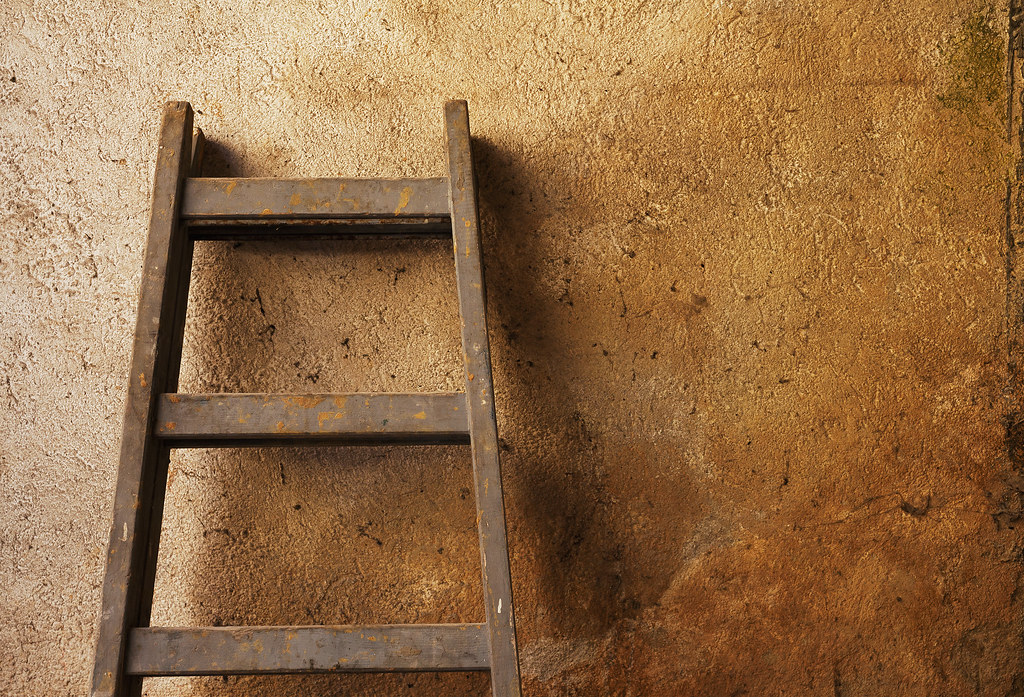

### The other columns
* GDP per capita - 
* Social support - is the national
average of the binary responses (either 0 or 1) to the GWP question “If you
were in trouble, do you have relatives or friends you can count on to help you
whenever you need them, or not?”
* Healthy life exp at birth - Healthy Life Expectancy (HLE). Healthy life expectancies at birth are based
on the data extracted from the World Health Organization’s (WHO) Global
Health Observatory data repository (Last updated: 2020-12-04). The data at
the source are available for the years 2000, 2010, 2015 and 2019. To match this
report’s sample period, interpolation and extrapolation are used.
* Freedom to make life choices - the national average of responses to the GWP
question “Are you satisfied or dissatisfied with your freedom to choose what
you do with your life?”
* Generosity - the residual of regressing national average of response to the GWP
question “Have you donated money to a charity in the past month?” on GDP
per capita.
* Perceptions of corruption - The measure is the national average of the survey responses to two questions in the GWP: “Is corruption widespread throughout
the government or not” and “Is corruption widespread within businesses or
not?” The overall perception is just the average of the two 0-or-1 responses. In
case the perception of government corruption is missing, we use the perception
of business corruption as the overall perception. The corruption perception at
the national level is just the average response of the overall perception at the
individual level.
* Positive affect -  defined as the average of three positive affect measures in GWP:
laugh, enjoyment and doing interesting things in the Gallup World Poll. These
measures are the responses to the following three questions, respectively: “Did
you smile or laugh a lot yesterday?”, and “Did you experience the following
feelings during A LOT OF THE DAY yesterday? How about Enjoyment?”,
“Did you learn or do something interesting yesterday?”
* Negative affect - defined as the average of three negative affect measures in
GWP. They are worry, sadness and anger, respectively the responses to “Did
you experience the following feelings during A LOT OF THE DAY yesterday?
How about Worry?”, “Did you experience the following feelings during A LOT
OF THE DAY yesterday? How about Sadness?”, and “Did you experience the
following feelings during A LOT OF THE DAY yesterday? How about Anger?”

In [ ]:
import plotly.express as px
df = orig_df.copy(deep=True).reset_index()
df = df.sort_values(["Country name", "year"]).reset_index()
df = df.dropna(axis=1)
df = df.dropna(axis=1)
def plot_livsstige():
    fig = px.line(df, x="year", y="ll", title="Livsstigen over tid",
                  hover_name="Country name", color="Country name", width=WIDTH, height=HEIGHT, line_shape='spline',
                     labels={
                     "year": "År",
                     "ll": "Livsstige",
                     "Country name": "Land"
                 },
                 )
    fig.update_layout(yaxis_range=[0,10])
    fig.show()


In [ ]:
plot_livsstige()

In [ ]:
import plotly.express as px
def plot_subset():
    countries = ["Finland", "China", "Afghanistan", "Norway", "Japan", "Tanzania"]
    df = orig_df.copy(deep=True).reset_index()
    df = df[df["Country name"].isin(countries)]
    df = df.sort_values(["Country name", "year"]).reset_index()
    df = df.dropna(axis=1)
    fig = px.line(df, x="year", y="ll", title="Livsstige over tid",
                  hover_name="Country name", color="Country name",
                  height=HEIGHT, width=WIDTH, line_shape='spline',
                    labels={
                     "year": "År",
                     "ll": "Livsstige",
                     "Country name": "Land"
                 },

                 
                 )
    fig.update_layout(yaxis_range=[0,10])
    fig.show()

In [ ]:
plot_subset()

2016 afghanistan: Eskalering fra ISIS og taliban
Økt humanitær krise

2019 kina:
Stolthet over nasjonen, følelse av sammenhet 
During this period, the COVID-19 pandemic was a major event, causing significant economic challenges with GDP growth plummeting. The trade tensions with the U.S. added to these challenges, impacting various sectors. Despite these difficulties, surveys indicated a rise in happiness among Chinese citizens, likely influenced by national pride and effective pandemic management. However, different reports show varying perspectives on happiness levels, highlighting the complexity of measuring well-being.



# Forhold 🧑‍🤝‍🧑

To better illustrate the relationships between these metrics and happiness, let's look at a correlation plot showing how GDP per capita, social support, and other factors relate to overall happiness scores. This helps us see the complexity and interdependencies of the different elements that contribute to well-being.

In [ ]:
def corr_matrix_overall():
    layout = go.Layout(
        title_text="Correlation map", 
        title_x=0.5, 
        xaxis_showgrid=False,
        yaxis_showgrid=False,
        yaxis_autorange='reversed'
    )
    df = orig_df.copy(deep=True)
    df = df.iloc[:,2:].corr()
    mask = np.triu(np.ones_like(df, dtype=bool))
    df = df.mask(mask)
    fig = px.imshow(df, width=WIDTH, height=HEIGHT,
        x = ["Livsstige", "Log BNP per innbygger", "Sosial støtte", "Forventet sunn levealder", "Frihet til å ta livsvalg", "Generøsitet", "Oppfatning av korrupsjon", "Positiv affekt", "Negativ affekt"],
        y = ["Livsstige", "Log BNP per innbygger", "Sosial støtte", "Forventet sunn levealder", "Frihet til å ta livsvalg", "Generøsitet", "Oppfatning av korrupsjon", "Positiv affekt", "Negativ affekt"],                
        color_continuous_scale="RdYlBu", zmin=-1, zmax=1).update_xaxes(
        showgrid=False).update_yaxes(showgrid=False)
    fig.show()


In [ ]:
corr_matrix_overall()

Key Report Columns
* GDP per capita
* Social support – % with friends/family support in times of need
* Healthy life expectancy – WHO-based expectancy estimates
* Freedom to make life choices – % satisfied with life choice freedom
* Generosity – % donating to charity (adjusted by GDP)
* Perceptions of corruption – % perceiving government/business corruption
* Positive affect – % experiencing laughter, enjoyment, interest daily
* Negative affect – % experiencing worry, sadness, anger daily

In [ ]:
def corr_matrix_2023():
    df = orig_df.copy(deep=True)
    df = df[df["year"] == 2023]
    df = df.iloc[:,2:].corr()
    mask = np.triu(np.ones_like(df, dtype=bool))
    df = df.mask(mask)
    fig = px.imshow(df, width=WIDTH, height=HEIGHT, color_continuous_scale="RdYlBu", zmin=-1, zmax=1,
        x = ["Livsstige", "Log BNP per innbygger", "Sosial støtte", "Forventet sunn levealder", "Frihet til å ta livsvalg", "Generøsitet", "Oppfatning av korrupsjon", "Positiv affekt", "Negativ affekt"],
        y = ["Livsstige", "Log BNP per innbygger", "Sosial støtte", "Forventet sunn levealder", "Frihet til å ta livsvalg", "Generøsitet", "Oppfatning av korrupsjon", "Positiv affekt", "Negativ affekt"],                
).update_xaxes(
        
        showgrid=False).update_yaxes(showgrid=False)
    fig.show()

In [ ]:
corr_matrix_2023()

# Part 2 ― Global Trends
In this section, we'll focus on key global trends from the World Happiness Report.

Highlighting Top-Ranking Countries:

Let's start by looking at the countries that consistently top the rankings—countries like Finland and Denmark. These nations follow what’s often referred to as the "Nordic model."
This model places a strong emphasis on community, equality, and social support systems, which are major contributors to these countries’ high happiness scores.

Countries Making Progress Despite Challenges:
TODO

Surprising Insight – Economic Growth vs. Happiness:

An unexpected insight from the report is that economic growth alone doesn’t necessarily correlate with higher happiness. This shows us that quality of life involves more than just wealth; community support, freedom, and equality play significant roles as well.
These trends emphasize that while wealth can enhance opportunities, true happiness often depends on a balance of social and personal factors beyond economic success.








# Globale Trender


In [ ]:
conts = conts.reset_index()
conts = conts.rename(columns={"country": "Country name"})

In [ ]:
df_melted = pd.melt(conts, id_vars=['Country name'], value_name='population')
df_melted = df_melted.rename(columns={"variable": "year"}).reset_index()
df_melted = df_melted.iloc[1000:, :]
df_melted['year'] = df_melted['year'].astype(int)

In [ ]:
ll_df = orig_df.copy(deep=True)
combined = ll_df.merge(df_melted, how="inner", on=["Country name", "year"])

In [ ]:
combined[combined["Country name"] == "Angola"]

In [ ]:
iso_alpha_df = px.data.gapminder()[["country", "iso_alpha"]].drop_duplicates().reset_index()
iso_alpha_df.drop(columns=["index"], inplace=True)
iso_alpha_df = iso_alpha_df.rename(columns={"country": "Country name"})

In [ ]:
iso_alpha_df["Country name"].unique()
combined = pd.merge(combined, iso_alpha_df, on=["Country name"])

In [ ]:
def pairplot():
    df = orig_df.copy()
    fig = sns.pairplot(df, hue="ll", corner=True, dropna=True)

In [ ]:
#pairplot()

In [ ]:
def plot_historisk_livsstige():
    df = orig_df.copy(deep=True)
    fig = px.box(df, y="ll", x="year", height=HEIGHT, width=WIDTH, points="all", hover_name="Country name",
                labels={"ll": "Livsstige", "year": "År"})
    fig.show()

In [ ]:
plot_historisk_livsstige()

In [ ]:
def plot_median_livsstige():
    median_ll = df.groupby('year')['ll'].median().reset_index()
    fig = px.line(median_ll, y="ll", x="year", height=HEIGHT, width=WIDTH,
                                 labels={"ll": "Livsstige", "year": "År"}
                 )
    fig.update_layout(yaxis_range=[0,10])
    fig.show()

In [ ]:
plot_median_livsstige()

In [ ]:
def plot_gjennomsnittlig_livsstige():
    averaged_LL = df.groupby('year')['ll'].mean().reset_index()
    fig = px.line(averaged_LL, y="ll", x="year", height=HEIGHT, width=WIDTH,
                                  labels={"ll": "Livsstige", "year": "År"}

                 )
    fig.update_layout(yaxis_range=[0,10])
    fig.show()

In [ ]:
plot_gjennomsnittlig_livsstige()

# Kontekstuell lykke



Introduce the "happiness paradox": some wealthier countries have lower happiness scores. Why? Consider cultural expectations and social inequality.

Compare a high-ranking country like Finland with a lower-ranking one that has a similar GDP but lacks a focus on welfare.

Discuss how societal trust and mental health have emerged as crucial factors for happiness in recent years.


In [ ]:
df = orig_df.copy(deep=True)
s_df = df[df["Country name"].isin(["Angola", "Guatemala"])]
s_df = s_df.groupby("Country name").mean().reset_index()

cols_to_mul = ["Social support", "Freedom to make life choices", "Generosity", "Perceptions of corruption", "Positive affect", "Negative affect"]
s_df[cols_to_mul] = s_df[cols_to_mul] * 10

cols_to_mul = ["Healthy life expectancy at birth"]
s_df[cols_to_mul] = s_df[cols_to_mul] * 0.1

In [ ]:
def plot_kontinent_bnp_vs_ll():
    df = continent_df.copy(deep=True)
    df = df.sort_values("ll")
    df = df.groupby("Country name").agg({"ll": "median", "Log GDP per capita": "median", "continent": "first"}).reset_index()
    fig = px.scatter(df, height=HEIGHT,
                     width=WIDTH, x="Log GDP per capita",
                     y="ll", trendline="ols", hover_name="Country name", color="continent",
                     labels = {"ll": "Livsstige", "Log GDP per capita": "Log BNP per innbygger",
                              "continent": "Kontinent"}
                    )
    df = df.rename(columns={"Log GDP per capita": "lgdp"})
    fig.update_layout(yaxis_range=[0,10])

  
    fig.show()
    results = px.get_trendline_results(fig)
    results = results.px_fit_results.iloc[2].summary()

In [ ]:
plot_kontinent_bnp_vs_ll()

In [ ]:
categories_en = ['ll', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 
              'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 
              'Positive affect', 'Negative affect']
categories_no = ['Livsstige', 'Log BNP per innbygger', 'Sosial støtte', 'Forventet sunn levealder', 
              'Frihet til å ta livsvalg', 'Generøsitet', 'Oppfatning av korrupsjon', 
              'Positiv affekt', 'Negativ affekt']
trans_matrix = {}
for i in range(len(categories_en)):
    trans_matrix[categories_en[i]] = categories_no[i]

In [ ]:
s_df = s_df.rename(columns=trans_matrix)
categories = categories_no
angola_data = s_df[s_df["Country name"] == "Angola"][categories].values.flatten()
guatemala_data = s_df[s_df["Country name"] == "Guatemala"][categories].values.flatten()


In [ ]:
# Initialize the radar chart
def sammenlign_land():
    fig = go.Figure()

    # Add Angola data trace
    fig.add_trace(go.Scatterpolar(
        r=angola_data,
        theta=categories,
        fill='toself',
        name='Angola'
    ))

    # Add Guatemala data trace
    fig.add_trace(go.Scatterpolar(
        r=guatemala_data,
        theta=categories,
        fill='toself',
        name='Guatemala'
    ))

    # Update the layout
    fig.update_layout(
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[0, 10]  # Set to [0, 10] for consistent scaling
            )
        ),
        showlegend=True,
        title="Sammenligning av Angola vs Guatemala (uavhengig normalisert skala fra 0 til 10)",
        height=HEIGHT,
        width=WIDTH
    )

    # Show the plot
    fig.show()


In [ ]:
sammenlign_land()

In [ ]:
#df = orig_df.copy()
#g = sns.pairplot(df, dropna=True, corner=True, kind="reg")
#g.map_lower(sns.kdeplot, levels=4, color=".1")

* First off, there is something happening in the beginning here. * Not that many countries.

* There _might_ be a significant positive trend.
* No outliers except in the most 5 recent years.

These are all interesting findings. We'll figure some of them out further down. First I just want to look some more at the extremes of our LL column.

Next, we can look at correlations between cols. I'm guessing theres going to be a lot of correlation, especially with things like GDP.

Now this is interesting!
We see some obvious points here:
* _LL_ does not correlate much with year.
* Cols regarding social status/welfare correlate with eachother, and with LL
* Negative correlation with corruption and negative affect

Ideas:
Make avg based on each continent
umap those for each year
make gif

split it up
make gifs for those as well perhaps?

In [ ]:
df = orig_df.copy(deep=True)
df = df.sort_values("year")
df = df[["Log GDP per capita", "ll", "year", "Country name"]]
df = df.dropna()
import plotly.express as px
px.scatter(df, x="Log GDP per capita", y="ll", animation_frame="year", animation_group="Country name",
           size="ll", color="Country name", hover_name="Country name", width=800, height=800, range_y=[0, 10], range_x=[4, 12])

# Section 4: Insights from the Data (2 minutes)

Highlight practical insights that can be drawn from the WHR:

For individuals: meaningful connections and community involvement are key to happiness.

For policymakers: societal well-being is best enhanced by promoting social equality, welfare, and community trust.

Explain how data science can guide decision-making: policies informed by WHR data can improve quality of life in cities and communities.



In [ ]:
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.cluster import DBSCAN, HDBSCAN
from sklearn.preprocessing import StandardScaler
import pandas as pd

df = continent_df.copy(deep=True)
agg_methods = ["describe"]

# Update the aggregation dictionary to use the variable
agg_functions_variable = {col: agg_methods for col in df.columns if col not in ["Country name", "year", "continent"]}

# Group by 'Country name' and apply the aggregation functions using the variable
df_aggregated_variable = df.groupby("Country name").agg(agg_functions_variable)

# Flatten MultiIndex columns for clarity
df_aggregated_variable.columns = ['_'.join(col).strip() for col in df_aggregated_variable.columns]

# Reset index to make 'Country name' a column
df_aggregated_variable = df_aggregated_variable.reset_index()

In [ ]:
from umap import UMAP
import plotly.express as px
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import OPTICS

# Step 1: Impute missing values using KNN imputation
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df_aggregated_variable.drop(columns=["Country name"])),
                          columns=df_aggregated_variable.columns.drop("Country name"))

# Step 2: Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_imputed)

# Step 3: Apply OPTICS
optics = OPTICS()
optics_labels = optics.fit_predict(scaled_data)

# Step 4: Add cluster labels and country names back to the DataFrame
df_aggregated_variable['Cluster'] = optics_labels
df_aggregated_variable['Country name'] = df_aggregated_variable['Country name']

# Step 5: UMAP for 2D and 3D projections
umap_2d = UMAP(n_components=2, init='spectral', random_state=0)
umap_3d = UMAP(n_components=3, init='spectral', random_state=0)

proj_2d = umap_2d.fit_transform(scaled_data)
proj_3d = umap_3d.fit_transform(scaled_data)

# Step 6: Plot with Plotly in 2D
def plot_umap():
    fig_2d = px.scatter(
        x=proj_2d[:, 0], y=proj_2d[:, 1],
        color=optics_labels.astype(str),  # Convert labels to string for color categories
        hover_name=df_aggregated_variable['Country name'],
        title="UMAP 2D Projection of OPTICS Clusters",
        labels={'color': 'Cluster'}
    )
    fig_2d.update_traces(marker=dict(size=10, line=dict(width=1, color='DarkSlateGrey')))
    fig_2d.show()
"""
    # Step 7: Plot with Plotly in 3D
    fig_3d = px.scatter_3d(
        x=proj_3d[:, 0], y=proj_3d[:, 1], z=proj_3d[:, 2],
        color=optics_labels.astype(str),
        hover_name=df_aggregated_variable['Country name'],
        title="UMAP 3D Projection of OPTICS Clusters",
        labels={'color': 'Cluster'}
    )
    fig_3d.update_traces(marker=dict(size=5))
    fig_3d.show()
"""

In [ ]:
plot_umap()

# En datadrevet vei videre


Dataviten kan veilede oss i å bygge lykkeligere og mer sammenknyttede samfunn.

# Innsikt for enkeltpersoner og samfunn

For enkeltpersoner: Invester i meningsfylte relasjoner

For beslutningstakere: Prioriter sosial likhet, velferd og tillit i samfunnet for å styrke kollektiv trivsel.

# Mer enn bare rikdom

Økonomisk stabilitet betyr mye

Meningsfulle relasjoner gir varig glede og tilfredshet, og former et lykkeligere og mer robust liv.

# Lykke and Relasjoner


Lykke er nært knyttet til kvaliteten på relasjonene våre.

Gode vennskap og støttespillere er grunnleggende for livstilfredshet.

In [ ]:
data = orig_df.copy(deep=True)
data = data.dropna()

In [ ]:
data.head()

In [ ]:
columns = list(data.columns)
columns.remove("ll")
columns.remove("Country name")
columns

In [ ]:
X, y = data.loc[:, ~data.columns.isin(['ll', "Country name"])], data["ll"]

In [ ]:
import statsmodels.api as sm
X = sm.add_constant(X)
results = sm.OLS(y, X).fit()
A = np.identity(len(results.params))
A = A[1:,:]
print(results.f_test(A))
print(results.summary())


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Assuming 'X' is the predictor dataframe with a constant added
# Create a DataFrame to store VIF values
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

In [ ]:
import matplotlib.pyplot as plt

# Plotting Residuals vs Fitted Values
plt.scatter(results.fittedvalues, results.resid)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()

In [ ]:
import scipy.stats as stats

# Q-Q plot
sm.qqplot(results.resid, line='45')
plt.title("Q-Q Plot")
plt.show()

In [ ]:
# Scale-Location plot
plt.scatter(results.fittedvalues, np.sqrt(np.abs(results.resid)))
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel("Fitted Values")
plt.ylabel("√|Standardized Residuals|")
plt.title("Scale-Location Plot")
plt.show()


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3, svd_solver = 'full')
X_pca = pca.fit_transform(X)
results = sm.OLS(y, X_pca).fit()
A = np.identity(len(results.params))
A = A[1:,:]
print(results.f_test(A))
print(results.summary())